In [1]:
import piplite
await piplite.install("matplotlib")
await piplite.install("scikit-rf")

Text saved to IEEE_01_24_15_16_46_0.s2p


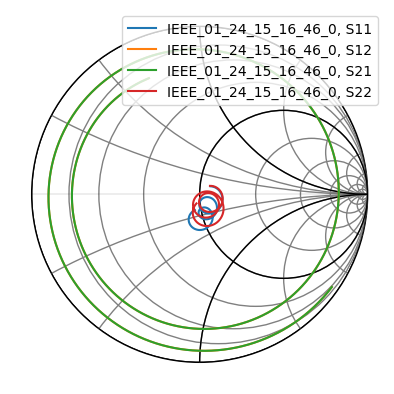

In [2]:
import urllib.request
import skrf as rf
from skrf import Network
import re

def save_text_to_file(text, file_name):
    # Open the file in write mode
    with open(file_name, 'w') as file:
        # Write the text to the file
        file.write(text)
    print(f"Text saved to {file_name}")

def read_file_from_web(url):
    response = urllib.request.urlopen(url)
    data = response.read()
    text = data.decode('utf-8')
    return text                                           

try:
    # Initialize variables to store the values
    href_value = 'data:application;base64,ISBTLXBhcmFtZXRlcnMgZXhwb3J0ZWQgZnJvbSBDRU1Xb3JrcwoKIyBIeiBTIFJJIFIgNTAKCiEgUG9ydFsxXSA9IDEKISBQb3J0WzJdID0gMgoxLjAwMDAwMDAwMDAwMDAwMGUrMDkgICAgNi4zOTMzOTcwNjQxODQ5NDZlLTAyICAgIDQuNzgzNDcyMzc5MTUzNjYxZS0wMiAgICA3Ljg2NjgzMzI3NDMxODg0NGUtMDEgICAtNS41MTg0OTMwMDQzNjUyOTJlLTAxICAgIDcuODY2ODMzODEzNTAxOTI3ZS0wMSAgIC01LjUxODQ5MzI2ODUyMjg4N2UtMDEgICAgNi4xMzMwOTkyOTU2OTU0NTNlLTAyICAgIDUuMDM5MTIwNzQ0NTM5MjQ3ZS0wMgoxLjAxNzAxNzAxNzAxNzAxN2UrMDkgICAgNi41MTM4NTA4MDg4MDI5NzNlLTAyICAgIDQuNzgwNDc5OTkzNTE5NDM1ZS0wMiAgICA3LjgwNzQxMjI5MzMzMzM5OGUtMDEgICAtNS41OTYxMTA1NDI3Mzg5NDhlLTAxICAgIDcuODA3NDEyNzkzNTI4ODQ4ZS0wMSAgIC01LjU5NjExMDgxNTI0OTk5OGUtMDEgICAgNi4yNDYyMjQ2Njk5MjM2MzZlLTAyICAgIDUuMDQyODczNTg2OTkxMDc2ZS0wMgoxLjAzNDAzNDAzNDAzNDAzNGUrMDkgICAgNi42MzQwNTU3MTM0NzM0MDJlLTAyICAgIDQuNzc1MjY2MzQ3NzkzNDk4ZS0wMiAgICA3Ljc0NzI1OTYyNjMzOTA0MWUtMDEgICAtNS42NzMwNjEzMjcyODAwNjllLTAxICAgIDcuNzQ3MjYwMDg2OTg4Nzg0ZS0wMSAgIC01LjY3MzA2MTYwNTgwOTI3MWUtMDEgICAgNi4zNTkwNDI1MzgxOTc2NTFlLTAyICAgIDUuMDQ0NzcwNzk4NTQ1MTM3ZS0wMgoxLjA1MTA1MTA1MTA1MTA1MWUrMDkgICAgNi43NTM5ODkxMDg2NTUxMDZlLTAyICAgIDQuNzY3ODUxMjY3NTc0MDU5ZS0wMiAgICA3LjY4NjM4MjI3MjUxNzk1NWUtMDEgICAtNS43NDkzMzk3MDAwNjczNTZlLTAxICAgIDcuNjg2MzgyNjkzMTk4NzAzZS0wMSAgIC01Ljc0OTMzOTk4MjI4NTkxM2UtMDEgICAgNi40NzE1NDY5ODI2MDAxODZlLTAyICAgIDUuMDQ0ODMzOTExOTgzODEyZS0wMgoxLjA2ODA2ODA2ODA2ODA2OGUrMDkgICAgNi44NzM2Mjg0NDE4NDYzOTFlLTAyICAgIDQuNzU4MjUzNzI3MTA5MTM0ZS0wMiAgICA3LjYyNDc4NzI3NTQ0NzkzNWUtMDEgICAtNS44MjQ5NDAwMTQ0MTE5NjdlLTAxICAgIDcuNjI0Nzg3NjU1ODY3NTY0ZS0wMSAgIC01LjgyNDk0MDI5ODAwNDU4NGUtMDEgICAgNi41ODM3MzE5OTU4MzQxMTZlLTAyICAgIDUuMDQzMDgyODQ4ODg5MTg4ZS0wMgoxLjA4NTA4NTA4NTA4NTA4NWUrMDkgICAgNi45OTI5NTEyMjQ1NTYyNzFlLTAyICAgIDQuNzQ2NDkxOTI2MTUxMjkzZS0wMiAgICA3LjU2MjQ4MTcyNTUyNDAxMWUtMDEgICAtNS44OTk4NTY2Mzk3MzU1OTBlLTAxICAgIDcuNTYyNDgyMDY1NTE3NjUxZS0wMSAgIC01Ljg5OTg1NjkyMjQwNzA2NmUtMDEgICAgNi42OTU1OTE0MDIzOTgwNTdlLTAyICAgIDUuMDM5NTM2MDI4NjM1NjMzZS0wMgoxLjEwMjEwMjEwMjEwMjEwMmUrMDkgICAgNy4xMTE5MzQ5ODY4OTMyODBlLTAyICAgIDQuNzMyNTgzMzY0NTIzNjI4ZS0wMiAgICA3LjQ5OTQ3Mjc2MTkxMDg4NWUtMDEgICAtNS45NzQwODM5NjYyNzk4MDFlLTAxICAgIDcuNDk5NDczMDYxNDM2ODUwZS0wMSAgIC01Ljk3NDA4NDI0NTc2MTE4MGUtMDEgICAgNi44MDcxMTg3ODk5MjcxMzJlLTAyICAgIDUuMDM0MjEwNDc0NzA1OTAyZS0wMgoxLjExOTExOTExOTExOTExOWUrMDkgICAgNy4yMzA1NTcyMzkxMDI2MDJlLTAyICAgIDQuNzE2NTQ0OTE0MTU1MjMyZS0wMiAgICA3LjQzNTc2NzU3NDA3MDAyNWUtMDEgICAtNi4wNDc2MTY0MDk2MzI0MjhlLTAxICAgIDcuNDM1NzY3ODMzMjA1NTM4ZS0wMSAgIC02LjA0NzYxNjY4MzY4NjcyMWUtMDEgICAgNi45MTgzMDc0NDk4NTU0NTBlLTAyICAgIDUuMDI3MTIxOTE3OTk4MDcwZS0wMgoxLjEzNjEzNjEzNjEzNjEzNmUrMDkgICAgNy4zNDg3OTU0Mzk0MjI2MjhlLTAyICAgIDQuNjk4MzkyODg4NDAyNTM5ZS0wMiAgICA3LjM3MTM3MzQwMjkwMjg2NWUtMDEgICAtNi4xMjA0NDg0MTUwNjAwMzRlLTAxICAgIDcuMzcxMzczNjIxODM5NjA5ZS0wMSAgIC02LjEyMDQ0ODY4MTQ4NzY3MWUtMDEgICAgNy4wMjkxNTAzMjY2MDMxNjVlLTAyICAgIDUuMDE4Mjg0ODk2ODY1NDcxZS0wMgoxLjE1MzE1MzE1MzE1MzE1M2UrMDkgICAgNy40NjY2MjY5Njc2NzExNjBlLTAyICAgIDQuNjc4MTQzMTA4NTIyMTk4ZS0wMiAgICA3LjMwNjI5NzU0MTU0ODMzNmUtMDEgICAtNi4xOTI1NzQ0NjE2Mzk2MDFlLTAxICAgIDcuMzA2Mjk3NzIwNTg3OTA2ZS0wMSAgIC02LjE5MjU3NDcxODI4MzMzMmUtMDEgICAgNy4xMzk2Mzk5NzQ1NDY0MTNlLTAyICAgIDUuMDA3NzEyODUzNjk1ODE0ZS0wMgoxLjE3MDE3MDE3MDE3MDE3MGUrMDkgICAgNy41ODQwMjkxMDQwMTQyNjZlLTAyICAgIDQuNjU1ODEwOTY3MjA1NTkxZS0wMiAgICA3LjI0MDU0NzMzNTg3MDgyNGUtMDEgICAtNi4yNjM5ODkwNjYxODQ0MTdlLTAxICAgIDcuMjQwNTQ3NDc1NDIwMDY0ZS0wMSAgIC02LjI2Mzk4OTMxMDkzMzkzNWUtMDEgICAgNy4yNDk3Njg1MjIwNjk5NjNlLTAyICAgIDQuOTk1NDE4MjI3ODg5Njk1ZS0wMgoxLjE4NzE4NzE4NzE4NzE4N2UrMDkgICAgNy43MDA5NzkwMTI0MDU5ODVlLTAyICAgIDQuNjMxNDExNDg5MTIwOTgzZS0wMiAgICA3LjE3NDEzMDE4NDY3MTczMGUtMDEgICAtNi4zMzQ2ODY3ODY5NjIzNzRlLTAxICAgIDcuMTc0MTMwMjg1MjM3OTYyZS0wMSAgIC02LjMzNDY4NzAxNzc1ODU0MGUtMDEgICAgNy4zNTk1Mjc2NDIwNTYzNDdlLTAyICAgIDQuOTgxNDEyNTQ1MTQ3MzQ2ZS0wMgoxLjIwNDIwNDIwNDIwNDIwNGUrMDkgICAgNy44MTc0NTM3MjgyMjczNDhlLTAyICAgIDQuNjA0OTU5Mzg4NDQxMzk2ZS0wMiAgICA3LjEwNzA1MzUzOTY1NTM1OGUtMDEgICAtNi40MDQ2NjIyMjcyMDYzMzJlLTAxICAgIDcuMTA3MDUzNjAxODQxNjAwZS0wMSAgIC02LjQwNDY2MjQ0MjA0NTA4MmUtMDEgICAgNy40Njg5MDg1MjgyMDYzNjRlLTAyICAgIDQuOTY1NzA2NTAzMDEyNzcxZS0wMgoxLjIyMTIyMTIyMTIyMTIyMWUrMDkgICAgNy45MzM0MzAxNDk2ODg1NTRlLTAyICAgIDQuNTc2NDY5MTIzMzYyNjUzZS0wMiAgICA3LjAzOTMyNDkwNTE3NzU4NGUtMDEgICAtNi40NzM5MTAwMzg0MTgyMDdlLTAxICAgIDcuMDM5MzI0OTI5Njc3NjM4ZS0wMSAgIC02LjQ3MzkxMDIzNTM1NDAyMmUtMDEgICAgNy41Nzc5MDE4NzY2MzU3OTllLTAyICAgIDQuOTQ4MzEwMDUyNjU3MDk2ZS0wMgoxLjIzODIzODIzODIzODIzOGUrMDkgICAgOC4wNDg4ODUwMzI1OTIyNTRlLTAyICAgIDQuNTQ1OTU0OTQ3NjM4MzQ2ZS0wMiAgICA2Ljk3MDk1MTgzNzgwMzE3MGUtMDEgICAtNi41NDI0MjQ5MjM0Njk3MDVlLTAxICAgIDYuOTcwOTUxODI1Mzk2Nzg0ZS0wMSAgIC02LjU0MjQyNTEwMDYxODgzOGUtMDEgICAgNy42ODY0OTc4NzIyMjkyODZlLTAyICAgIDQuOTI5MjMyNDc2OTEzNzY3ZS0wMgoxLjI1NTI1NTI1NTI1NTI1NWUrMDkgICAgOC4xNjM3OTQ5ODgwODc4NzVlLTAyICAgIDQuNTEzNDMwOTU5MTc1MTc0ZS0wMiAgICA2LjkwMTk0MTk0NTY5NTg2NWUtMDEgICAtNi42MTAyMDE2Mzk1MDM4NDVlLTAxICAgIDYuOTAxOTQxODk3MjQzNzg2ZS0wMSAgIC02LjYxMDIwMTc5NTA0NzIxN2UtMDEgICAgNy43OTQ2ODYxNzkyNzkxNzBlLTAyICAgIDQuOTA4NDgyNDY0NjAxMzc3ZS0wMgoxLjI3MjI3MjI3MjI3MjI3MmUrMDkgICAgOC4yNzgxMzY0ODMwNzk3NjJlLTAyICAgIDQuNDc4OTExMTQ1NzQ5MjQ5ZS0wMiAgICA2LjgzMjMwMjg4Nzg2MjkwN2UtMDEgICAtNi42NzcyMzUwMDA2NDI0NDFlLTAxICAgIDYuODMyMzAyODA0MzAyMDA0ZS0wMSAgIC02LjY3NzIzNTEzMjgyODE0N2UtMDEgICAgNy45MDI0NTU5MzU5NjgwNzFlLTAyICAgIDQuODg2MDY4MTgxMTg3Njk0ZS0wMgoxLjI4OTI4OTI4OTI4OTI4OWUrMDkgICAgOC4zOTE4ODU4NDI5Nzc1ODJlLTAyICAgIDQuNDQyNDA5NDI3OTE0ODk0ZS0wMiAgICA2Ljc2MjA0MjM3MzI3Mzk3MGUtMDEgICAtNi43NDM1MTk4ODA1MDUxMTNlLTAxICAgIDYuNzYyMDQyMjU1NjEyMzI5ZS0wMSAgIC02Ljc0MzUxOTk4NzY1MDY4MWUtMDEgICAgOC4wMDk3OTU3NTIyOTYwMzNlLTAyICAgIDQuODYxOTk3MzM1ODY4ODY3ZS0wMgoxLjMwNjMwNjMwNjMwNjMwNmUrMDkgICAgOC41MDUwMTkyNTY1MDg5NzRlLTAyICAgIDQuNDAzOTM5Njk5MTg1NjIwZS0wMiAgICA2LjY5MTE2ODE1OTg3MjQ2N2UtMDEgICAtNi44MDkwNTEyMTQ1NDY0OTJlLTAxICAgIDYuNjkxMTY4MDA5MTg0NTU0ZS0wMSAgIC02LjgwOTA1MTI5NTA0MDg2MmUtMDEgICAgOC4xMTY2OTM3MTEwODIzNzNlLTAyICAgIDQuODM2Mjc3MjQ1MTQ1NTE1ZS0wMgoxLjMyMzMyMzMyMzMyMzMyM2UrMDkgICAgOC42MTc1MTI3ODIzMzM5NzhlLTAyICAgIDQuMzYzNTE1ODYzNTc2ODQ3ZS0wMiAgICA2LjYxOTY4ODA1MzQ5NTk1MWUtMDEgICAtNi44NzM4MjQwMDIyMTgyMTRlLTAxICAgIDYuNjE5Njg3ODcwOTE3Nzc5ZS0wMSAgIC02Ljg3MzgyNDA1NDUyMzQxMWUtMDEgICAgOC4yMjMxMzczNzE3MDQ3MDNlLTAyICAgIDQuODA4OTE0ODkyOTkxNjc4ZS0wMgoxLjM0MDM0MDM0MDM0MDM0MGUrMDkgICAgOC43MjkzNDIzNTcyMjk1MjhlLTAyICAgIDQuMzIxMTUxODcwNjAxNjQ5ZS0wMiAgICA2LjU0NzYwOTkwNjcyMDExM2UtMDEgICAtNi45Mzc4MzMzMDg5NjMwNDFlLTAxICAgIDYuNTQ3NjA5NjkzNDQ0NDc0ZS0wMSAgIC02LjkzNzgzMzMzMTYxNTYwOGUtMDEgICAgOC4zMjkxMTM3NzYyNjg5MDBlLTAyICAgIDQuNzc5OTE2OTg3NzE3MTYyZS0wMgoxLjM1NzM1NzM1NzM1NzM1N2UrMDkgICAgOC44NDA0ODM4MDU2MzEwNjJlLTAyICAgIDQuMjc2ODYxNzQ3ODE4ODM3ZS0wMiAgICA2LjQ3NDk0MTYxNzYzOTk4N2UtMDEgICAtNy4wMDEwNzQyNjgwNDgyMjBlLTAxICAgIDYuNDc0OTQxMzc0OTExNzc2ZS0wMSAgIC03LjAwMTA3NDI1OTY2MDMzMWUtMDEgICAgOC40MzQ2MDk0NTc5MjQ4NDdlLTAyICAgIDQuNzQ5MjkwMDE1NjMyMjkwZS0wMgoxLjM3NDM3NDM3NDM3NDM3NGUrMDkgICAgOC45NTA5MTI4NTAzMzg2NTVlLTAyICAgIDQuMjMwNjU5NjMxMDMxMTE3ZS0wMiAgICA2LjQwMTY5MTEyODYwMDQ2NGUtMDEgICAtNy4wNjM1NDIwODIyNDU2NThlLTAxICAgIDYuNDAxNjkwODU3NzExOTk3ZS0wMSAgIC03LjA2MzU0MjA0MTUwNjA5MGUtMDEgICAgOC41Mzk2MTA0NTEwNzY5NzdlLTAyICAgIDQuNzE3MDQwMjkxNjI1NjkwZS0wMgoxLjM5MTM5MTM5MTM5MTM5MmUrMDkgICAgOS4wNjA2MDUxMjQyMTUyNDdlLTAyICAgIDQuMTgyNTU5NzkyMjMzNTU1ZS0wMiAgICA2LjMyNzg2NjQyNDg4Njc2NmUtMDEgICAtNy4xMjUyMzIwMjUzNjY0NDZlLTAxICAgIDYuMzI3ODY2MTI3MTczMjUyZS0wMSAgIC03LjEyNTIzMTk1MTA0MTIwOWUtMDEgICAgOC42NDQxMDIzMDMyNTExMDhlLTAyICAgIDQuNjgzMTc0MDA2NzY4NTQ1ZS0wMgoxLjQwODQwODQwODQwODQwOGUrMDkgICAgOS4xNjk1MzYxODI3MTg1NDZlLTAyICAgIDQuMTMyNTc2NjY1NDE0NDkwZS0wMiAgICA2LjI1MzQ3NTUzMzM4NDY3MWUtMDEgICAtNy4xODYxMzk0NDM2NTcwNjFlLTAxICAgIDYuMjUzNDc1MjEwMjE5NzI5ZS0wMSAgIC03LjE4NjEzOTMzNDU4OTg2NWUtMDEgICAgOC43NDgwNzAwODg0MTAzNTJlLTAyICAgIDQuNjQ3Njk3MjczMDYyMDAxZS0wMgoxLjQyNTQyNTQyNTQyNTQyNmUrMDkgICAgOS4yNzc2ODE1MTcxMjgwMzVlLTAyICAgIDQuMDgwNzI0ODcwMzA3MDI5ZS0wMiAgICA2LjE3ODUyNjUyMTIxOTI1MmUtMDEgICAtNy4yNDYyNTk3NTcwNjQ2NTllLTAxICAgIDYuMTc4NTI2MTc0MDEwNTMwZS0wMSAgIC03LjI0NjI1OTYxMjE3NzE1NmUtMDEgICAgOC44NTE0OTg0MjE1MjM2NzllLTAyICAgIDQuNjEwNjE2MTY1NDQxNjAzZS0wMgoxLjQ0MjQ0MjQ0MjQ0MjQ0MmUrMDkgICAgOS4zODUwMTY1NjgzMzkwNDdlLTAyICAgIDQuMDI3MDE5MjM0MTkxMzI0ZS0wMiAgICA2LjEwMzAyNzQ5NDM3OTU4NmUtMDEgICAtNy4zMDU1ODg0NjAzNzg3OTRlLTAxICAgIDYuMTAzMDI3MTI0NTY0NDc0ZS0wMSAgIC03LjMwNTU4ODI3ODY3MDYxNGUtMDEgICAgOC45NTQzNzE0NzQyMTc2MDBlLTAyICAgIDQuNTcxOTM2NzYxMTU0MTI1ZS0wMgoxLjQ1OTQ1OTQ1OTQ1OTQ2MGUrMDkgICAgOS40OTE1MTY3NDExMTA5ODllLTAyICAgIDMuOTcxNDc0ODExODQzMTY5ZS0wMiAgICA2LjAyNjk4NjU5NjMzNjQxNGUtMDEgICAtNy4zNjQxMjExMjQyNTY1NTFlLTAxICAgIDYuMDI2OTg2MjA1Mzc3ODU3ZS0wMSAgIC03LjM2NDEyMDkwNDgwNTEzOWUtMDEgICAgOS4wNTY2NzI5OTEzNDc2ODllLTAyICAgIDQuNTMxNjY1MTc2NjE5NTczZS0wMgoxLjQ3NjQ3NjQ3NjQ3NjQ3NmUrMDkgICAgOS41OTcxNTc0MTg2NjgxMjBlLTAyICAgIDMuOTE0MTA2OTAzNzI0NTgzZS0wMiAgICA1Ljk1MDQxMjAwNjY1ODc3MmUtMDEgICAtNy40MjE4NTMzOTYxMzgxMjVlLTAxICAgIDUuOTUwNDExNTk2MDQxMjEyZS0wMSAgIC03LjQyMTg1MzEzODA5ODQwOWUtMDEgICAgOS4xNTgzODYzMDgzNTI4MTNlLTAyICAgIDQuNDg5ODA3NjAxODg5NzU5ZS0wMgoxLjQ5MzQ5MzQ5MzQ5MzQ5NGUrMDkgICAgOS43MDE5MTM5Nzc1NjM1NDFlLTAyICAgIDMuODU0OTMxMDcyNTA3MTY0ZS0wMiAgICA1Ljg3MzMxMTkzOTYzNDc0MmUtMDEgICAtNy40Nzg3ODEwMDEwNTk0NTZlLTAxICAgIDUuODczMzExNTEwODYwMTQwZS0wMSAgIC03LjQ3ODc4MDcwMzY2MzMyMmUtMDEgICAgOS4yNTk0OTQzNjkyNTg1NDdlLTAyICAgIDQuNDQ2MzcwMzMyODEyMjY2ZS0wMgoxLjUxMDUxMDUxMDUxMDUxMGUrMDkgICAgOS44MDU3NjE4MDI3MjQ5MTBlLTAyICAgIDMuNzkzOTYzMTU4MDE4NTI5ZS0wMiAgICA1Ljc5NTY5NDY0MjkwMTExNmUtMDEgICAtNy41MzQ4OTk3NDIzNjg0MzdlLTAxICAgIDUuNzk1Njk0MTk3NDg1MTI3ZS0wMSAgIC03LjUzNDg5OTQwNDkyNDA1NmUtMDEgICAgOS4zNTk5Nzk3NDUyMTkxMzBlLTAyICAgIDQuNDAxMzU5ODAxMDA1NzgwZS0wMgoxLjUyNzUyNzUyNzUyNzUyOGUrMDkgICAgOS45MDg2NzYzMDI2MTA1NDdlLTAyICAgIDMuNzMxMjE5MjkwNjk2MjM2ZS0wMiAgICA1LjcxNzU2ODM5NjA4NTkxNWUtMDEgICAtNy41OTAyMDU1MDIzNTA5MzNlLTAxICAgIDUuNzE3NTY3OTM1NTU0MTM4ZS0wMSAgIC03LjU5MDIwNTEyNDI0MTk1MWUtMDEgICAgOS40NTk4MjQ2NTM0ODcxNjJlLTAyICAgIDQuMzU0NzgyNjAxNzQ5Mzk5ZS0wMgoxLjU0NDU0NDU0NDU0NDU0NWUrMDkgICAgMS4wMDEwNjMyOTI0NDEzOTFlLTAxICAgIDMuNjY2NzE1OTAzNjMzNDcyZS0wMiAgICA1LjYzODk0MTUwOTQ2NzIxMGUtMDEgICAtNy42NDQ2OTQyNDI3NzI3MzJlLTAxICAgIDUuNjM4OTQxMDM1MzUxNjIwZS0wMSAgIC03LjY0NDY5MzgyMzQ1NzI1OGUtMDEgICAgOS41NTkwMTA5NzY3MjE3MDllLTAyICAgIDQuMzA2NjQ1NTE5ODg1ODUyZS0wMgoxLjU2MTU2MTU2MTU2MTU2MmUrMDkgICAgMS4wMTExNjA3MTY5MjU5NzRlLTAxICAgIDMuNjAwNDY5NzQzMjk0NjA3ZS0wMiAgICA1LjU1OTgyMjMyMjY1MTMzMmUtMDEgICAtNy42OTgzNjIwMDUzNDI5MTdlLTAxICAgIDUuNTU5ODIxODM2NDg2NzU2ZS0wMSAgIC03LjY5ODM2MTU0NDM1MjQ0NmUtMDEgICAgOS42NTc1MjAyODI1NTAxMzFlLTAyICAgIDQuMjU2OTU1NTUzODM0NDYwZS0wMgoxLjU3ODU3ODU3ODU3ODU3OWUrMDkgICAgMS4wMjExNTc0NjA3MzQzMjllLTAxICAgIDMuNTMyNDk3ODc4OTc3NzE1ZS0wMiAgICA1LjQ4MDIxOTIwMzI3Mjg1MWUtMDEgICAtNy43NTEyMDQ5MTIxMDQ1MjFlLTAxICAgIDUuNDgwMjE4NzA2NTkzNjQzZS0wMSAgIC03Ljc1MTIwNDQwOTA0MjY4OWUtMDEgICAgOS43NTUzMzM4NDMzMDQ1NDJlLTAyICAgIDQuMjA1NzE5OTM3ODA3MjQ5ZS0wMgoxLjU5NTU5NTU5NTU5NTU5NmUrMDkgICAgMS4wMzEwNTEwODkyOTcwMTRlLTAxICAgIDMuNDYyODE3NzExMDk2MTA2ZS0wMiAgICA1LjQwMDE0MDU0NTcxODY1MmUtMDEgICAtNy44MDMyMTkxNjU3NTczODFlLTAxICAgIDUuNDAwMTQwMDQwMDU1NDkwZS0wMSAgIC03LjgwMzIxODYyMDI5ODU3MmUtMDEgICAgOS44NTI0MzI2NTU4NzA2NDllLTAyICAgIDQuMTUyOTQ2MTYyMzE2NTE1ZS0wMgoxLjYxMjYxMjYxMjYxMjYxM2UrMDkgICAgMS4wNDA4MzkxNzc5NDU5MjdlLTAxICAgIDMuMzkxNDQ2OTc4MzQ4MjE2ZS0wMiAgICA1LjMxOTU5NDc2OTg3NzczN2UtMDEgICAtNy44NTQ0MDEwNDk5MTg0NTFlLTAxICAgIDUuMzE5NTk0MjU2NzU0NDg0ZS0wMSAgIC03Ljg1NDQwMDQ2MTgwNjQwM2UtMDEgICAgOS45NDg3OTc0NjE1ODIwMjhlLTAyICAgIDQuMDk4NjQxOTkzMDU5MTE0ZS0wMgoxLjYyOTYyOTYyOTYyOTYzMGUrMDkgICAgMS4wNTA1MTkzMTMzODc1ODNlLTAxICAgIDMuMzE4NDAzNzYzODQyNDUxZS0wMiAgICA1LjIzODU5MDMxOTkxODI0MGUtMDEgICAtNy45MDQ3NDY5MjkzMjQxNjllLTAxICAgIDUuMjM4NTg5ODAwODQ5MDAxZS0wMSAgIC03LjkwNDc0NjI5ODM3MDM0MGUtMDEgICAgMS4wMDQ0NDA4NzY2MTEyNjZlLTAxICAgIDQuMDQyODE1NDg4MjYxNDAwZS0wMgoxLjY0NjY0NjY0NjY0NjY0N2UrMDkgICAgMS4wNjAwODkwOTUxNTY4NDRlLTAxICAgIDMuMjQzNzA2NTAwMjM5NDMyZS0wMiAgICA1LjE1NzEzNTY2MzA5Mjc4NGUtMDEgICAtNy45NTQyNTMyNDk5Nzk1MTZlLTAxICAgIDUuMTU3MTM1MTM5NTc5MTAzZS0wMSAgIC03Ljk1NDI1MjU3NjA2MTQ0MGUtMDEgICAgMS4wMTM5MjQ2ODU5MzE0NjNlLTAxICAgIDMuOTg1NDc1MDE0NTYwNTQ5ZS0wMgoxLjY2MzY2MzY2MzY2MzY2NGUrMDkgICAgMS4wNjk1NDYxMzcwNDg0MzBlLTAxICAgIDMuMTY3MzczOTczOTcxMTc0ZS0wMiAgICA1LjA3NTIzOTI4ODU3MzIwOWUtMDEgICAtOC4wMDI5MTY1MzkyNTc5MjNlLTAxICAgIDUuMDc1MjM4NzYyMTAxMzIyZS0wMSAgIC04LjAwMjkxNTgyMjMxNzQ4OWUtMDEgICAgMS4wMjMzMjkxODM0OTYxMDllLTAxICAgIDMuOTI2NjI5MjYxNDk5NjM1ZS0wMgoxLjY4MDY4MDY4MDY4MDY4MWUrMDkgICAgMS4wNzg4ODgwNjg1MjQzMDZlLTAxICAgIDMuMDg5NDI1MzI4NTkzNTUxZS0wMiAgICA0Ljk5MjkwOTcwNjMxNTA0NmUtMDEgICAtOC4wNTA3MzM0MDU5NTYyNjBlLTAxICAgIDQuOTkyOTA5MTc4MzUzMzQ5ZS0wMSAgIC04LjA1MDczMjY0NTk5Nzg0N2UtMDEgICAgMS4wMzI2NTIzNjEwMzU1NTNlLTAxICAgIDMuODY2Mjg3MjU0NzA1ODY1ZS0wMgoxLjY5NzY5NzY5NzY5NzY5OGUrMDkgICAgMS4wODgxMTI1MzYwOTUzNDRlLTAxICAgIDMuMDA5ODgwMDY3MzI2NjMxZS0wMiAgICA0LjkxMDE1NTQ0NTk1MjUyOGUtMDEgICAtOC4wOTc3MDA1NDAzMDg1MDBlLTAxICAgIDQuOTEwMTU0OTE3OTQ5MTIyZS0wMSAgIC04LjA5NzY5OTczNzM5NzExNWUtMDEgICAgMS4wNDE4OTIxOTQ1Nzc1NThlLTAxICAgIDMuODA0NDU4MzY3ODIzNjA3ZS0wMgoxLjcxNDcxNDcxNDcxNDcxNWUrMDkgICAgMS4wOTcyMTcyMDQ2NzU2MjhlLTAxICAgIDIuOTI4NzU4MDU0ODMyMDczZS0wMiAgICA0LjgyNjk4NTA1NTcyNDEzMGUtMDEgICAtOC4xNDM4MTQ3MTM5NjE5NzdlLTAxICAgIDQuODI2OTg0NTI5MTA0NTIzZS0wMSAgIC04LjE0MzgxMzg2ODIyMTIzMGUtMDEgICAgMS4wNTEwNDY2NDYzNzE5ODJlLTAxICAgIDMuNzQxMTUyMzMzMjYyOTUxZS0wMgoxLjczMTczMTczMTczMTczMmUrMDkgICAgMS4xMDYxOTk3NTg5MDgzOThlLTAxICAgIDIuODQ2MDc5NTE4Mjc2OTY0ZS0wMiAgICA0Ljc0MzQwNzEwMTQyODg1N2UtMDEgICAtOC4xODkwNzI3Nzk5MTkyODFlLTAxICAgIDQuNzQzNDA2NTc3NTkzNzk1ZS0wMSAgIC04LjE4OTA3MTg5MTUyOTQ0NWUtMDEgICAgMS4wNjAxMTM2NjY3OTM1MDFlLTAxICAgIDMuNjc2Mzc5MjUxODMwMTA0ZS0wMgoxLjc0ODc0ODc0ODc0ODc0OWUrMDkgICAgMS4xMTUwNTc5MDQ0NjI2NTVlLTAxICAgIDIuNzYxODY1MDQ3NzI3NjQ2ZS0wMiAgICA0LjY1OTQzMDE2NTQxMzIwOWUtMDEgICAtOC4yMzM0NzE2NzI0NDk0MDVlLTAxICAgIDQuNjU5NDI5NjQ1NzM2NjI0ZS0wMSAgIC04LjIzMzQ3MDc0MTY0NTI4MWUtMDEgICAgMS4wNjkwOTExOTYyMTk3OTBlLTAxICAgIDMuNjEwMTQ5NjAxMjk1NDQzZS0wMgoxLjc2NTc2NTc2NTc2NTc2NmUrMDkgICAgMS4xMjM3ODkzNjkyOTk3MDdlLTAxICAgIDIuNjc2MTM1NTk1OTE4MDc1ZS0wMiAgICA0LjU3NTA2Mjg0NTU4ODcwNGUtMDEgICAtOC4yNzcwMDg0MDY5NzA4NDFlLTAxICAgIDQuNTc1MDYyMzMxNDE1ODA2ZS0wMSAgIC04LjI3NzAwNzQzNDAzOTY0MGUtMDEgICAgMS4wNzc5NzcxNjY4ODM0NjRlLTAxICAgIDMuNTQyNDc0MjQzOTU4MzEzZS0wMgoxLjc4Mjc4Mjc4Mjc4Mjc4M2UrMDkgICAgMS4xMzIzOTE5MDQ5MDkwMjZlLTAxICAgIDIuNTg4OTEyNDc3NDMxMjMxZS0wMiAgICA0LjQ5MDMxMzc1NDQ3OTUyMWUtMDEgICAtOC4zMTk2ODAwNzk5MDk2MDhlLTAxICAgIDQuNDkwMzEzMjQ3MTI0OTg4ZS0wMSAgIC04LjMxOTY3OTA2NTE4ODgzN2UtMDEgICAgMS4wODY3Njk1MDQ2OTYxNDRlLTAxICAgIDMuNDczMzY0NDMzMjU4ODU5ZS0wMgoxLjc5OTc5OTc5OTc5OTgwMGUrMDkgICAgMS4xNDA4NjMyODc1MTMxOTVlLTAxICAgIDIuNTAwMjE3MzY3MzMyNjE2ZS0wMiAgICA0LjQwNTE5MTUxODMwMDA0N2UtMDEgICAtOC4zNjE0ODM4Njg1MzQ5MzFlLTAxICAgIDQuNDA1MTkxMDE5MDQ2Mzg3ZS0wMSAgIC04LjM2MTQ4MjgxMjQxMDE1M2UtMDEgICAgMS4wOTU0NjYxMzEwNDI4NjNlLTAxICAgIDMuNDAyODMxODE5NDkwNzY1ZS0wMgoxLjgxNjgxNjgxNjgxNjgxN2UrMDkgICAgMS4xNDkyMDEzMTkyNDE0ODRlLTAxICAgIDIuNDEwMDcyMjk5MjkwNzUwZS0wMiAgICA0LjMxOTcwNDc3NjA2MTc2NGUtMDEgICAtOC40MDI0MTcwMzA3NzQ4ODVlLTAxICAgIDQuMzE5NzA0Mjg2MTU3NzY0ZS0wMSAgIC04LjQwMjQxNTkzMzY3NzUyMWUtMDEgICAgMS4xMDQwNjQ5NjQ1NDYwNzFlLTAxICAgIDMuMzMwODg4NDU0NjYxMjAwZS0wMgoxLjgzMzgzMzgzMzgzMzgzNGUrMDkgICAgMS4xNTc0MDM4MjkyNzIwNjRlLTAxICAgIDIuMzE4NDk5NjYzMjE4NjA1ZS0wMiAgICA0LjIzMzg2MjE3ODcwODkwNWUtMDEgICAtOC40NDI0NzY5MDUwMTQ1ODRlLTAxICAgIDQuMjMzODYxNjk5MzY4MjI1ZS0wMSAgIC04LjQ0MjQ3NTc2NzQxOTY3OGUtMDEgICAgMS4xMTI1NjM5MjI3OTc3NzhlLTAxICAgIDMuMjU3NTQ2Nzk2NTQ0ODgwZS0wMgoxLjg1MDg1MDg1MDg1MDg1MWUrMDkgICAgMS4xNjU0Njg2NzQ5NDI4MjNlLTAxICAgIDIuMjI1NTIyMjAyNDY4MDQ0ZS0wMiAgICA0LjE0NzY3MjM4ODI4MjM4OGUtMDEgICAtOC40ODE2NjA5MDk4Nzg4NThlLTAxICAgIDQuMTQ3NjcxOTIwNjgyMjQ2ZS0wMSAgIC04LjQ4MTY1OTczMjMwMjgwNWUtMDEgICAgMS4xMjA5NjA5MjQwNTkzMDNlLTAxICAgIDMuMTgyODE5NzExOTc1MDgwZS0wMgoxLjg2Nzg2Nzg2Nzg2Nzg2OGUrMDkgICAgMS4xNzMzOTM3NDI4MzA3ODdlLTAxICAgIDIuMTMxMTYzMDEwNjA0NzgyZS0wMiAgICA0LjA2MTE0NDA3NzExMTE0NGUtMDEgICAtOC41MTk5NjY1NDQwMDE3MDNlLTAxICAgIDQuMDYxMTQzNjIyMzkxMTgyZS0wMSAgIC04LjUxOTk2NTMyNjk5OTk5NWUtMDEgICAgMS4xMjkyNTM4ODg5Mjc3NDdlLTAxICAgIDMuMTA2NzIwNDc5NDEzMzI3ZS0wMgoxLjg4NDg4NDg4NDg4NDg4NWUrMDkgICAgMS4xODExNzY5NDk4MDAzMzFlLTAxICAgIDIuMDM1NDQ1NTI3Nzk0OTc3ZS0wMiAgICAzLjk3NDI4NTkyNzAzMDQ2MWUtMDEgICAtOC41NTczOTEzODU3ODQyMTVlLTAxICAgIDMuOTc0Mjg1NDg2MjkxNjE2ZS0wMSAgIC04LjU1NzM5MDEyOTk0OTEyNGUtMDEgICAgMS4xMzc0NDA3NDE5Njg3MzllLTAxICAgIDMuMDI5MjYyNzkwODM3NTg2ZS0wMgoxLjkwMTkwMTkwMTkwMTkwMmUrMDkgICAgMS4xODg4MTYyNDQwMjA0NTVlLTAxICAgIDEuOTM4MzkzNTM2ODI2NDQ1ZS0wMiAgICAzLjg4NzEwNjYyODYyNjE0NWUtMDEgICAtOC41OTM5MzMwOTMxNDI4NzBlLTAxICAgIDMuODg3MTA2MjAyOTI5NzY5ZS0wMSAgIC04LjU5MzkzMTc5OTEwMTIxNWUtMDEgICAgMS4xNDU1MTk0MTMzMTQ4OTVlLTAxICAgIDIuOTUwNDYwNzUyOTg1MTI5ZS0wMgoxLjkxODkxODkxODkxODkxOWUrMDkgICAgMS4xOTYzMDk2MDU5NTEyNjhlLTAxICAgIDEuODQwMDMxMTU4NzkxMTkzZS0wMiAgICAzLjc5OTYxNDg4MDUwNDIzM2UtMDEgICAtOC42Mjk1ODk0MDMyNDk4NjRlLTAxICAgIDMuNzk5NjE0NDcwODcxMjMxZS0wMSAgIC04LjYyOTU4ODA3MTY2MDcyM2UtMDEgICAgMS4xNTM0ODc4NDAyMjk4OTBlLTAxICAgIDIuODcwMzI4ODg3OTg2NDk5ZS0wMgoxLjkzNTkzNTkzNTkzNTkzNmUrMDkgICAgMS4yMDM2NTUwNDkzMDAxOTdlLTAxICAgIDEuNzQwMzgyODQ4NDUwOTUwZS0wMiAgICAzLjcxMTgxOTM4ODU4NDk0MWUtMDEgICAtOC42NjQzNTgxMzIyNjY5MzhlLTAxICAgIDMuNzExODE4OTk1OTk1MDI4ZS0wMSAgIC04LjY2NDM1Njc2MzgxOTMzMGUtMDEgICAgMS4xNjEzNDM5Njg2Mzc3MzhlLTAxICAgIDIuNzg4ODgyMTMzNDIzMjE0ZS0wMgoxLjk1Mjk1Mjk1Mjk1Mjk1M2UrMDkgICAgMS4yMTA4NTA2MjE5NDgwOTRlLTAxICAgIDEuNjM5NDczMzg5MzA3NjYxZS0wMiAgICAzLjYyMzcyODg2NTQyMDM4OWUtMDEgICAtOC42OTgyMzcxNzUwNzQxOTllLTAxICAgIDMuNjIzNzI4NDkwODExNTIyZS0wMSAgIC04LjY5ODIzNTc3MDQ4NDg4NmUtMDEgICAgMS4xNjkwODU3NTQ2MTcyNzNlLTAxICAgIDIuNzA2MTM1ODQxODQxOTE0ZS0wMgoxLjk2OTk2OTk2OTk2OTk3MGUrMDkgICAgMS4yMTc4OTQ0MDY4NDU4MTdlLTAxICAgIDEuNTM3MzI3ODg4Mzk5ODkxZS0wMiAgICAzLjUzNTM1MjAyOTUzNTEzNWUtMDEgICAtOC43MzEyMjQ1MDQ5OTUyMjhlLTAxICAgIDMuNTM1MzUxNjczODAyOTQ4ZS0wMSAgIC04LjczMTIyMzA2NTAwNjQzMGUtMDEgICAgMS4xNzY3MTExNjU4NjE2NjJlLTAxICAgIDIuNjIyMTA1Nzc5NzU0ODgwZS0wMgoxLjk4Njk4Njk4Njk4Njk4N2UrMDkgICAgMS4yMjQ3ODQ1MjI4ODE2MTllLTAxICAgIDEuNDMzOTcxNzcwODQyNzA0ZS0wMiAgICAzLjQ0NjY5NzYwNDc4ODUzMGUtMDEgICAtOC43NjMzMTgxNzM1MTk3NTBlLTAxICAgIDMuNDQ2Njk3MjY4Nzg1OTUzZS0wMSAgIC04Ljc2MzMxNjY5ODg5NjkxOWUtMDEgICAgMS4xODQyMTgxODMxMDMyNjdlLTAxICAgIDIuNTM2ODA4MTI2MTU1NDQ5ZS0wMgoyLjAwNDAwNDAwNDAwNDAwNGUrMDkgICAgMS4yMzE1MTkxMjU3MTk4NjBlLTAxICAgIDEuMzI5NDMwNzc0MTI5NDAzZS0wMiAgICAzLjM1Nzc3NDMxOTc1ODMwNWUtMDEgICAtOC43OTQ1MTYzMTAwMjQ5MjJlLTAxICAgIDMuMzU3Nzc0MDA0Mjk1MjM2ZS0wMSAgIC04Ljc5NDUxNDgwMTU1NDU0NGUtMDEgICAgMS4xOTE2MDQ4MDE1MDM0MzZlLTAxICAgIDIuNDUwMjU5NDcwNTc1NTM1ZS0wMgoyLjAyMTAyMTAyMTAyMTAyMWUrMDkgICAgMS4yMzgwOTY0MDg2MTE0NjJlLTAxICAgIDEuMjIzNzMwOTQyMjEyMjYwZS0wMiAgICAzLjI2ODU5MDkwNzE0NDI0MWUtMDEgICAtOC44MjQ4MTcxMjE0OTYzMTJlLTAxICAgIDMuMjY4NTkwNjEyOTg3MzQyZS0wMSAgIC04LjgyNDgxNTU3OTk4MzcxNmUtMDEgICAgMS4xOTg4NjkwMzIwMDgxMDNlLTAxICAgIDIuMzYyNDc2ODEwNzExMTIwZS0wMgoyLjAzODAzODAzODAzODAzOGUrMDkgICAgMS4yNDQ1MTQ2MDMxNzY3MTVlLTAxICAgIDEuMTE2ODk4NjE5Mzc2OTQ0ZS0wMiAgICAzLjE3OTE1NjEwMzE5MTIzMWUtMDEgICAtOC44NTQyMTg4OTIyNDk2MzdlLTAxICAgIDMuMTc5MTU1ODMxMDYzNzk0ZS0wMSAgIC04Ljg1NDIxNzMxODUxNjgyOGUtMDEgICAgMS4yMDYwMDg5MDI2Njg1ODNlLTAxICAgIDIuMjczNDc3NTQ5NjQxMDM3ZS0wMgoyLjA1NTA1NTA1NTA1NTA1NWUrMDkgICAgMS4yNTA3NzE5ODAxNjA3OTJlLTAxICAgIDEuMDA4OTYwNDQzOTI1NDQxZS0wMiAgICAzLjA4OTQ3ODY0NzEzMDgzOWUtMDEgICAtOC44ODI3MTk5ODM2NTM5NDFlLTAxICAgIDMuMDg5NDc4Mzk3NzEyNzYxZS0wMSAgIC04Ljg4MjcxODM3ODUzNzQ4NWUtMDEgICAgMS4yMTMwMjI0NTk5Mjg1NzJlLTAxICAgIDIuMTgzMjc5NDkyNjYwMjkyZS0wMgoyLjA3MjA3MjA3MjA3MjA3MmUrMDkgICAgMS4yNTY4NjY4NTAxNjI1ODdlLTAxICAgIDguOTk5NDMzNDE2ODExMDE3ZS0wMyAgICAyLjk5OTU2NzI4MDY0MDQwNGUtMDEgICAtOC45MTAzMTg4MzM4NTcyMDBlLTAxICAgIDIuOTk5NTY3MDU0NTY4MjE3ZS0wMSAgIC04LjkxMDMxNzE5ODIwNjE0NWUtMDEgICAgMS4yMTk5MDc3Njk4NzcwNDdlLTAxICAgIDIuMDkxOTAwODQzNzUyNTY3ZS0wMgoyLjA4OTA4OTA4OTA4OTA4OWUrMDkgICAgMS4yNjI3OTc1NjQzMzczNTBlLTAxICAgIDcuODk4NzQ1MTkzMjg0NTEyZS0wMyAgICAyLjkwOTQzMDc0NzMxODkxMGUtMDEgICAtOC45MzcwMTM5NTc1MTUwNTVlLTAxICAgIDIuOTA5NDMwNTQ1MTg1OTcxZS0wMSAgIC04LjkzNzAxMjI5MjE4ODg2NGUtMDEgICAgMS4yMjY2NjI5MTk0Njc2NjZlLTAxICAgIDEuOTk5MzYwMjAxNzE5OTg5ZS0wMgoyLjEwNjEwNjEwNjEwNjEwNmUrMDkgICAgMS4yNjg1NjI1MTUwNzM2NjRlLTAxICAgIDYuNzg3ODE0NTc2MDAzODQ1ZS0wMyAgICAyLjgxOTA3Nzc5MjE3ODgyNWUtMDEgICAtOC45NjI4MDM5NDU1MjMyNDZlLTAxICAgIDIuODE5MDc3NjE0NTM1NDkwZS0wMSAgIC04Ljk2MjgwMjI1MTM4OTc1MGUtMDEgICAgMS4yMzMyODYwMTc3MDUxNDdlLTAxICAgIDEuOTA1Njc2NTU1OTkzMjA4ZS0wMgoyLjEyMzEyMzEyMzEyMzEyM2UrMDkgICAgMS4yNzQxNjAxMzY2NDUyMDJlLTAxICAgIDUuNjY2OTE5MDQzMjIyNzc5ZS0wMyAgICAyLjcyODUxNzE2MTE1Mjg3MmUtMDEgICAtOC45ODc2ODc0NjQ3NTQ0NTllLTAxICAgIDIuNzI4NTE3MDA4NTA2ODAwZS0wMSAgIC04Ljk4NzY4NTc0MjY4NzkyNWUtMDEgICAgMS4yMzk3NzUxOTY3OTg1ODhlLTAxICAgIDEuODEwODY5MjgyMTM3MjQyZS0wMgoyLjE0MDE0MDE0MDE0MDE0MGUrMDkgICAgMS4yNzk1ODg5MDU4Mzc5MTVlLTAxICAgIDQuNTM2MzM4NjczMjUwNDk4ZS0wMyAgICAyLjYzNzc1NzYwMDYxNTEyMGUtMDEgICAtOS4wMTE2NjMyNTc4MDAxNzFlLTAxICAgIDIuNjM3NzU3NDczNDMxNjc3ZS0wMSAgIC05LjAxMTY2MTUwODY3OTM1NWUtMDEgICAgMS4yNDYxMjg2MTMyODI1NTVlLTAxICAgIDEuNzE0OTU4MTM3MDczMzk0ZS0wMgoyLjE1NzE1NzE1NzE1NzE1N2UrMDkgICAgMS4yODQ4NDczNDI1NTI5ODRlLTAxICAgIDMuMzk2MzU2MDcyMzU4NDI4ZS0wMyAgICAyLjU0NjgwNzg1NjkxNTQ2MmUtMDEgICAtOS4wMzQ3MzAxNDI3MTc4NTRlLTAxICAgIDIuNTQ2ODA3NzU1NjE4MTQ4ZS0wMSAgIC05LjAzNDcyODM2NzQyNDA4MWUtMDEgICAgMS4yNTIzNDQ0NDkxMDYwOTllLTAxICAgIDEuNjE3OTYzMjU0MDMzNjE1ZS0wMgoyLjE3NDE3NDE3NDE3NDE3NGUrMDkgICAgMS4yODk5MzQwMTAzODYxNDBlLTAxICAgIDIuMjQ3MjU2MzAxNTU5NTcyZS0wMyAgICAyLjQ1NTY3NjY3NTkyNjY4NWUtMDEgICAtOS4wNTY4ODcwMTI3ODQwNThlLTAxICAgIDIuNDU1Njc2NjAwODk3NjMyZS0wMSAgIC05LjA1Njg4NTIxMjE5OTQ1MGUtMDEgICAgMS4yNTg0MjA5MTI2OTAxNDRlLTAxICAgIDEuNTE5OTA1MTM3MjYyNDc0ZS0wMgoyLjE5MTE5MTE5MTE5MTE5MWUrMDkgICAgMS4yOTQ4NDc1MTcxODM5MDBlLTAxICAgIDEuMDg5MzI2ODAyMzQyODQ3ZS0wMyAgICAyLjM2NDM3MjgwMjYwMzMyM2UtMDEgICAtOS4wNzgxMzI4MzYyNTM4ODdlLTAxICAgIDIuMzY0MzcyNzU0MTgzOTMwZS0wMSAgIC05LjA3ODEzMTAxMTI1OTQ4NGUtMDEgICAgMS4yNjQzNTYyMzk5NTM5NTJlLTAxICAgIDEuNDIwODA0NjU2NDgyODQ5ZS0wMgoyLjIwODIwODIwODIwODIwOGUrMDkgICAgMS4yOTk1ODY1MTU1NzY5NDZlLTAxICAgLTcuNzE0MjY3ODU1NjcyNjk2ZS0wNSAgICAyLjI3MjkwNDk4MDU1MTYzOGUtMDEgICAtOS4wOTg0NjY2NTYxMjY5MDBlLTAxICAgIDIuMjcyOTA0OTU5MDQzMTYyZS0wMSAgIC05LjA5ODQ2NDgwNzYwMDk5NGUtMDEgICAgMS4yNzAxNDg2OTUzMTA2MTVlLTAxICAgIDEuMzIwNjgzMDQxMTQwMDgzZS0wMgoyLjIyNTIyNTIyNTIyNTIyNWUrMDkgICAgMS4zMDQxNDk3MDM0OTE0ODVlLTAxICAgLTEuMjUxODYwMTY1Mjg1MzYyZS0wMyAgICAyLjE4MTI4MTk1MTYwOTcyOWUtMDEgICAtOS4xMTc4ODc1ODk5MjAxNDllLTAxICAgIDIuMTgxMjgxOTU3Mjc0MDM4ZS0wMSAgIC05LjExNzg4NTcxODczNjUzNWUtMDEgICAgMS4yNzU3OTY1NzI2MzI2OTllLTAxICAgIDEuMjE5NTYxODc0NDM2OTgyZS0wMgoyLjI0MjI0MjI0MjI0MjI0MmUrMDkgICAgMS4zMDg1MzU4MjQ2Mzg3MTJlLTAxICAgLTIuNDM0NTMxNTI5ODA1NTIzZS0wMyAgICAyLjA4OTUxMjQ1NTQzNzMzOGUtMDEgICAtOS4xMzYzOTQ4Mjk0NDgyMjNlLTAxICAgIDIuMDg5NTEyNDg4NDk3NjQ1ZS0wMSAgIC05LjEzNjM5MjkzNjQ3NDYxM2UtMDEgICAgMS4yODEyOTgxOTYxODc5MDJlLTAxICAgIDEuMTE3NDYzMDg3MTc0MDQ5ZS0wMgoyLjI1OTI1OTI1OTI1OTI1OWUrMDkgICAgMS4zMTI3NDM2Njg5ODMwNzFlLTAxICAgLTMuNjI0ODYwNTY5NjA0OTEyZS0wMyAgICAxLjk5NzYwNTIyOTExNDI5NmUtMDEgICAtOS4xNTM5ODc2NDA2MTA4NTllLTAxICAgIDEuOTk3NjA1Mjg5NzU1OTk4ZS0wMSAgIC05LjE1Mzk4NTcyNjcwNzI1MWUtMDEgICAgMS4yODY2NTE5MjE1NDU1MTFlLTAxICAgIDEuMDE0NDA4OTUxNDA2ODUyZS0wMgoyLjI3NjI3NjI3NjI3NjI3N2UrMDkgICAgMS4zMTY3NzIwNzMxODk1NDFlLTAxICAgLTQuODIyNTQ5MDg2MDkxMDg4ZS0wMyAgICAxLjkwNTU2OTAwNjc0NzE1NGUtMDEgICAtOS4xNzA2NjUzNjMxODgwMzFlLTAxICAgIDEuOTA1NTY5MDk1MTE4NzE2ZS0wMSAgIC05LjE3MDY2MzQyOTIwNTIyNGUtMDEgICAgMS4yOTE4NTYxMzY0NTQyMzVlLTAxICAgIDkuMTA0MjIwNzM5MzEyMTM1ZS0wMwoyLjI5MzI5MzI5MzI5MzI5M2UrMDkgICAgMS4zMjA2MTk5MjEwNTA1ODVlLTAxICAgLTYuMDI3Mjk2OTYzNjI2NzIyZS0wMyAgICAxLjgxMzQxMjUxOTA4MzE4OGUtMDEgICAtOS4xODY0Mjc0MTA2NDI4ODZlLTAxICAgIDEuODEzNDEyNjM1Mjk3MDIxZS0wMSAgIC05LjE4NjQyNTQ1NzQyMDk4MGUtMDEgICAgMS4yOTY5MDkyNjE2OTE1MzRlLTAxICAgIDguMDU1MjUzODk2MDk4Nzc3ZS0wMwoyLjMxMDMxMDMxMDMxMDMxMGUrMDkgICAgMS4zMjQyODYxNDM4OTI5ODdlLTAxICAgLTcuMjM4ODAyMjQ5MTU3ODM2ZS0wMyAgICAxLjcyMTE0NDQ5MzEzMTA0NWUtMDEgICAtOS4yMDEyNzMyNjk5MzI0NzRlLTAxICAgIDEuNzIxMTQ0NjM3MjY0NTE5ZS0wMSAgIC05LjIwMTI3MTI5ODI5OTQ2NWUtMDEgICAgMS4zMDE4MDk3NTE4ODUzODZlLTAxICAgIDYuOTk3NDIxNTQ1NDc1MDg1ZS0wMwoyLjMyNzMyNzMyNzMyNzMyN2UrMDkgICAgMS4zMjc3Njk3MjA5NjUwNjBlLTAxICAgLTguNDU2NzYxMjMyMzc0NjEzZS0wMyAgICAxLjYyODc3MzY1MTc4NzU2M2UtMDEgICAtOS4yMTUyMDI1MDEzMjY1MzNlLTAxICAgIDEuNjI4NzczODIzODgzOTk5ZS0wMSAgIC05LjIxNTIwMDUxMjA5Njk2OGUtMDEgICAgMS4zMDY1NTYwOTYzMDg0NDhlLTAxICAgIDUuOTMwOTU5MzkxMjc2NDI3ZS0wMwoyLjM0NDM0NDM0NDM0NDM0NWUrMDkgICAgMS4zMzEwNjk2Nzk4MDQ2NjdlLTAxICAgLTkuNjgwODY4NTI2MzY2MzYyZS0wMyAgICAxLjUzNjMwODcxMzQ2OTg0OGUtMDEgICAtOS4yMjgyMTQ3MzgyMzQyMDZlLTAxICAgIDEuNTM2MzA4OTEzNTM5NTc5ZS0wMSAgIC05LjIyODIxMjczMjIwNzg1NGUtMDEgICAgMS4zMTExNDY4MTk2NDU3MTRlLTAxICAgIDQuODU2MTA2MjA5MTgwOTIyZS0wMwoyLjM2MTM2MTM2MTM2MTM2MmUrMDkgICAgMS4zMzQxODUwOTY1ODgyNzZlLTAxICAgLTEuMDkxMDgxNzE0ODcyMTI3ZS0wMiAgICAxLjQ0Mzc1ODM5MTc1MjI5MWUtMDEgICAtOS4yNDAzMDk2ODcwMzg4MjFlLTAxICAgIDEuNDQzNzU4NjE5NzczNzI2ZS0wMSAgIC05LjI0MDMwNzY2NDk5OTQ4MWUtMDEgICAgMS4zMTU1ODA0ODI3MzU0NzVlLTAxICAgIDMuNzczMTAzNzc0NTY1NTY0ZS0wMwoyLjM3ODM3ODM3ODM3ODM3OGUrMDkgICAgMS4zMzcxMTUwOTY0NjE1MzllLTAxICAgLTEuMjE0NjI5ODYwMzA0MDY3ZS0wMiAgICAxLjM1MTEzMTM5NTAwNzU4OGUtMDEgICAtOS4yNTE0ODcxMjY5NDA4MzZlLTAxICAgIDEuMzUxMTMxNjUwOTI4MzY2ZS0wMSAgIC05LjI1MTQ4NTA4OTY1NTEzOGUtMDEgICAgMS4zMTk4NTU2ODMyODQ2OTVlLTAxICAgIDIuNjgyMTk2Nzg5MjE2NTA5ZS0wMwoyLjM5NTM5NTM5NTM5NTM5NWUrMDkgICAgMS4zMzk4NTg4NTM4NTE3MDFlLTAxICAgLTEuMzM4NzAwMjk2MDgxMTU2ZS0wMiAgICAxLjI1ODQzNjQyNjA1MTQ3M2UtMDEgICAtOS4yNjE3NDY5MDk4MDg2OTBlLTAxICAgIDEuMjU4NDM2NzA5Nzg5NjEyZS0wMSAgIC05LjI2MTc0NDg1ODAyNDk4MWUtMDEgICAgMS4zMjM5NzEwNTY1NTg3MzZlLTAxICAgIDEuNTgzNjMyODA3MDA5ODM1ZS0wMwoyLjQxMjQxMjQxMjQxMjQxM2UrMDkgICAgMS4zNDI0MTU1OTI3NjIxNDVlLTAxICAgLTEuNDYzMjYxODk0MzYzMTQxZS0wMiAgICAxLjE2NTY4MjE4MTc5MDQwMmUtMDEgICAtOS4yNzEwODg5NjAwMzc3NThlLTAxICAgIDEuMTY1NjgyNDkzMjM1NDY0ZS0wMSAgIC05LjI3MTA4Njg5NDQ4NDk5N2UtMDEgICAgMS4zMjc5MjUyNzYwNDYzMzdlLTAxICAgIDQuNzc2NjIxNTg2MDQ3MTY0ZS0wNAoyLjQyOTQyOTQyOTQyOTQzMGUrMDkgICAgMS4zNDQ3ODQ1ODcwNDkzODdlLTAxICAgLTEuNTg4MjgzNDAwNTcxMjMwZS0wMiAgICAxLjA3Mjg3NzM1Mjg3MTY4NWUtMDEgICAtOS4yNzk1MTMyNzQ0MTcxODNlLTAxICAgIDEuMDcyODc3NjkxODg2MDI2ZS0wMSAgIC05LjI3OTUxMTE5NTgwNDA0OWUtMDEgICAgMS4zMzE3MTcwNTQwOTk5MDJlLTAxICAgLTYuMzU0NjIxMjQ3NDkwMzM5ZS0wNAoyLjQ0NjQ0NjQ0NjQ0NjQ0NmUrMDkgICAgMS4zNDY5NjUxNjA2ODI5NjZlLTAxICAgLTEuNzEzNzMzNDQxNjY3MjM0ZS0wMiAgICA5LjgwMDMwNjIzMzM1NTA5N2UtMDIgICAtOS4yODcwMTk5MjIwMDQ2MjVlLTAxICAgIDkuODAwMzA5ODk3NTU0ODA0ZS0wMiAgIC05LjI4NzAxNzgzMTAxODQ2NGUtMDEgICAgMS4zMzUzNDUxNDI1NTE5OTZlLTAxICAgLTEuNzU1NDg0Mzg4MjM5MjA2ZS0wMwoyLjQ2MzQ2MzQ2MzQ2MzQ2NGUrMDkgICAgMS4zNDg5NTY2ODc5ODgyMzNlLTAxICAgLTEuODM5NTgwNTM0NDU1OTA0ZS0wMiAgICA4Ljg3MTUwNjcwMjY4NDI1MGUtMDIgICAtOS4yOTM2MDkwNDQwMDg3MjRlLTAxICAgIDguODcxNTEwNjM5MDU2NTk0ZS0wMiAgIC05LjI5MzYwNjk0MTMxNDc0OGUtMDEgICAgMS4zMzg4MDgzMzMzMDgwMzFlLTAxICAgLTIuODgyMTQ2NDMxMjkxNTg4ZS0wMwoyLjQ4MDQ4MDQ4MDQ4MDQ4MWUrMDkgICAgMS4zNTA3NTg1OTM4NzI3MTBlLTAxICAgLTEuOTY1NzkzMDkzOTA4NjQ5ZS0wMiAgICA3Ljk0MjQ2MTYzNDU3NjQyNWUtMDIgICAtOS4yOTkyODA4NTM2NzkyMzBlLTAxICAgIDcuOTQyNDY1ODQxMDAzMjEzZS0wMiAgIC05LjI5OTI3ODczOTkxOTY3MmUtMDEgICAgMS4zNDIxMDU0NTg5MTYwMTZlLTAxICAgLTQuMDE1MTg3NTg2MDYxMTg5ZS0wMwoyLjQ5NzQ5NzQ5NzQ5NzQ5OGUrMDkgICAgMS4zNTIzNzAzNTQwMzU4MzZlLTAxICAgLTIuMDkyMzM5NDQxNTA2MTAwZS0wMiAgICA3LjAxMzI1NzY1MDQ1NzM0NGUtMDIgICAtOS4zMDQwMzU2MzYyMDQ2NDhlLTAxICAgIDcuMDEzMjYyMTI0NTk4OTEyZS0wMiAgIC05LjMwNDAzMzUxMTk5ODAyNGUtMDEgICAgMS4zNDUyMzUzOTMxMTM0MzFlLTAxICAgLTUuMTU0MzQ0Nzk2NTgyNDQ0ZS0wMwoyLjUxNDUxNDUxNDUxNDUxNGUrMDkgICAgMS4zNTM3OTE0OTUxNjI4NzBlLTAxICAgLTIuMjE5MTg3ODEzNTk2NzE4ZS0wMiAgICA2LjA4Mzk4MTI5MTg1Mzc1NGUtMDIgICAtOS4zMDc4NzM3NDg2MTcxODFlLTAxICAgIDYuMDgzOTg2MDMxMTYxODU2ZS0wMiAgIC05LjMwNzg3MTYxNDU1NzU3N2UtMDEgICAgMS4zNDgxOTcwNTEzNTE5NTFlLTAxICAgLTYuMjk5MzUyNjk4NTAzNTU1ZS0wMwoyLjUzMTUzMTUzMTUzMTUzMmUrMDkgICAgMS4zNTUwMjE1OTUxMDI2NzJlLTAxICAgLTIuMzQ2MzA2MzY5NzY5NTE5ZS0wMiAgICA1LjE1NDcxOTAxNjkzMzYxMmUtMDIgICAtOS4zMTA3OTU2MTk3MDQ5NzVlLTAxICAgIDUuMTU0NzI0MDE4NjY0ODYxZS0wMiAgIC05LjMxMDc5MzQ3NjM2MTQxOWUtMDEgICAgMS4zNTA5ODkzOTEzMDAyMzFlLTAxICAgLTcuNDQ5OTQzNjk5MzYyNDQzZS0wMwoyLjU0ODU0ODU0ODU0ODU0OWUrMDkgICAgMS4zNTYwNjAyODMwMzAwMjdlLTAxICAgLTIuNDczNjYzMjAxMjM4MjgzZS0wMiAgICA0LjIyNTU1NzE5NzAzODkwNGUtMDIgICAtOS4zMTI4MDE3NDk5MzEyNDhlLTAxICAgIDQuMjI1NTYyNDU4MjY4MDAxZS0wMiAgIC05LjMxMjc5OTU5Nzg0NzA5NmUtMDEgICAgMS4zNTM2MTE0MTMzMjUzNDhlLTAxICAgLTguNjA1ODQ4MDU5MzUyMDIzZS0wMwoyLjU2NTU2NTU2NTU2NTU2NmUrMDkgICAgMS4zNTY5MDcyMzk1OTI0ODhlLTAxICAgLTIuNjAxMjI2MzM5MjM1NzgyZS0wMiAgICAzLjI5NjU4MjExMzIwMjk5NmUtMDIgICAtOS4zMTM4OTI3MTEzNjAzMTBlLTAxICAgIDMuMjk2NTg3NjMwODM2MjQ0ZS0wMiAgIC05LjMxMzg5MDU1MTA1MjgxMmUtMDEgICAgMS4zNTYwNjIxNjA5NTMwODVlLTAxICAgLTkuNzY2NzkzOTcyNTM0NDc5ZS0wMwoyLjU4MjU4MjU4MjU4MjU4MmUrMDkgICAgMS4zNTc1NjIxOTcwNDIwODNlLTAxICAgLTIuNzI4OTYzNzYzNDE1MzU3ZS0wMiAgICAyLjM2Nzg3OTk1MjY1MDczOGUtMDIgICAtOS4zMTQwNjkxNDc1OTAxODVlLTAxICAgIDIuMzY3ODg1NzIzNDM5MzIxZS0wMiAgIC05LjMxNDA2Njk3OTU0OTk0MGUtMDEgICAgMS4zNTgzNDA3MjEzMDc2NjdlLTAxICAgLTEuMDkzMjUwNzY0ODQ0MzU4ZS0wMgoyLjU5OTU5OTU5OTU5OTYwMGUrMDkgICAgMS4zNTgwMjQ5MzkzNTE5MDFlLTAxICAgLTIuODU2ODQzNDEwMjU4NjcxZS0wMiAgICAxLjQzOTUzNjgwNTI3NzUzOWUtMDIgICAtOS4zMTMzMzE3NzM2OTE2NjdlLTAxICAgIDEuNDM5NTQyODI1ODMxMjM5ZS0wMiAgIC05LjMxMzMyOTU5ODM4MjI2N2UtMDEgICAgMS4zNjA0NDYyMjU1MzExMzhlLTAxICAgLTEuMjEwMjcxMzM5NDA2MDUyZS0wMgoyLjYxNjYxNjYxNjYxNjYxN2UrMDkgICAgMS4zNTgyOTUzMDIzMTgwNjNlLTAxICAgLTIuOTg0ODMzMTgxNDg3Mjk5ZS0wMiAgICA1LjExNjM4NjYwMTAyMTc2MWUtMDMgICAtOS4zMTE2ODEzNzYxNTM0NjllLTAxICAgIDUuMTE2NDQ5MjY5MDI2MDMzZS0wMyAgIC05LjMxMTY3OTE5NDAxMTEyOWUtMDEgICAgMS4zNjIzNzc4NDkxODI5NzBlLTAxICAgLTEuMzI3NzEzMzY5NjA5MjU3ZS0wMgoyLjYzMzYzMzYzMzYzMzYzNGUrMDkgICAgMS4zNTgzNzMxNzM2NDY5MDhlLTAxICAgLTMuMTEyOTAwOTUyNDc3MDIxZS0wMiAgIC00LjE1NzI4NTk4MzA5MDMxNGUtMDMgICAtOS4zMDkxMTg4MTI4MzMzNTVlLTAxICAgLTQuMTU3MjIwODg4OTQ2NTcyZS0wMyAgIC05LjMwOTExNjYyNDI2NjY0MmUtMDEgICAgMS4zNjQxMzQ4MTI2MjAwNjdlLTAxICAgLTEuNDQ1NTQ4OTMwMzU0NzI0ZS0wMgoyLjY1MDY1MDY1MDY1MDY1MWUrMDkgICAgMS4zNTgyNTg0OTMwMjc4ODNlLTAxICAgLTMuMjQxMDE0NTgwNjcyNDUxZS0wMiAgIC0xLjM0MjQ3OTE5MzQ1MDM5N2UtMDIgICAtOS4zMDU2NDUwMTI5MTQ5ODllLTAxICAgLTEuMzQyNDcyNDQ1MTU2MDA5ZS0wMiAgIC05LjMwNTY0MjgxODMwNDU1OGUtMDEgICAgMS4zNjU3MTYzODEzNTc2MjZlLTAxICAgLTEuNTYzNzQ5OTMxMDU0MTI3ZS0wMgoyLjY2NzY2NzY2NzY2NzY2OGUrMDkgICAgMS4zNTc5NTEyNTIxOTIwMzJlLTAxICAgLTMuMzY5MTQxOTE0MDAxMzAzZS0wMiAgIC0yLjI2ODUyNzQ2MDUxOTg0MmUtMDIgICAtOS4zMDEyNjA5NzY4NzAxNzdlLTAxICAgLTIuMjY4NTIwNDc3MTY2OTcxZS0wMiAgIC05LjMwMTI1ODc3NjU2ODYzN2UtMDEgICAgMS4zNjcxMjE4NjY0MTEyNzNlLTAxICAgLTEuNjgyMjg4MTIzOTMzNzIwZS0wMgoyLjY4NDY4NDY4NDY4NDY4NWUrMDkgICAgMS4zNTc0NTE0OTQ5NTY0NDRlLTAxICAgLTMuNDk3MjUwNzk5Mjg2NjUzZS0wMiAgIC0zLjE5Mzc4Nzg1MDEwMTk5OWUtMDIgICAtOS4yOTU5Njc3NzY0MjYzNDJlLTAxICAgLTMuMTkzNzgwNjM1NTg2MjIzZS0wMiAgIC05LjI5NTk2NTU3MDc1ODA5MWUtMDEgICAgMS4zNjgzNTA2MjQ2MjA1OTllLTAxICAgLTEuODAxMTM1MTEyMzU0NDMyZS0wMgoyLjcwMTcwMTcwMTcwMTcwMmUrMDkgICAgMS4zNTY3NTkzMTcyNTQ3MDVlLTAxICAgLTMuNjI1MzA5MDkwNjU0MzgzZS0wMiAgIC00LjExODE3NDkzMTg5MTI2NGUtMDIgICAtOS4yODk3NjY1NTQ1Mzg4NDRlLTAxICAgLTQuMTE4MTY3NDkwMTY5NDQ0ZS0wMiAgIC05LjI4OTc2NDM0MzgwMDAyMGUtMDEgICAgMS4zNjk0MDIwNTg5NTQ2ODllLTAxICAgLTEuOTIwMjYyMzU5MTQ4NTYxZS0wMgoyLjcxODcxODcxODcxODcxOWUrMDkgICAgMS4zNTU4NzQ4NjcxNTM1MTFlLTAxICAgLTMuNzUzMjg0NjU3OTM2OTE3ZS0wMiAgIC01LjA0MTYwMzM5ODQ2MDE4NGUtMDIgICAtOS4yODI2NTg1MjUzNjgwMTRlLTAxICAgLTUuMDQxNTk1NzMzNTM2ODMzZS0wMiAgIC05LjI4MjY1NjMwOTgyNjQ0OWUtMDEgICAgMS4zNzAyNzU2MTg3OTk3NzllLTAxICAgLTIuMDM5NjQxMTk0OTY4NDgxZS0wMgoyLjczNTczNTczNTczNTczNmUrMDkgICAgMS4zNTQ3OTgzNDQ4NTU1NzhlLTAxICAgLTMuODgxMTQ1Mzk1MDY5ODAyZS0wMiAgIC01Ljk2Mzk4ODA2OTA3NDM3M2UtMDIgICAtOS4yNzQ2NDQ5NzQyNjA0NThlLTAxICAgLTUuOTYzOTgwMTg0OTg4Njc4ZS0wMiAgIC05LjI3NDY0Mjc1NDE1NTcyOWUtMDEgICAgMS4zNzA5NzA4MDAyMjkzODllLTAxICAgLTIuMTU5MjQyODI2NjQ1MDI5ZS0wMgoyLjc1Mjc1Mjc1Mjc1Mjc1M2UrMDkgICAgMS4zNTM1MzAwMDI2ODg5NzNlLTAxICAgLTQuMDA4ODU5MjI4NDgwNjk2ZS0wMiAgIC02Ljg4NTI0Mzg5MzU1Njk4N2UtMDIgICAtOS4yNjU3MjcyNTc3MzQ1NjJlLTAxICAgLTYuODg1MjM1Nzk0MzY5OTYxZS0wMiAgIC05LjI2NTcyNTAzMzI3ODA1N2UtMDEgICAgMS4zNzE0ODcxNDYyNTczODFlLTAxICAgLTIuMjc5MDM4MzQ1NTUzNDg0ZS0wMgoyLjc2OTc2OTc2OTc2OTc3MGUrMDkgICAgMS4zNTIwNzAxNDUwODI5ODRlLTAxICAgLTQuMTM2Mzk0MTI1NDY5MzMyZS0wMiAgIC03LjgwNTI4NTk1NjIwNTA2NGUtMDIgICAtOS4yNTU5MDY4MDM0Njk2MDdlLTAxICAgLTcuODA1Mjc3NjQ1OTg2NjU1ZS0wMiAgIC05LjI1NTkwNDU3NDg0NDY4NmUtMDEgICAgMS4zNzE4MjQyNDcwNzM5NjhlLTAxICAgLTIuMzk4OTk4NzM1OTg0MjMwZS0wMgoyLjc4Njc4Njc4Njc4Njc4N2UrMDkgICAgMS4zNTA0MTkxMjg1MzA2MjFlLTAxICAgLTQuMjYzNzE4MTAyNTc3MjU3ZS0wMiAgIC04LjcyNDAyOTQ3OTc1ODk5OGUtMDIgICAtOS4yNDUxODUxMTAyOTg1NTdlLTAxICAgLTguNzI0MDIwOTYyNTc1NDk5ZS0wMiAgIC05LjI0NTE4Mjg3NzY2MDY3NmUtMDEgICAgMS4zNzE5ODE3NDAyNjUyODNlLTAxICAgLTIuNTE5MDk0ODgzNTE2MjMxZS0wMgoyLjgwMzgwMzgwMzgwMzgwNGUrMDkgICAgMS4zNDg1NzczNjE1Mzc5MjFlLTAxICAgLTQuMzkwNzk5MjMzOTQ2NTA2ZS0wMiAgIC05LjY0MTM4OTgyOTQyOTQ4NGUtMDIgICAtOS4yMzM1NjM3NDgyMDM5MDhlLTAxICAgLTkuNjQxMzgxMTA5MzMxMjQwZS0wMiAgIC05LjIzMzU2MTUxMTY4MDg3MGUtMDEgICAgMS4zNzE5NTkzMTEwMTY0MDdlLTAxICAgLTIuNjM5Mjk3NTgzMzkxMjU2ZS0wMgoyLjgyMDgyMDgyMDgyMDgyMWUrMDkgICAgMS4zNDY1NDUzMDQ1NTk5ODdlLTAxICAgLTQuNTE3NjA1NjU5NjY0OTMyZS0wMiAgIC0xLjA1NTcyODI1MTY5ODEwN2UtMDEgICAtOS4yMjEwNDQzNTgzMTY0NTVlLTAxICAgLTEuMDU1NzI3MzU5Nzk4OTg3ZS0wMSAgIC05LjIyMTA0MjExODAwODcxMWUtMDEgICAgMS4zNzE3NTY2OTIyOTg1NzllLTAxICAgLTIuNzU5NTc3NTQ4ODg2OTc0ZS0wMgoyLjgzNzgzNzgzNzgzNzgzOGUrMDkgICAgMS4zNDQzMjM0Njk5MjQwNjJlLTAxICAgLTQuNjQ0MTA1NTk0MDk3OTMwZS0wMiAgIC0xLjE0NzE2MjMyMDQ4NzYxMmUtMDEgICAtOS4yMDc2Mjg2NTI5MTY3MzFlLTAxICAgLTEuMTQ3MTYxNDA5MDk3MzUyZS0wMSAgIC05LjIwNzYyNjQwODg5NzYxOGUtMDEgICAgMS4zNzEzNzM2NjUwNDA0MDVlLTAxICAgLTIuODc5OTA1NDE5Njg2MDQ4ZS0wMgoyLjg1NDg1NDg1NDg1NDg1NWUrMDkgICAgMS4zNDE5MTI0MjE3Mzk2MTRlLTAxICAgLTQuNzcwMjY3MzM0MjA1NTYxZS0wMiAgIC0xLjIzODQzMjc3MTA0Nzk1OWUtMDEgICAtOS4xOTMzMTg0MTU0Mzg1NThlLTAxICAgLTEuMjM4NDMxODQwNTU5NTAzZS0wMSAgIC05LjE5MzMxNjE2Nzc1NDczM2UtMDEgICAgMS4zNzA4MTAwNTgyODM2MjFlLTAxICAgLTMuMDAwMjUxNzcwMjQwOTk4ZS0wMgoyLjg3MTg3MTg3MTg3MTg3MmUrMDkgICAgMS4zMzkzMTI3NzU3OTU0MTVlLTAxICAgLTQuODk2MDU5MjY3ODQyOTc0ZS0wMiAgIC0xLjMyOTUzMTIwMTAzMjc3OGUtMDEgICAtOS4xNzgxMTU1MDA0NzQ3NTNlLTAxICAgLTEuMzI5NTMwMjUxODMyNjQwZS0wMSAgIC05LjE3ODExMzI0OTE0NjU0NGUtMDEgICAgMS4zNzAwNjU3NDkzMjM1MzVlLTAxICAgLTMuMTIwNTg3MTE4MTMyNDM0ZS0wMgoyLjg4ODg4ODg4ODg4ODg4OWUrMDkgICAgMS4zMzY1MjUxOTk0NDM5MjhlLTAxICAgLTUuMDIxNDQ5ODgyMDQzNTgxZS0wMiAgIC0xLjQyMDQ0OTIyNDQ0NTkzMGUtMDEgICAtOS4xNjIwMjE4MzM3ODQzNjNlLTAxICAgLTEuNDIwNDQ4MjU2OTEzMTM5ZS0wMSAgIC05LjE2MjAxOTU3ODgwNjI0MWUtMDEgICAgMS4zNjkxNDA2NjM4MzQzNTZlLTAxICAgLTMuMjQwODgxOTMyNDE4MTMzZS0wMgoyLjkwNTkwNTkwNTkwNTkwNmUrMDkgICAgMS4zMzM1NTA0MTE0NzI4NzNlLTAxICAgLTUuMTQ2NDA3NzcxMjg0MDg1ZS0wMiAgIC0xLjUxMTE3ODQ3MjA4MTM2MGUtMDEgICAtOS4xNDUwMzk0MTIzMDEzMThlLTAxICAgLTEuNTExMTc3NDg2NTg2MzE4ZS0wMSAgIC05LjE0NTAzNzE1MzY0MjM0MWUtMDEgICAgMS4zNjgwMzQ3NzU5Nzk3NjVlLTAxICAgLTMuMzYxMTA2NjQxOTczMjQ1ZS0wMgoyLjkyMjkyMjkyMjkyMjkyM2UrMDkgICAgMS4zMzAzODkxODE5NjQwNTFlLTAxICAgLTUuMjcwOTAxNjQ1NzI5MzUyZS0wMiAgIC0xLjYwMTcxMDU5MTk2OTUyM2UtMDEgICAtOS4xMjcxNzAzMDQxNDQwODFlLTAxICAgLTEuNjAxNzA5NTg4ODcyOTA1ZS0wMSAgIC05LjEyNzE2ODA0MTc0ODQzNmUtMDEgICAgMS4zNjY3NDgxMDg1MDg3NjBlLTAxICAgLTMuNDgxMjMxNjQzODE5MTk1ZS0wMgoyLjkzOTkzOTkzOTkzOTk0MGUrMDkgICAgMS4zMjcwNDIzMzIxMzk2MTNlLTAxICAgLTUuMzk0OTAwMzM5NDU2NDc5ZS0wMiAgIC0xLjY5MjAzNzI0OTgzMDUyNGUtMDEgICAtOS4xMDg0MTY2NDg2MjYwNTBlLTAxICAgLTEuNjkyMDM2MjI5NDgyMjMyZS0wMSAgIC05LjEwODQxNDM4MjQxMzU5MmUtMDEgICAgMS4zNjUyODA3MzI4MzcxMjdlLTAxICAgLTMuNjAxMjI3MzExNDM5NjE0ZS0wMgoyLjk1Njk1Njk1Njk1Njk1N2UrMDkgICAgMS4zMjM1MTA3MzQxOTU2ODVlLTAxICAgLTUuNTE4MzcyODE4NjU3NzkxZS0wMiAgIC0xLjc4MjE1MDEyOTUzNDE5NWUtMDEgICAtOS4wODg3ODA2NTYyNjY0MDBlLTAxICAgLTEuNzgyMTQ5MDkyMjcyMzI2ZS0wMSAgIC05LjA4ODc3ODM4NjEzMzI2NWUtMDEgICAgMS4zNjM2MzI3NjkxMTQ2NzJlLTAxICAgLTMuNzIxMDY0MDAzMDgyNjQ3ZS0wMgoyLjk3Mzk3Mzk3Mzk3Mzk3NGUrMDkgICAgMS4zMTk3OTUzMTExMjM1MjhlLTAxICAgLTUuNjQxMjg4MTg5ODE5MzQxZS0wMiAgIC0xLjg3MjA0MDkzMzU2NzA2NmUtMDEgICAtOS4wNjgyNjQ2MDg4MDA5NTBlLTAxICAgLTEuODcyMDM5ODc5NzE2OTE2ZS0wMSAgIC05LjA2ODI2MjMzNDYyMDE3NWUtMDEgICAgMS4zNjE4MDQzODYyNzg2MDllLTAxICAgLTMuODQwNzEyMDcwMDQ4NTcxZS0wMgoyLjk5MDk5MDk5MDk5MDk5MWUrMDkgICAgMS4zMTU4OTcwMzY1MTgxMTVlLTAxICAgLTUuNzYzNjE1NzA3ODc2MTI1ZS0wMiAgIC0xLjk2MTcwMTM4MzUwNjI2NmUtMDEgICAtOS4wNDY4NzA4NTkxOTI4ODhlLTAxICAgLTEuOTYxNzAwMzEzMzc5Mzc4ZS0wMSAgIC05LjA0Njg2ODU4MDgxNTA0MGUtMDEgICAgMS4zNTk3OTU4MDIwOTI3MThlLTAxICAgLTMuOTYwMTQxODY0OTYwMjc5ZS0wMgozLjAwODAwODAwODAwODAwOGUrMDkgICAgMS4zMTE4MTY5MzQzNzQ0MzFlLTAxICAgLTUuODg1MzI0Nzg0MzQxMjY3ZS0wMiAgIC0yLjA1MTEyMzIyMDUwMDYxNmUtMDEgICAtOS4wMjQ2MDE4MzE2NDI5NThlLTAxICAgLTIuMDUxMTIyMTM0MzkzODA2ZS0wMSAgIC05LjAyNDU5OTU0ODg5Njg1M2UtMDEgICAgMS4zNTc2MDcyODMxNzMzMTRlLTAxICAgLTQuMDc5MzIzNzUwMDE3NzYzZS0wMgozLjAyNTAyNTAyNTAyNTAyNWUrMDkgICAgMS4zMDc1NTYwNzg4NzExMzZlLTAxICAgLTYuMDA2Mzg0OTk1NDA4Nzk5ZS0wMiAgIC0yLjE0MDI5ODIwNTc1ODYwN2UtMDEgICAtOS4wMDE0NjAwMjE1OTg4MjVlLTAxICAgLTIuMTQwMjk3MTAzOTUzMDk5ZS0wMSAgIC05LjAwMTQ1NzczNDI5MjI0MWUtMDEgICAgMS4zNTUyMzkxNDUwMDEzNTdlLTAxICAgLTQuMTk4MjI4MTA1MjMyOTEwZS0wMgozLjA0MjA0MjA0MjA0MjA0MmUrMDkgICAgMS4zMDMxMTU1OTQxNDIyMDdlLTAxICAgLTYuMTI2NzY2MDkwMDI4MjY4ZS0wMiAgIC0yLjIyOTIxODEyMTA0MzY2MmUtMDEgICAtOC45Nzc0NDc5OTU3NjMyNDllLTAxICAgLTIuMjI5MjE3MDAzODA0MTc0ZS0wMSAgIC04Ljk3NzQ0NTcwMzY4MzY4NmUtMDEgICAgMS4zNTI2OTE3NTE5MjE1MDNlLTAxICAgLTQuMzE2ODI1MzM2NjQ1NjUxZS0wMgozLjA1OTA1OTA1OTA1OTA1OWUrMDkgICAgMS4yOTg0OTY2NTQwMzU4ODhlLTAxICAgLTYuMjQ2NDM3OTk3OTUwNTY2ZS0wMiAgIC0yLjMxNzg3NDc2OTE3NjQ3NmUtMDEgICAtOC45NTI1NjgzOTIxMDA5NDZlLTAxICAgLTIuMzE3ODczNjM2NzUwNDAyZS0wMSAgIC04Ljk1MjU2NjA5NTAxNjM3MWUtMDEgICAgMS4zNDk5NjU1MTcxMjc4NDJlLTAxICAgLTQuNDM1MDg1ODg0NTE5NTAwZS0wMgozLjA3NjA3NjA3NjA3NjA3NmUrMDkgICAgMS4yOTM3MDA0ODE4NjE2NzJlLTAxICAgLTYuMzY1MzcwODM3NzQzMDMwZS0wMiAgIC0yLjQwNjI1OTk3NDU0NDQyNmUtMDEgICAtOC45MjY4MjM5MTk4NDM1NjdlLTAxICAgLTIuNDA2MjU4ODI3MTYxMDI1ZS0wMSAgIC04LjkyNjgyMTYxNzUwMzIyOWUtMDEgICAgMS4zNDcwNjA5MDI2MzY2NDBlLTAxICAgLTQuNTUyOTgwMjMxNTE1NjcwZS0wMgozLjA5MzA5MzA5MzA5MzA5M2UrMDkgICAgMS4yODg3MjgzNTAxMjQ4MzBlLTAxICAgLTYuNDgzNTM0OTI0NzcyODk0ZS0wMiAgIC0yLjQ5NDM2NTU4MzYxODI3MGUtMDEgICAtOC45MDAyMTczNTk0OTI2OTFlLTAxICAgLTIuNDk0MzY0NDIxNDg3ODk5ZS0wMSAgIC04LjkwMDIxNTA1MTYyNzk4MGUtMDEgICAgMS4zNDM5Nzg0MTkyNDYzMzhlLTAxICAgLTQuNjcwNDc4OTEwODQ1MjY5ZS0wMgozLjExMDExMDExMDExMDExMGUrMDkgICAgMS4yODM1ODE1ODAyNDg4MDdlLTAxICAgLTYuNjAwOTAwNzc5MTU4NTk3ZS0wMiAgIC0yLjU4MjE4MzQ2NTQ3NTgxMWUtMDEgICAtOC44NzI3NTE1NjI4MjA1MTllLTAxICAgLTIuNTgyMTgyMjg4Nzg5MTc4ZS0wMSAgIC04Ljg3Mjc0OTI0OTE0NTc5M2UtMDEgICAgMS4zNDA3MTg2MjY0ODQ2NTFlLTAxICAgLTQuNzg3NTUyNTE0Mzk3ODcyZS0wMgozLjEyNzEyNzEyNzEyNzEyN2UrMDkgICAgMS4yNzgyNjE1NDIyODUzNzZlLTAxICAgLTYuNzE3NDM5MTMzNjg1MzIwZS0wMiAgIC0yLjY2OTcwNTUxMjMzMjgxMGUtMDEgICAtOC44NDQ0Mjk0NTI4Njc4NTBlLTAxICAgLTIuNjY5NzA0MzIxMjYwMjczZS0wMSAgIC04Ljg0NDQyNzEzMzA4MTI5MWUtMDEgICAgMS4zMzcyODIxMzI1NDMyMDhlLTAxICAgLTQuOTA0MTcxNzAwODQ2NjcxZS0wMgozLjE0NDE0NDE0NDE0NDE0NGUrMDkgICAgMS4yNzI3Njk2NTQ2MTI2ODhlLTAxICAgLTYuODMzMTIwOTQxNjg2OTk5ZS0wMiAgIC0yLjc1NjkyMzY0MDA4MDg4OWUtMDEgICAtOC44MTUyNTQwMjM5MzkyMTRlLTAxICAgLTIuNzU2OTIyNDM0NzcxNzkwZS0wMSAgIC04LjgxNTI1MTY5NzcyMzc1M2UtMDEgICAgMS4zMzM2Njk1OTQxOTk1ODNlLTAxICAgLTUuMDIwMzA3MjAzNzI4MzY0ZS0wMgozLjE2MTE2MTE2MTE2MTE2MWUrMDkgICAgMS4yNjcxMDczODM2MjEwNzdlLTAxICAgLTYuOTQ3OTE3Mzg0ODg5NzcyZS0wMiAgIC0yLjg0MzgyOTc4ODgzMjUwNWUtMDEgICAtOC43ODUyMjgzNDE1OTQ3MTVlLTAxICAgLTIuODQzODI4NTY5NDE0NTU2ZS0wMSAgIC04Ljc4NTIyNjAwODYxODkzOGUtMDEgICAgMS4zMjk4ODE3MTY3MjcxODFlLTAxICAgLTUuMTM1OTI5ODM5NDk3NzE3ZS0wMgozLjE3ODE3ODE3ODE3ODE3OGUrMDkgICAgMS4yNjEyNzYyNDMzODY4NTllLTAxICAgLTcuMDYxNzk5ODgxMjE4MDU5ZS0wMiAgIC0yLjkzMDQxNTkyMzQ3Mjg2MWUtMDEgICAtOC43NTQzNTU1NDI2MzgzOTVlLTAxICAgLTIuOTMwNDE0NjkwMDUxNTMzZS0wMSAgIC04Ljc1NDM1MzIwMjU1NzQ4NmUtMDEgICAgMS4zMjU5MTkyNTM3OTI2MjJlLTAxICAgLTUuMjUxMDEwNTE1NTU1NjM5ZS0wMgozLjE5NTE5NTE5NTE5NTE5NWUrMDkgICAgMS4yNTUyNzc3OTUzMzM5OTJlLTAxICAgLTcuMTc0NzQwMDkyNTYwODY5ZS0wMiAgIC0zLjAxNjY3NDAzNDIxODg2N2UtMDEgICAtOC43MjI2Mzg4MzUxMDI5MjVlLTAxICAgLTMuMDE2NjcyNzg2ODc2ODE5ZS0wMSAgIC04LjcyMjYzNjQ4NzU1OTU4MmUtMDEgICAgMS4zMjE3ODMwMDczNDEyMzFlLTAxICAgLTUuMzY1NTIwMjM4MjQ5ODk4ZS0wMgozLjIxMjIxMjIxMjIxMjIxM2UrMDkgICAgMS4yNDkxMTM2NDc4ODM1NzNlLTAxICAgLTcuMjg2NzA5OTMyNDk3Mzk3ZS0wMiAgIC0zLjEwMjU5NjEzNzE4NDc2NGUtMDEgICAtOC42OTAwODE0OTgyMzAwNDJlLTAxICAgLTMuMTAyNTk0ODc1OTgxMzU5ZS0wMSAgIC04LjY5MDA3OTE0Mjg1NTQ2N2UtMDEgICAgMS4zMTc0NzM4Mjc0NzAyNzllLTAxICAgLTUuNDc5NDMwMTIwODQ4NDcxZS0wMgozLjIyOTIyOTIyOTIyOTIyOWUrMDkgICAgMS4yNDI3ODU0NTYwOTE0OThlLTAxICAgLTcuMzk3NjgxNTczOTc5Mzc0ZS0wMiAgIC0zLjE4ODE3NDI3NDk1NDY5NmUtMDEgICAtOC42NTY2ODY4ODI0NDY4MjFlLTAxICAgLTMuMTg4MTcyOTk5OTI1NTA1ZS0wMSAgIC04LjY1NjY4NDUxODg2MTcwMWUtMDEgICAgMS4zMTI5OTI2MTIyOTA1ODZlLTAxICAgLTUuNTkyNzExMzkxNDgzMzM1ZS0wMgozLjI0NjI0NjI0NjI0NjI0NmUrMDkgICAgMS4yMzYyOTQ5MjEyNzM4NDdlLTAxICAgLTcuNTA3NjI3NDU2OTcwNDMyZS0wMiAgIC0zLjI3MzQwMDUxNzE2MTk0NWUtMDEgICAtOC42MjI0NTg0MDkzMzczMzBlLTAxICAgLTMuMjczMzk5MjI4MzE4MjgxZS0wMSAgIC04LjYyMjQ1NjAzNzE1MjgzMWUtMDEgICAgMS4zMDgzNDAzMDc3NzU4NzVlLTAxICAgLTUuNzA1MzM1NDAxMDY1Mjg3ZS0wMgozLjI2MzI2MzI2MzI2MzI2M2UrMDkgICAgMS4yMjk2NDM3OTA2MjA0NzBlLTAxICAgLTcuNjE2NTIwMjk2MDM5OTMzZS0wMiAgIC0zLjM1ODI2Njk2MTA3NDY2NWUtMDEgICAtOC41ODczOTk1NzE2MDkzNTVlLTAxICAgLTMuMzU4MjY1NjU4NDAzMjA0ZS0wMSAgIC04LjU4NzM5NzE5MDQyODExMmUtMDEgICAgMS4zMDM1MTc5MDc2MDA3NDJlLTAxICAgLTUuODE3MjczNjMxMTY4ODU3ZS0wMgozLjI4MDI4MDI4MDI4MDI4MWUrMDkgICAgMS4yMjI4MzM4NTY3OTY0NjVlLTAxICAgLTcuNzI0MzMzMDg3OTA5MTg1ZS0wMiAgIC0zLjQ0Mjc2NTczMjE4ODI1NmUtMDEgICAtOC41NTE1MTM5MzMwNTYxMzZlLTAxICAgLTMuNDQyNzY0NDE1NjUwNjU1ZS0wMSAgIC04LjU1MTUxMTU0MjQ3MzI1NGUtMDEgICAgMS4yOTg1MjY0NTI5NjY4MTdlLTAxICAgLTUuOTI4NDk3NzAxODg1NjE2ZS0wMgozLjI5NzI5NzI5NzI5NzI5N2UrMDkgICAgMS4yMTU4NjY5NTc1MzE3ODVlLTAxICAgLTcuODMxMDM5MTE4OTUwNTc3ZS0wMiAgIC0zLjUyNjg4ODk4NDgyNDA0MWUtMDEgICAtOC41MTQ4MDUxMjg1MTI2MTVlLTAxICAgLTMuNTI2ODg3NjU0MzU2NTkzZS0wMSAgIC04LjUxNDgwMjcyODExNjc0OGUtMDEgICAgMS4yOTMzNjcwMzI0MTcyMThlLTAxICAgLTYuMDM4OTc5Mzc5NjQ1OTY3ZS0wMgozLjMxNDMxNDMxNDMxNDMxNGUrMDkgICAgMS4yMDg3NDQ5NzUxOTg4NTFlLTAxICAgLTcuOTM2NjExOTcyNjM1NDE4ZS0wMiAgIC0zLjYxMDYyODkwMjczNDI4MGUtMDEgICAtOC40NzcyNzY4NjM4MDYxNTZlLTAxICAgLTMuNjEwNjI3NTU4MjQ3NjYwZS0wMSAgIC04LjQ3NzI3NDQ1MzE4MDQ4NGUtMDEgICAgMS4yODgwNDA3ODE2Mzk2ODNlLTAxICAgLTYuMTQ4NjkwNTg1MDA4ODg1ZS0wMgozLjMzMTMzMTMzMTMzMTMzMWUrMDkgICAgMS4yMDE0Njk4MzYzNzgyNzNlLTAxICAgLTguMDQxMDI1NTM2OTMxNTEyZS0wMiAgIC0zLjY5Mzk3NzY5OTcxMzI4M2UtMDEgICAtOC40Mzg5MzI5MTU3MDE0NTllLTAxICAgLTMuNjkzOTc2MzQxMDkyMjQ0ZS0wMSAgIC04LjQzODkzMDQ5NDQyNDczM2UtMDEgICAgMS4yODI1NDg4ODMyNTgxMThlLTAxICAgLTYuMjU3NjAzNDAwNDE4MDg4ZS0wMgozLjM0ODM0ODM0ODM0ODM0OWUrMDkgICAgMS4xOTQwNDM1MTE0MTI2ODFlLTAxICAgLTguMTQ0MjU0MDExNjQ2OTA2ZS0wMiAgIC0zLjc3NjkyNzYyMDIxNDU5N2UtMDEgICAtOC4zOTk3NzcxMzE4MzkyNDNlLTAxICAgLTMuNzc2OTI2MjQ3MzE3Nzc2ZS0wMSAgIC04LjM5OTc3NDY5OTQ4Njg0OGUtMDEgICAgMS4yNzY4OTI1NjY2MTI3NTNlLTAxICAgLTYuMzY1NjkwMDc3OTI0NDQ2ZS0wMgozLjM2NTM2NTM2NTM2NTM2NmUrMDkgICAgMS4xODY0NjgwMTM5NDg3NDVlLTAxICAgLTguMjQ2MjcxOTE1NzE4OTY4ZS0wMiAgIC0zLjg1OTQ3MDkzOTk3NDA1MmUtMDEgICAtOC4zNTk4MTM0MzA2Njg4MDVlLTAxICAgLTMuODU5NDY5NTUyNjMzNzk0ZS0wMSAgIC04LjM1OTgxMDk4NjgxMzc5MGUtMDEgICAgMS4yNzEwNzMxMDc1MjkwODJlLTAxICAgLTYuNDcyOTIzMDQ2ODczMDM2ZS0wMgozLjM4MjM4MjM4MjM4MjM4MmUrMDkgICAgMS4xNzg3NDU0MDA0NjczMDdlLTAxICAgLTguMzQ3MDU0MDk0NDQ3NDQ5ZS0wMiAgIC0zLjk0MTU5OTk2NjYzODYxOWUtMDEgICAtOC4zMTkwNDU4MDEzNzM4NDNlLTAxICAgLTMuOTQxNTk4NTY0NjYwODA2ZS0wMSAgIC04LjMxOTA0MzM0NTU4Nzk2OWUtMDEgICAgMS4yNjUwOTE4MjgwNzU0NDZlLTAxICAgLTYuNTc5Mjc0OTIxNTU1ODA2ZS0wMgozLjM5OTM5OTM5OTM5OTQwMGUrMDkgICAgMS4xNzA4Nzc3Njk4MDE3MjZlLTAxICAgLTguNDQ2NTc1NzI2NjY5Mzk3ZS0wMiAgIC00LjAyMzMwNzA0MDQwMDc0MmUtMDEgICAtOC4yNzc0NzgzMDM3OTE3NTJlLTAxICAgLTQuMDIzMzA1NjIzNTY0NzM3ZS0wMSAgIC04LjI3NzQ3NTgzNTY0NjU0OGUtMDEgICAgMS4yNTg5NTAwOTYzMDkzMzFlLTAxICAgLTYuNjg0NzE4NTA4ODI3MjIwZS0wMgozLjQxNjQxNjQxNjQxNjQxN2UrMDkgICAgMS4xNjI4NjcyNjI2NDQ1MDdlLTAxICAgLTguNTQ0ODEyMzMxODczOTg1ZS0wMiAgIC00LjEwNDU4NDUzNDYzODI2NGUtMDEgICAtOC4yMzUxMTUwNjgzMjU3NzllLTAxICAgLTQuMTA0NTgzMTAyNjk2NzgzZS0wMSAgIC04LjIzNTExMjU4NzM5MzU5MGUtMDEgICAgMS4yNTI2NDkzMjYwMTI3NTFlLTAxICAgLTYuNzg5MjI2ODE1NjgyNTc0ZS0wMgozLjQzMzQzMzQzMzQzMzQzNGUrMDkgICAgMS4xNTQ3MTYwNjEwNDIxMDNlLTAxICAgLTguNjQxNzM5Nzc3MjU2ODgyZS0wMiAgIC00LjE4NTQyNDg1NjU1OTU3MmUtMDEgICAtOC4xOTE5NjAyOTU4NTAwNzFlLTAxICAgLTQuMTg1NDIzNDA5MjM4NjgyZS0wMSAgIC04LjE5MTk1NzgwMTcwNTExMWUtMDEgICAgMS4yNDYxOTA5NzY0MTYyMDdlLTAxICAgLTYuODkyNzczMDU2Nzk5NDMyZS0wMgozLjQ1MDQ1MDQ1MDQ1MDQ1MGUrMDkgICAgMS4xNDY0MjYzODc4NzgxMDdlLTAxICAgLTguNzM3MzM0Mjg0NzEwMTUxZS0wMiAgIC00LjI2NTgyMDQ0Nzg1MzgxOWUtMDEgICAtOC4xNDgwMTgyNTc2MDc0MDhlLTAxICAgLTQuMjY1ODE4OTg0ODUyOTU4ZS0wMSAgIC04LjE0ODAxNTc0OTgyNjgwMGUtMDEgICAgMS4yMzk1NzY1NTE5MTE4NDBlLTAxICAgLTYuOTk1MzMwNjYyMDM5MDAyZS0wMgozLjQ2NzQ2NzQ2NzQ2NzQ2OGUrMDkgICAgMS4xMzgwMDA1MDYzNDQ2OTJlLTAxICAgLTguODMxNTcyNDM3NzQ4NTI1ZS0wMiAgIC00LjM0NTc2Mzc4NTM0NjIyN2UtMDEgICAtOC4xMDMyOTMyOTUwOTkzMDBlLTAxICAgLTQuMzQ1NzYyMzA2MzM4MjEzZS0wMSAgIC04LjEwMzI5MDc3MzI2NDEyMGUtMDEgICAgMS4yMzI4MDc2MDE3NTUzOTZlLTAxICAgLTcuMDk2ODczMjgzOTA5Mzc1ZS0wMgozLjQ4NDQ4NDQ4NDQ4NDQ4NWUrMDkgICAgMS4xMjk0NDA3MTk0MDI0OTRlLTAxICAgLTguOTI0NDMxMTg4MzY3ODY5ZS0wMiAgIC00LjQyNTI0NzM4MTY1ODA0OGUtMDEgICAtOC4wNTc3ODk4MTk5Njg0MTJlLTAxICAgLTQuNDI1MjQ1ODg2Mjg5MTY1ZS0wMSAgIC04LjA1Nzc4NzI4MzY2NDc0MWUtMDEgICAgMS4yMjU4ODU3MTk3NTcyMDdlLTAxICAgLTcuMTk3Mzc0ODA0OTg3MDI1ZS0wMgozLjUwMTUwMTUwMTUwMTUwMmUrMDkgICAgMS4xMjA3NDkzNjkyMjg4ODRlLTAxICAgLTkuMDE1ODg3ODYzODM2MDQyZS0wMiAgIC00LjUwNDI2Mzc4NTg3MTE5NmUtMDEgICAtOC4wMTE1MTIzMTM4NzMwMzZlLTAxICAgLTQuNTA0MjYyMjczNzYxMzA5ZS0wMSAgIC04LjAxMTUwOTc2MjY5Mjk2MGUtMDEgICAgMS4yMTg4MTI1NDM5NjIzNDhlLTAxICAgLTcuMjk2ODA5MzQ1Mjk3ODkyZS0wMgozLjUxODUxODUxODUxODUxOGUrMDkgICAgMS4xMTE5Mjg4MzY2NTQ2NzRlLTAxICAgLTkuMTA1OTIwMTczNDEzMDMwZS0wMiAgIC00LjU4MjgwNTU4NDE5NzI4N2UtMDEgICAtNy45NjQ0NjUzMjgzNTM0MTZlLTAxICAgLTQuNTgyODA0MDU0OTM5OTk4ZS0wMSAgIC03Ljk2NDQ2Mjc2MTg5NjExNGUtMDEgICAgMS4yMTE1ODk3NTYzMTk3NzZlLTAxICAgLTcuMzk1MTUxMjY5NjU1OTk3ZS0wMgozLjUzNTUzNTUzNTUzNTUzNmUrMDkgICAgMS4xMDI5ODE1NDA1ODkzNjhlLTAxICAgLTkuMTk0NTA2MjE0OTk4ODY1ZS0wMiAgIC00LjY2MDg2NTQwMDY1MDkwN2UtMDEgICAtNy45MTY2NTM0ODQ2ODk5OTJlLTAxICAgLTQuNjYwODYzODUzODEzNzI0ZS0wMSAgIC03LjkxNjY1MDkwMjU2MjY3OWUtMDEgICAgMS4yMDQyMTkwODIzNDA2MzVlLTAxICAgLTcuNDkyMzc1MTk0OTU4OTI3ZS0wMgozLjU1MjU1MjU1MjU1MjU1M2UrMDkgICAgMS4wOTM5MDk5Mzc0MzQ5MjVlLTAxICAgLTkuMjgxNjI0NDgxNzA3NjI1ZS0wMiAgIC00LjczODQzNTg5NzcyNjkxOWUtMDEgICAtNy44NjgwODE0NzM3NTMwMjFlLTAxICAgLTQuNzM4NDM0MzMyODUxNDc0ZS0wMSAgIC03Ljg2ODA3ODg3NTU3MjAyN2UtMDEgICAgMS4xOTY3MDIyOTA3NDU1NzJlLTAxICAgLTcuNTg4NDU1OTk3NDM5MDYzZS0wMgozLjU2OTU2OTU2OTU2OTU3MGUrMDkgICAgMS4wODQ3MTY1MjA0ODgxNjRlLTAxICAgLTkuMzY3MjUzODY4MzY1NTU4ZS0wMiAgIC00LjgxNTUwOTc3NzA4MTY1MGUtMDEgICAtNy44MTg3NTQwNTU4NDM3NjNlLTAxICAgLTQuODE1NTA4MTkzNjgzOTQ1ZS0wMSAgIC03LjgxODc1MTQ0MTIzNTQ4NWUtMDEgICAgMS4xODkwNDExOTMxMDE1MjdlLTAxICAgLTcuNjgzMzY4ODE5ODcwMjE0ZS0wMgozLjU4NjU4NjU4NjU4NjU4N2UrMDkgICAgMS4wNzU0MDM4MTkzMzE3ODRlLTAxICAgLTkuNDUxMzczNjc3OTMxNTkyZS0wMiAgIC00Ljg5MjA3OTc4MDIxNzcwNWUtMDEgICAtNy43Njg2NzYwNjA1MjY5MTBlLTAxICAgLTQuODkyMDc4MTc3Nzg4NDIxZS0wMSAgIC03Ljc2ODY3MzQyOTEyODgzMGUtMDEgICAgMS4xODEyMzc2NDM0NDc0NzdlLTAxICAgLTcuNzc3MDg5MDc4NzI4Mzg2ZS0wMgozLjYwMzYwMzYwMzYwMzYwNGUrMDkgICAgMS4wNjU5NzQzOTkyMTQxMzBlLTAxICAgLTkuNTMzOTYzNjI3ODM3NjkwZS0wMiAgIC00Ljk2ODEzODY4OTE3MjIzOGUtMDEgICAtNy43MTc4NTIzODY0NTQxOTZlLTAxICAgLTQuOTY4MTM3MDY3MTc3MDM4ZS0wMSAgIC03LjcxNzg0OTczNzkxNTg0NGUtMDEgICAgMS4xNzMyOTM1Mzc5MDk0MjdlLTAxICAgLTcuODY5NTkyNDcxMzA0Nzc2ZS0wMgozLjYyMDYyMDYyMDYyMDYyMWUrMDkgICAgMS4wNTY0MzA4NjA0MTc3NjllLTAxICAgLTkuNjE1MDAzODU2MjQ3OTA0ZS0wMiAgIC01LjA0MzY3OTMyNzIwODUwNWUtMDEgICAtNy42NjYyODgwMDExNzg5OTVlLTAxICAgLTUuMDQzNjc3Njg1MDg4MzUyZS0wMSAgIC03LjY2NjI4NTMzNTE2MjkyOWUtMDEgICAgMS4xNjUyMTA4MTQzMDQ4NjJlLTAxICAgLTcuOTYwODU0OTgyNzcxMzIwZS0wMgozLjYzNzYzNzYzNzYzNzYzOGUrMDkgICAgMS4wNDY3NzU4Mzc2MTY3NjdlLTAxICAgLTkuNjk0NDc0OTI4MjMzNzU3ZS0wMiAgIC01LjExODY5NDU1OTUxMDQzMWUtMDEgICAtNy42MTM5ODc5NDA5NjE4MjNlLTAxICAgLTUuMTE4NjkyODk2NjgyMDE4ZS0wMSAgIC03LjYxMzk4NTI1NzE0NDU3MGUtMDEgICAgMS4xNTY5OTE0NTE3MzYyOTZlLTAxICAgLTguMDUwODUyODkzMTk3NTg4ZS0wMgozLjY1NDY1NDY1NDY1NDY1NWUrMDkgICAgMS4wMzcwMTE5OTkyMjMxMTFlLTAxICAgLTkuNzcyMzU3ODQxODY0MDQxZS0wMiAgIC01LjE5MzE3NzI5Mzg4MDA0MGUtMDEgICAtNy41NjA5NTczMTA1NjY2MzVlLTAxICAgLTUuMTkzMTc1NjA5NzM2MTY3ZS0wMSAgIC03LjU2MDk1NDYwODYzOTYyOGUtMDEgICAgMS4xNDg2Mzc0NzAxNzQyNTVlLTAxICAgLTguMTM5NTYyNzg0NTE2NDAyZS0wMgozLjY3MTY3MTY3MTY3MTY3MmUrMDkgICAgMS4wMjcxNDIwNDY3MjE4MzRlLTAxICAgLTkuODQ4NjM0MDM0MjA3MjU2ZS0wMiAgIC01LjI2NzEyMDQ4MTQzNzUxOWUtMDEgICAtNy41MDcyMDEyODMwNDc3OTFlLTAxICAgLTUuMjY3MTE4Nzc1MzQ3NTY1ZS0wMSAgIC03LjUwNzE5ODU2MjcxODI4NGUtMDEgICAgMS4xNDAxNTA5MzAwMjk0MjRlLTAxICAgLTguMjI2OTYxNTQ3NDM5NTY3ZS0wMgozLjY4ODY4ODY4ODY4ODY4OWUrMDkgICAgMS4wMTcxNjg3MTM5OTU0MDVlLTAxICAgLTkuOTIzMjg1Mzg3MjQ0MjA3ZS0wMiAgIC01LjM0MDUxNzExNzMyMzcxNGUtMDEgICAtNy40NTI3MjUwOTk1Mjc1ODNlLTAxICAgLTUuMzQwNTE1Mzg4NjM0MDc1ZS0wMSAgIC03LjQ1MjcyMjM2MDUxOTU2OGUtMDEgICAgMS4xMzE1MzM5MzE3MTQzOThlLTAxICAgLTguMzEzMDI2Mzg4MzIwMTYyZS0wMgozLjcwNTcwNTcwNTcwNTcwNmUrMDkgICAgMS4wMDcwOTQ3NjY2MzcyMDJlLTAxICAgLTkuOTk2Mjk0MjMzNjg5NDg5ZS0wMiAgIC01LjQxMzM2MDI0MTQwNDgxNGUtMDEgICAtNy4zOTc1MzQwNjg5NjQxNzFlLTAxICAgLTUuNDEzMzU4NDg5NDM5NDMzZS0wMSAgIC03LjM5NzUzMTMxMTAxOTI3NmUtMDEgICAgMS4xMjI3ODg2MTUxOTQ2MDVlLTAxICAgLTguMzk3NzM0ODM1OTYyMDU2ZS0wMgozLjcyMjcyMjcyMjcyMjcyM2UrMDkgICAgOS45NjkyMzAwMTI1NDEwMzNlLTAyICAgLTEuMDA2NzY0MzM2MjcxODg2ZS0wMSAgIC01LjQ4NTY0MjkzODk3OTA1MmUtMDEgICAtNy4zNDE2MzM1Njc5MTAwMzVlLTAxICAgLTUuNDg1NjQxMTYzMDM5OTM5ZS0wMSAgIC03LjM0MTYzMDc5MDc4ODM2OWUtMDEgICAgMS4xMTM5MTcxNTk1Mjg3NjBlLTAxICAgLTguNDgxMDY0NzQ4Mzc0MTE1ZS0wMgozLjczOTczOTczOTczOTc0MGUrMDkgICAgOS44NjY1NjI0NDc1ODUwNzhlLTAyICAgLTEuMDEzNzMxNjAyNTYwMjAyZS0wMSAgIC01LjU1NzM1ODM0MTQ4NTI0M2UtMDEgICAtNy4yODUwMjkwNDAyNjA2MDBlLTAxICAgLTUuNTU3MzU2NTQwODUzMDM2ZS0wMSAgIC03LjI4NTAyNjI0Mzc0MTYwNGUtMDEgICAgMS4xMDQ5MjE3ODIzOTg3MjdlLTAxICAgLTguNTYyOTk0MzE5NDY5Mzk3ZS0wMgozLjc1Njc1Njc1Njc1Njc1N2UrMDkgICAgOS43NjI5NzM1MzY0OTY2OTFlLTAyICAgLTEuMDIwNTI5NTk0MTIzNjk4ZS0wMSAgIC01LjYyODQ5OTYyNzIxMjc2M2UtMDEgICAtNy4yMjc3MjU5OTY5OTMwODhlLTAxICAgLTUuNjI4NDk3ODAxMTQ3MzAzZS0wMSAgIC03LjIyNzcyMzE4MDg3NjM5M2UtMDEgICAgMS4wOTU4MDQ3Mzk2Mjg3MTFlLTAxICAgLTguNjQzNTAyMDg1NzA2NzU3ZS0wMgozLjc3Mzc3Mzc3Mzc3Mzc3NGUrMDkgICAgOS42NTg0OTIxMzI4NDUzMTRlLTAyICAgLTEuMDI3MTU2NzMwMTU4NDgyZS0wMSAgIC01LjY5OTA2MDAyMjAxMzA2MWUtMDEgICAtNy4xNjk3MzAwMTU4OTU2MTdlLTAxICAgLTUuNjk5MDU4MTY5NzU0MDE0ZS0wMSAgIC03LjE2OTcyNzE4MDAwMTg1MGUtMDEgICAgMS4wODY1NjgzMjQ2OTQxMDZlLTAxICAgLTguNzIyNTY2OTMyNjczNDU2ZS0wMgozLjc5MDc5MDc5MDc5MDc5MWUrMDkgICAgOS41NTMxNDczNzEzODE3MzRlLTAyICAgLTEuMDMzNjExNDc3NzAwMzM5ZS0wMSAgIC01Ljc2OTAzMjgwMDAxMjE3MGUtMDEgICAtNy4xMTEwNDY3NDEyODYyNzFlLTAxICAgLTUuNzY5MDMwOTIwNzc5NjgxZS0wMSAgIC03LjExMTA0Mzg4NTQ1Nzc5NmUtMDEgICAgMS4wNzcyMTQ4NjgyMTk3MjllLTAxICAgLTguODAwMTY4MTAxNjA5ODk3ZS0wMgozLjgwNzgwNzgwNzgwNzgwOGUrMDkgICAgOS40NDY5Njg2NjA1MzkwNjVlLTAyICAgLTEuMDM5ODkyMzUyMTQ3Njk5ZS0wMSAgIC01LjgzODQxMTI4NDMyNDI2MWUtMDEgICAtNy4wNTE2ODE4ODM3MjIyNTZlLTAxICAgLTUuODM4NDA5Mzc3MzE5NTYyZS0wMSAgIC03LjA1MTY3OTAwNzgyNDAwM2UtMDEgICAgMS4wNjc3NDY3Mzc0Njc2MDRlLTAxICAgLTguODc2Mjg1MTk1ODcxNDA0ZS0wMgozLjgyNDgyNDgyNDgyNDgyNWUrMDkgICAgOS4zMzk5ODU2NzQ4MzE0NTFlLTAyICAgLTEuMDQ1OTk3OTE3Nzc0MDIyZS0wMSAgIC01LjkwNzE4ODg0Nzc2NTc4NWUtMDEgICAtNi45OTE2NDEyMTk2OTkwNTFlLTAxICAgLTUuOTA3MTg2OTEyMTcxOTQzZS0wMSAgIC02Ljk5MTYzODMyMzYxOTIzMWUtMDEgICAgMS4wNTgxNjYzMzU4MTQyODRlLTAxICAgLTguOTUwODk4MTg3MzMwMDAzZS0wMgozLjg0MTg0MTg0MTg0MTg0MmUrMDkgICAgOS4yMzIyMjgzNDcxNTI4MTNlLTAyICAgLTEuMDUxOTI2Nzg4MjI5MzczZS0wMSAgIC01Ljk3NTM1ODkxMzU3MDI3OWUtMDEgICAtNi45MzA5MzA1OTEzMzkzODFlLTAxICAgLTUuOTc1MzU2OTQ4NTUyODkwZS0wMSAgIC02LjkzMDkyNzY3NDk5MDIyNmUtMDEgICAgMS4wNDg0NzYxMDIyMTc3MDNlLTAxICAgLTkuMDIzOTg3NDIyNzA5OTAwZS0wMgozLjg1ODg1ODg1ODg1ODg1OWUrMDkgICAgOS4xMjM3MjY4NjA5NzQ2OTRlLTAyICAgLTEuMDU3Njc3NjI3MDMxMDcwZS0wMSAgIC02LjA0MjkxNDk1NjEwMzI3NWUtMDEgICAtNi44Njk1NTU5MDYwNzIyODllLTAxICAgLTYuMDQyOTEyOTYwODExMTg5ZS0wMSAgIC02Ljg2OTU1Mjk2OTM5MDcxMWUtMDEgICAgMS4wMzg2Nzg1MTA2NzM3NTZlLTAxICAgLTkuMDk1NTMzNjI5ODYwNjkxZS0wMgozLjg3NTg3NTg3NTg3NTg3NmUrMDkgICAgOS4wMTQ1MTE2NDI0NDU2MTZlLTAyICAgLTEuMDYzMjQ5MTQ4MDQzMTM4ZS0wMSAgIC02LjEwOTg1MDUwMTU3NzQ4N2UtMDEgICAtNi44MDc1MjMxMzYzMDE4MzZlLTAxICAgLTYuMTA5ODQ4NDc1MTQzNTQ2ZS0wMSAgIC02LjgwNzUyMDE3OTI1MDE0OGUtMDEgICAgMS4wMjg3NzYwNjk2NjIzMTVlLTAxICAgLTkuMTY1NTE3OTIzOTYyNzE1ZS0wMgozLjg5Mjg5Mjg5Mjg5Mjg5M2UrMDkgICAgOC45MDQ2MTMzNTIzOTQwNzllLTAyICAgLTEuMDY4NjQwMTE1OTQ0MjYzZS0wMSAgIC02LjE3NjE1OTEyODc2NzY3NWUtMDEgICAtNi43NDQ4MzgzMTkwNjU4MTNlLTAxICAgLTYuMTc2MTU3MDcwMzA5NTA3ZS0wMSAgIC02Ljc0NDgzNTM0MTYzMjM1NWUtMDEgICAgMS4wMTg3NzEzMjE1ODMwOTllLTAxICAgLTkuMjMzOTIxODEzNjY0Njg4ZS0wMgozLjkwOTkwOTkwOTkwOTkxMGUrMDkgICAgOC43OTQwNjI4NzgyMzQyMjBlLTAyICAgLTEuMDczODQ5MzQ2Njg0MjU4ZS0wMSAgIC02LjI0MTgzNDQ2OTcyNTI1NmUtMDEgICAtNi42ODE1MDc1NTU2ODQxNjNlLTAxICAgLTYuMjQxODMyMzc4MzQ2MDgxZS0wMSAgIC02LjY4MTUwNDU1Nzg4MzkyN2UtMDEgICAgMS4wMDg2NjY4NDIxODEwMzdlLTAxICAgLTkuMzAwNzI3MjA3MTUyNDMyZS0wMgozLjkyNjkyNjkyNjkyNjkyN2UrMDkgICAgOC42ODI4OTEzMjU3Nzc1MjdlLTAyICAgLTEuMDc4ODc1NzA3OTI4NjI4ZS0wMSAgIC02LjMwNjg3MDIxMDQ5MjM5OWUtMDEgICAtNi42MTc1MzcwMTEzOTczMDhlLTAxICAgLTYuMzA2ODY4MDg1MjgxODI5ZS0wMSAgIC02LjYxNzUzMzk5MzI3MjUyOWUtMDEgICAgOS45ODQ2NTIzOTk2MTQ3NTVlLTAyICAgLTkuMzY1OTE2NDE4MTQ2OTQ3ZS0wMgozLjk0Mzk0Mzk0Mzk0Mzk0NGUrMDkgICAgOC41NzExMzAwMTA5NTEyMjhlLTAyICAgLTEuMDgzNzE4MTE5NDkxMjA0ZS0wMSAgIC02LjM3MTI2MDA5MTgxNTE5MmUtMDEgICAtNi41NTI5MzI5MTQ5OTQxMzJlLTAxICAgLTYuMzcxMjU3OTMxODUwMDc4ZS0wMSAgIC02LjU1MjkyOTg3NjYxNDg3NGUtMDEgICAgOS44ODE2OTE1NTU5NTEzNzJlLTAyICAgLTkuNDI5NDcyMTcxODMwMDUzZS0wMgozLjk2MDk2MDk2MDk2MDk2MWUrMDkgICAgOC40NTg4MTA0NTE0MjM4ODJlLTAyICAgLTEuMDg4Mzc1NTUzNzU0NDQ0ZS0wMSAgIC02LjQzNDk5NzkwOTg1NjA5OGUtMDEgICAtNi40ODc3MDE1NTg0Mjk4NzNlLTAxICAgLTYuNDM0OTk1NzE0MjAxMzQ5ZS0wMSAgIC02LjQ4NzY5ODQ5OTg5NDU1N2UtMDEgICAgOS43Nzc4MTI2MTMxMjc1OTBlLTAyICAgLTkuNDkxMzc3NjEwNjk2MDg4ZS0wMgozLjk3Nzk3Nzk3Nzk3Nzk3OGUrMDkgICAgOC4zNDU5NjQzNTgxNDE3NzllLTAyICAgLTEuMDkyODQ3MDM2MDc3Mzk2ZS0wMSAgIC02LjQ5ODA3NzUxNjkwNDk0NWUtMDEgICAtNi40MjE4NDkyOTY0MzM3NThlLTAxICAgLTYuNDk4MDc1Mjg0NjE0NDMxZS0wMSAgIC02LjQyMTg0NjIxNzg2OTY5OGUtMDEgICAgOS42NzMwNDI2MDI4OTYxMjZlLTAyICAgLTkuNTUxNjE2MzAwMzI5MDY5ZS0wMgozLjk5NDk5NDk5NDk5NDk5NWUrMDkgICAgOC4yMzI2MjM2MjY3NzU5MzNlLTAyICAgLTEuMDk3MTMxNjQ1MTkwOTkxZS0wMSAgIC02LjU2MDQ5MjgyMjA4ODczM2UtMDEgICAtNi4zNTUzODI1NDYxMDY0MTNlLTAxICAgLTYuNTYwNDkwNTUyMjA2MTczZS0wMSAgIC02LjM1NTM3OTQ0NzY3MDI3N2UtMDEgICAgOS41Njc0MDg4NjAxOTk1MjVlLTAyICAgLTkuNjEwMTcyMjM1MTAxOTU2ZS0wMgo0LjAxMjAxMjAxMjAxMjAxMmUrMDkgICAgOC4xMTg4MjAzMjkwODEwMzllLTAyICAgLTEuMTAxMjI4NTEzNTgwNDg0ZS0wMSAgIC02LjYyMjIzNzc5MjA3OTg3NWUtMDEgICAtNi4yODgzMDc3ODY1MDcxNDBlLTAxICAgLTYuNjIyMjM1NDgzNjM5Njg5ZS0wMSAgIC02LjI4ODMwNDY2ODM4NTQ2MGUtMDEgICAgOS40NjA5MzkwMTY4MTIzMTRlLTAyICAgLTkuNjY3MDI5ODQzNzk4NDAwZS0wMgo0LjAyOTAyOTAyOTAyOTAyOWUrMDkgICAgOC4wMDQ1ODY3MDQxNjk4ODdlLTAyICAgLTEuMTA1MTM2ODI3ODU0ODkxZS0wMSAgIC02LjY4MzMwNjQ1MTgwMjQ4MWUtMDEgICAtNi4yMjA2MzE1NTgyMzA5ODdlLTAxICAgLTYuNjgzMzA0MTAzODMwNzU2ZS0wMSAgIC02LjIyMDYyODQyMDY0MDUwMGUtMDEgICAgOS4zNTM2NjA5OTQ4ODM2OTBlLTAyICAgLTkuNzIyMTczOTk1MTUzNjQ2ZS0wMgo0LjA0NjA0NjA0NjA0NjA0NmUrMDkgICAgNy44ODk5NTUxNDk3MDMwMDVlLTAyICAgLTEuMTA4ODU1ODI5MTAzMTYxZS0wMSAgIC02Ljc0MzY5Mjg4NTEzNjg4N2UtMDEgICAtNi4xNTIzNjA0NjI5NzU2MjNlLTAxICAgLTYuNzQzNjkwNDk2NjUyMjYyZS0wMSAgIC02LjE1MjM1NzMwNjE2Mzc4NmUtMDEgICAgOS4yNDU2MDMwMDAzNzk0MTVlLTAyICAgLTkuNzc1NTkwMDAzMzE0MzE1ZS0wMgo0LjA2MzA2MzA2MzA2MzA2M2UrMDkgICAgNy43NzQ5NTgyMTI5OTY1MjBlLTAyICAgLTEuMTEyMzg0ODEzMjM2OTI2ZS0wMSAgIC02LjgwMzM5MTIzNTYyMTkwMWUtMDEgICAtNi4wODM1MDExNjMwOTgyMTNlLTAxICAgLTYuODAzMzg4ODA1NjM2NTE5ZS0wMSAgIC02LjA4MzQ5Nzk4NzM0MzUwNGUtMDEgICAgOS4xMzY3OTM1MTY0MjQ5NzRlLTAyICAgLTkuODI3MjYzNjMzMjE0NTg2ZS0wMgo0LjA4MDA4MDA4MDA4MDA4MGUrMDkgICAgNy42NTk2Mjg1ODIwNDgyNjRlLTAyICAgLTEuMTE1NzIzMTMxMzE5NjAyZS0wMSAgIC02Ljg2MjM5NTcwNzE1NDY2M2UtMDEgICAtNi4wMTQwNjAzODExNjIwNzJlLTAxICAgLTYuODYyMzkzMjM0Njc1MTI2ZS0wMSAgIC02LjAxNDA1NzE4Njc3NDMzOWUtMDEgICAgOS4wMjcyNjEyOTY1NDgwNzRlLTAyICAgLTkuODc3MTgxMTA1ODY3MDkzZS0wMgo0LjA5NzA5NzA5NzA5NzA5N2UrMDkgICAgNy41NDM5OTkwNzY0ODcyNDRlLTAyICAgLTEuMTE4ODcwMTg5ODgxNjQyZS0wMSAgIC02LjkyMDcwMDU2NDY4ODEyMGUtMDEgICAtNS45NDQwNDQ4OTk0NzMzMzRlLTAxICAgLTYuOTIwNjk4MDQ4NzE2NDY1ZS0wMSAgIC01Ljk0NDA0MTY4Njc5NDEzNGUtMDEgICAgOC45MTcwMzUzNTc4MjQ1MjJlLTAyICAgLTkuOTI1MzI5MTAzNTY3MjgyZS0wMgo0LjExNDExNDExNDExNDExNGUrMDkgICAgNy40MjgxMDI2Mzg0NDQyNTZlLTAyICAgLTEuMTIxODI1NDUxMjIxNzk0ZS0wMSAgIC02Ljk3ODMwMDEzNDkyNTYwNWUtMDEgICAtNS44NzM0NjE1NTk2MDc1ODllLTAxICAgLTYuOTc4Mjk3NTc0NDYwMjIyZS0wMSAgIC01Ljg3MzQ1ODMyOTAxMDQ3N2UtMDEgICAgOC44MDYxNDQ5NzM5MjQzMThlLTAyICAgLTkuOTcxNjk0Nzc1MDA5Mjc4ZS0wMgo0LjEzMTEzMTEzMTEzMTEzMWUrMDkgICAgNy4zMTE5NzIzMjMzNDg0NzhlLTAyICAgLTEuMTI0NTg4NDMzNjk0MDkyZS0wMSAgIC03LjAzNTE4ODgwNzAxMjYyOGUtMDEgICAtNS44MDIzMTcyNjE5MjY1MDJlLTAxICAgLTcuMDM1MTg2MjAxMDQ5Mjc4ZS0wMSAgIC01LjgwMjMxNDAxMzgxNzI1MWUtMDEgICAgOC42OTQ2MTk2NjgwNjE3NzNlLTAyICAgLTEuMDAxNjI2NTc0MDMxMTc0ZS0wMQo0LjE0ODE0ODE0ODE0ODE0OWUrMDkgICAgNy4xOTU2NDEyOTA2NTE2NjhlLTAyICAgLTEuMTI3MTU4NzExOTgwNDU4ZS0wMSAgIC03LjA5MTM2MTAzMzIyNTUxMmUtMDEgICAtNS43MzA2MTg5NjUwODQ2MTVlLTAxICAgLTcuMDkxMzU4MzgwNzU4MzA2ZS0wMSAgIC01LjczMDYxNTY5OTkwMTQ3M2UtMDEgICAgOC41ODI0ODkyMDU4NDc4NjJlLTAyICAgLTEuMDA1OTAzMDA5NTk1MTAxZS0wMQo0LjE2NTE2NTE2NTE2NTE2NWUrMDkgICAgNy4wNzkxNDI3OTQ0Nzk3NDdlLTAyICAgLTEuMTI5NTM1OTE3MzQ4Njk5ZS0wMSAgIC03LjE0NjgxMTMyOTY1NjgyNWUtMDEgICAtNS42NTgzNzM2ODU1MjYxNTJlLTAxICAgLTcuMTQ2ODA4NjI5Njc5MjEwZS0wMSAgIC01LjY1ODM3MDQwMzc0MDAxMmUtMDEgICAgOC40Njk3ODM1ODgwNDY4NzdlLTAyICAgLTEuMDA5OTk3NjQxOTYwMTM1ZS0wMQo0LjE4MjE4MjE4MjE4MjE4MmUrMDkgICAgNi45NjI1MTAxNzQyMTczMjVlLTAyICAgLTEuMTMxNzE5NzM3ODk1NjYzZS0wMSAgIC03LjIwMTUzNDI3Njg5NzMyOGUtMDEgICAtNS41ODU1ODg0OTY5NzIwMjdlLTAxICAgLTcuMjAxNTMxNTI4NDAzMDY3ZS0wMSAgIC01LjU4NTU4NTE5OTA4NjYwMmUtMDEgICAgOC4zNTY1MzMwNDMyMzc3MTFlLTAyICAgLTEuMDEzOTA5Mzc3NDg3ODgzZS0wMQo0LjE5OTE5OTE5OTE5OTE5OWUrMDkgICAgNi44NDU3NzY4NDUwMjQzNDRlLTAyICAgLTEuMTMzNzA5OTE4Nzc1NDkyZS0wMSAgIC03LjI1NTUyNDUyMDcxNDM4NWUtMDEgICAtNS41MTIyNzA1Mjk4OTcxOTRlLTAxICAgLTcuMjU1NTIxNzIyNjk4NTk3ZS0wMSAgIC01LjUxMjI2NzIxNjQ0OTE3MGUtMDEgICAgOC4yNDI3NjgwMjAzNzk2NDZlLTAyICAgLTEuMDE3NjM3MTcxNTk4ODc3ZS0wMQo0LjIxNjIxNjIxNjIxNjIxN2UrMDkgICAgNi43Mjg5NzYyODgyODg0MzVlLTAyICAgLTEuMTM1NTA2MjYyNDEyNjIyZS0wMSAgIC03LjMwODc3Njc3MjcyNjU0MmUtMDEgICAtNS40Mzg0MjY5NzA5OTgxNDVlLTAxICAgLTcuMzA4NzczOTI0MTg2NjcxZS0wMSAgIC01LjQzODQyMzY0MjU1NzI1NGUtMDEgICAgOC4xMjg1MTkxODEyODU0NDBlLTAyICAgLTEuMDIxMTgwMDI5MjI3Mjg2ZS0wMQo0LjIzMzIzMzIzMzIzMzIzM2UrMDkgICAgNi42MTIxNDIwNDIwMTUyNTVlLTAyICAgLTEuMTM3MTA4NjI4Njk5NTI1ZS0wMSAgIC03LjM2MTI4NTgxMTA3NDIzMGUtMDEgICAtNS4zNjQwNjUwNjI2NTA4NThlLTAxICAgLTcuMzYxMjgyOTExMDExMDgwZS0wMSAgIC01LjM2NDA2MTcxOTgxOTk1M2UtMDEgICAgOC4wMTM4MTczOTMwMDA3MDllLTAyICAgLTEuMDI0NTM3MDA1MjY1NjAwZS0wMQo0LjI1MDI1MDI1MDI1MDI1MGUrMDkgICAgNi40OTUzMDc2OTExNTc5MTRlLTAyICAgLTEuMTM4NTE2OTM1MTc4ODIyZS0wMSAgIC03LjQxMzA0NjQ4MTA4NjM4OGUtMDEgICAtNS4yODkxOTIxMDIzNTkxNTllLTAxICAgLTcuNDEzMDQzNTI4NTA1MTE4ZS0wMSAgIC01LjI4OTE4ODc0NTc3NDI2MGUtMDEgICAgNy44OTg2OTM3MjAwODk4ODBlLTAyICAgLTEuMDI3NzA3MjA0OTk5MDEwZS0wMQo0LjI2NzI2NzI2NzI2NzI2N2UrMDkgICAgNi4zNzg1MDY4NTc4ODk1MzllLTAyICAgLTEuMTM5NzMxMTU3MjA5ODIyZS0wMSAgIC03LjQ2NDA1MzY5NTk0Mjc4NGUtMDEgICAtNS4yMTM4MTU0NDIxOTM1NTBlLTAxICAgLTcuNDY0MDUwNjg5ODUzOTI5ZS0wMSAgIC01LjIxMzgxMjA3MjUyMzg2NWUtMDEgICAgNy43ODMxNzk0MTY4MzI3ODFlLTAyICAgLTEuMDMwNjg5Nzg0NTI5MjkxZS0wMQo0LjI4NDI4NDI4NDI4NDI4NWUrMDkgICAgNi4yNjE3NzMxOTE4MTk1MjBlLTAyICAgLTEuMTQwNzUxMzI4MTE5MDUxZS0wMSAgIC03LjUxNDMwMjQzNzMzMjAyOWUtMDEgICAtNS4xMzc5NDI0ODgyMjA2MzhlLTAxICAgLTcuNTE0Mjk5Mzc2NzUyNDk5ZS0wMSAgIC01LjEzNzkzOTEwNjE2ODUyNWUtMDEgICAgNy42NjczMDU5MTkzMjgyNTllLTAyICAgLTEuMDMzNDgzOTUxMTg4MDM2ZS0wMQo0LjMwMTMwMTMwMTMwMTMwMmUrMDkgICAgNi4xNDUxNDAzNjAxNTc3MzdlLTAyICAgLTEuMTQxNTc3NTM5MzM0ODcyZS0wMSAgIC03LjU2Mzc4Nzc1NjEwNTAxNmUtMDEgICAtNS4wNjE1ODA2OTk5MjMxOTJlLTAxICAgLTcuNTYzNzg0NjQwMDU5MTI3ZS0wMSAgIC01LjA2MTU3NzMwNjIyNDExNWUtMDEgICAgNy41NTExMDQ4Mzc1MTA0NjVlLTAyICAgLTEuMDM2MDg4OTYzOTM5MDA3ZS0wMQo0LjMxODMxODMxODMxODMxOGUrMDkgICAgNi4wMjg2NDIwMzc4MjcxMzZlLTAyICAgLTEuMTQyMjA5OTQwNTA1NzcyZS0wMSAgIC03LjYxMjUwNDc3MjkyMzY0MWUtMDEgICAtNC45ODQ3Mzc1ODk2MTA4OTRlLTAxICAgLTcuNjEyNTAxNjAwNDQ0MTAwZS0wMSAgIC00Ljk4NDczNDE4NTAzMzM2NmUtMDEgICAgNy40MzQ2MDc5NDcwNzQzODFlLTAyICAgLTEuMDM4NTA0MTMzNzY5NDczZS0wMQo0LjMzNTMzNTMzNTMzNTMzNmUrMDkgICAgNS45MTIzMTE4OTc1MjkxMTdlLTAyICAgLTEuMTQyNjQ4NzM5NjAyMzYxZS0wMSAgIC03LjY2MDQ0ODY3ODkwNDc3M2UtMDEgICAtNC45MDc0MjA3MjE4MjE5MzhlLTAxICAgLTcuNjYwNDQ1NDQ5MDMzNzI2ZS0wMSAgIC00LjkwNzQxNzMwNzE2NzM1OWUtMDEgICAgNy4zMTc4NDcxODEzMTYwMzFlLTAyICAgLTEuMDQwNzI4ODI0MDcwMjY3ZS0wMQo0LjM1MjM1MjM1MjM1MjM1MmUrMDkgICAgNS43OTYxODM1OTk3NjMxNzllLTAyICAgLTEuMTQyODk0MjAzMDAyNzg1ZS0wMSAgIC03LjcwNzYxNDczNjI1OTIzNWUtMDEgICAtNC44Mjk2Mzc3MTI3MTU0MjdlLTAxICAgLTcuNzA3NjExNDQ4MDQ5MjE2ZS0wMSAgIC00LjgyOTYzNDI4ODgxNzk2NGUtMDEgICAgNy4yMDA4NTQ2MjI4ODI3OTZlLTAyICAgLTEuMDQyNzYyNDUxMDA0NDc1ZS0wMQo0LjM2OTM2OTM2OTM2OTM3MGUrMDkgICAgNS42ODAyOTA3ODI4MDMyNzJlLTAyICAgLTEuMTQyOTQ2NjU1NTYxNDk4ZS0wMSAgIC03Ljc1Mzk5ODI3ODkyNTY4MmUtMDEgICAtNC43NTEzOTYyMjk0NTQ3NTBlLTAxICAgLTcuNzUzOTk0OTMxNDQwNjU2ZS0wMSAgIC00Ljc1MTM5Mjc5NzE4MTIwM2UtMDEgICAgNy4wODM2NjI0OTU0NDIzODBlLTAyICAgLTEuMDQ0NjA0NDgzODY0MzkzZS0wMQo0LjM4NjM4NjM4NjM4NjM4N2UrMDkgICAgNS41NjQ2NjcwNTI2MzQ4NDNlLTAyICAgLTEuMTQyODA2NDgwNjYxMTI4ZS0wMSAgIC03Ljc5OTU5NDcxMzE5OTI2N2UtMDEgICAtNC42NzI3MDM5ODk1ODIwNThlLTAxICAgLTcuNzk5NTkxMzA1NTE1NjEzZS0wMSAgIC00LjY3MjcwMDU0OTgzMTU5OWUtMDEgICAgNi45NjYzMDMxNTUyNjM4OTllLTAyICAgLTEuMDQ2MjU0NDQ1NDE2ODEyZS0wMQo0LjQwMzQwMzQwMzQwMzQwM2UrMDkgICAgNS40NDkzNDU5NzI4NTMxOTBlLTAyICAgLTEuMTQyNDc0MTIwMjQ3NDAxZS0wMSAgIC03Ljg0NDM5OTUxODM1NDk2MWUtMDEgICAtNC41OTM1Njg3NjAzODM3NzllLTAxICAgLTcuODQ0Mzk2MDQ5NTYyNDUwZS0wMSAgIC00LjU5MzU2NTMxNDA4Nzc0MWUtMDEgICAgNi44NDg4MDkwODI3MTcxNzJlLTAyICAgLTEuMDQ3NzExOTEyMjM2MTIwZS0wMQo0LjQyMDQyMDQyMDQyMDQyMWUrMDkgICAgNS4zMzQzNjEwNTQ1MjgwNDJlLTAyICAgLTEuMTQxOTUwMDc0ODQ2ODgzZS0wMSAgIC03Ljg4ODQwODI0NzI2NTQzMmUtMDEgICAtNC41MTM5OTgzNTgyNDcyODVlLTAxICAgLTcuODg4NDA0NzE2NDY4MjIwZS0wMSAgIC00LjUxMzk5NDkwNjM2ODkyOGUtMDEgICAgNi43MzEyMTI4NzM2OTEzNDJlLTAyICAgLTEuMDQ4OTc2NTE1MDI1MzI2ZS0wMQo0LjQzNzQzNzQzNzQzNzQzOGUrMDkgICAgNS4yMTk3NDU3NDYwMzU4ODBlLTAyICAgLTEuMTQxMjM0OTAzNTY3NDg1ZS0wMSAgIC03LjkzMTYxNjUyNzAxMzI2NWUtMDEgICAtNC40MzQwMDA2NDgwMDkwMzJlLTAxICAgLTcuOTMxNjEyOTMzMzMwODYzZS0wMSAgIC00LjQzMzk5NzE5MTU0MzIxNmUtMDEgICAgNi42MTM1NDcyMzA5MzA2MThlLTAyICAgLTEuMDUwMDQ3OTM4OTI0NjA0ZS0wMQo0LjQ1NDQ1NDQ1NDQ1NDQ1NGUrMDkgICAgNS4xMDU1MzM0MjI4NjIyODhlLTAyICAgLTEuMTQwMzI5MjI0MDgxNDg4ZS0wMSAgIC03Ljk3NDAyMDA1OTQ5NzU3NWUtMDEgICAtNC4zNTM1ODM1NDIyOTM4NTNlLTAxICAgLTcuOTc0MDE2NDAyMDY1ODEzZS0wMSAgIC00LjM1MzU4MDA4MjI2NjcyOGUtMDEgICAgNi40OTU4NDQ5NTUyOTI3MjZlLTAyICAgLTEuMDUwOTI1OTIzODA3MjQyZS0wMQo0LjQ3MTQ3MTQ3MTQ3MTQ3MmUrMDkgICAgNC45OTE3NTczNzczNzk1MDBlLTAyICAgLTEuMTM5MjMzNzEyNTkxMTA1ZS0wMSAgIC04LjAxNTYxNDYyMjAzNDcwMGUtMDEgICAtNC4yNzI3NTUwMDA4NDU4MjFlLTAxICAgLTguMDE1NjEwOTAwMDA2Njg5ZS0wMSAgIC00LjI3Mjc1MTUzODMxNDUwOWUtMDEgICAgNi4zNzgxMzg5MzY5Mjc2NDZlLTAyICAgLTEuMDUxNjEwMjY0NTYyODM5ZS0wMQo0LjQ4ODQ4ODQ4ODQ4ODQ4OWUrMDkgICAgNC44Nzg0NTA4MDg1OTkyNzhlLTAyICAgLTEuMTM3OTQ5MTAzNzc2MjQwZS0wMSAgIC04LjA1NjM5NjA2Nzk1MzA1M2UtMDEgICAtNC4xOTE1MjMwMjk4NTA2ODhlLTAxICAgLTguMDU2MzkyMjgwNTAwMTI4ZS0wMSAgIC00LjE5MTUxOTU2NTkwMjg2MWUtMDEgICAgNi4yNjA0NjIxNDYzODE0ODJlLTAyICAgLTEuMDUyMTAwODExMzY3NDIyZS0wMQo0LjUwNTUwNTUwNTUwNTUwNmUrMDkgICAgNC43NjU2NDY4MTE5MDY2MDNlLTAyICAgLTEuMTM2NDc2MTkwNzI0NTY0ZS0wMSAgIC04LjA5NjM2MDMyNzE4MTg5N2UtMDEgICAtNC4xMDk4OTU2ODEyNDk4NTVlLTAxICAgLTguMDk2MzU2NDczNDk0NTM5ZS0wMSAgIC00LjEwOTg5MjIxNzAwMzM3MGUtMDEgICAgNi4xNDI4NDc2MjU2MjQ0MzhlLTAyICAgLTEuMDUyMzk3NDY5OTQwNDMyZS0wMQo0LjUyMjUyMjUyMjUyMjUyM2UrMDkgICAgNC42NTMzNzgzNjg3NzQ1MzZlLTAyICAgLTEuMTM0ODE1ODI0ODQzNTgzZS0wMSAgIC04LjEzNTUwMzQwNjgzNDAyMmUtMDEgICAtNC4wMjc4ODEwNTIwNDYwNTVlLTAxICAgLTguMTM1NDk5NDg2MTIyODE3ZS0wMSAgIC00LjAyNzg3NzU4ODY0ODQ4NWUtMDEgICAgNi4wMjUzMjg0NzkwMDU5MjBlLTAyICAgLTEuMDUyNTAwMjAxNzg4MjcxZS0wMQo0LjUzOTUzOTUzOTUzOTUzOWUrMDkgICAgNC41NDE2NzgzMzY0NjYzNDVlLTAyICAgLTEuMTMyOTY4OTE1NzU0NzAzZS0wMSAgIC04LjE3MzgyMTM5MTc4MjExNmUtMDEgICAtMy45NDU0ODcyODM2MDA5NTllLTAxICAgLTguMTczODE3NDAzMjc4NjI5ZS0wMSAgIC0zLjk0NTQ4MzgyMjIyOTE3NGUtMDEgICAgNS45MDc5Mzc4NjQxMzY2MDdlLTAyICAgLTEuMDUyNDA5MDI0NDM0MzE3ZS0wMQo0LjU1NjU1NjU1NjU1NjU1N2UrMDkgICAgNC40MzA1Nzk0Mzc3MjU1OTBlLTAyICAgLTEuMTMwOTM2NDMxMTY5MTIyZS0wMSAgIC04LjIxMTMxMDQ0NTIyODkyMGUtMDEgICAtMy44NjI3MjI1NjA5MjQ1MzBlLTAxICAgLTguMjExMzA2Mzg4MTg2NjAzZS0wMSAgIC0zLjg2MjcxOTEwMjc4NDE4MGUtMDEgICAgNS43OTA3MDg5ODI3MDE1MjhlLTAyICAgLTEuMDUyMTI0MDExNjM1MTE2ZS0wMQo0LjU3MzU3MzU3MzU3MzU3NGUrMDkgICAgNC4zMjAxMTQyNTA0NTgwMDllLTAyICAgLTEuMTI4NzE5Mzk2NzQ1NDU2ZS0wMSAgIC04LjI0Nzk2NjgwOTI3MDgxOWUtMDEgICAtMy43Nzk1OTUxMTE5NTY0MTNlLTAxICAgLTguMjQ3OTYyNjgyOTY1OTAxZS0wMSAgIC0zLjc3OTU5MTY1ODI4MTQ0NWUtMDEgICAgNS42NzM2NzUwNzEyMDM1NjJlLTAyICAgLTEuMDUxNjQ1MjkzNTgyNTUwZS0wMQo0LjU5MDU5MDU5MDU5MDU5MGUrMDkgICAgNC4yMTAzMTUxOTc0MDkyNjllLTAyICAgLTEuMTI2MzE4ODk1OTI5MDgzZS0wMSAgIC04LjI4Mzc4NjgwNTQ1NTA1NmUtMDEgICAtMy42OTYxMTMyMDY4MzkzNTJlLTAxICAgLTguMjgzNzgyNjA5MTg3NDI4ZS0wMSAgIC0zLjY5NjEwOTc1ODg5MTQ1OWUtMDEgICAgNS41NTY4NjkzOTE2NDA5MTVlLTAyICAgLTEuMDUwOTczMDU3MDkxOTQ0ZS0wMQo0LjYwNzYwNzYwNzYwNzYwOGUrMDkgICAgNC4xMDEyMTQ1MzU4NDAyOTdlLTAyICAgLTEuMTIzNzM2MDY5NzcyOTM3ZS0wMSAgIC04LjMxODc2NjgzNTMzMDI4MGUtMDEgICAtMy42MTIyODUxNTcxODQ3NjVlLTAxICAgLTguMzE4NzYyNTY4NDI0MjkzZS0wMSAgIC0zLjYxMjI4MTcxNjI1MjgxM2UtMDEgICAgNS40NDAzMjUyMjIxMTg3MjJlLTAyICAgLTEuMDUwMTA3NTQ1Nzc1NjY0ZS0wMQo0LjYyNDYyNDYyNDYyNDYyNWUrMDkgICAgMy45OTI4NDQzNDcyMDQ4NzBlLTAyICAgLTEuMTIwOTcyMTE2NzM5NzczZS0wMSAgIC04LjM1MjkwMzM4MDk5MDM0MmUtMDEgICAtMy41MjgxMTkzMTUzMzA1NTBlLTAxICAgLTguMzUyODk5MDQyNzk1Njk2ZS0wMSAgIC0zLjUyODExNTg4MjczMDAwM2UtMDEgICAgNS4zMjQwNzU4NDczOTc4OTllLTAyICAgLTEuMDQ5MDQ5MDYwMjAyMjc3ZS0wMQo0LjY0MTY0MTY0MTY0MTY0MmUrMDkgICAgMy44ODUyMzY1MjY4MzE4NDJlLTAyICAgLTEuMTE4MDI4MjkyNDg1OTIzZS0wMSAgIC04LjM4NjE5MzAwNTYxMTQzNGUtMDEgICAtMy40NDM2MjQwNzM1OTExMTJlLTAxICAgLTguMzg2MTg4NTk1NTAzOTk2ZS0wMSAgIC0zLjQ0MzYyMDY1MDY2MzQxOWUtMDEgICAgNS4yMDgxNTQ1NDkzODIzODZlLTAyICAgLTEuMDQ3Nzk3OTU4MDQwODMyZS0wMQo0LjY1ODY1ODY1ODY1ODY1OWUrMDkgICAgMy43Nzg0MjI3NzM2MTUzMjllLTAyICAgLTEuMTE0OTA1OTA5NjI2MTc1ZS0wMSAgIC04LjQxODYzMjM1Mzk4MjMwM2UtMDEgICAtMy4zNTg4MDc4NjM0OTk4NzRlLTAxICAgLTguNDE4NjI3ODcxMzY0ODcyZS0wMSAgIC0zLjM1ODgwNDQ1MTYxMTgzNmUtMDEgICAgNS4wOTI1OTQ1OTc1NDYzMjVlLTAyICAgLTEuMDQ2MzU0NjU0MTkwMjg3ZS0wMQo0LjY3NTY3NTY3NTY3NTY3NmUrMDkgICAgMy42NzI0MzQ1Nzk3MTc3MDBlLTAyICAgLTEuMTExNjA2MzM3NDgwMDIzZS0wMSAgIC04LjQ1MDIxODE1MzAyNzU2OWUtMDEgICAtMy4yNzM2NzkxNTUwNDQyMTBlLTAxICAgLTguNDUwMjEzNTk3MzMwNjk2ZS0wMSAgIC0zLjI3MzY3NTc1NTU4NzMxNWUtMDEgICAgNC45Nzc0MjkyMzkzMDUyNTllLTAyICAgLTEuMDQ0NzE5NjIwODkzNzMyZS0wMQo0LjY5MjY5MjY5MjY5MjY5M2UrMDkgICAgMy41NjczMDMyMjAyODU4MzllLTAyICAgLTEuMTA4MTMxMDAxNzk4OTY3ZS0wMSAgIC04LjQ4MDk0NzIxMjMyMzk3NWUtMDEgICAtMy4xODgyNDY0NTU4OTI5MTZlLTAxICAgLTguNDgwOTQyNTgzMDA2NzE5ZS0wMSAgIC0zLjE4ODI0MzA3MDI4MjY3NGUtMDEgICAgNC44NjI2OTE2OTAzMzA0ODFlLTAyICAgLTEuMDQyODkzMzg3ODM3MzIwZS0wMQo0LjcwOTcwOTcwOTcwOTcxMGUrMDkgICAgMy40NjMwNTk3NDMxODc0NDBlLTAyICAgLTEuMTA0NDgxMzg0NDc0OTk1ZS0wMSAgIC04LjUxMDgxNjQyNDYwOTYxNWUtMDEgICAtMy4xMDI1MTgzMTA2MTYyNTFlLTAxICAgLTguNTEwODExNzIxMTYwMjczZS0wMSAgIC0zLjEwMjUxNDk0MDI5MTQ1OGUtMDEgICAgNC43NDg0MTUxMjQ4MTA1NjFlLTAyICAgLTEuMDQwODc2NTQyMjMzNjQyZS0wMQo0LjcyNjcyNjcyNjcyNjcyN2UrMDkgICAgMy4zNTk3MzQ5NTg3NjkyNDJlLTAyICAgLTEuMTAwNjU5MDIzMjMwMDMxZS0wMSAgIC04LjUzOTgyMjc2NjI4NTk5N2UtMDEgICAtMy4wMTY1MDMyOTk4OTg4MDBlLTAxICAgLTguNTM5ODE3OTg4MjIyODU4ZS0wMSAgIC0zLjAxNjQ5OTk0NjMyMDg1MGUtMDEgICAgNC42MzQ2MzI2NjU2NjI4OTBlLTAyICAgLTEuMDM4NjY5NzI4ODg5NDQwZS0wMQo0Ljc0Mzc0Mzc0Mzc0Mzc0NGUrMDkgICAgMy4yNTczNTk0Mjk2MzkyMjdlLTAyICAgLTEuMDk2NjY1NTExMjg2NDIzZS0wMSAgIC04LjU2Nzk2MzI5NzkxMjgyMWUtMDEgICAtMi45MzAyMTAwMzk3NDQ5NzVlLTAxICAgLTguNTY3OTU4NDQ0Nzg0ODQwZS0wMSAgIC0yLjkzMDIwNjcwNDM5NzA4NWUtMDEgICAgNC41MjEzNzczNzQ2OTMyNTRlLTAyICAgLTEuMDM2MjczNjUwMjU3Mzc3ZS0wMQo0Ljc2MDc2MDc2MDc2MDc2MWUrMDkgICAgMy4xNTU5NjM0NjA0ODAyODRlLTAyICAgLTEuMDkyNTAyNDk3MDE4MzcxZS0wMSAgIC04LjU5NTIzNTE2NDY5NTUxN2UtMDEgICAtMi44NDM2NDcxODA2Nzc0MDNlLTAxICAgLTguNTk1MjMwMjM2MDgzMDI1ZS0wMSAgIC0yLjg0MzY0Mzg2NTA2Mzg3MGUtMDEgICAgNC40MDg2ODIyNDI3MTI2ODFlLTAyICAgLTEuMDMzNjg5MDY2NDcxNzM5ZS0wMQo0Ljc3Nzc3Nzc3Nzc3Nzc3OGUrMDkgICAgMy4wNTU1NzcwODc4OTQzNzFlLTAyICAgLTEuMDg4MTcxNjgzNTg0Mjg0ZS0wMSAgIC04LjYyMTYzNTU5Njk2NTM5NmUtMDEgICAtMi43NTY4MjM0MDY5MjgyNzllLTAxICAgLTguNjIxNjMwNTkyNDgwNzMzZS0wMSAgIC0yLjc1NjgyMDExMjU3MzY2MWUtMDEgICAgNC4yOTY1ODAxNzk2MDYzMzRlLTAyICAgLTEuMDMwOTE2Nzk1MzY3OTg5ZS0wMQo0Ljc5NDc5NDc5NDc5NDc5NWUrMDkgICAgMi45NTYyMzAwNzAyODQyNzZlLTAyICAgLTEuMDgzNjc0ODI4NTM5OTM1ZS0wMSAgIC04LjY0NzE2MTkxMDY1MjMzNWUtMDEgICAtMi42Njk3NDc0MzU2MjM1NzdlLTAxICAgLTguNjQ3MTU2ODI5OTQwNTQxZS0wMSAgIC0yLjY2OTc0NDE2NDA3MTkzMmUtMDEgICAgNC4xODUxMDQwMDQzNjMxMTNlLTAyICAgLTEuMDI3OTU3NzEyNDg1Njk2ZS0wMQo0LjgxMTgxMTgxMTgxMTgxMmUrMDkgICAgMi44NTc5NTE4Nzc3NzQ4ODZlLTAyICAgLTEuMDc5MDEzNzQzNDMyNjUyZS0wMSAgIC04LjY3MTgxMTUwNzc1MDAyOWUtMDEgICAtMi41ODI0MjgwMTU5NjA0NjJlLTAxICAgLTguNjcxODA2MzUwNDg5NDA2ZS0wMSAgIC0yLjU4MjQyNDc2ODc3NDUwM2UtMDEgICAgNC4wNzQyODY0MzUwNjQ0NzJlLTAyICAgLTEuMDI0ODEyNzUxMDU1MDUwZS0wMQo0LjgyODgyODgyODgyODgyOWUrMDkgICAgMi43NjA3NzE2ODIxNzgxMzFlLTAyICAgLTEuMDc0MTkwMjkzMzc2MTQ4ZS0wMSAgIC04LjY5NTU4MTg3Njc3MzU4NWUtMDEgICAtMi40OTQ4NzM5MjgzNzc3MjBlLTAxICAgLTguNjk1NTc2NjQyNjc2MzAxZS0wMSAgIC0yLjQ5NDg3MDcwNzEzNzk2NmUtMDEgICAgMy45NjQxNjAwNzg4MzU1NDZlLTAyICAgLTEuMDIxNDgyOTAxOTY2NDM0ZS0wMQo0Ljg0NTg0NTg0NTg0NTg0NmUrMDkgICAgMi42NjQ3MTgzNDcwMDUxNDdlLTAyICAgLTEuMDY5MjA2Mzk2NjA2MzYyZS0wMSAgIC04LjcxODQ3MDU5MzIwOTU1MGUtMDEgICAtMi40MDcwOTM5ODM3MTkzMjhlLTAxICAgLTguNzE4NDY1MjgyMDIyMjM2ZS0wMSAgIC0yLjQwNzA5MDc5MDAyMzI2NWUtMDEgICAgMy44NTQ3NTc0MjE3NjQ4MjVlLTAyICAgLTEuMDE3OTY5MjEzNzIzMTIxZS0wMQo0Ljg2Mjg2Mjg2Mjg2Mjg2NGUrMDkgICAgMi41Njk4MjA0MTc1Mjk2NDNlLTAyICAgLTEuMDY0MDY0MDI0MDE4MDM1ZS0wMSAgIC04Ljc0MDQ3NTMxOTk1ODIwM2UtMDEgICAtMi4zMTkwOTcwMjIzOTE0MjllLTAxICAgLTguNzQwNDY5OTMxNDYyNDc2ZS0wMSAgIC0yLjMxOTA5Mzg1Nzg1MjYxM2UtMDEgICAgMy43NDYxMTA4MTg3ODcyNjhlLTAyICAgLTEuMDE0MjcyNzkyMzc2OTE1ZS0wMQo0Ljg3OTg3OTg3OTg3OTg4MGUrMDkgICAgMi40NzYxMDYxMTA5MDU1OTJlLTAyICAgLTEuMDU4NzY1MTk4NjgyMTc1ZS0wMSAgIC04Ljc2MTU5MzgwNzc2ODEyN2UtMDEgICAtMi4yMzA4OTE5MTM1MTI0NjJlLTAxICAgLTguNzYxNTg4MzQxNzgxMTE4ZS0wMSAgIC0yLjIzMDg4ODc3OTc1OTY1M2UtMDEgICAgMy42MzgyNTI0ODM1NDMwNDBlLTAyICAgLTEuMDEwMzk0ODAxNDQ2MzUzZS0wMQo0Ljg5Njg5Njg5Njg5Njg5N2UrMDkgICAgMi4zODM2MDMzMDYzNDQ1NjRlLTAyICAgLTEuMDUzMzExOTk1MzQ0MzQwZS0wMSAgIC04Ljc4MTgyMzg5NTY2Mjg3N2UtMDEgICAtMi4xNDI0ODc1NTQwNTY2NjhlLTAxICAgLTguNzgxODE4MzUyMDM3NzE4ZS0wMSAgIC0yLjE0MjQ4NDQ1MjczMjkxMGUtMDEgICAgMy41MzEyMTQ0NzgyMDYwMDllLTAyICAgLTEuMDA2MzM2NDYxODE3NTQyZS0wMQo0LjkxMzkxMzkxMzkxMzkxNGUrMDkgICAgMi4yOTIzMzk1MzUzNTQyNjBlLTAyICAgLTEuMDQ3NzA2NTM5OTAzODM3ZS0wMSAgIC04LjgwMTE2MzUxMTM1OTgyMGUtMDEgICAtMi4wNTM4OTI4Njc5OTExMTBlLTAxICAgLTguODAxMTU3ODg5OTg2MTI1ZS0wMSAgIC0yLjA1Mzg4OTgwMDc1MjgyOWUtMDEgICAgMy40MjUwMjg3MDMyOTIwMDVlLTAyICAgLTEuMDAyMDk5MDUxNjI3NDIwZS0wMQo0LjkzMDkzMDkzMDkzMDkzMWUrMDkgICAgMi4yMDIzNDE5NzIwNDM3OTNlLTAyICAgLTEuMDQxOTUxMDA4ODczNzk0ZS0wMSAgIC04LjgxOTYxMDY3MTY4MTAyN2UtMDEgICAtMS45NjUxMTY4MDU0MDYwODFlLTAxICAgLTguODE5NjA0OTcyNDg1MzQyZS0wMSAgIC0xLjk2NTExMzc3MzkyMjEyNmUtMDEgICAgMy4zMTk3MjY4ODc0NDI3NDRlLTAyICAgLTkuOTc2ODM5MDYxMjkyMDU1ZS0wMgo0Ljk0Nzk0Nzk0Nzk0Nzk0OGUrMDkgICAgMi4xMTM2Mzc0MjM0OTkwMTllLTAyICAgLTEuMDM2MDQ3NjI4ODIyMTc5ZS0wMSAgIC04LjgzNzE2MzQ4Mjk1NjA5MmUtMDEgICAtMS44NzYxNjgzNDE2MzkwNDFlLTAxICAgLTguODM3MTU3NzA1OTAyMjc0ZS0wMSAgIC0xLjg3NjE2NTM0NzU4OTc3OWUtMDEgICAgMy4yMTUzNDA1NzcxOTQ4NjBlLTAyICAgLTkuOTMwOTI0MTc1Mzk5MjkyZS0wMgo0Ljk2NDk2NDk2NDk2NDk2NWUrMDkgICAgMi4wMjYyNTIzMjAyMzE3MTVlLTAyICAgLTEuMDI5OTk4Njc1NzkzNzg3ZS0wMSAgIC04Ljg1MzgyMDE0MTQxNjg5M2UtMDEgICAtMS43ODcwNTY0NzYzOTIyNTRlLTAxICAgLTguODUzODE0Mjg2NTA2NTQ5ZS0wMSAgIC0xLjc4NzA1MzUyMTQ2ODU4MWUtMDEgICAgMy4xMTE5MDExMjY3MzIxOTdlLTAyICAgLTkuODgzMjYwMzQ4Njk5MzMzZS0wMgo0Ljk4MTk4MTk4MTk4MTk4MmUrMDkgICAgMS45NDAyMTI3MDY3MDY5NTRlLTAyICAgLTEuMDIzODA2NDc0NzEzMjcwZS0wMSAgIC04Ljg2OTU3ODkzMzU4NDIwNWUtMDEgICAtMS42OTc3OTAyMzI4NDM4MDZlLTAxICAgLTguODY5NTczMDAwODU3MDE0ZS0wMSAgIC0xLjY5Nzc4NzMxODc0NjE5N2UtMDEgICAgMy4wMDk0Mzk2ODc2MjcyMjdlLTAyICAgLTkuODMzODYyNjM3MzQxNjA5ZS0wMgo0Ljk5ODk5ODk5ODk5OTAwMGUrMDkgICAgMS44NTU1NDQyMzE5NTA5NTFlLTAyICAgLTEuMDE3NDczMzk4NzY5MjY3ZS0wMSAgIC04Ljg4NDQzODIzNjY0NjA3NGUtMDEgICAtMS42MDgzNzg2NTY3NTI2MjdlLTAxICAgLTguODg0NDMyMjI2MTgwMTcyZS0wMSAgIC0xLjYwODM3NTc4NTE5MDE1OGUtMDEgICAgMi45MDc5ODcxOTg1NzMxNjNlLTAyICAgLTkuNzgyNzQ2NjYxNDUwNzE3ZS0wMgo1LjAxNjAxNjAxNjAxNjAxNmUrMDkgICAgMS43NzIyNzIxNDAyNDYxMDRlLTAyICAgLTEuMDExMDAxODY4Nzc5NjgxZS0wMSAgIC04Ljg5ODM5NjUxODgyNzk2MGUtMDEgICAtMS41MTg4MzA4MTU1NTY5ODFlLTAxICAgLTguODk4MzkwNDMwNzQwMjIwZS0wMSAgIC0xLjUxODgyNzk4ODI0NjMyOWUtMDEgICAgMi44MDc1NzQzNzUxMDk5NTJlLTAyICAgLTkuNzI5OTI4NjAyODcxNTgxZS0wMgo1LjAzMzAzMzAzMzAzMzAzM2UrMDkgICAgMS42OTA0MjEyNjE5MTQzNDBlLTAyICAgLTEuMDA0Mzk0MzUyNTM4MTQwZS0wMSAgIC04LjkxMTQ1MjMzOTc1NDQzOWUtMDEgICAtMS40MjkxNTU3OTc0NjY4MzZlLTAxICAgLTguOTExNDQ2MTc0MjAwNzQ4ZS0wMSAgIC0xLjQyOTE1MzAxNjEzMTI5N2UtMDEgICAgMi43MDgyMzE2OTkzNDg3NzNlLTAyICAgLTkuNjc1NDI1MjAyNzI3NDc4ZS0wMgo1LjA1MDA1MDA1MDA1MDA1MWUrMDkgICAgMS42MTAwMTYwMDQxOTQ1OTNlLTAyICAgLTkuOTc2NTMzNjQxNDE4NTU2ZS0wMiAgIC04LjkyMzYwNDM1MDgwMjU4NmUtMDEgICAtMS4zMzkzNjI3MTA1NTAwMTdlLTAxICAgLTguOTIzNTk4MTA3OTc4MDg4ZS0wMSAgIC0xLjMzOTM1OTk3NjkxODUwN2UtMDEgICAgMi42MDk5ODk0MDk2OTcwNjRlLTAyICAgLTkuNjE5MjUzNzU4NzkxMjgwZS0wMgo1LjA2NzA2NzA2NzA2NzA2N2UrMDkgICAgMS41MzEwODAzNDIyMTc0MDJlLTAyICAgLTkuOTA3ODE0NjMzMDA4NDU1ZS0wMiAgIC04LjkzNDg1MTI5NTQ0NjcwNWUtMDEgICAtMS4yNDk0NjA2ODE4MTIyOTllLTAxICAgLTguOTM0ODQ0OTc1NTg2MDk0ZS0wMSAgIC0xLjI0OTQ1Nzk5NzYxODMyOGUtMDEgICAgMi41MTI4Nzc0OTA1ODY3NjhlLTAyICAgLTkuNTYxNDMyMTIyNjY4NTY3ZS0wMgo1LjA4NDA4NDA4NDA4NDA4NWUrMDkgICAgMS40NTM2Mzc4MTAwODA3NjBlLTAyICAgLTkuODM3ODEyNTQ2Mjg2MTMzZS0wMiAgIC04Ljk0NTE5MjAwOTU5NDcyNmUtMDEgICAtMS4xNTk0NTg4NTYyNzEyODBlLTAxICAgLTguOTQ1MTg1NjEyOTcyMzQ4ZS0wMSAgIC0xLjE1OTQ1NjIyMzI1MTk2MGUtMDEgICAgMi40MTY5MjU2NjIyMTEyODFlLTAyICAgLTkuNTAxOTc4Njk2NzkwNTQwZS0wMgo1LjEwMTEwMTEwMTEwMTEwMWUrMDkgICAgMS4zNzc3MTE0OTIwMzE5NzJlLTAyICAgLTkuNzY2NTUzODY5MTQ1NTg1ZS0wMiAgIC04Ljk1NDYyNTQyMTkxNTY5MmUtMDEgICAtMS4wNjkzNjYzOTYwMjQyNzVlLTAxICAgLTguOTU0NjE4OTQ4ODQ1Nzg3ZS0wMSAgIC0xLjA2OTM2MzgxNTkxOTI3M2UtMDEgICAgMi4zMjIxNjMzNzAyNzIxODJlLTAyICAgLTkuNDQwOTEyNDMxMjE1OTcwZS0wMgo1LjExODExODExODExODExOGUrMDkgICAgMS4zMDMzMjQwMTM3NTc1ODVlLTAyICAgLTkuNjk0MDY1NTIzNzc5NjgwZS0wMiAgIC04Ljk2MzE1MDU1NDE1ODc0NGUtMDEgICAtOS43OTE5MjQ3OTMxMDE4MjhlLTAyICAgLTguOTYzMTQ0MDA0OTk1NTcyZS0wMSAgIC05Ljc5MTg5OTUzODYwNzIxNmUtMDIgICAgMi4yMjg2MTk3NzU3NDA0MjZlLTAyICAgLTkuMzc4MjUyODIwMjQxODUzZS0wMgo1LjEzNTEzNTEzNTEzNTEzNmUrMDkgICAgMS4yMzA0OTc1MzM3ODc3MzVlLTAyICAgLTkuNjIwMzc0ODU5MDQwMDMzZS0wMiAgIC04Ljk3MDc2NjUyMTQ2MzE5NGUtMDEgICAtOC44ODk0NjI5OTU2NTM2ODBlLTAyICAgLTguOTcwNzU5ODk2NjAxMTE3ZS0wMSAgIC04Ljg4OTQzODMwNTEzMTU3NWUtMDIgICAgMi4xMzYzMjM3NDQ2MzcwNzRlLTAyICAgLTkuMzE0MDE5ODk4ODIxMjIzZS0wMgo1LjE1MjE1MjE1MjE1MjE1MmUrMDkgICAgMS4xNTkyNTM3MzUwMTczMDRlLTAyICAgLTkuNTQ1NTA5NjQyNjE1OTk0ZS0wMiAgIC04Ljk3NzQ3MjUzMjY1OTcwNmUtMDEgICAtNy45ODYzNzA2NDQ3MzU2ODBlLTAyICAgLTguOTc3NDY1ODMyNTMzMzA1ZS0wMSAgIC03Ljk4NjM0NjUzNTU5ODI0M2UtMDIgICAgMi4wNDUzMDM4Mzc4MzI5NThlLTAyICAgLTkuMjQ4MjM0MjM4Nzg2ODk0ZS0wMgo1LjE2OTE2OTE2OTE2OTE2OWUrMDkgICAgMS4wODk2MTM4MTYzNDc3MTZlLTAyICAgLTkuNDY5NDk4MDUzMDM0NTcwZS0wMiAgIC04Ljk4MzI2Nzg5MDU2MjYyMmUtMDEgICAtNy4wODI3Mzk5NTAwOTkzODRlLTAyICAgLTguOTgzMjYxMTE1NjQ2NzI1ZS0wMSAgIC03LjA4MjcxNjQzOTc0Mjk2MmUtMDIgICAgMS45NTU1ODgzMDA4NzQ1MTRlLTAyICAgLTkuMTgwOTE2OTQ0ODgxMTYwZS0wMgo1LjE4NjE4NjE4NjE4NjE4N2UrMDkgICAgMS4wMjE1OTg0ODQ0NTUxODhlLTAyICAgLTkuMzkyMzY4NjcxNDg0NTQzZS0wMiAgIC04Ljk4ODE1MTk5MjI1MzEwM2UtMDEgICAtNi4xNzg2NjMyNDQ3OTIyODdlLTAyICAgLTguOTg4MTQ1MTQzMDYyODU1ZS0wMSAgIC02LjE3ODY0MDM1MDU4NzQxMWUtMDIgICAgMS44NjcyMDUwNTM4Mzk3NjZlLTAyICAgLTkuMTEyMDg5NjUwNTg5MDUyZS0wMgo1LjIwMzIwMzIwMzIwMzIwM2UrMDkgICAgOS41NTIyNzk0NTY4NjQzMjFlLTAzICAgLTkuMzE0MTUwNDczNDYzODMxZS0wMiAgIC04Ljk5MjEyNDMyOTM1MzI1NWUtMDEgICAtNS4yNzQyMzI5NzU0ODEwNDFlLTAyICAgLTguOTkyMTE3NDA2NDQ0MDcxZS0wMSAgIC01LjI3NDIxMDcxNDc2MTk1N2UtMDIgICAgMS43ODAxODE2ODEyMjQzMjRlLTAyICAgLTkuMDQxNzc0NTEzNzc3NDI5ZS0wMgo1LjIyMDIyMDIyMDIyMDIyMWUrMDkgICAgOC45MDUyMTg5ODA4OTIzMjVlLTAzICAgLTkuMjM0ODcyODIwMjUzNjA2ZS0wMiAgIC04Ljk5NTE4NDQ4ODI5MDk2M2UtMDEgICAtNC4zNjk1NDE2OTI3MTY2MzZlLTAyICAgLTguOTk1MTc3NDkyMjU4NTEzZS0wMSAgIC00LjM2OTUyMDA4Mjc3MDk4NmUtMDIgICAgMS42OTQ1NDU0MjE4NjU0NDFlLTAyICAgLTguOTY5OTk0MjEyMTM1Mzk2ZS0wMgo1LjIzNzIzNzIzNzIzNzIzOGUrMDkgICAgOC4yNzQ5OTUyMzU3ODIzNDVlLTAzICAgLTkuMTU0NTY1NDUwMjE5NzQzZS0wMiAgIC04Ljk5NzMzMjE1MDU1NTM5M2UtMDEgICAtMy40NjQ2ODIwNDExNDIzMDNlLTAyICAgLTguOTk3MzI1MDgyMDM1NTMzZS0wMSAgIC0zLjQ2NDY2MTA5OTIwMDY2NGUtMDIgICAgMS42MTAzMjMxNTg5MDY1ODBlLTAyICAgLTguODk2NzcxOTM4NDE4MTE2ZS0wMgo1LjI1NDI1NDI1NDI1NDI1NGUrMDkgICAgNy42NjE3OTQ4MDI0MzQyMDJlLTAzICAgLTkuMDczMjU4NDY5OTQ1NDQwZS0wMiAgIC04Ljk5ODU2NzA5Mjk0MzEyN2UtMDEgICAtMi41NTk3NDY3NDk2NDQxODRlLTAyICAgLTguOTk4NTU5OTUyNjExODUxZS0wMSAgIC0yLjU1OTcyNjQ5Mjg2OTg3NGUtMDIgICAgMS41Mjc1NDE0MDk4MDM2NzBlLTAyICAgLTguODIyMTMxMzk1NDkzMzYwZS0wMgo1LjI3MTI3MTI3MTI3MTI3MmUrMDkgICAgNy4wNjU3OTg5NDgwMjAyNThlLTAzICAgLTguOTkwOTgyMzQ1MTkzOTE0ZS0wMiAgIC04Ljk5ODg4OTE4Nzc5NDc3MGUtMDEgICAtMS42NTQ4Mjg2MjE0NDQ1NTRlLTAyICAgLTguOTk4ODgxOTc2MzY4MDMyZS0wMSAgIC0xLjY1NDgwOTA2NjkyMzA3NGUtMDIgICAgMS40NDYyMjYzMTYzODIxMzNlLTAyICAgLTguNzQ2MDk2NzkxMTg4ODc2ZS0wMgo1LjI4ODI4ODI4ODI4ODI4OGUrMDkgICAgNi40ODcxODM1NTIwMDQwODJlLTAzICAgLTguOTA3NzY3ODkxNzA2NDYwZS0wMiAgIC04Ljk5ODI5ODQwMzIyMTkwNWUtMDEgICAtNy41MDAyMDUyNDEzOTI1MjdlLTAzICAgLTguOTk4MjkxMTIxNDU1NTE4ZS0wMSAgIC03LjUwMDAxNjg4ODY4NDgxOGUtMDMgICAgMS4zNjY0MDM2MzQ5NDQyNzdlLTAyICAgLTguNjY4NjkyODMyOTQxMjQxZS0wMgo1LjMwNTMwNTMwNTMwNTMwNWUrMDkgICAgNS45MjYxMTkwMzM2Nzc0MzZlLTAzICAgLTguODIzNjQ2MjY1ODM1ODc0ZS0wMiAgIC04Ljk5Njc5NDgwMzMyNDM5OGUtMDEgICAgMS41NDU4NDYyMDMyMTMyNjllLTAzICAgLTguOTk2Nzg3NDUyMDEzODM1ZS0wMSAgICAxLjU0NjAyNzE5NDQyMDU2OGUtMDMgICAgMS4yODgwOTg3MjY0MzM1MTZlLTAyICAgLTguNTg5OTQ0NzIyMjQ2NDk5ZS0wMgo1LjMyMjMyMjMyMjMyMjMyM2UrMDkgICAgNS4zODI3NzAyODEyNjczMTBlLTAzICAgLTguNzM4NjQ4OTU1MDE4MzE5ZS0wMiAgIC04Ljk5NDM3ODU0ODM5Nzc3N2UtMDEgICAgMS4wNTg4OTM4NDU3MDczNDBlLTAyICAgLTguOTk0MzcxMTI4Mzc3OTkwZS0wMSAgICAxLjA1ODkxMTE5MTg4NjU1MGUtMDIgICAgMS4yMTEzMzY1NDY2NTc0OTBlLTAyICAgLTguNTA5ODc4MTQ4OTEwNzk2ZS0wMgo1LjMzOTMzOTMzOTMzOTMzOWUrMDkgICAgNC44NTcyOTY1ODI2NDcyODllLTAzICAgLTguNjUyODA3NzY4MDg1OTQxZS0wMiAgIC04Ljk5MTA0OTg5NTEzMDc1NGUtMDEgICAgMS45NjI4MTQxNTE2Mzg4ODFlLTAyICAgLTguOTkxMDQyNDA3Mjc1OTIyZS0wMSAgICAxLjk2MjgzMDcyODIwMzg2M2UtMDIgICAgMS4xMzYxNDE2MzY1NzcyNzJlLTAyICAgLTguNDI4NTE5Mjg1MTAxNzAwZS0wMgo1LjM1NjM1NjM1NjM1NjM1N2UrMDkgICAgNC4zNDk4NTE1NTc2ODc1NjVlLTAzICAgLTguNTY2MTU0ODI1NDIyODIwZS0wMiAgIC04Ljk4NjgwOTE5Njc5MjY2M2UtMDEgICAgMi44NjYyNTI1MTM3NzIwMzZlLTAyICAgLTguOTg2ODAxNjQyMDE1OTY2ZS0wMSAgICAyLjg2NjI2ODMwNDE3ODE5NmUtMDIgICAgMS4wNjI1MzgxMTI2NjI4OTZlLTAyICAgLTguMzQ1ODk0Nzc5MjAxMTk5ZS0wMgo1LjM3MzM3MzM3MzM3MzM3NGUrMDkgICAgMy44NjA1ODMwOTIyOTQwMjBlLTAzICAgLTguNDc4NzIyNTQ4OTY2MDU2ZS0wMiAgIC04Ljk4MTY1NjkwMzQxMDcxNWUtMDEgICAgMy43NjkxMTU4OTQwMzc0NjdlLTAyICAgLTguOTgxNjQ5MjgyNjY0MDI2ZS0wMSAgICAzLjc2OTEzMDg4MTg3ODkyMWUtMDIgICAgOS45MDU0OTY1NzMyMjgzODhlLTAzICAgLTguMjYyMDMxNzQ5NDU4NDU5ZS0wMgo1LjM5MDM5MDM5MDM5MDM5MGUrMDkgICAgMy4zODk2MzMyNzQxNTQ1NTZlLTAzICAgLTguMzkwNTQzNjUyMDU1ODg5ZS0wMiAgIC04Ljk3NTU5MzU2MTkzNjk3MmUtMDEgICAgNC42NzEzMTEyNTA5MzQ5NDBlLTAyICAgLTguOTc1NTg1ODc2MjEwNTQxZS0wMSAgICA0LjY3MTMyNTQxOTk1NDA2NGUtMDIgICAgOS4yMDE5OTUwOTQxMDA1NzllLTAzICAgLTguMTc2OTU3Nzc3NDQzNjUwZS0wMgo1LjQwNzQwNzQwNzQwNzQwOGUrMDkgICAgMi45MzcxMzgzMzAyNDQ2MjllLTAzICAgLTguMzAxNjUxMTI5MTM2NDY4ZS0wMiAgIC04Ljk2ODYxOTgxNjQwNDkxNmUtMDEgICAgNS41NzI3NDU1NDk4ODAxNzllLTAyICAgLTguOTY4NjEyMDY2NzI3MDQ2ZS0wMSAgICA1LjU3Mjc1ODg4Mzk3NzUzMGUtMDIgICAgOC41MTUxMDQ1NDgwODQ2NDNlLTAzICAgLTguMDkwNzAwOTAxMzAzMDU1ZS0wMgo1LjQyNDQyNDQyNDQyNDQyNWUrMDkgICAgMi41MDMyMjg1NjYxMzU4OThlLTAzICAgLTguMjEyMDc4MjQ1MzEwNzkwZS0wMiAgIC04Ljk2MDczNjQwODA3NTQxOWUtMDEgICAgNi40NzMzMjU3NzM2MDU2MDdlLTAyICAgLTguOTYwNzI4NTk1NTEyMDY3ZS0wMSAgICA2LjQ3MzMzODI1Njg0OTI0MGUtMDIgICAgNy44NDUwNDgxNzEwNTgwMzZlLTAzICAgLTguMDAzMjg5NjA4ODE1NDI1ZS0wMgo1LjQ0MTQ0MTQ0MTQ0MTQ0MmUrMDkgICAgMi4wODgwMjgzMDcxMTg3NzRlLTAzICAgLTguMTIxODU4NTI1NzUyMjkzZS0wMiAgIC04Ljk1MTk0NDE3NTU3MjEwMGUtMDEgICAgNy4zNzI5NTg5MzI2MTMwNzVlLTAyICAgLTguOTUxOTM2MzAxMjI2NTU0ZS0wMSAgICA3LjM3Mjk3MDU0OTI0ODgzM2UtMDIgICAgNy4xOTIwNDQ0ODM1NTQyMTJlLTAzICAgLTcuOTE0NzUyODMwMjUwNDI4ZS0wMgo1LjQ1ODQ1ODQ1ODQ1ODQ1OWUrMDkgICAgMS42OTE2NTU4NDExOTczMDZlLTAzICAgLTguMDMxMDI1NzQ0OTc2Mjk3ZS0wMiAgIC04Ljk0MjI0NDA1NTAwNTg0MmUtMDEgICAgOC4yNzE1NTIwNzU2ODAxNDdlLTAyICAgLTguOTQyMjM2MTIwMDE4MjE5ZS0wMSAgICA4LjI3MTU2MjgxMDE0MDU3NmUtMDIgICAgNi41NTYzMDcxOTkzMTY1MDVlLTAzICAgLTcuODI1MTE5OTMxMDI4OTUwZS0wMgo1LjQ3NTQ3NTQ3NTQ3NTQ3NWUrMDkgICAgMS4zMTQyMjMzNjM5OTIxODBlLTAzICAgLTcuOTM5NjEzOTE1OTc1MTQwZS0wMiAgIC04LjkzMTYzNzA4MDA4ODM1NWUtMDEgICAgOS4xNjkwMTIzMDA0MTU4MjdlLTAyICAgLTguOTMxNjI5MDg1NjM1MjA3ZS0wMSAgICA5LjE2OTAyMjEzNzMyOTYwMmUtMDIgICAgNS45MzgwNDUxMzQ4NTc0MDZlLTAzICAgLTcuNzM0NDIwNzA0MTg2NjM2ZS0wMgo1LjQ5MjQ5MjQ5MjQ5MjQ5M2UrMDkgICAgOS41NTgzNjkyNTU3MDE0MjllLTA0ICAgLTcuODQ3NjU3Mjc5MjE4NjAzZS0wMiAgIC04LjkyMDEyNDM4MjIzNDY1NWUtMDEgICAgMS4wMDY1MjQ2NzYzODY5NDVlLTAxICAgLTguOTIwMTE2MzI5NTI4NTExZS0wMSAgICAxLjAwNjUyNTU2ODgwNzA5NWUtMDEgICAgNS4zMzc0NjIxMjAwMjA0ODhlLTAzICAgLTcuNjQyNjg1MzYyNjQxMDAxZS0wMgo1LjUwOTUwOTUwOTUwOTUxMGUrMDkgICAgNi4xNjU5NjM3OTI1MjcwOTZlLTA0ICAgLTcuNzU1MTkwMjkxNTI0NTcwZS0wMiAgIC04LjkwNzcwNzE5MDY1NDM1OGUtMDEgICAgMS4wOTYwMTYyNjkzMTg4NjVlLTAxICAgLTguOTA3Njk5MDgwOTQzMTU5ZS0wMSAgICAxLjA5NjAxNzA2ODk3MjY1M2UtMDEgICAgNC43NTQ3NTY5MDk2Mzc2OTBlLTAzICAgLTcuNTQ5OTQ0NTMxMjYzMDczZS0wMgo1LjUyNjUyNjUyNjUyNjUyNmUrMDkgICAgMi45NjU5NTMzMjQyOTkyMDZlLTA0ICAgLTcuNjYyMjQ3NjE0ODAyNTE0ZS0wMiAgIC04Ljg5NDM4NjgzMjQzMTQ0OWUtMDEgICAgMS4xODUzNjY3Mzk2MzI3MTVlLTAxICAgLTguODk0Mzc4NjY2OTk4MTE1ZS0wMSAgICAxLjE4NTM2NzQ0NTA0NzM4M2UtMDEgICAgNC4xOTAxMjMwOTYyODcxNzdlLTAzICAgLTcuNDU2MjI5MjM4NzU0NDE4ZS0wMgo1LjU0MzU0MzU0MzU0MzU0NGUrMDkgICAtNC4wNzg5MDA1ODU1MDY1ODRlLTA2ICAgLTcuNTY4ODY0MTA0NjczNTQ2ZS0wMiAgIC04Ljg4MDE2NDczMjU5MjcxMmUtMDEgICAgMS4yNzQ1NjY4MjcyODAyOTVlLTAxICAgLTguODgwMTU2NTEyNzU0NTQ4ZS0wMSAgICAxLjI3NDU2NzQzNzAwNjMwMGUtMDEgICAgMy42NDM3NDkwMjQyMjUwNTRlLTAzICAgLTcuMzYxNTcwOTA5MzMwMjQ0ZS0wMgo1LjU2MDU2MDU2MDU2MDU2MWUrMDkgICAtMi44NTM0NTM0MzYyNjc0NDVlLTA0ICAgLTcuNDc1MDc0Nzk4OTcwNTA1ZS0wMiAgIC04Ljg2NTA0MjQxNDE2NDM1MmUtMDEgICAgMS4zNjM2MDcyODI0NTAyNzNlLTAxICAgLTguODY1MDM0MTQxMjcyNDg1ZS0wMSAgICAxLjM2MzYwNzc5NTA2MjE2NmUtMDEgICAgMy4xMTU4MTc3MDQ1Mjk0MjFlLTAzICAgLTcuMjY2MDAxMzU0MjEwMjQwZS0wMgo1LjU3NzU3NzU3NzU3NzU3OGUrMDkgICAtNS40NzEyOTQwMTY0MDY1MTdlLTA0ICAgLTcuMzgwOTE0OTA2MTIxOTYwZS0wMiAgIC04Ljg0OTAyMTQ5ODIxNjgwOWUtMDEgICAgMS40NTI0Nzg4NjY2NTM1NTVlLTAxICAgLTguODQ5MDEzMTczNjU1NjEwZS0wMSAgICAxLjQ1MjQ3OTI4MDc1MDg0OGUtMDEgICAgMi42MDY1MDY3MzE0NzUyODVlLTAzICAgLTcuMTY5NTUyNzYyOTE4MjUxZS0wMgo1LjU5NDU5NDU5NDU5NDU5NWUrMDkgICAtNy44OTM2MjkwMTUwNzg1NjNlLTA0ICAgLTcuMjg2NDE5NzkzNDI0MDMwZS0wMiAgIC04LjgzMjEwMzcwMzg5NzUzNGUtMDEgICAgMS41NDExNzIzNTM4MTMzMjRlLTAxICAgLTguODMyMDk1MzI5MDg0MDAyZS0wMSAgICAxLjU0MTE3MjY2ODAyMTI5N2UtMDEgICAgMi4xMTU5ODgyMDAyMzk2MDJlLTAzICAgLTcuMDcyMjU3Njk0MzkxODQ4ZS0wMgo1LjYxMTYxMTYxMTYxMTYxMmUrMDkgICAtMS4wMTE5ODQxMzA2OTc2ODJlLTAzICAgLTcuMTkxNjI0OTc1MjAzMzAyZS0wMiAgIC04LjgxNDI5MDg0ODQ1MTY5OWUtMDEgICAgMS42Mjk2Nzg1MzEzNTk1NzBlLTAxICAgLTguODE0MjgyNDI0ODM0ODE2ZS0wMSAgICAxLjYyOTY3ODc0NDMzMDA4M2UtMDEgICAgMS42NDQ0Mjg2MjU5MTg4NzZlLTAzICAgLTYuOTc0MTQ5MDY3OTAzNTI5ZS0wMgo1LjYyODYyODYyODYyODYyOWUrMDkgICAtMS4yMTQ5Mzc4NzM3MTkzOTVlLTAzICAgLTcuMDk2NTY2MTAwODc1ODc3ZS0wMiAgIC04Ljc5NTU4NDg0NzIzMDQ5MWUtMDEgICAgMS43MTc5ODgyMDEzMjgxOTllLTAxICAgLTguNzk1NTc2Mzc2MjkwNTc3ZS0wMSAgICAxLjcxNzk4ODMxMTc0MDUxNmUtMDEgICAgMS4xOTE5ODg4NjM5NTQ1OTNlLTAzICAgLTYuODc1MjYwMTUzNzk0OTQzZS0wMgo1LjY0NTY0NTY0NTY0NTY0NmUrMDkgICAtMS4zOTgxNzU0NDYzMzY5MTNlLTAzICAgLTcuMDAxMjc4OTQyOTA1NjAyZS0wMiAgIC04Ljc3NTk4NzcxMzY4Njk0NWUtMDEgICAgMS44MDYwOTIxODE0NjQ1OTJlLTAxICAgLTguNzc1OTc5MTk2OTM0OTcyZS0wMSAgICAxLjgwNjA5MjE4ODAyNjExOWUtMDEgICAgNy41ODgyNDAzMTk5MzQ2MTdlLTA0ICAgLTYuNzc1NjI0NTY0MDI2MDQ4ZS0wMgo1LjY2MjY2MjY2MjY2MjY2M2UrMDkgICAtMS41NjE2NTQ3Mjc1MjgxNzllLTAzICAgLTYuOTA1Nzk5Mzg0NjY2MTk1ZS0wMiAgIC04Ljc1NTUwMTU1OTM1OTExMmUtMDEgICAgMS44OTM5ODEzMDYzMzEzNjhlLTAxICAgLTguNzU1NDkyOTk4MzM1OTk3ZS0wMSAgICAxLjg5Mzk4MTIwNzc3ODQ1NmUtMDEgICAgMy40NTA4MzQzMzIxODQzNjNlLTA0ICAgLTYuNjc1Mjc2MjQyNTQwMzkwZS0wMgo1LjY3OTY3OTY3OTY3OTY4MGUrMDkgICAtMS43MDUzNDAxODkxNDYzNThlLTAzICAgLTYuODEwMTYzNDA4MjExNjEzZS0wMiAgIC04LjczNDEyODU5Mzg0MDQyM2UtMDEgICAgMS45ODE2NDY0Mjg0MjA0NjdlLTAxICAgLTguNzM0MTE5OTkwMTE2MzI3ZS0wMSAgICAxLjk4MTY0NjIyMzUxOTExNGUtMDEgICAtNC45MDg5NTE4NzkxMDMzMTNlLTA1ICAgLTYuNTc0MjQ5NDU1NDQ5NzkzZS0wMgo1LjY5NjY5NjY5NjY5NjY5N2UrMDkgICAtMS44MjkyMDI5MjMyNjcxNTJlLTAzICAgLTYuNzE0NDA3MDgxOTU4NzYzZS0wMiAgIC04LjcxMTg3MTEyNDczNjk1MWUtMDEgICAgMi4wNjkwNzg0MTkyNjkyMzdlLTAxICAgLTguNzExODYyNDc5OTEwNTUwZS0wMSAgICAyLjA2OTA3ODEwNjgxNTgxN2UtMDEgICAtNC4yMzU1NzM3MzYyMTI2MzllLTA0ICAgLTYuNDcyNTc4NzgxMDM4NjU4ZS0wMgo1LjcxMzcxMzcxMzcxMzcxNGUrMDkgICAtMS45MzMyMjA2NjcxODY4ODJlLTAzICAgLTYuNjE4NTY2NTQ4Mjg3Mzg3ZS0wMiAgIC04LjY4ODczMTU1NzYxMTY1MWUtMDEgICAgMi4xNTYyNjgxNzA1ODA1NjJlLTAxICAgLTguNjg4NzIyODczMzA5MzMyZS0wMSAgICAyLjE1NjI2Nzc0OTQwMjUyOWUtMDEgICAtNy43ODE4ODcxNTk4NjA2ODFlLTA0ICAgLTYuMzcwMjk5MDk5NTkxNTc3ZS0wMgo1LjczMDczMDczMDczMDczMWUrMDkgICAtMi4wMTczNzc4MjYwNTExMTBlLTAzICAgLTYuNTIyNjc4MDExMDYwMTQzZS0wMiAgIC04LjY2NDcxMjM5NTkxNTA1MGUtMDEgICAgMi4yNDMyMDY1OTUzNDY4NTRlLTAxICAgLTguNjY0NzAzNjczNzkwMTc0ZS0wMSAgICAyLjI0MzIwNjA2NDMwMzQwN2UtMDEgICAtMS4xMTI4NTgyMzYwMDkxMzdlLTAzICAgLTYuMjY3NDQ1NTgzMDQ1MjIyZS0wMgo1Ljc0Nzc0Nzc0Nzc0Nzc0OGUrMDkgICAtMi4wODE2NjU0OTMwNzU0OTRlLTAzICAgLTYuNDI2Nzc3NzIzMDcwOTAzZS0wMiAgIC04LjYzOTgxNjI0MDkwMjU2OWUtMDEgICAgMi4zMjk4ODQ2Mjg5Nzc2ODllLTAxICAgLTguNjM5ODA3NDgyNjM0Njg4ZS0wMSAgICAyLjMyOTg4Mzk4Njk2MDQ0NWUtMDEgICAtMS40Mjc0NDY3OTc4MTE5NzVlLTAzICAgLTYuMTY0MDUzNjg0NDY4NjYyZS0wMgo1Ljc2NDc2NDc2NDc2NDc2NWUrMDkgICAtMi4xMjYwODE0NjczNTg0MzJlLTAzICAgLTYuMzMwOTAxOTczNDIxNTQ3ZS0wMiAgIC04LjYxNDA0NTc5MTUzODAyMmUtMDEgICAgMi40MTYyOTMyMzA0MzExODRlLTAxICAgLTguNjE0MDM2OTk4ODMyMDA2ZS0wMSAgICAyLjQxNjI5MjQ3NjM2NDc3OWUtMDEgICAtMS43MjE4NDE1MDYzNDU0NTNlLTAzICAgLTYuMDYwMTU5MTI3MzcyMTYxZS0wMgo1Ljc4MTc4MTc4MTc4MTc4MmUrMDkgICAtMi4xNTA2MzAyNjkyMzAwMjhlLTAzICAgLTYuMjM1MDg3MDc0ODM2MDYzZS0wMiAgIC04LjU4NzQwMzg0NDM4MzIxN2UtMDEgICAgMi41MDI0MjMzODMzNDg2ODllLTAxICAgLTguNTg3Mzk1MDE4OTY4NTExZS0wMSAgICAyLjUwMjQyMjUxNjE5MTQwNGUtMDEgICAtMS45OTU5MzU3NzI0MzIzODZlLTAzICAgLTUuOTU1Nzk3ODk0ODQ5ODkzZS0wMgo1Ljc5ODc5ODc5ODc5ODgwMGUrMDkgICAtMi4xNTUzMjMxNTMxNDc1ODZlLTAzICAgLTYuMTM5MzY5MzUwOTEzNzQ0ZS0wMiAgIC04LjU1OTg5MzI5MzQ3MzU2NGUtMDEgICAgMi41ODgyNjYwOTcxOTI4MjhlLTAxICAgLTguNTU5ODg0NDM3MTAzMjc5ZS0wMSAgICAyLjU4ODI2NTExNTkzNzE4M2UtMDEgICAtMi4yNDk2MjkzNzU5NTk2MDBlLTAzICAgLTUuODUxMDA2MjE4NTU3MDYwZS0wMgo1LjgxNTgxNTgxNTgxNTgxNmUrMDkgICAtMi4xNDAxNzgxMTgwODU0OTJlLTAzICAgLTYuMDQzNzg1MTIzMzI4NzU3ZS0wMiAgIC04LjUzMTUxNzEzMDE3OTMwOGUtMDEgICAgMi42NzM4MTI0MDgzODg3NjdlLTAxICAgLTguNTMxNTA4MjQ0NjI5NDAwZS0wMSAgICAyLjY3MzgxMTMxMjA2MjA1N2UtMDEgICAtMi40ODI4Mjg1MjcxOTc0NTllLTAzICAgLTUuNzQ1ODIwNTY3NTI1MDMzZS0wMgo1LjgzMjgzMjgzMjgzMjgzM2UrMDkgICAtMi4xMDUyMTk5MTU0MTY3MDZlLTAzICAgLTUuOTQ4MzcwNjk4OTc5NzgxZS0wMiAgIC04LjUwMjI3ODQ0MzA1MjM3OWUtMDEgICAgMi43NTkwNTMzODE0NjgzNzBlLTAxICAgLTguNTAyMjY5NTMwMTIwNzgxZS0wMSAgICAyLjc1OTA1MjE2OTEzMzIxNmUtMDEgICAtMi42OTU0NDU5MjYxNzg4NDdlLTAzICAgLTUuNjQwMjc3NjM2ODE4NDUwZS0wMgo1Ljg0OTg0OTg0OTg0OTg1MGUrMDkgICAtMi4wNTA0ODAwNTQyNzAxNjVlLTAzICAgLTUuODUzMTYyMzU3MDk0NDkxZS0wMiAgIC04LjQ3MjE4MDQxNzY1ODYzNmUtMDEgICAgMi44NDM5ODAxMTAyMTcyMjZlLTAxICAgLTguNDcyMTcxNDc5MTY0MzM5ZS0wMSAgICAyLjg0Mzk3ODc4MDk3MjEwMWUtMDEgICAtMi44ODc0MDA4MjAxMjM2NzZlLTAzICAgLTUuNTM0NDE0MzM2MDM1NzQ4ZS0wMgo1Ljg2Njg2Njg2Njg2Njg2N2UrMDkgICAtMS45NzU5OTY4MDQzMjQ3MDVlLTAzICAgLTUuNzU4MTk2MzM2Mjk2MjM3ZS0wMiAgIC04LjQ0MTIyNjMzNjM5NTIxOGUtMDEgICAgMi45Mjg1ODM3MTg4MjQzMzVlLTAxICAgLTguNDQxMjE3Mzc0MTc3MzkwZS0wMSAgICAyLjkyODU4MjI3MTgwNDAxOGUtMDEgICAtMy4wNTg2MTkwNTg4MzI0NTFlLTAzICAgLTUuNDI4MjY3Nzc3NjU4MjE2ZS0wMgo1Ljg4Mzg4Mzg4Mzg4Mzg4NGUrMDkgICAtMS44ODE4MTUxOTYwNDA5NDllLTAzICAgLTUuNjYzNTA4ODIxNjM1MDYwZS0wMiAgIC04LjQwOTQxOTU3ODI5Mjk0M2UtMDEgICAgMy4wMTI4NTUzNjMwMzQxOTBlLTAxICAgLTguNDA5NDEwNTk0MjEwMDQyZS0wMSAgICAzLjAxMjg1Mzc5NzQxMDI2OGUtMDEgICAtMy4yMDkwMzMxNDgwMzMyNjZlLTAzICAgLTUuMzIxODc1MjY1MjQ4NzQ3ZS0wMgo1LjkwMDkwMDkwMDkwMDkwMWUrMDkgICAtMS43Njc5ODcwMTgzMDgxMjRlLTAzICAgLTUuNTY5MTM1OTMxNTkxMjc5ZS0wMiAgIC04LjM3Njc2MzYxODgwMzU2OWUtMDEgICAgMy4wOTY3ODYyMzEzMDEyMTdlLTAxICAgLTguMzc2NzU0NjE0NzMyMzk1ZS0wMSAgICAzLjA5Njc4NDU0NjI4MjQ5NWUtMDEgICAtMy4zMzg1ODIzMDA2MzM4MzBlLTAzICAgLTUuMjE1Mjc0MjgxNTA2MzY2ZS0wMgo1LjkxNzkxNzkxNzkxNzkxOGUrMDkgICAtMS42MzQ1NzA4MTM0ODY0MzNlLTAzICAgLTUuNDc1MTEzNzA1MDU0OTU2ZS0wMiAgIC04LjM0MzI2MjAyOTU3MTYzNWUtMDEgICAgMy4xODAzNjc1NDU5NDYyNDllLTAxICAgLTguMzQzMjUzMDA3NDA2MzkwZS0wMSAgICAzLjE4MDM2NTc0MDc3OTE2MmUtMDEgICAtMy40NDcyMTI0ODU4MTcyMThlLTAzICAgLTUuMTA4NTAyNDc2MTc3NTM3ZS0wMgo1LjkzNDkzNDkzNDkzNDkzNmUrMDkgICAtMS40ODE2MzE4Njk4MzY2MjNlLTAzICAgLTUuMzgxNDc4MDg4Mjg4MTAwZS0wMiAgIC04LjMwODkxODQ3ODE5MDgwOWUtMDEgICAgMy4yNjM1OTA1NjQzMTQ4MjZlLTAxICAgLTguMzA4OTA5NDM5ODQyMjAwZS0wMSAgICAzLjI2MzU4ODYzODI4MzgzNGUtMDEgICAtMy41MzQ4NzY0NzU5ODIxNDllLTAzICAgLTUuMDAxNTk3NjUzODMwOTA3ZS0wMgo1Ljk1MTk1MTk1MTk1MTk1MmUrMDkgICAtMS4zMDkyNDIyMTEzMjM1NjVlLTAzICAgLTUuMjg4MjY0OTIxODczNzY2ZS0wMiAgIC04LjI3MzczNjcyNzk0NDQ3NWUtMDEgICAgMy4zNDY0NDY1Nzk5MzcyMDVlLTAxICAgLTguMjczNzI3Njc1MzM4NzIwZS0wMSAgICAzLjM0NjQ0NDUzMjM2NTE0N2UtMDEgICAtMy42MDE1MzM4OTE0MzI0MThlLTAzICAgLTQuODk0NTk3NzYxNDk1NjA5ZS0wMgo1Ljk2ODk2ODk2ODk2ODk2OWUrMDkgICAtMS4xMTc0ODA1ODQ3NzQ2MzZlLTAzICAgLTUuMTk1NTA5OTI3NjU5Mjg2ZS0wMiAgIC04LjIzNzcyMDYzNzUzMDQ5MmUtMDEgICAgMy40Mjg5MjY5MjM2ODk4MDJlLTAxICAgLTguMjM3NzExNTcyNjA4MzY4ZS0wMSAgICAzLjQyODkyNDc1MzkzODIzMmUtMDEgICAtMy42NDcxNTEyNDI4MzYwMDNlLTAzICAgLTQuNzg3NTQwODc2MTcxODkyZS0wMgo1Ljk4NTk4NTk4NTk4NTk4N2UrMDkgICAtOS4wNjQzMjQ0NDM5Mjk0NDdlLTA0ICAgLTUuMTAzMjQ4Njk1Njk4MDkzZS0wMiAgIC04LjIwMDg3NDE2MDc2OTg0N2UtMDEgICAgMy41MTEwMjI5NjQ5NTc3ODVlLTAxICAgLTguMjAwODY1MDg1NDg1NzQ3ZS0wMSAgICAzLjUxMTAyMDY3MjQyNzI2NmUtMDEgICAtMy42NzE3MDE5NzEzNTUzNzFlLTAzICAgLTQuNjgwNDY1MTkyMjEyODQzZS0wMgo2LjAwMzAwMzAwMzAwMzAwM2UrMDkgICAtNi43NjE4OTkzMzYwNzYzNjNlLTA0ICAgLTUuMDExNTE2NjcxMTk1NzM4ZS0wMiAgIC04LjE2MzIwMTM0NjI5OTA3NmUtMDEgICAgMy41OTI3MjYxMTI3OTg2NTdlLTAxICAgLTguMTYzMTkyMjYyNjE5OTgwZS0wMSAgICAzLjU5MjcyMzY5NjkyOTA0N2UtMDEgICAtMy42NzUxNjY0ODY0NjQ0NTNlLTAzICAgLTQuNTczNDA5MDA4NTg2ODc4ZS0wMgo2LjAyMDAyMDAyMDAyMDAyMGUrMDkgICAtNC4yNjg1MTg2NDI1NjYyMzVlLTA0ICAgLTQuOTIwMzQ5MTQxNDY3MDI5ZS0wMiAgIC04LjEyNDcwNjMzNzI0NjI2MWUtMDEgICAgMy42NzQwMjc4MTcxMDY1NjhlLTAxICAgLTguMTI0Njk3MjQ3MTUwODMyZS0wMSAgICAzLjY3NDAyNTI3NzM3NzI3NGUtMDEgICAtMy42NTc1MzIyMDEzNzU1MDVlLTAzICAgLTQuNDY2NDEwNzE2MDIwNTA4ZS0wMgo2LjAzNzAzNzAzNzAzNzAzN2UrMDkgICAtMS41ODUyMzY5MzA5ODIxMTVlLTA0ICAgLTQuODI5NzgxMjIyOTA4NDM2ZS0wMiAgIC04LjA4NTM5MzM3MDg5MDU2MWUtMDEgICAgMy43NTQ5MTk1Njk3NzcwNTNlLTAxICAgLTguMDg1Mzg0Mjc2MzY4MTA0ZS0wMSAgICAzLjc1NDkxNjkwNTcwNzI1MWUtMDEgICAtMy42MTg3OTM1NjYwNTU2MjFlLTAzICAgLTQuMzU5NTA4Nzg0MDI5NzA2ZS0wMgo2LjA1NDA1NDA1NDA1NDA1NGUrMDkgICAgMS4yODY4MjUwNDM2Mjk5MzhlLTA0ICAgLTQuNzM5ODQ3ODQ3OTkzMjcxZS0wMiAgIC04LjA0NTI2Njc3ODMwNDgyNWUtMDEgICAgMy44MzUzOTI5MDU4NzIwNTZlLTAxICAgLTguMDQ1MjU3NjgxMzU0MzQxZS0wMSAgICAzLjgzNTM5MDExNzAyMDg4N2UtMDEgICAtMy41NTg5NTIwOTc3OTc5ODJlLTAzICAgLTQuMjUyNzQxNzQ3ODQxMjQ1ZS0wMgo2LjA3MTA3MTA3MTA3MTA3MmUrMDkgICAgNC4zNDY0ODA2MjcyNTU1NjdlLTA0ICAgLTQuNjUwNTgzNzUyMjk0NDEwZS0wMiAgIC04LjAwNDMzMDk4Mzk4MTUzMWUtMDEgICAgMy45MTU0Mzk0MDQ3ODQ3MjBlLTAxICAgLTguMDA0MzIxODg2NjEwNjg4ZS0wMSAgICAzLjkxNTQzNjQ5MDc1MTQ2OGUtMDEgICAtMy40NzgwMTY0MDkzMTE2MjBlLTAzICAgLTQuMTQ2MTQ4MTk1MjEyMjM2ZS0wMgo2LjA4ODA4ODA4ODA4ODA4OGUrMDkgICAgNy41OTI0Nzc1ODIzNzQ1NjVlLTA0ICAgLTQuNTYyMDIzNDYxNTQwNjY0ZS0wMiAgIC03Ljk2MjU5MDUwNTQ0MTUyN2UtMDEgICAgMy45OTUwNTA2OTE0MDQwNDFlLTAxICAgLTcuOTYyNTgxNDA5NjY1NjQ3ZS0wMSAgICAzLjk5NTA0NzY1MTgyODIzMmUtMDEgICAtMy4zNzYwMDIyMzQyODk2MzJlLTAzICAgLTQuMDM5NzY2NzUzMTQ4ODk2ZS0wMgo2LjEwNTEwNTEwNTEwNTEwNWUrMDkgICAgMS4xMDIzNDk4NDMwMjA0MjBlLTAzICAgLTQuNDc0MjAxMjc4NzEzMjcyZS0wMiAgIC03LjkyMDA0OTk1MjgyNTYxMGUtMDEgICAgNC4wNzQyMTg0MzcyNzg2ODhlLTAxICAgLTcuOTIwMDQwODYwNjY2NzQ0ZS0wMSAgICA0LjA3NDIxNTI3MTg0MDI3NWUtMDEgICAtMy4yNTI5MzI0NTA0MjAyMjJlLTAzICAgLTMuOTMzNjM2MDc0NTMyODM4ZS0wMgo2LjEyMjEyMjEyMjEyMjEyM2UrMDkgICAgMS40NjM4MTYwODE5ODI5NzZlLTAzICAgLTQuMzg3MTUxMjcxMTg3OTA4ZS0wMiAgIC03Ljg3NjcxNDAyODQ2ODg0M2UtMDEgICAgNC4xNTI5MzQzNjE3ODAwNjFlLTAxICAgLTcuODc2NzA0OTQxOTU0Njk0ZS0wMSAgICA0LjE1MjkzMTA3MDE5OTQ1NWUtMDEgICAtMy4xMDg4MzcwOTk4Mzk4OTZlLTAzICAgLTMuODI3Nzk0ODI0NjU4MjY0ZS0wMgo2LjEzOTEzOTEzOTEzOTEzOWUrMDkgICAgMS44NDM1MDE3OTI0MjYzNThlLTAzICAgLTQuMzAwOTA3MjU3OTI4NTAzZS0wMiAgIC03LjgzMjU4NzUyNjQ1NzI5N2UtMDEgICAgNC4yMzExOTAyMzMyNjM5ODRlLTAxICAgLTcuODMyNTc4NDQ3NjIwMjc1ZS0wMSAgICA0LjIzMTE4NjgxNTMwMjEzMGUtMDEgICAtMi45NDM3NTM0MDY5NDEzODRlLTAzICAgLTMuNzIyMjgxNjY3NjgzODkyZS0wMgo2LjE1NjE1NjE1NjE1NjE1N2UrMDkgICAgMi4yNDEyNTU4ODYzMjYwODZlLTAzICAgLTQuMjE1NTAyNzk2NzM4OTU3ZS0wMiAgIC03Ljc4NzY3NTMzMjE2NzI1OGUtMDEgICAgNC4zMDg5Nzc4NzAyMzA5NzZlLTAxICAgLTcuNzg3NjY2MjYzMDQzNDU1ZS0wMSAgICA0LjMwODk3NDMyNTY4OTM4NWUtMDEgICAtMi43NTc3MjU3OTM1NTc1NzZlLTAzICAgLTMuNjE3MTM1MjUzMDA5NTQwZS0wMgo2LjE3MzE3MzE3MzE3MzE3NGUrMDkgICAgMi42NTY5MjA5MTUyODY2MDRlLTAzICAgLTQuMTMwOTcxMTcxNTc4OTg0ZS0wMiAgIC03Ljc0MTk4MjQyMTc4NjY1NWUtMDEgICAgNC4zODYyODkxNDI0ODQ1MzBlLTAxICAgLTcuNzQxOTczMzY0NDE0ODUxZS0wMSAgICA0LjM4NjI4NTQ3MTIwNTI4NWUtMDEgICAtMi41NTA4MDU4OTE0Njc1OTBlLTAzICAgLTMuNTEyMzk0MjAxNTc2ODY4ZS0wMgo2LjE5MDE5MDE5MDE5MDE5MGUrMDkgICAgMy4wOTAzMzMxMTgxODAwNTBlLTAzICAgLTQuMDQ3MzQ1Mzc5OTQ5MTA1ZS0wMiAgIC03LjY5NTUxMzg2MTgxODY3MGUtMDEgICAgNC40NjMxMTU5NzIyODczODJlLTAxICAgLTcuNjk1NTA0ODE4MjM5MzQ3ZS0wMSAgICA0LjQ2MzExMjE3NDE1MzA5OWUtMDEgICAtMi4zMjMwNTI1NTIyMDc1NDNlLTAzICAgLTMuNDA4MDk3MDkyMTA0Mjk0ZS0wMgo2LjIwNzIwNzIwNzIwNzIwOGUrMDkgICAgMy41NDEzMjI0NzE0Mzc1MjBlLTAzICAgLTMuOTY0NjU4MTIwMzUyNzgyZS0wMiAgIC03LjY0ODI3NDgwODU2NzMyNGUtMDEgICAgNC41Mzk0NTAzMzU1MTUxMTdlLTAxICAgLTcuNjQ4MjY1NzgwODIxNjQ2ZS0wMSAgICA0LjUzOTQ0NjQxMDQ0ODg5N2UtMDEgICAtMi4wNzQ1MzE4NTQxMzQzNzllLTAzICAgLTMuMzA0MjgyNDQ3MjU5NTQxZS0wMgo2LjIyNDIyNDIyNDIyNDIyNGUrMDkgICAgNC4wMDk3MTI3NDIwMDExMDVlLTAzICAgLTMuODgyOTQxNzc5ODM5OTQzZS0wMiAgIC03LjYwMDI3MDUwNzYwNTAwNmUtMDEgICAgNC42MTUyODQyNjI4MDY5NTFlLTAxICAgLTcuNjAwMjYxNDk3NzMzODc4ZS0wMSAgICA0LjYxNTI4MDIxMDc3MjMzNmUtMDEgICAtMS44MDUzMTcxMDY3NzYzOTRlLTAzICAgLTMuMjAwOTg4NzE5Nzc1MzM4ZS0wMgo2LjI0MTI0MTI0MTI0MTI0MWUrMDkgICAgNC40OTUzMjE1NDI5MTg2MzdlLTAzICAgLTMuODAyMjI4NDIxNjM5MTk5ZS0wMiAgIC03LjU1MTUwNjI5MzIyMTg2NmUtMDEgICAgNC42OTA2MDk4NDA3MTM0MzNlLTAxICAgLTcuNTUxNDk3MzAzMjY0ODkwZS0wMSAgICA0LjY5MDYwNTY2MTcxNDI1MWUtMDEgICAtMS41MTU0ODg4NTIzNTY4NDdlLTAzICAgLTMuMDk4MjU0Mjc4NTE2MzgwZS0wMgo2LjI1ODI1ODI1ODI1ODI1OWUrMDkgICAgNC45OTc5NjAzOTE1NjU1NDBlLTAzICAgLTMuNzIyNTQ5NzcyODg0NDQ5ZS0wMiAgIC03LjUwMTk4NzU4Nzg1Njg2OWUtMDEgICAgNC43NjU0MTkyMTI4NDAzNTBlLTAxICAgLTcuNTAxOTc4NjE5ODUxNDA4ZS0wMSAgICA0Ljc2NTQxNDkwNjkyMDYxM2UtMDEgICAtMS4yMDUxMzQ4NjQ1NjM2MDVlLTAzICAgLTIuOTk2MTE3Mzk0NTAwMTI3ZS0wMgo2LjI3NTI3NTI3NTI3NTI3NWUrMDkgICAgNS41MTc0MzQ3NzA0OTM4MzdlLTAzICAgLTMuNjQzOTM3MjEyNDQxNDIzZS0wMiAgIC03LjQ1MTcxOTkwMTUxMDQ5OGUtMDEgICAgNC44Mzk3MDQ1ODA5ODkwMDNlLTAxICAgLTcuNDUxNzEwOTU3NDkwNjc0ZS0wMSAgICA0LjgzOTcwMDE0ODIzMjcyOGUtMDEgICAtOC43NDM1MDE0NDQ3MjI2MzRlLTA0ICAgLTIuODk0NjE2MjI2ODc5OTI2ZS0wMgo2LjI5MjI5MjI5MjI5MjI5M2UrMDkgICAgNi4wNTM1NDQxOTA4NzA1OThlLTAzICAgLTMuNTY2NDIxNzU4ODQxNTQwZS0wMiAgIC03LjQwMDcwODgzMTEzOTA3M2UtMDEgICAgNC45MTM0NTgyMDYyOTE5NTVlLTAxICAgLTcuNDAwNjk5OTEzMTM0ODM0ZS0wMSAgICA0LjkxMzQ1MzY0NjgyMjk4NmUtMDEgICAtNS4yMzIzNjkxMzYzNTE3MDhlLTA0ICAgLTIuNzkzNzg4ODA4ODk1MDkwZS0wMgo2LjMwOTMwOTMwOTMwOTMxMGUrMDkgICAgNi42MDYwODIyNTg1MTg1MTFlLTAzICAgLTMuNDkwMDM0MDU4MzI4NDAxZS0wMiAgIC03LjM0ODk2MDA2MDAzMDUxOGUtMDEgICAgNC45ODY2NzI0MTAzNDQyNjJlLTAxICAgLTcuMzQ4OTUxMTcwMDY2NjIwZS0wMSAgICA0Ljk4NjY2NzcyNDMyNjA2M2UtMDEgICAtMS41MTkwNDYwNDMxMDA0MDhlLTA0ICAgLTIuNjkzNjczMDMzNzk1NDY4ZS0wMgo2LjMyNjMyNjMyNjMyNjMyNmUrMDkgICAgNy4xNzQ4MzY3NDI1MDE3NDVlLTAzICAgLTMuNDE0ODA0MzczMDIyMjMyZS0wMiAgIC03LjI5NjQ3OTM1NzE2MTU4NmUtMDEgICAgNS4wNTkzMzk1NzYzMjk2MDdlLTAxICAgLTcuMjk2NDcwNDk3MjU2NzAwZS0wMSAgICA1LjA1OTMzNDc2Mzk2NTAxOGUtMDEgICAgMi4zOTUzMDE1MzE3OTk5MTJlLTA0ICAgLTIuNTk0MzA2NjQwNzQ1NDAwZS0wMgo2LjM0MzM0MzM0MzM0MzM0NGUrMDkgICAgNy43NTk1ODk2NDYyODQ0ODhlLTAzICAgLTMuMzQwNzYyNTY5MjEwMDAwZS0wMiAgIC03LjI0MzI3MjU3NjUzNjQ2OGUtMDEgICAgNS4xMzE0NTIxNTAxNDEwMTJlLTAxICAgLTcuMjQzMjYzNzQ4NzAyMjAwZS0wMSAgICA1LjEzMTQ0NzIxMTY3MTk4NGUtMDEgICAgNi41MDk0MzU0NTk5NjA0MTFlLTA0ICAgLTIuNDk1NzI3MjAwNzEzMjc3ZS0wMgo2LjM2MDM2MDM2MDM2MDM2MWUrMDkgICAgOC4zNjAxMTcyODEzODYxMjNlLTAzICAgLTMuMjY3OTM4MTA1NzY2MDkwZS0wMiAgIC03LjE4OTM0NTY1NjUwNjc1NGUtMDEgICAgNS4yMDMwMDI2NDE0OTU3NjRlLTAxICAgLTcuMTg5MzM2ODYyNzQ2NzM4ZS0wMSAgICA1LjIwMjk5NzU3NzIwMzA3MmUtMDEgICAgMS4wODIyMDQ1OTcyMTMyMjBlLTAzICAgLTIuMzk3OTcyMTAyMzU1MjA0ZS0wMgo2LjM3NzM3NzM3NzM3NzM3OGUrMDkgICAgOC45NzYxOTAzNDM1NjQ3NzZlLTAzICAgLTMuMTk2MzYwMDIyNzA5MzQ1ZS0wMiAgIC03LjEzNDcwNDYxOTA3Mjc0NWUtMDEgICAgNS4yNzM5ODM2MjUwNDQwNjllLTAxICAgLTcuMTM0Njk1ODYxMzgxNjc3ZS0wMSAgICA1LjI3Mzk3ODQzNTI0Njk4OGUtMDEgICAgMS41MzMxNzUxODcyMDQxOTRlLTAzICAgLTIuMzAxMDc4NTM3ODk2MDA1ZS0wMgo2LjM5NDM5NDM5NDM5NDM5NWUrMDkgICAgOS42MDc1NzM5OTE0NTg4MjZlLTAzICAgLTMuMTI2MDU2OTI5OTAzMjExZS0wMiAgIC03LjA3OTM1NTU2OTE2NTk1MGUtMDEgICAgNS4zNDQzODc3NDE0NzExNDdlLTAxICAgLTcuMDc5MzQ2ODQ5NTI4NzMzZS0wMSAgICA1LjM0NDM4MjQyNjUyNzE0MWUtMDEgICAgMi4wMDM3MTAwNzc5MTg2NzBlLTAzICAgLTIuMjA1MDgzNDg5MDE2Nzk5ZS0wMgo2LjQxMTQxMTQxMTQxMTQxMWUrMDkgICAgMS4wMjU0MDI3OTI3Njg1MDllLTAyICAgLTMuMDU3MDU2OTk1OTA0ODIxZS0wMiAgIC03LjAyMzMwNDY5MzkxMzAzNWUtMDEgICAgNS40MTQyMDc2OTg1OTIyNjVlLTAxICAgLTcuMDIzMjk2MDE0MzAzODM2ZS0wMSAgICA1LjQxNDIwMjI1ODg5NjU2NGUtMDEgICAgMi40OTM2NTY5NDAxMjYyNTFlLTAzICAgLTIuMTEwMDIzNzEyNzU0MTIyZS0wMgo2LjQyODQyODQyODQyODQyOWUrMDkgICAgMS4wOTE1MzA2NDgyMzY0NzJlLTAyICAgLTIuOTg5Mzg3OTM2OTY4MTU5ZS0wMiAgIC02Ljk2NjU1ODI2MTg4MDk1OWUtMDEgICAgNS40ODM0MzYyNzI0NDAzMDdlLTAxICAgLTYuOTY2NTQ5NjI0MjYyMzE5ZS0wMSAgICA1LjQ4MzQzMDcwODQyNTU4M2UtMDEgICAgMy4wMDI4NTYzODM1OTY3MDFlLTAzICAgLTIuMDE1OTM1NzI3NDE4MzcxZS0wMgo2LjQ0NTQ0NTQ0NTQ0NTQ0NmUrMDkgICAgMS4xNTkxMTU4Njk5MDMxNjhlLTAyICAgLTIuOTIzMDc3MDA2MjA3MzE4ZS0wMiAgIC02LjkwOTEyMjYyMjMwMzQwNmUtMDEgICAgNS41NTIwNjYzMDgzNDU1NTNlLTAxICAgLTYuOTA5MTE0MDI4NjI1NDA0ZS0wMSAgICA1LjU1MjA2MDYyMDQ4MTQ3M2UtMDEgICAgMy41MzExNDE5OTAyMzQ5NjVlLTAzICAgLTEuOTIyODU1Nzk4NTM2NDgwZS0wMgo2LjQ2MjQ2MjQ2MjQ2MjQ2MmUrMDkgICAgMS4yMjgxMzI4NDIyOTA4MzNlLTAyICAgLTIuODU4MTUwOTgyOTI2NjE3ZS0wMiAgIC02Ljg1MTAwNDIwNDI4ODYwOGUtMDEgICAgNS42MjAwOTA3MjIwMDcxMjVlLTAxICAgLTYuODUwOTk1NjU2NDg3OTcwZS0wMSAgICA1LjYyMDA4NDkxMDc5OTkxNmUtMDEgICAgNC4wNzgzNDAzNTAxODU3NDFlLTAzICAgLTEuODMwODE5OTI0ODI3OTA4ZS0wMgo2LjQ3OTQ3OTQ3OTQ3OTQ4MGUrMDkgICAgMS4yOTg1NTU0MzkxNTEwMDllLTAyICAgLTIuNzk0NjM2MTYyMTIxNzQxZS0wMiAgIC02Ljc5MjIwOTUxNjAwODQ5MWUtMDEgICAgNS42ODc1MDI1MDA1NTU3NTBlLTAxICAgLTYuNzkyMjAxMDE2MDA3NzI4ZS0wMSAgICA1LjY4NzQ5NjU2NjU0Nzc1NGUtMDEgICAgNC42NDQyNzExMDA4NzE4NThlLTAzICAgLTEuNzM5ODYzODI0MjE4NTkzZS0wMgo2LjQ5NjQ5NjQ5NjQ5NjQ5N2UrMDkgICAgMS4zNzAzNTcwMzI3NTQ0MjNlLTAyICAgLTIuNzMyNTU4MzQ0MTU4OTY3ZS0wMiAgIC02LjczMjc0NTE0Mzg2OTIyMmUtMDEgICAgNS43NTQyOTQ3MDM2MDczODRlLTAxICAgLTYuNzMyNzM2NjkzNTc1ODQ2ZS0wMSAgICA1Ljc1NDI4ODY0NzM3NjU2MmUtMDEgICAgNS4yMjg3NDY5NjkwMzU1NTNlLTAzICAgLTEuNjUwMDIyOTE5OTAxMDE3ZS0wMgo2LjUxMzUxMzUxMzUxMzUxNGUrMDkgICAgMS40NDM1MTA1MDM0MDY2NTdlLTAyICAgLTIuNjcxOTQyODI0NjM2ODMzZS0wMiAgIC02LjY3MjYxNzc1MTY2MzI0OWUtMDEgICAgNS44MjA0NjA0NjQzMDcyODllLTAxICAgLTYuNjcyNjA5MzUyOTY4OTE1ZS0wMSAgICA1LjgyMDQ1NDI4NjQ2NjcyNWUtMDEgICAgNS44MzE1NzM4MTU3MDkyNzhlLTAzICAgLTEuNTYxMzMyMzI2NDQ2NTEwZS0wMgo2LjUzMDUzMDUzMDUzMDUzMWUrMDkgICAgMS41MTc5ODgyNDkxODU0MjllLTAyICAgLTIuNjEyODE0Mzg0NDM2NTQ3ZS0wMiAgIC02LjYxMTgzNDA3OTcwMjg2M2UtMDEgICAgNS44ODU5OTI5OTAzNjQxMjhlLTAxICAgLTYuNjExODI1NzM0NDgyNjAwZS0wMSAgICA1Ljg4NTk4NjY5MTU2MTUxOGUtMDEgICAgNi40NTI1NTA2ODQxNTI1MjhlLTAzICAgLTEuNDczODI2ODM1OTc2NTk0ZS0wMgo2LjU0NzU0NzU0NzU0NzU0OGUrMDkgICAgMS41OTM3NjIxOTU4OTcyNzVlLTAyICAgLTIuNTU1MTk3Mjc5OTY2MjAyZS0wMiAgIC02LjU1MDQwMDk0MzkzNTQwN2UtMDEgICAgNS45NTA4ODU1NjUwNzM1OTdlLTAxICAgLTYuNTUwMzkyNjU0MDQ2Nzk4ZS0wMSAgICA1Ljk1MDg3OTE0NTk5MDY4OGUtMDEgICAgNy4wOTE0Njk4NTA3NjQ5MzRlLTAzICAgLTEuMzg3NTQwOTA0NDAxMzM1ZS0wMgo2LjU2NDU2NDU2NDU2NDU2NWUrMDkgICAgMS42NzA4MDM4MDcyNDcyNTVlLTAyICAgLTIuNDk5MTE1MjMzNjA0NTY0ZS0wMiAgIC02LjQ4ODMyNTIzNTA0MDE2NGUtMDEgICAgNi4wMTUxMzE1NDgzMzExOThlLTAxICAgLTYuNDg4MzE3MDAyMzIyNjIwZS0wMSAgICA2LjAxNTEyNTAwOTY4MzIyMGUtMDEgICAgNy43NDgxMTY4Nzg5MTk5MTVlLTAzICAgLTEuMzAyNTA4NjM3NzI5NTE0ZS0wMgo2LjU4MTU4MTU4MTU4MTU4MmUrMDkgICAgMS43NDkwODQwOTUyMTkyMzllLTAyICAgLTIuNDQ0NTkxNDI0MzQ4NjY2ZS0wMiAgIC02LjQyNTYxMzkxNzUwNzExN2UtMDEgICAgNi4wNzg3MjQzNzc2MzM3ODFlLTAxICAgLTYuNDI1NjA1NzQzNzgxMDkwZS0wMSAgICA2LjA3ODcxNzcyMDE2ODg3NGUtMDEgICAgOC40MjIyNzA2NzU3NjA2MzdlLTAzICAgLTEuMjE4NzYzNzc4NDYwNTYwZS0wMgo2LjU5ODU5ODU5ODU5ODU5OGUrMDkgICAgMS44Mjg1NzM2MzA2NjE4NjNlLTAyICAgLTIuMzkxNjQ4NDc4NjcxNTM1ZS0wMiAgIC02LjM2MjI3NDAyODY5NzYxMWUtMDEgICAgNi4xNDE2NTc1NjkwNjkxODFlLTAxICAgLTYuMzYyMjY1OTE1NzYzOTE5ZS0wMSAgICA2LjE0MTY1MDc5MzU2Nzc4MmUtMDEgICAgOS4xMTM3MDM1NTE5MjU0MDllLTAzICAgLTEuMTM2MzM5NjkyMDYwOTg0ZS0wMgo2LjYxNTYxNTYxNTYxNTYxNmUrMDkgICAgMS45MDkyNDI1NTQwNzU1MTRlLTAyICAgLTIuMzQwMzA4NDYxNTk0NDM2ZS0wMiAgIC02LjI5ODMxMjY3Nzg4NzE0OWUtMDEgICAgNi4yMDM5MjQ3MTgyOTM4ODdlLTAxICAgLTYuMjk4MzA0NjI3NTI2MjM5ZS0wMSAgICA2LjIwMzkxNzgyNTU2ODExNWUtMDEgICAgOS44MjIxODEyODQxOTA3MjZlLTAzICAgLTEuMDU1MjY5MzUzNTM3NDM5ZS0wMgo2LjYzMjYzMjYzMjYzMjYzM2UrMDkgICAgMS45OTEwNjA1ODY1OTU3MjJlLTAyICAgLTIuMjkwNTkyODY3OTc4ODg3ZS0wMiAgIC02LjIzMzczNzA0NTI5MDQwNmUtMDEgICAgNi4yNjU1MTk1MDE0OTc4OTZlLTAxICAgLTYuMjMzNzI5MDU5MjYxNjQ2ZS0wMSAgICA2LjI2NTUxMjQ5MjM5MDkxMGUtMDEgICAgMS4wNTQ3NDYzMTgxMDE5MTllLTAyICAgLTkuNzU1ODUzMzQxMDc0MjA1ZS0wMwo2LjY0OTY0OTY0OTY0OTY1MGUrMDkgICAgMi4wNzM5OTcwNDExNjg5MDRlLTAyICAgLTIuMjQyNTIyNjE0MDQyNzc2ZS0wMiAgIC02LjE2ODU1NDM4MTA2ODYyMWUtMDEgICAgNi4zMjY0MzU2NzYzNTY2MzllLTAxICAgLTYuMTY4NTQ2NDYxMTA5NjU2ZS0wMSAgICA2LjMyNjQyODU1MTc0MTk2OGUtMDEgICAgMS4xMjg5MzAyMTUxMDE1ODRlLTAyICAgLTguOTczMTk3ODc5ODA0NzczZS0wMwo2LjY2NjY2NjY2NjY2NjY2N2UrMDkgICAgMi4xNTgwMjA4MzM5MTQ1NjBlLTAyICAgLTIuMTk2MTE4MDI5MTA1ODkxZS0wMiAgIC02LjEwMjc3MjAwNDMxOTU2MmUtMDEgICAgNi4zODY2NjcwODI5NjkzNDllLTAxICAgLTYuMTAyNzY0MTUyMTQ1NjQ0ZS0wMSAgICA2LjM4NjY1OTg0Mzc1MDIxOWUtMDEgICAgMS4yMDQ3NDQ0Nzc0MjQ1MjNlLTAyICAgLTguMjA1MDQ0MzkyNTIwMTUwZS0wMwo2LjY4MzY4MzY4MzY4MzY4NGUrMDkgICAgMi4yNDMxMDA0OTU2Njk0NzZlLTAyICAgLTIuMTUxMzk4ODQ3NTY5NDAwZS0wMiAgIC02LjAzNjM5NzMwMjA1MDIyOWUtMDEgICAgNi40NDYyMDc2NDQ3ODM1MTdlLTAxICAgLTYuMDM2Mzg5NTE5MzUzNjMwZS0wMSAgICA2LjQ0NjIwMDI5MTg5MjE3N2UtMDEgICAgMS4yODIxNjMxMzc2NDE5NjZlLTAyICAgLTcuNDUxNzA1Njg5MTg5ODMzZS0wMwo2LjcwMDcwMDcwMDcwMDcwMWUrMDkgICAgMi4zMjkyMDQxODM3MDg1MzllLTAyICAgLTIuMTA4Mzg0MjAxMTMzMzQ3ZS0wMiAgIC01Ljk2OTQzNzcyODEzMjYxOWUtMDEgICAgNi41MDUwNTEzNjk1MDQ5MjhlLTAxICAgLTUuOTY5NDMwMDE2NTgxOTkyZS0wMSAgICA2LjUwNTA0MzkwMzkwMTkzM2UtMDEgICAgMS4zNjExNTk2MTA1OTA2NjBlLTAyICAgLTYuNzEzNDkwMDIwMjQwOTY0ZS0wMwo2LjcxNzcxNzcxNzcxNzcxOGUrMDkgICAgMi40MTYyOTk2OTM2MzczMjZlLTAyICAgLTIuMDY3MDkyNjExMjU3MDkyZS0wMiAgIC01LjkwMTkwMDgwMjI0MjQ4NWUtMDEgICAgNi41NjMxOTIzNDk5OTMwMDFlLTAxICAgLTUuOTAxODkzMTYzNDgyMjY3ZS0wMSAgICA2LjU2MzE4NDc3MjY2NjQ5M2UtMDEgICAgMS40NDE3MDY3MDEzNTc3MTVlLTAyICAgLTUuOTkwNzAwOTQ5MzQ5Mjk1ZS0wMwo2LjczNDczNDczNDczNDczNWUrMDkgICAgMi41MDQzNTQ0NzE0NTA0OTZlLTAyICAgLTIuMDI3NTQxOTgxODY2MjYxZS0wMiAgIC01LjgzMzc5NDEwODc4MTY4MWUtMDEgICAgNi42MjA2MjQ3NjUxNDA4MTBlLTAxICAgLTUuODMzNzg2NTQ0NDMxNTc3ZS0wMSAgICA2LjYyMDYxNzA3NzEwNTc2MGUtMDEgICAgMS41MjM3NzY2MTM1NDI5MzhlLTAyICAgLTUuMjgzNjM3MjI3NjM3MDcwZS0wMwo2Ljc1MTc1MTc1MTc1MTc1MmUrMDkgICAgMi41OTMzMzU2MjU3NTA5NzFlLTAyICAgLTEuOTg5NzQ5NTkyMzExNDk5ZS0wMiAgIC01Ljc2NTEyNTI5NTc4NDAxOWUtMDEgICAgNi42NzczNDI4ODA3Mzk0MjNlLTAxICAgLTUuNzY1MTE3ODA3NDM4NDMzZS0wMSAgICA2LjY3NzMzNTA4MzAzNjkxOWUtMDEgICAgMS42MDczNDA5NTc3OTcwNzBlLTAyICAgLTQuNTkyNTkyNjY5Mzc2MjQxZS0wMwo2Ljc2ODc2ODc2ODc2ODc2OWUrMDkgICAgMi42ODMyMDk5NDAxMjMyMzBlLTAyICAgLTEuOTUzNzMyMDkwNTgxMjA1ZS0wMiAgIC01LjY5NTkwMjA3MzgwNTA5N2UtMDEgICAgNi43MzMzNDEwNTAzMjYzMDZlLTAxICAgLTUuNjk1ODk0NjYzMDMyNjE3ZS0wMSAgICA2LjczMzMzMzE0NDAyMjc1M2UtMDEgICAgMS42OTIzNzA3NjA2MzU5ODFlLTAyICAgLTMuOTE3ODU2MDI5MjI3MDM1ZS0wMwo2Ljc4NTc4NTc4NTc4NTc4NmUrMDkgICAgMi43NzM5NDM4ODU2NTY1NzRlLTAyICAgLTEuOTE5NTA1NDg2NzczOTI3ZS0wMiAgIC01LjYyNjEzMjIxNDc5NjI0M2UtMDEgICAgNi43ODg2MTM3MTYwMTcwNThlLTAxICAgLTUuNjI2MTI0ODgzMTM5MTYxZS0wMSAgICA2Ljc4ODYwNTcwMjIwMzQ0NGUtMDEgICAgMS43Nzg4MzY0NzM1MjMzODVlLTAyICAgLTMuMjU5NzEwODgxMDk2NTQyZS0wMwo2LjgwMjgwMjgwMjgwMjgwM2UrMDkgICAgMi44NjU1MDM2MzM2MTA5ODNlLTAyICAgLTEuODg3MDg1MTQ2ODMyNzc3ZS0wMiAgIC01LjU1NTgyMzU1MDk2MzAxMWUtMDEgICAgNi44NDMxNTU0MDkzMjAzNTZlLTAxICAgLTUuNTU1ODE2Mjk5OTM2ODM4ZS0wMSAgICA2Ljg0MzE0NzI4OTExMTQyMGUtMDEgICAgMS44NjY3MDc5ODIyMjI1NTVlLTAyICAgLTIuNjE4NDM1NDk4Njg3ODg1ZS0wMwo2LjgxOTgxOTgxOTgxOTgyMGUrMDkgICAgMi45NTc4NTUwNjgyMjA4MjVlLTAyICAgLTEuODU2NDg1Nzg2NTQ2Njg0ZS0wMiAgIC01LjQ4NDk4Mzk3MzYwODI0M2UtMDEgICAgNi44OTY5NjA3NTE5MzU1MDFlLTAxICAgLTUuNDg0OTc2ODA0NzAxMjk0ZS0wMSAgICA2Ljg5Njk1MjUyNjQ2ODk4OWUtMDEgICAgMS45NTU5NTQ2MTY0MTIwNDhlLTAyICAgLTEuOTk0MzAyNzM3NzkxMzE4ZS0wMwo2LjgzNjgzNjgzNjgzNjgzN2UrMDkgICAgMy4wNTA5NjM3OTk2MjkxODBlLTAyICAgLTEuODI3NzIxNDY1ODE5Njc5ZS0wMiAgIC01LjQxMzYyMTQzMTk2MDQzNmUtMDEgICAgNi45NTAwMjQ0NTY1MzIyOTFlLTAxICAgLTUuNDEzNjE0MzQ2NjMzMzg0ZS0wMSAgICA2Ljk1MDAxNjEyNjk2ODEwNmUtMDEgICAgMi4wNDY1NDUxNTk1NjIwNzBlLTAyICAgLTEuMzg3NTc5OTIwMzg4NjEyZS0wMwo2Ljg1Mzg1Mzg1Mzg1Mzg1NGUrMDkgICAgMy4xNDQ3OTUxNzY5NDY5NjdlLTAyICAgLTEuODAwODA1NTgzMjE0NTM5ZS0wMiAgIC01LjM0MTc0MzkzMTk4NzI0NmUtMDEgICAgNy4wMDIzNDEzMjc1MTI3NzFlLTAxICAgLTUuMzQxNzM2OTMxNjcyNzM0ZS0wMSAgICA3LjAwMjMzMjg5NTAzMjE3NGUtMDEgICAgMi4xMzg0NDc4NTkwNjc4NThlLTAyICAgLTcuOTg1Mjg3MjA2MzYxNDA4ZS0wNAo2Ljg3MDg3MDg3MDg3MDg3MmUrMDkgICAgMy4yMzkzMTQzMDE0MzIwOTVlLTAyICAgLTEuNzc1NzUwODcwNzcxMjYwZS0wMiAgIC01LjI2OTM1OTUzNTE5NDg0M2UtMDEgICAgNy4wNTM5MDYyNjE3NTQ0MzBlLTAxICAgLTUuMjY5MzUyNjIxMjk3MTExZS0wMSAgICA3LjA1Mzg5NzcyNzU1OTIyOWUtMDEgICAgMi4yMzE2MzA0MzY2MzY4NzllLTAyICAgLTIuMjc0MDUwNTI3ODA3NjU4ZS0wNAo2Ljg4Nzg4Nzg4Nzg4Nzg4OGUrMDkgICAgMy4zMzQ0ODYwMzk3Nzg5ODFlLTAyICAgLTEuNzUyNTY5Mzg5MTAzODI4ZS0wMiAgIC01LjE5NjQ3NjM1NzQxMzM1N2UtMDEgICAgNy4xMDQ3MTQyNDkzMzQ1NzJlLTAxICAgLTUuMTk2NDY5NTMxMzA3ODk5ZS0wMSAgICA3LjEwNDcwNTYxNDY0NjI2OGUtMDEgICAgMi4zMjYwNjAwOTg5MjQ2ODNlLTAyICAgIDMuMjU1NDEwMzg5MTY3NzEyZS0wNAo2LjkwNDkwNDkwNDkwNDkwNWUrMDkgICAgMy40MzAyNzUwMzc1MTU5NjllLTAyICAgLTEuNzMxMjcyNTIyNzgwMDEzZS0wMiAgIC01LjEyMzEwMjU2NzU2ODU4OWUtMDEgICAgNy4xNTQ3NjAzNzQyMzUzNTJlLTAxICAgLTUuMTIzMDk1ODMwNjAxODUxZS0wMSAgICA3LjE1NDc1MTY0MDI5NDMwOGUtMDEgICAgMi40MjE3MDM1NDg0MTYzMjNlLTAyICAgIDguNjAwNjU0ODgyMDExMzk0ZS0wNAo2LjkyMTkyMTkyMTkyMTkyM2UrMDkgICAgMy41MjY2NDU3MzI1MDA0NjdlLTAyICAgLTEuNzExODcwOTc1OTgzMTEwZS0wMiAgIC01LjA0OTI0NjM4NjQ0MDY4OWUtMDEgICAgNy4yMDQwMzk4MTUwMjkyMzFlLTAxICAgLTUuMDQ5MjM5NzM5OTI5NzMwZS0wMSAgICA3LjIwNDAzMDk4MzA5MzgzOGUtMDEgICAgMi41MTg1MjY5OTQ1NDgxNzZlLTAyICAgIDEuMzc1OTMwMzEyNzI1NTc5ZS0wMwo2LjkzODkzODkzODkzODkzOWUrMDkgICAgMy42MjM1NjIzNjg1MDgyNTFlLTAyICAgLTEuNjk0Mzc0NzY4NDYyMjQwZS0wMiAgIC00Ljk3NDkxNjA4NTQwOTk1NGUtMDEgICAgNy4yNTI1NDc4NDU1NDQzNzllLTAxICAgLTQuOTc0OTA5NTMwNjQyMjM0ZS0wMSAgICA3LjI1MjUzODkxNjg5MDIwM2UtMDEgICAgMi42MTY0OTYxNjUwNjU4MDZlLTAyICAgIDEuODcyOTAzNzE3NzYyOTgzZS0wMwo2Ljk1NTk1NTk1NTk1NTk1NmUrMDkgICAgMy43MjA5ODkwMDg5MDgwMjVlLTAyICAgLTEuNjc4NzkzMjMxNzY5NDQ5ZS0wMiAgIC00LjkwMDExOTk4NTE5MDE4MWUtMDEgICAgNy4zMDAyNzk4MzU1MDk4NDJlLTAxICAgLTQuOTAwMTEzNTIzNDIzMjU4ZS0wMSAgICA3LjMwMDI3MDgxMTQyODc1N2UtMDEgICAgMi43MTU1NzYzMTc2MTM4NjFlLTAyICAgIDIuMzUwNzYwMTk3NzAwMTgzZS0wMwo2Ljk3Mjk3Mjk3Mjk3Mjk3M2UrMDkgICAgMy44MTg4ODk1NTA0MTU3MDdlLTAyICAgLTEuNjY1MTM1MDA1Nzg5MTg1ZS0wMiAgIC00LjgyNDg2NjQ1NDU1MDAxNWUtMDEgICAgNy4zNDcyMzEyNTExNzk4ODhlLTAxICAgLTQuODI0ODYwMDg3MDExMzgzZS0wMSAgICA3LjM0NzIyMjEzMjk3OTIzMGUtMDEgICAgMi44MTU3MzIyNTE1NTI1MDNlLTAyICAgIDIuODA5MjgwNjM1MjEzMDQ2ZS0wMwo2Ljk4OTk4OTk4OTk4OTk5MGUrMDkgICAgMy45MTcyMjc3MzY5MjExNTNlLTAyICAgLTEuNjUzNDA4MDM1NTU5MTUzZS0wMiAgIC00Ljc0OTE2MzkwOTAyMjc3NGUtMDEgICAgNy4zOTMzOTc2NTU5Mzc0MzVlLTAxICAgLTQuNzQ5MTU3NjM2OTA5NjE5ZS0wMSAgICA3LjM5MzM4ODQ0NDkzOTE0MWUtMDEgICAgMi45MTY5MjgzMTk5OTQyNjNlLTAyICAgIDMuMjQ4MjUyMzk4MTE4MzA5ZS0wMwo3LjAwNzAwNzAwNzAwNzAwOGUrMDkgICAgNC4wMTU5NjcxNzMzODEzOTZlLTAyICAgLTEuNjQzNjE5NTY4Mzg2NDI5ZS0wMiAgIC00LjY3MzAyMDgwOTYwNTA0M2UtMDEgICAgNy40Mzg3NzQ3MTA4NzYxMTNlLTAxICAgLTQuNjczMDE0NjM0MDg0MTIwZS0wMSAgICA3LjQzODc2NTQwODQxNTg1MWUtMDEgICAgMy4wMTkxMjg0NDIwNTk1ODNlLTAyICAgIDMuNjY3NDY5NDMzODAyNzIzZS0wMwo3LjAyNDAyNDAyNDAyNDAyNGUrMDkgICAgNC4xMTUwNzEzMzk3NzE2MDZlLTAyICAgLTEuNjM1Nzc2MTUxMjU5MDA5ZS0wMiAgIC00LjU5NjQ0NTY2MTQ0NDYyM2UtMDEgICAgNy40ODMzNTgxNzUzNjA3MDNlLTAxICAgLTQuNTk2NDM5NTgzNjUyMDg3ZS0wMSAgICA3LjQ4MzM0ODc4Mjc4NzAxMGUtMDEgICAgMy4xMjIyOTYxMTUzNDE3ODllLTAyICAgIDQuMDY2NzMyMzYxMjA4NzE5ZS0wMwo3LjA0MTA0MTA0MTA0MTA0MWUrMDkgICAgNC4yMTQ1MDM2MDUwODg3MDNlLTAyICAgLTEuNjI5ODgzNjI4NTU1MTI2ZS0wMiAgIC00LjUxOTQ0NzAxMjUxODExOGUtMDEgICAgNy41MjcxNDM5MDc1NjU1NzBlLTAxICAgLTQuNTE5NDQxMDMzNTU5NDE0ZS0wMSAgICA3LjUyNzEzNDQyNjIzODk5MWUtMDEgICAgMy4yMjYzOTQ0Mjg1Nzc4ODFlLTAyICAgIDQuNDQ1ODQ4NTYwMzA0Mjc3ZS0wMwo3LjA1ODA1ODA1ODA1ODA1OWUrMDkgICAgNC4zMTQyMjcyNDE0MDA1OTJlLTAyICAgLTEuNjI1OTQ3MTQwMDQ5OTM1ZS0wMiAgIC00LjQ0MjAzMzQ1MjI5ODg5NGUtMDEgICAgNy41NzAxMjc4NjQ5OTEwMTBlLTAxICAgLTQuNDQyMDI3NTczMjQ4Njc1ZS0wMSAgICA3LjU3MDExODI5NjI4MzIxN2UtMDEgICAgMy4zMzEzODYwNzQ1MjA5MjdlLTAyICAgIDQuODA0NjMyMjU5MDEwNDQxZS0wMwo3LjA3NTA3NTA3NTA3NTA3NWUrMDkgICAgNC40MTQyMDU0Mzc5MzE2MTRlLTAyICAgLTEuNjIzOTcxMTE5MjIzMTg1ZS0wMiAgIC00LjM2NDIxMzYxMDQxNTU3M2UtMDEgICAgNy42MTIzMDYxMDQ5NTY4OTllLTAxICAgLTQuMzY0MjA3ODMyMzE3NjE1ZS0wMSAgICA3LjYxMjI5NjQ1MDI0OTg0OWUtMDEgICAgMy40MzcyMzMzNjMwMDQ4NDRlLTAyICAgIDUuMTQyOTA0NjE3NDk5MzMzZS0wMwo3LjA5MjA5MjA5MjA5MjA5M2UrMDkgICAgNC41MTQ0MDEzMTUxODA5NjllLTAyICAgLTEuNjIzOTU5MjkxODY1ODQwZS0wMiAgIC00LjI4NTk5NjE1NTMwMTc1NWUtMDEgICAgNy42NTM2NzQ3ODUwNzM3NTRlLTAxICAgLTQuMjg1OTkwNDc5MTY4OTYzZS0wMSAgICA3LjY1MzY2NTA0NTc1ODgxNmUtMDEgICAgMy41NDM4OTgyMzQxOTk4MTNlLTAyICAgIDUuNDYwNDkzODA5ODY5MDQ0ZS0wMwo3LjEwOTEwOTEwOTEwOTExMGUrMDkgICAgNC42MTQ3Nzc5MzkwNjQwNjBlLTAyICAgLTEuNjI1OTE0Njc0OTg3NzA5ZS0wMiAgIC00LjIwNzM4OTc5MjgzNzQyN2UtMDEgICAgNy42OTQyMzAxNjM2OTA3MTdlLTAxICAgLTQuMjA3Mzg0MjE5NjUxNzcyZS0wMSAgICA3LjY5NDIyMDM0MTE2Nzc5NWUtMDEgICAgMy42NTEzNDIyNzIwNDg1MTNlLTAyICAgIDUuNzU3MjM1MTAzMDkzMjk3ZS0wMwo3LjEyNjEyNjEyNjEyNjEyNmUrMDkgICAgNC43MTUyOTgzMzUwNzAyOTZlLTAyICAgLTEuNjI5ODM5NTc2MDI3NDM5ZS0wMiAgIC00LjEyODQwMzI2NDk4MjQ5NmUtMDEgICAgNy43MzM5Njg2MDAzMjAyMTVlLTAxICAgLTQuMTI4Mzk3Nzk1Njk1MDYzZS0wMSAgICA3LjczMzk1ODY5NTk5NjkxNGUtMDEgICAgMy43NTk1MjY3MTc4Nzk1NDhlLTAyICAgIDYuMDMyOTcwOTMzMjQ1NTc3ZS0wMwo3LjE0MzE0MzE0MzE0MzE0NGUrMDkgICAgNC44MTU5MjU1MDI0MzE5NjZlLTAyICAgLTEuNjM1NzM1NTkyMzYyNTMzZS0wMiAgIC00LjA0OTA0NTM0ODQwMjk5MWUtMDEgICAgNy43NzI4ODY1NTYwMzkyOTdlLTAxICAgLTQuMDQ5MDM5OTgzOTM0MDEzZS0wMSAgICA3Ljc3Mjg3NjU3MTMzMDA1N2UtMDEgICAgMy44Njg0MTI0ODQxOTE1NTJlLTAyICAgIDYuMjg3NTUwOTc4OTM0MjAwZS0wMwo3LjE2MDE2MDE2MDE2MDE2MGUrMDkgICAgNC45MTY2MjI0MjgyOTQ1NzJlLTAyICAgLTEuNjQzNjAzNjExMTIxMzE1ZS0wMiAgIC0zLjk2OTMyNDg1MzA5MDU0OGUtMDEgICAgNy44MTA5ODA1OTM4NjcxNTRlLTAxICAgLTMuOTY5MzE5NTk0MzI5NDI1ZS0wMSAgICA3LjgxMDk3MDUzMDE5MjQwNGUtMDEgICAgMy45Nzc5NjAxNjg2MDAxMDJlLTAyICAgIDYuNTIwODMyMjMxOTA4NjM1ZS0wMwo3LjE3NzE3NzE3NzE3NzE3N2UrMDkgICAgNS4wMTczNTIxMDE4ODM1NThlLTAyICAgLTEuNjUzNDQzODA5Mjk3Mzg1ZS0wMiAgIC0zLjg4OTI1MDYyMDk3NTQ4MGUtMDEgICAgNy44NDgyNDczNzkxMTg4MzhlLTAxICAgLTMuODg5MjQ1NDY4NzgwOTM0ZS0wMSAgICA3Ljg0ODIzNzIzNzkwNDE0N2UtMDEgICAgNC4wODgxMzAwNjc5NDMzNDdlLTAyICAgIDYuNzMyNjc5MDY0ODEzMDYzZS0wMwo3LjE5NDE5NDE5NDE5NDE5NWUrMDkgICAgNS4xMTgwNzc1Mjg2NTk5MTdlLTAyICAgLTEuNjY1MjU1NjU0MTYzNDM1ZS0wMiAgIC0zLjgwODgzMTUyNDUzNDIzNWUtMDEgICAgNy44ODQ2ODM2Nzk3MzQ5NDdlLTAxICAgLTMuODA4ODI2NDc5NzM0MzY1ZS0wMSAgICA3Ljg4NDY3MzQ2MjQxMDE5MGUtMDEgICAgNC4xOTg4ODIxOTI1Mzc2OTFlLTAyICAgIDYuOTIyOTYzMjk2MDE3MTE4ZS0wMwo3LjIxMTIxMTIxMTIxMTIxMWUrMDkgICAgNS4yMTg3NjE3NDQ0NTU5MjJlLTAyICAgLTEuNjc5MDM3OTAzOTg3NDQyZS0wMiAgIC0zLjcyODA3NjQ2NTM5MTU4N2UtMDEgICAgNy45MjAyODYzNjY1ODY5MzNlLTAxICAgLTMuNzI4MDcxNTI4Nzg0MDQyZS0wMSAgICA3LjkyMDI3NjA3NDU4NTQ1NmUtMDEgICAgNC4zMTAxNzYyODA1Nzc2NjBlLTAyICAgIDcuMDkxNTY0MjUxNTMwNjUyZS0wMwo3LjIyODIyODIyODIyODIyOWUrMDkgICAgNS4zMTkzNjc4Mjk1ODcyOTNlLTAyICAgLTEuNjk0Nzg4NjA5MDQ2NjkzZS0wMiAgIC0zLjY0Njk5NDM3MjkxODEzNGUtMDEgICAgNy45NTUwNTI0MTM3NTgyOTZlLTAxICAgLTMuNjQ2OTg5NTQ1MjcwMjY5ZS0wMSAgICA3Ljk1NTA0MjA0ODUxNjExOGUtMDEgICAgNC40MjE5NzE4MTI2NzM2NzJlLTAyICAgIDcuMjM4MzY4ODIzOTM2MTc4ZS0wMwo3LjI0NTI0NTI0NTI0NTI0NmUrMDkgICAgNS40MTk4NTg5MjI5MzE2ODhlLTAyICAgLTEuNzEyNTA1MTEyOTQyODQ0ZS0wMiAgIC0zLjU2NTU5NDIwMjgyMzgzMmUtMDEgICAgNy45ODg5Nzg4OTg4MDEwMDllLTAxICAgLTMuNTY1NTg5NDg0ODcyODYzZS0wMSAgICA3Ljk4ODk2ODQ2MTc1NTk2MGUtMDEgICAgNC41MzQyMjgwMjY1MjAwMDZlLTAyICAgIDcuMzYzMjcxNTI4MzE2MjQzZS0wMwo3LjI2MjI2MjI2MjI2MjI2MmUrMDkgICAgNS41MjAxOTgyMzU5Njc3NTFlLTAyICAgLTEuNzMyMTg0MDU0MjEzNDc5ZS0wMiAgIC0zLjQ4Mzg4NDkzNTc0Nzg0M2UtMDEgICAgOC4wMjIwNjMwMDI5Njc0OTJlLTAxICAgLTMuNDgzODgwMzI4MjAxMDg5ZS0wMSAgICA4LjAyMjA1MjQ5NTU1ODQ0MmUtMDEgICAgNC42NDY5MDM5MzE2ODc5NjZlLTAyICAgIDcuNDY2MTc0NTU1MTU5Njg4ZS0wMwo3LjI3OTI3OTI3OTI3OTI4MGUrMDkgICAgNS42MjAzNDkwNjY3Njg1NDJlLTAyICAgLTEuNzUzODIxMzY4MjQwODkyZS0wMiAgIC0zLjQwMTg3NTU3NTg0NTQ2MWUtMDEgICAgOC4wNTQzMDIwMTE0MTc3ODRlLTAxICAgLTMuNDAxODcxMDc5MzgwNTUzZS0wMSAgICA4LjA1NDI5MTQzNTA4MzgyNWUtMDEgICAgNC43NTk5NTgzMjQ1MzI3MDllLTAyICAgIDcuNTQ2OTg3ODIwMTgzMzI5ZS0wMwo3LjI5NjI5NjI5NjI5NjI5N2UrMDkgICAgNS43MjAyNzQ4MTM5NDA1NDllLTAyICAgLTEuNzc3NDEyMjg5NDU1NjM0ZS0wMiAgIC0zLjMxOTU3NTE0OTM3MjY1NGUtMDEgICAgOC4wODU2OTMzMTM0MDE4NjBlLTAxICAgLTMuMzE5NTcwNzY0NjM3ODIxZS0wMSAgICA4LjA4NTY4MjY2OTU4MTU0MGUtMDEgICAgNC44NzMzNDk4MDMyMTM1OTJlLTAyICAgIDcuNjA1NjI5MDExMDg5ODI2ZS0wMwo3LjMxMzMxMzMxMzMxMzMxM2UrMDkgICAgNS44MTk5Mzg5OTA1MDQxNTllLTAyICAgLTEuODAyOTUxMzUzODM0NjczZS0wMiAgIC0zLjIzNjk5MjcwMzI2ODc2N2UtMDEgICAgOC4xMTYyMzQ0MDI0MTcxMzZlLTAxICAgLTMuMjM2OTg4NDMwODgzMDcwZS0wMSAgICA4LjExNjIyMzY5MjU0NzY3NWUtMDEgICAgNC45ODcwMzY3ODI4MTM4NTRlLTAyICAgIDcuNjQyMDIzNjMxMTk3MzI4ZS0wMwo3LjMzMDMzMDMzMDMzMDMzMWUrMDkgICAgNS45MTkzMDUyMzc3MDU1NzNlLTAyICAgLTEuODMwNDMyNDAxNjg5NjU2ZS0wMiAgIC0zLjE1NDEzNzMwMzczNzg1OGUtMDEgICAgOC4xNDU5MjI4NzYzNDA5NzFlLTAxICAgLTMuMTU0MTMzMTQ0MjkxNTA5ZS0wMSAgICA4LjE0NTkxMjEwMTg1NzQ4OGUtMDEgICAgNS4xMDA5Nzc1MTA1NTc5MzVlLTAyICAgIDcuNjU2MTA1MDM5OTI1ODY1ZS0wMwo3LjM0NzM0NzM0NzM0NzM0N2UrMDkgICAgNi4wMTgzMzczMzg3NTYxOTVlLTAyICAgLTEuODU5ODQ4NTgwNzQ2NzIzZS0wMiAgIC0zLjA3MTAxODAzNDgyOTUxNGUtMDEgICAgOC4xNzQ3NTY0Mzc1MzgxNTNlLTAxICAgLTMuMDcxMDEzOTg4ODg0MjExZS0wMSAgICA4LjE3NDc0NTU5OTg3MjkxNmUtMDEgICAgNS4yMTUxMzAwODExMTQ5MzBlLTAyICAgIDcuNjQ3ODE0NDkwMTU3NjgxZS0wMwo3LjM2NDM2NDM2NDM2NDM2NWUrMDkgICAgNi4xMTY5OTkyMzI0OTE0MjFlLTAyICAgLTEuODkxMTkyMzQ5NTEyNjQ2ZS0wMiAgIC0yLjk4NzY0Mzk5NzAxOTQwOGUtMDEgICAgOC4yMDI3MzI4OTI5NDM0NzFlLTAxICAgLTIuOTg3NjQwMDY1MTA4NjUyZS0wMSAgICA4LjIwMjcyMTk5MzUyNTE3N2UtMDEgICAgNS4zMjk0NTI0NTE5ODU0NDFlLTAyICAgIDcuNjE3MTAxMTYyMzgwNTgyZS0wMwo3LjM4MTM4MTM4MTM4MTM4MmUrMDkgICAgNi4yMTUyNTUwMjY5NDIyMDllLTAyICAgLTEuOTI0NDU1NDgwOTI2ODc5ZS0wMiAgIC0yLjkwNDAyNDMwNTc5MDQxMGUtMDEgICAgOC4yMjk4NTAxNTQxMTkxNTJlLTAxICAgLTIuOTA0MDIwNDg4NDE5ODgxZS0wMSAgICA4LjIyOTgzOTE5NDM3MjE2N2UtMDEgICAgNS40NDM5MDI0NTg5NTg2MjNlLTAyICAgIDcuNTYzOTIyMTk1NjY1NzM0ZS0wMwo3LjM5ODM5ODM5ODM5ODM5OGUrMDkgICAgNi4zMTMwNjkwMTI4MTM4NzhlLTAyICAgLTEuOTU5NjI5MDY2Mjk2MzkyZS0wMiAgIC0yLjgyMDE2ODA5MDIxNDc3OWUtMDEgICAgOC4yNTYxMDYyMzcyODczMDVlLTAxICAgLTIuODIwMTY0Mzg3ODYyNzA2ZS0wMSAgICA4LjI1NjA5NTIxODYzMDk5N2UtMDEgICAgNS41NTg0Mzc4MzE2Mzk0NDFlLTAyICAgIDcuNDg4MjQyNzE1NDM0NzU5ZS0wMwo3LjQxNTQxNTQxNTQxNTQxNmUrMDkgICAgNi40MTA0MDU2NzY4NjQzOTZlLTAyICAgLTEuOTk2NzAzNTE5NTEwNDU0ZS0wMiAgIC0yLjczNjA4NDQ5MTUzNzg3N2UtMDEgICAgOC4yODE0OTkyNjMzMzc1MDFlLTAxICAgLTIuNzM2MDgwOTA0NjU1NDcyZS0wMSAgICA4LjI4MTQ4ODE4NzE4NTQ5NWUtMDEgICAgNS42NzMwMTYyMDkwMzA0MjZlLTAyICAgIDcuMzkwMDM1ODU3OTkxNTE0ZS0wMwo3LjQzMjQzMjQzMjQzMjQzM2UrMDkgICAgNi41MDcyMjk3MTUxNzY3NjhlLTAyICAgLTIuMDM1NjY4NTgxNTMyODI2ZS0wMiAgIC0yLjY1MTc4MjY2MTc2NDI2MGUtMDEgICAgOC4zMDYwMjc0NTc4MDkyMTNlLTAxICAgLTIuNjUxNzc5MTkwNzc2MTA3ZS0wMSAgICA4LjMwNjAxNjMyNTU2ODc2MWUtMDEgICAgNS43ODc1OTUxNTUxNjc5NjRlLTAyICAgIDcuMjY5MjgyNzkxODM5MDQxZS0wMwo3LjQ0OTQ0OTQ0OTQ0OTQ1MGUrMDkgICAgNi42MDM1MDYwNDYzMTk0NjZlLTAyICAgLTIuMDc2NTEzMzI1MTY4MDQyZS0wMiAgIC0yLjU2NzI3MTc2MjI0NjQ1MmUtMDEgICAgOC4zMjk2ODkxNTA4NDk1NTllLTAxICAgLTIuNTY3MjY4NDA3NTUwOTUzZS0wMSAgICA4LjMyOTY3Nzk2MzkyMDgyNGUtMDEgICAgNS45MDIxMzIxNzQ4MDE1MDFlLTAyICAgIDcuMTI1OTcyNzM1NzM2Mzk3ZS0wMwo3LjQ2NjQ2NjQ2NjQ2NjQ2N2UrMDkgICAgNi42OTkxOTk4MjQzODY4MzNlLTAyICAgLTIuMTE5MjI2MTYwMDk5MTIyZS0wMiAgIC0yLjQ4MjU2MDk2MjI3NzE1OGUtMDEgICAgOC4zNTI0ODI3NzcxNDYxMjFlLTAxICAgLTIuNDgyNTU3NzI0MjQ3MDI1ZS0wMSAgICA4LjM1MjQ3MTUzNjkyMTU2NGUtMDEgICAgNi4wMTY1ODQ3MjkxMDkwMDJlLTAyICAgIDYuOTYwMTAyOTczNTMxMDU3ZS0wMwo3LjQ4MzQ4MzQ4MzQ4MzQ4NGUrMDkgICAgNi43OTQyNzY0NTE5MTYzNjJlLTAyICAgLTIuMTYzNzk0ODM4MTkyOTQxZS0wMiAgIC0yLjM5NzY1OTQzNzY4NTQzNWUtMDEgICAgOC4zNzQ0MDY4NzU4MzUwODNlLTAxICAgLTIuMzk3NjU2MzE2NjY4MTIxZS0wMSAgICA4LjM3NDM5NTU4MzY5ODgxMGUtMDEgICAgNi4xMzA5MTAyNTE0NDEyNjJlLTAyICAgIDYuNzcxNjc4ODY1NzExMDYyZS0wMwo3LjUwMDUwMDUwMDUwMDUwMWUrMDkgICAgNi44ODg3MDE1OTI2NzM4NjhlLTAyICAgLTIuMjEwMjA2NDU5MDY5Nzc1ZS0wMiAgIC0yLjMxMjU3NjM2OTQzNzQ0M2UtMDEgICAgOC4zOTU0NjAwOTAzODQ3ODVlLTAxICAgLTIuMzEyNTczMzY1NzU1NjYwZS0wMSAgICA4LjM5NTQ0ODc0NzcxMTk1MmUtMDEgICAgNi4yNDUwNjYxNjMwODgzNDFlLTAyICAgIDYuNTYwNzEzODU3NzIwNTU3ZS0wMwo3LjUxNzUxNzUxNzUxNzUxOGUrMDkgICAgNi45ODI0NDExODQzMDM1NTVlLTAyICAgLTIuMjU4NDQ3NDc1OTMzOTEwZS0wMiAgIC0yLjIyNzMyMDk0MjI0MjE4NmUtMDEgICAgOC40MTU2NDExNjg0NTQ4MTdlLTAxICAgLTIuMjI3MzE4MDU2MTk0NDM2ZS0wMSAgICA4LjQxNTYyOTc3NjYxMTAwNmUtMDEgICAgNi4zNTkwMDk4ODkwNjA1NDZlLTAyICAgIDYuMzI3MjI5NDg1MDAyODMzZS0wMwo3LjUzNDUzNDUzNDUzNDUzNGUrMDkgICAgNy4wNzU0NjE0NTA4MzQ0MDhlLTAyICAgLTIuMzA4NTAzNzAxNjYwNzY2ZS0wMiAgIC0yLjE0MTkwMjM0MzE2MzE0OGUtMDEgICAgOC40MzQ5NDg5NjE3MzA3MDRlLTAxICAgLTIuMTQxODk5NTc1MDI0MjI2ZS0wMSAgICA4LjQzNDkzNzUyMjA3MTM2MmUtMDEgICAgNi40NzI2OTg4NzM4NzQ5ODRlLTAyICAgIDYuMDcxMjU1Mzc0Nzk2NjA4ZS0wMwo3LjU1MTU1MTU1MTU1MTU1MmUrMDkgICAgNy4xNjc3Mjg5MTUwMzk3NzVlLTAyICAgLTIuMzYwMzYwMzE1MTM3NzgzZS0wMiAgIC0yLjA1NjMyOTc2MDIzNjAwMGUtMDEgICAgOC40NTMzODI0MjU3MzQ0ODllLTAxICAgLTIuMDU2MzI3MTEwMjU3NTQwZS0wMSAgICA4LjQ1MzM3MDkzOTYwNDM3MWUtMDEgICAgNi41ODYwOTA1OTczNDIzMTZlLTAyICAgIDUuNzkyODI5MjQ0NjY4MTMyZS0wMwo3LjU2ODU2ODU2ODU2ODU2OWUrMDkgICAgNy4yNTkyMTA0MTA2NDI1OTRlLTAyICAgLTIuNDE0MDAxODY3ODUzMDM2ZS0wMiAgIC0xLjk3MDYxMjM4MTA5MzIxN2UtMDEgICAgOC40NzA5NDA2MTk2MTEzNDJlLTAxICAgLTEuOTcwNjA5ODQ5NTA0MjQ5ZS0wMSAgICA4LjQ3MDkyOTA4ODM0Mzk1NGUtMDEgICAgNi42OTkxNDI1OTAzNDUxODFlLTAyICAgIDUuNDkxOTk2ODk3ODAwODYwZS0wMwo3LjU4NTU4NTU4NTU4NTU4NmUrMDkgICAgNy4zNDk4NzMwOTQzNjI1MzZlLTAyICAgLTIuNDY5NDEyMjkwNzMwNTM4ZS0wMiAgIC0xLjg4NDc1OTM5MTU5NjA2NWUtMDEgICAgOC40ODc2MjI3MDU4OTIyNTJlLTAxICAgLTEuODg0NzU2OTc4NjAzNjAzZS0wMSAgICA4LjQ4NzYxMTEzMDgwOTM0N2UtMDEgICAgNi44MTE4MTI0NTA2MDE1NDRlLTAyICAgIDUuMTY4ODEyMjE1MDMyNjUzZS0wMwo3LjYwMjYwMjYwMjYwMjYwM2UrMDkgICAgNy40Mzk2ODQ0NTc3OTkwNjJlLTAyICAgLTIuNTI2NTc0OTAxMjAzODQyZS0wMiAgIC0xLjc5ODc3OTk3NDQ3NDUxMmUtMDEgICAgOC41MDM0Mjc5NTAyMzMyNjllLTAxICAgLTEuNzk4Nzc3NjgwMjY0MTIyZS0wMSAgICA4LjUwMzQxNjMzMjY0NDM0MWUtMDEgICAgNi45MjQwNTc4NTg0MDQ5OTdlLTAyICAgIDQuODIzMzM3MTQzNjYzMjQ1ZS0wMwo3LjYxOTYxOTYxOTYxOTYyMGUrMDkgICAgNy41Mjg2MTIzMzkxNDQ2MTFlLTAyICAgLTIuNTg1NDcyNDEwNTI3ODQ2ZS0wMiAgIC0xLjcxMjY4MzMwNzk3NTU3OWUtMDEgICAgOC41MTgzNTU3MjExMzEyNjBlLTAxICAgLTEuNzEyNjgxMTMyNzEyMDAzZS0wMSAgICA4LjUxODM0NDA2MjMzMzA0NWUtMDEgICAgNy4wMzU4MzY1OTIzMzQ5NDllLTAyICAgIDQuNDU1NjQxNjgzMDMyOTQ2ZS0wMwo3LjYzNjYzNjYzNjYzNjYzN2UrMDkgICAgNy42MTY2MjQ5MzQ3MjQyMTBlLTAyICAgLTIuNjQ2MDg2OTMxMzIwNDc0ZS0wMiAgIC0xLjYyNjQ3ODU2NDUyMDgwOWUtMDEgICAgOC41MzI0MDU0ODk2MTY2MDhlLTAxICAgLTEuNjI2NDc2NTA4MzQ4NTU3ZS0wMSAgICA4LjUzMjM5Mzc5MDg5MjY1NmUtMDEgICAgNy4xNDcxMDY1NDQ5MzA3MThlLTAyICAgIDQuMDY1ODAzODY2ODg5MzQ1ZS0wMwo3LjY1MzY1MzY1MzY1MzY1NGUrMDkgICAgNy43MDM2OTA4MTAzNTY0OThlLTAyICAgLTIuNzA4Mzk5OTg1MzMyNDMwZS0wMiAgIC0xLjU0MDE3NDkwOTM3MzE2OWUtMDEgICAgOC41NDU1NzY4Mjg5MjMwMDllLTAxICAgLTEuNTQwMTcyOTcyNDE3MTQxZS0wMSAgICA4LjU0NTU2NTA5MTU0MzIxMGUtMDEgICAgNy4yNTc4MjU3MzgzMTk5MzFlLTAyICAgIDMuNjUzOTA5NzQyNTQ4NDA5ZS0wMwo3LjY3MDY3MDY3MDY3MDY3MWUrMDkgICAgNy43ODk3Nzg5MTI1Mjk1NzBlLTAyICAgLTIuNzcyMzkyNTExNDM3ODg2ZS0wMiAgIC0xLjQ1Mzc4MTQ5OTMxNDEwMmUtMDEgICAgOC41NTc4Njk0MTQxMzQ2NDllLTAxICAgLTEuNDUzNzc5NjgxNjgwMjQzZS0wMSAgICA4LjU1Nzg1NzYzOTM1NDg0MGUtMDEgICAgNy4zNjc5NTIzMzk3OTU2NjVlLTAyICAgIDMuMjIwMDUzMzQ2ODg3NDM2ZS0wMwo3LjY4NzY4NzY4NzY4NzY4OGUrMDkgICAgNy44NzQ4NTg1NzkzOTAyMDBlLTAyICAgLTIuODM4MDQ0ODczODQzNzcyZS0wMiAgIC0xLjM2NzMwNzQ4MTMzMTE2OGUtMDEgICAgOC41NjkyODMwMjE4MTExMjVlLTAxICAgLTEuMzY3MzA1NzgzMTA3MDk2ZS0wMSAgICA4LjU2OTI3MTIxMDg3MjY4N2UtMDEgICAgNy40Nzc0NDQ2NzczMzY5MTVlLTAyICAgIDIuNzY0MzM2Njc5MTQ0OTk2ZS0wMwo3LjcwNDcwNDcwNDcwNDcwNWUrMDkgICAgNy45NTg4OTk1NTE1Mzk2MDVlLTAyICAgLTIuOTA1MzM2ODcwNTA5NDA4ZS0wMiAgIC0xLjI4MDc2MTk5MTMxNjczMmUtMDEgICAgOC41Nzk4MTc1Mjk1OTAyNjhlLTAxICAgLTEuMjgwNzYwNDEyNTcyNDEwZS0wMSAgICA4LjU3OTgwNTY4MzcxOTc1MWUtMDEgICAgNy41ODYyNjEyNTUwNjA2ODVlLTAyICAgIDIuMjg2ODY5NjcwNjA3Mjc1ZS0wMwo3LjcyMTcyMTcyMTcyMTcyM2UrMDkgICAgOC4wNDE4NzE5ODI2MzE5MDhlLTAyICAgLTIuOTc0MjQ3NzQxNzc1NzIzZS0wMiAgIC0xLjE5NDE1NDE1Mjc3ODMzN2UtMDEgICAgOC41ODk0NzI5MTU3NjkzMzZlLTAxICAgLTEuMTk0MTUyNjkzNTY2NzE1ZS0wMSAgICA4LjU4OTQ2MTAzNjE3ODEwMGUtMDEgICAgNy42OTQzNjA3Njg2MDQ2MzZlLTAyICAgIDEuNzg3NzcwMTUxMTMxNzgyZS0wMwo3LjczODczODczODczODczOWUrMDkgICAgOC4xMjM3NDY0NDk3NzIyNjJlLTAyICAgLTMuMDQ0NzU2MTc5MTkzMzk3ZS0wMiAgIC0xLjEwNzQ5MzA3NTU2MTA5MGUtMDEgICAgOC41OTgyNDkyNTg4NjQ4MDllLTAxICAgLTEuMTA3NDkxNzM1OTE4ODExZS0wMSAgICA4LjU5ODIzNzM0Njc0ODcyNWUtMDEgICAgNy44MDE3MDIxMjA0MjgyMTFlLTAyICAgIDEuMjY3MTYzODEyNTk5NTAzZS0wMwo3Ljc1NTc1NTc1NTc1NTc1NmUrMDkgICAgOC4yMDQ0OTM5NjM3MDk2MzBlLTAyICAgLTMuMTE2ODQwMzM0NTUxMDM1ZS0wMiAgIC0xLjAyMDc4Nzg1NDU4MjcwMGUtMDEgICAgOC42MDYxNDY3MzcxNTExNTBlLTAxICAgLTEuMDIwNzg2NjM0NTMwNzUxZS0wMSAgICA4LjYwNjEzNDc5MzY5MDIzMWUtMDEgICAgNy45MDgyNDQ0MzUwMjk4NDZlLTAyICAgIDcuMjUxODQxNjkyNTk0NzEzZS0wNAo3Ljc3Mjc3Mjc3Mjc3Mjc3M2UrMDkgICAgOC4yODQwODU5Nzg4MjA3MTdlLTAyICAgLTMuMTkwNDc3ODI5MDkxNTM2ZS0wMiAgIC05LjM0MDQ3NTY4NTgxNDkxNWUtMDIgICAgOC42MTMxNjU2MjgxNzg4ODJlLTAxICAgLTkuMzQwNDY0NjgxMjU4OTUyZS0wMiAgICA4LjYxMzE1MzY1NDUzNzA1OGUtMDEgICAgOC4wMTM5NDcwNzQwNjkzODZlLTAyICAgIDEuNjE5NzI1MTUwNTExMzcwZS0wNAo3Ljc4OTc4OTc4OTc4OTc5MGUrMDkgICAgOC4zNjI0OTQ0MDI4ODE4MjVlLTAyICAgLTMuMjY1NjQ1NzYyOTE2ODU4ZS0wMiAgIC04LjQ3MjgxMjc4ODc3OTI2NmUtMDIgICAgOC42MTkzMDYzMDgyNzI0MzBlLTAxICAgLTguNDcyODAyOTgwMTA0NTgxZS0wMiAgICA4LjYxOTI5NDMwNTU5NzI2N2UtMDEgICAgOC4xMTg3Njk2NTEzOTUxNjZlLTAyICAgLTQuMjIzMjIxMjIxMzA4OTE1ZS0wNAo3LjgwNjgwNjgwNjgwNjgwOGUrMDkgICAgOC40Mzk2OTE2MDY2MjM3NDJlLTAyICAgLTMuMzQyMzIwNzI0NTcxNTYwZS0wMiAgIC03LjYwNDk4MDI4MTUwMTcwMGUtMDIgICAgOC42MjQ1NjkyNTIwMDc5MzFlLTAxICAgLTcuNjA0OTcxNjY4NDkwMzYxZS0wMiAgICA4LjYyNDU1NzIyMTQzMDM4M2UtMDEgICAgOC4yMjI2NzIwNDc5NjA0ODdlLTAyICAgLTEuMDI3NTQzMDI5MTQ4MzU2ZS0wMwo3LjgyMzgyMzgyMzgyMzgyNGUrMDkgICAgOC41MTU2NTA0MzMwNjkxODZlLTAyICAgLTMuNDIwNDc4ODAwODAyNjA0ZS0wMiAgIC02LjczNzA2ODM5MjIzOTA5N2UtMDIgICAgOC42Mjg5NTUwMzE2NzE2NTJlLTAxICAgLTYuNzM3MDYwOTc0NTQ0NjIzZS0wMiAgICA4LjYyODk0Mjk3NDMwNTg1OWUtMDEgICAgOC4zMjU2MTQ0MjY2MzI4NjllLTAyICAgLTEuNjUzNTI1ODU5MzAyMDc3ZS0wMwo3Ljg0MDg0MDg0MDg0MDg0MWUrMDkgICAgOC41OTAzNDQyMDY2NDU3MjhlLTAyICAgLTMuNTAwMDk1NTg2NDg3MDU4ZS0wMiAgIC01Ljg2OTE2NzEzODc3MDM1OWUtMDIgICAgOC42MzI0NjQzMTY2OTkyMDVlLTAxICAgLTUuODY5MTYwOTE1OTI0NzE2ZS0wMiAgICA4LjYzMjQ1MjIzMzY0MjI4OWUtMDEgICAgOC40Mjc1NTcyNDY4ODI0NzZlLTAyICAgLTIuMzAwMDk4Njg2OTQ4NjUxZS0wMwo3Ljg1Nzg1Nzg1Nzg1Nzg1OWUrMDkgICAgOC42NjM3NDY3NDIwNzQ4OTJlLTAyICAgLTMuNTgxMTQ2MTk0NzI0NTIyZS0wMiAgIC01LjAwMTM2NjMxNjU5NjE5OGUtMDIgICAgOC42MzUwOTc4NzMwOTYwMTVlLTAxICAgLTUuMDAxMzYxMjg4MDE3MDc1ZS0wMiAgICA4LjYzNTA4NTc2NTQyNzkzN2UtMDEgICAgOC41Mjg0NjEyNzkzNDgxMzVlLTAyICAgLTIuOTY3MDgyMDY1MDI0NDY4ZS0wMwo3Ljg3NDg3NDg3NDg3NDg3NWUrMDkgICAgOC43MzU4MzIzNTMwMzI0MjdlLTAyICAgLTMuNjYzNjA1MjY3MDg3MTY1ZS0wMiAgIC00LjEzMzc1NTQ4NzI5NDMwNmUtMDIgICAgOC42MzY4NTY1NjI4Mzk3MzJlLTAxICAgLTQuMTMzNzUxNjUyMjkyMTQzZS0wMiAgICA4LjYzNjg0NDQzMTYyMzExM2UtMDEgICAgOC42MjgyODc2MjAyNzA2NDdlLTAyICAgLTMuNjU0Mjg5MDg1NDIwNDk1ZS0wMwo3Ljg5MTg5MTg5MTg5MTg5MmUrMDkgICAgOC44MDY1NzU4NjA1Nzc2NjdlLTAyICAgLTMuNzQ3NDQ2OTg0MDIxMjIzZS0wMiAgIC0zLjI2NjQyMzk2NzAzNDU0MmUtMDIgICAgOC42Mzc3NDEzNDMyNjQ1NDRlLTAxICAgLTMuMjY2NDIxMzI0ODE5NzM1ZS0wMiAgICA4LjYzNzcyOTE4OTU0NDU2MGUtMDEgICAgOC43MjY5OTc3MDU3OTI4OTllLTAyICAgLTQuMzYxNTI1NDQyMTk4ODgwZS0wMwo3LjkwODkwODkwODkwODkxMGUrMDkgICAgOC44NzU5NTI2MDEzNDkzMzJlLTAyICAgLTMuODMyNjQ1MDc1Mzk2MDg5ZS0wMiAgIC0yLjM5OTQ2MDgxNTI1ODUwMWUtMDIgICAgOC42Mzc3NTMyNjY0MjgyOTdlLTAxICAgLTIuMzk5NDU5MzY0OTQ4NzMxZS0wMiAgICA4LjYzNzc0MTA5MTIzMjU4NGUtMDEgICAgOC44MjQ1NTMzMjYxMTU5MThlLTAyICAgLTUuMDg4NTg5NDk3NTk3OTY3ZS0wMwo3LjkyNTkyNTkyNTkyNTkyNmUrMDkgICAgOC45NDM5Mzg0MzU1MjYwNDJlLTAyICAgLTMuOTE5MTcyODMxMTkzMDc1ZS0wMiAgIC0xLjUzMjk1NDgyMzUyNjQyNGUtMDIgICAgOC42MzY4OTM0Nzg0NjI2MzRlLTAxICAgLTEuNTMyOTU0NTY0MTUzNTQ5ZS0wMiAgICA4LjYzNjg4MTI4MjgwMTIwM2UtMDEgICAgOC45MjA5MTY2Mzk1MDgzOTJlLTAyICAgLTUuODM1MjcyMzUwNzg2ODQ2ZS0wMwo3Ljk0Mjk0Mjk0Mjk0Mjk0NGUrMDkgICAgOS4wMTA1MDk3NTQ1NDg2MTJlLTAyICAgLTQuMDA3MDAzMTEyMzI4NjMyZS0wMiAgIC02LjY2OTk0NTA0NTM0MzY1NmUtMDMgICAgOC42MzUxNjMyMTg5MDY2OTZlLTAxICAgLTYuNjY5OTU0MzUwNTE5MDA4ZS0wMyAgICA4LjYzNTE1MTAwMzc3MTkwN2UtMDEgICAgOS4wMTYwNTAxODYxNjMwMTllLTAyICAgLTYuNjAxMzU3OTA5MzM0MjA3ZS0wMwo3Ljk1OTk1OTk1OTk1OTk2MGUrMDkgICAgOS4wNzU2NDM0ODg2MDI0MDNlLTAyICAgLTQuMDk2MTA4MzYxNjA3NDc3ZS0wMiAgICAxLjk4MzMxOTE4NjkzNjM2NmUtMDMgICAgOC42MzI1NjM4MjAwMjQ4ODZlLTAxICAgIDEuOTgzMjk3OTk0MDM0NDQ3ZS0wMyAgICA4LjYzMjU1MTU4NjM5MTM3NmUtMDEgICAgOS4xMDk5MTY5MDE4OTQ1NjRlLTAyICAgLTcuMzg2NjIyOTYzMzUwMjAxZS0wMwo3Ljk3Njk3Njk3Njk3Njk3N2UrMDkgICAgOS4xMzkzMTcxMTM4NTc5NDNlLTAyICAgLTQuMTg2NDYwNjE0Nzk3MTYzZS0wMiAgICAxLjA2MjkzNjUyMzQzNjY0OWUtMDIgICAgOC42MjkwOTY3MDYxMDkwNzNlLTAxICAgIDEuMDYyOTMzMjE2NTU1ODAyZS0wMiAgICA4LjYyOTA4NDQ1NDkzMzgwMmUtMDEgICAgOS4yMDI0ODAxMzE2NzIyODllLTAyICAgLTguMTkwODM3MjYyMjU2NDMxZS0wMwo3Ljk5Mzk5Mzk5Mzk5Mzk5NWUrMDkgICAgOS4yMDE1MDg2NTk0Njc5MjVlLTAyICAgLTQuMjc4MDMxNTExODIwNjk3ZS0wMiAgICAxLjkyNjczMTY5NzcyNzIxN2UtMDIgICAgOC42MjQ3NjMzOTI3NjU5MTFlLTAxICAgIDEuOTI2NzI3MjA0NDk0NTQ1ZS0wMiAgICA4LjYyNDc1MTEyNDk4ODE1MGUtMDEgICAgOS4yOTM3MDM2NDI5ODc3MjllLTAyICAgLTkuMDEzNzYzNTk0MTM5NzE4ZS0wMwo4LjAxMTAxMTAxMTAxMTAxMWUrMDkgICAgOS4yNjIxOTY3MTQzMjAxMTJlLTAyICAgLTQuMzcwNzkyMzA4MDYwMTMxZS0wMiAgICAyLjc4OTYzMDE1MDYxODg3OGUtMDIgICAgOC42MTk1NjU0ODYxODk2MzRlLTAxICAgIDIuNzg5NjI0NDcyMzIzMTI3ZS0wMiAgICA4LjYxOTU1MzIwMjczMTAwOGUtMDEgICAgOS4zODM1NTE2MzkwNDM4MDhlLTAyICAgLTkuODU1MTU3ODY3NjQ2ODA1ZS0wMwo4LjAyODAyODAyODAyODAyOGUrMDkgICAgOS4zMjEzNjA0MzM1NDIyMDBlLTAyICAgLTQuNDY0NzEzODg1NzY0NDUwZS0wMiAgICAzLjY1MTU0NDkyMjI2NzQ1NWUtMDIgICAgOC42MTM1MDQ2ODI0MjA4MzZlLTAxICAgIDMuNjUxNTM4MDYwMjQwMDgwZS0wMiAgICA4LjYxMzQ5MjM4NDE4NTQwNGUtMDEgICAgOS40NzE5ODg3NzE3Njg2OThlLTAyICAgLTEuMDcxNDc2OTE5NjM4Mjc3ZS0wMgo4LjA0NTA0NTA0NTA0NTA0NmUrMDkgICAgOS4zNzg5Nzk1NDQ3NjEzNjhlLTAyICAgLTQuNTU5NzY2NzY1NTU3MzM1ZS0wMiAgICA0LjUxMjM4OTM5MzgyMzY0OWUtMDIgICAgOC42MDY1ODI3NjY1OTE4NjhlLTAxICAgIDQuNTEyMzgxMzQ5NDMxODU0ZS0wMiAgICA4LjYwNjU3MDQ1NDQ2NjIwOWUtMDEgICAgOS41NTg5ODAxNTQ2NDU2MDhlLTAyICAgLTEuMTU5MjMzOTk4NTc0MTM2ZS0wMgo4LjA2MjA2MjA2MjA2MjA2MmUrMDkgICAgOS40MzUwMzQzNTQxMTMwNjdlLTAyICAgLTQuNjU1OTIxMTE4MDM4ODUwZS0wMiAgICA1LjM3MjA3NzI5NzEzNTQyNmUtMDIgICAgOC41OTg4MDE2MTIxNTkzMjhlLTAxICAgIDUuMzcyMDY4MDcxNzc1MTM4ZS0wMiAgICA4LjU5ODc4OTI4NzAxMjYyNWUtMDEgICAgOS42NDQ0OTEzNzUzNTI5NTllLTAyICAgLTEuMjQ4NzYwNjAyMjE1OTExZS0wMgo4LjA3OTA3OTA3OTA3OTA4MGUrMDkgICAgOS40ODk1MDU3NTIwMDIyOTllLTAyICAgLTQuNzUzMTQ2Nzc1NDcyOTExZS0wMiAgICA2LjIzMDUyMjcyNDI1NjY0NmUtMDIgICAgOC41OTAxNjMxODAxMjM5ODRlLTAxICAgIDYuMjMwNTEyMzE5MzQ1NjQ2ZS0wMiAgICA4LjU5MDE1MDg0MjgwODIwMmUtMDEgICAgOS43Mjg0ODg1MDgyMTQyMjNlLTAyICAgLTEuMzQwMDI5NjU2NDcwMjU4ZS0wMgo4LjA5NjA5NjA5NjA5NjA5N2UrMDkgICAgOS41NDIzNzUyMTg2MTM0MjllLTAyICAgLTQuODUxNDEzMjQzNTU3OTMyZS0wMiAgICA3LjA4NzY0MDEzNjc2MDYwNmUtMDIgICAgOC41ODA2Njk1MTgyMzkwNjBlLTAxICAgIDcuMDg3NjI4NTUzNzMxNTQ1ZS0wMiAgICA4LjU4MDY1NzE2OTU4OTA0MmUtMDEgICAgOS44MTA5MzgxMjY0NTA2NjZlLTAyICAgLTEuNDMzMDEzNDQzODk4MjIyZS0wMgo4LjExMzExMzExMzExMzExM2UrMDkgICAgOS41OTM2MjQ4MjkxNzAwNjhlLTAyICAgLTQuOTUwNjg5NzEzMjcyMTk4ZS0wMiAgICA3Ljk0MzM0NDM3NDg1NjI4MGUtMDIgICAgOC41NzAzMjI3NjAyMDY5OThlLTAxICAgIDcuOTQzMzMxNjE1MTUwMDgyZS0wMiAgICA4LjU3MDMxMDQwMTA0MDcxNmUtMDEgICAgOS44OTE4MDczMTQyMzI2NDVlLTAyICAgLTEuNTI3NjgzNjEzMzI5NjM2ZS0wMgo4LjEzMDEzMDEzMDEzMDEzMWUrMDkgICAgOS42NDMyMzcyNTg5NDM0NDVlLTAyICAgLTUuMDUwOTQ1MDcyNzg5NTA1ZS0wMiAgICA4Ljc5NzU1MDY2NjMwNjMyN2UtMDIgICAgOC41NTkxMjUxMjQ4NjU1MDhlLTAxICAgIDguNzk3NTM2NzMxMzY1MjczZS0wMiAgICA4LjU1OTExMjc1NTk4NDIwNGUtMDEgICAgOS45NzEwNjM2Nzg1MjcwNzdlLTAyICAgLTEuNjI0MDExMTg5NzAwOTMzZS0wMgo4LjE0NzE0NzE0NzE0NzE0N2UrMDkgICAgOS42OTExOTU3ODgwMDk2MzZlLTAyICAgLTUuMTUyMTQ3OTE5NDU4MjQ0ZS0wMiAgICA5LjY1MDE3NDYzNTE0MzQzOGUtMDIgICAgOC41NDcwNzg5MTUzNjM0MjJlLTAxICAgIDkuNjUwMTU5NTI2NDA0NTU0ZS0wMiAgICA4LjU0NzA2NjUzNzU1MTg1MGUtMDEgICAgMS4wMDQ4Njc1MzYwNzM1NTBlLTAxICAgLTEuNzIxOTY2NTg0MTA1NjE0ZS0wMgo4LjE2NDE2NDE2NDE2NDE2NWUrMDkgICAgOS43Mzc0ODQzMDU3NTUwNTllLTAyICAgLTUuMjU0MjY2NTcxODQwMTI0ZS0wMiAgICAxLjA1MDExMzIzMTAxODU2M2UtMDEgICAgOC41MzQxODY1MTgzMjY3MjZlLTAxICAgIDEuMDUwMTExNjAyOTA3NDMxZS0wMSAgICA4LjUzNDE3NDEzMjM1MzM5MGUtMDEgICAgMS4wMTI0NjExMDQ4MTIxMTFlLTAxICAgLTEuODIxNTE5NjA0MDU2ODQwZS0wMgo4LjE4MTE4MTE4MTE4MTE4MmUrMDkgICAgOS43ODIwODczMTUxMzEzNDhlLTAyICAgLTUuMzU3MjY5MDgxNzk5ODk0ZS0wMiAgICAxLjEzNTAzNDAxMzMzNDc2N2UtMDEgICAgOC41MjA0NTA0MDMwMTU1NDdlLTAxICAgIDEuMTM1MDMyMjY4MTI3MTAyZS0wMSAgICA4LjUyMDQzODAwOTYzMjk3OGUtMDEgICAgMS4wMTk4ODM5OTg1MDE4NTBlLTAxICAgLTEuOTIyNjM5NDYzOTU1MzkzZS0wMgo4LjE5ODE5ODE5ODE5ODE5OGUrMDkgICAgOS44MjQ5ODk5MzY2NTc3MjFlLTAyICAgLTUuNDYxMTIzMjQ2NjQzMDQ3ZS0wMiAgICAxLjIxOTc3MTQ5Njc3NDg0MGUtMDEgICAgOC41MDU4NzMxMjA0NzI1NDVlLTAxICAgIDEuMjE5NzY5NjM0NjA4ODk1ZS0wMSAgICA4LjUwNTg2MDcyMDQxNzU2MGUtMDEgICAgMS4wMjcxMzMxOTgzODI2NTZlLTAxICAgLTIuMDI1Mjk0Nzk1NzU1Mjg4ZS0wMgo4LjIxNTIxNTIxNTIxNTIxNmUrMDkgICAgOS44NjYxNzc5MTIxNzM3MDhlLTAyICAgLTUuNTY1Nzk2NjIxMjk0NDE1ZS0wMiAgICAxLjMwNDMxNzQxMDU2MTI4MWUtMDEgICAgOC40OTA0NTczMDI2NjMxNzRlLTAxICAgIDEuMzA0MzE1NDMxNTcyMjI1ZS0wMSAgICA4LjQ5MDQ0NDg5NjY1NzE5M2UtMDEgICAgMS4wMzQyMDU3NDM1Nzc2NjJlLTAxICAgLTIuMTI5NDUzNjU5ODI3NDc5ZS0wMgo4LjIzMjIzMjIzMjIzMjIzM2UrMDkgICAgOS45MDU2Mzc2MDgzNDAxNTFlLTAyICAgLTUuNjcxMjU2NTMwNTEyMTYzZS0wMiAgICAxLjM4ODY2MzUyNzU5NjcyOWUtMDEgICAgOC40NzQyMDU2NjE2MDg1MzNlLTAxICAgIDEuMzg4NjYxNDMxOTE2MDUzZS0wMSAgICA4LjQ3NDE5MzI1MDM1NzkwOWUtMDEgICAgMS4wNDEwOTg3MzIxNDc2MzZlLTAxICAgLTIuMjM1MDgzNTU2MDA4NjM5ZS0wMgo4LjI0OTI0OTI0OTI0OTI0OWUrMDkgICAgOS45NDMzNTYwMTk4OTE5NTdlLTAyICAgLTUuNzc3NDcwMDgxMTMyOTYzZS0wMiAgICAxLjQ3MjgwMTY2NTIxMjkwNGUtMDEgICAgOC40NTcxMjA5ODg1MTEzMDdlLTAxICAgIDEuNDcyNzk5NDUyOTY3NzkwZS0wMSAgICA4LjQ1NzEwODU3MjcwNzY1NmUtMDEgICAgMS4wNDc4MDkzMjIxMjI2NjllLTAxICAgLTIuMzQyMTUxNDM0ODM4MTYzZS0wMgo4LjI2NjI2NjI2NjI2NjI2N2UrMDkgICAgOS45NzkzMjA3NzI2Mzk4OTllLTAyICAgLTUuODg0NDA0MTc0MzQwNTIxZS0wMiAgICAxLjU1NjcyMzY4NTg5ODc1OGUtMDEgICAgOC40MzkyMDYxNTI4NzUyMDBlLTAxICAgIDEuNTU2NzIxMzU3MjExNTI3ZS0wMSAgICA4LjQzOTE5MzczMzE5NTc3N2UtMDEgICAgMS4wNTQzMzQ3MzI1MTA0MzhlLTAxICAgLTIuNDUwNjIzNzA4OTcwMDgzZS0wMgo4LjI4MzI4MzI4MzI4MzI4NGUrMDkgICAgMS4wMDEzNTIwMTI2MjI2MTNlLTAxICAgLTUuOTkyMDI1NTE3OTU0NTgwZS0wMiAgICAxLjY0MDQyMTQ5ODAwNzg4OWUtMDEgICAgOC40MjA0NjQxMDE2MTg3NTJlLTAxICAgIDEuNjQwNDE5MDUyOTk1MzczZS0wMSAgICA4LjQyMDQ1MTY3ODcyNjgxNWUtMDEgICAgMS4wNjA2NzIyNDQyODE0MDVlLTAxICAgLTIuNTYwNDY2MjY0NzYwNzM3ZS0wMgo4LjMwMDMwMDMwMDMwMDMwMWUrMDkgICAgMS4wMDQ1OTQyOTc2NjMwNTRlLTAxICAgLTYuMTAwMzAwNjM4NzMzMTYxZS0wMiAgICAxLjcyMzg4NzA1NjQ0NTE0M2UtMDEgICAgOC40MDA4OTc4NTgxODM2NTZlLTAxICAgIDEuNzIzODg0NDk1MjE4MTkzZS0wMSAgICA4LjQwMDg4NTQzMjcyODg3NWUtMDEgICAgMS4wNjY4MTkyMDEzMzAyODllLTAxICAgLTIuNjcxNjQ0NDc0MDIyNzk0ZS0wMgo4LjMxNzMxNzMxNzMxNzMxOGUrMDkgICAgMS4wMDc2NTc4ODU4NDMyNjRlLTAxICAgLTYuMjA5MTk1ODk0Njg0MDA4ZS0wMiAgICAxLjgwNzExMjM2MzMzMjU1MGUtMDEgICAgOC4zODA1MTA1MjE2Mzg1MTBlLTAxICAgIDEuODA3MTA5Njg1OTk1NDAzZS0wMSAgICA4LjM4MDQ5ODA5NDI1NzM5NGUtMDEgICAgMS4wNzI3NzMwMTE0MTM2MTZlLTAxICAgLTIuNzg0MTIzMjA1OTQyNTcxZS0wMgo4LjMzNDMzNDMzNDMzNDMzNGUrMDkgICAgMS4wMTA1NDE3OTQ2ODI3NTNlLTAxICAgLTYuMzE4Njc3NDg3Mzc5NDk1ZS0wMiAgICAxLjg5MDA4OTQ2ODY1NDMzOGUtMDEgICAgOC4zNTkzMDUyNjU3NzgzODhlLTAxICAgIDEuODkwMDg2Njc1MzA0MTg0ZS0wMSAgICA4LjM1OTI5MjgzNzA5NDY5NGUtMDEgICAgMS4wNzg1MzExNDcwNjMzMDNlLTAxICAgLTIuODk3ODY2ODM5MTUyNDQyZS0wMgo4LjM1MTM1MTM1MTM1MTM1MmUrMDkgICAgMS4wMTMyNDUxMDU5Mzk4NThlLTAxICAgLTYuNDI4NzExNDc0MjY5OTE2ZS0wMiAgICAxLjk3MjgxMDQ3MDg4MTQxMWUtMDEgICAgOC4zMzcyODUzMzgyMjA2OTBlLTAxICAgIDEuOTcyODA3NTYxNjA3NzkyZS0wMSAgICA4LjMzNzI3MjkwODg0NTkwNGUtMDEgICAgMS4wODQwOTExNDY0NzU5MjFlLTAxICAgLTMuMDEyODM5MjczOTU3NTc5ZS0wMgo4LjM2ODM2ODM2ODM2ODM2OWUrMDkgICAgMS4wMTU3NjY5NjU3NjQ4MTllLTAxICAgLTYuNTM5MjYzNzgwOTg5Njk5ZS0wMiAgICAyLjA1NTI2NzUxNzU3NDk5NGUtMDEgICAgOC4zMTQ0NTQwNTk0OTgwMDRlLTAxICAgIDIuMDU1MjY0NDkyNDU5MzI5ZS0wMSAgICA4LjMxNDQ0MTYzMDAzMTc4NWUtMDEgICAgMS4wODk0NTA2MTQzNzc0NjhlLTAxICAgLTMuMTI5MDAzOTQ0NzA1NjY1ZS0wMgo4LjM4NTM4NTM4NTM4NTM4NmUrMDkgICAgMS4wMTgxMDY1ODQ4Mjg4MDJlLTAxICAgLTYuNjUwMzAwMjEzNjUzMTcyZS0wMiAgICAyLjEzNzQ1MjgwNTk2OTc0NWUtMDEgICAgOC4yOTA4MTQ4MjIxNDg0MjBlLTAxICAgIDIuMTM3NDQ5NjY1MDg0ODYyZS0wMSAgICA4LjI5MDgwMjM5MzE3OTA4NGUtMDEgICAgMS4wOTQ2MDcyMjI4NjM2MTRlLTAxICAgLTMuMjQ2MzIzODMyMjk5MDIyZS0wMgo4LjQwMjQwMjQwMjQwMjQwM2UrMDkgICAgMS4wMjAyNjMyMzg0MjkwOTVlLTAxICAgLTYuNzYxNzg2NDcxMTMyNzYyZS0wMiAgICAyLjIxOTM1ODU4MzUzNjM1NGUtMDEgICAgOC4yNjYzNzEwODk4MDM3NTBlLTAxICAgIDIuMjE5MzU1MzI2OTQ1OTkyZS0wMSAgICA4LjI2NjM1ODY2MTkwODgwMWUtMDEgICAgMS4wOTk1NTg3MTIyMTUwMjRlLTAxICAgLTMuMzY0NzYxNDc2ODQxNzI3ZS0wMgo4LjQxOTQxOTQxOTQxOTQyMGUrMDkgICAgMS4wMjIyMzYyNjY1NzA0NDZlLTAxICAgLTYuODczNjg4MTU3MzE2OTA4ZS0wMiAgICAyLjMwMDk3NzE0ODUyMzYxNWUtMDEgICAgOC4yNDExMjYzOTYyNzYzOTdlLTAxICAgIDIuMzAwOTczNzc2MjgxOTk3ZS0wMSAgICA4LjI0MTExMzk3MDAyMzAxMGUtMDEgICAgMS4xMDQzMDI4OTE2ODc3NzVlLTAxICAgLTMuNDg0Mjc4OTkwNDE1OTMwZS0wMgo4LjQzNjQzNjQzNjQzNjQzN2UrMDkgICAgMS4wMjQwMjUwNzQwMjMwNTllLTAxICAgLTYuOTg1OTcwNzkzMzQxNTkyZS0wMiAgICAyLjM4MjMwMDg1MDQ4MDIyOGUtMDEgICAgOC4yMTUwODQzNDQ2NDUyMDdlLTAxICAgIDIuMzgyMjk3MzYyNjMxNjIxZS0wMSAgICA4LjIxNTA3MTkyMDU5MDc1OWUtMDEgICAgMS4xMDg4Mzc2NDAyNzg2NjVlLTAxICAgLTMuNjA0ODM4MDY5OTgyMzMyZS0wMgo4LjQ1MzQ1MzQ1MzQ1MzQ1NGUrMDkgICAgMS4wMjU2MjkxMzAzNTcyNjFlLTAxICAgLTcuMDk4NTk5ODI5NzkxNDk4ZS0wMiAgICAyLjQ2MzMyMjA5MDc1NjQyNmUtMDEgICAgOC4xODgyNDg2MDYzNDA4NzllLTAxICAgIDIuNDYzMzE4NDg3MzM0NzAxZS0wMSAgICA4LjE4ODIzNjE4NTAzMzUwMmUtMDEgICAgMS4xMTMxNjA5MDc0NjU0MzFlLTAxICAgLTMuNzI2NDAwMDEwNDAwNDEyZS0wMgo4LjQ3MDQ3MDQ3MDQ3MDQ3MWUrMDkgICAgMS4wMjcwNDc5Njk5NTQ5MjhlLTAxICAgLTcuMjExNTQwNjU4ODY2NDA0ZS0wMiAgICAyLjU0NDAzMzMyMjk4NTQwM2UtMDEgICAgOC4xNjA2MjI5MjAyMzE1MTllLTAxICAgIDIuNTQ0MDI5NjA0MDEzNjcyZS0wMSAgICA4LjE2MDYxMDUwMjIxMDY0NmUtMDEgICAgMS4xMTcyNzA3MTM5MjE0OTdlLTAxICAgLTMuODQ4OTI1NzE3NTYyMTQzZS0wMgo4LjQ4NzQ4NzQ4NzQ4NzQ4OGUrMDkgICAgMS4wMjgyODExOTE5OTgxNjJlLTAxICAgLTcuMzI0NzU4NjI2NTA4MDEzZS0wMiAgICAyLjYyNDQyNzA1MzU0NDk3NmUtMDEgICAgOC4xMzIyMTEwOTE3MDg3MTJlLTAxICAgIDIuNjI0NDIzMjE5MDM1MTg1ZS0wMSAgICA4LjEzMjE5ODY3NzUwNTY3NGUtMDEgICAgMS4xMjExNjUxNTIyMDU0MjJlLTAxICAgLTMuOTcyMzc1NzIxNjMyNjYxZS0wMgo4LjUwNDUwNDUwNDUwNDUwNWUrMDkgICAgMS4wMjkzMjg0NjA0MzUyNzNlLTAxICAgLTcuNDM4MjE5MDQ0NDgyOTU2ZS0wMiAgICAyLjcwNDQ5NTg0MTk5OTM5MWUtMDEgICAgOC4xMDMwMTY5OTE3NzQ4MTRlLTAxICAgIDIuNzA0NDkxODkxOTUxOTQ4ZS0wMSAgICA4LjEwMzAwNDU4MTkxMzM4NmUtMDEgICAgMS4xMjQ4NDIzODc0MjQ4MTVlLTAxICAgLTQuMDk2NzEwMTkwMzk2NTIxZS0wMgo4LjUyMTUyMTUyMTUyMTUyMmUrMDkgICAgMS4wMzAxODk1MDM5MjQyOThlLTAxICAgLTcuNTUxODg3MjAyNDE4MjAyZS0wMiAgICAyLjc4NDIzMjMwMTUyMTU4NGUtMDEgICAgOC4wNzMwNDQ1NTYxMzE3MzVlLTAxICAgIDIuNzg0MjI4MjM1OTI1MDY4ZS0wMSAgICA4LjA3MzAzMjE1MTEyODczMmUtMDEgICAgMS4xMjgzMDA2NTc4NzQ2NzllLTAxICAgLTQuMjIxODg4OTQyNjk4Mzc2ZS0wMgo4LjUzODUzODUzODUzODUzOWUrMDkgICAgMS4wMzA4NjQxMTU3NTQzMTZlLTAxICAgLTcuNjY1NzI4Mzc5Nzg0MTM0ZS0wMiAgICAyLjg2MzYyOTA5OTI5NjA1MmUtMDEgICAgOC4wNDIyOTc3ODQyNzE4MDhlLTAxICAgIDIuODYzNjI0OTE4MTI2ODM0ZS0wMSAgICA4LjA0MjI4NTM4NDYzNzcxNWUtMDEgICAgMS4xMzE1MzgyNzU2NTAyMDBlLTAxICAgLTQuMzQ3ODcxNDYxOTc5NDAwZS0wMgo4LjU1NTU1NTU1NTU1NTU1NmUrMDkgICAgMS4wMzEzNTIxNTM3NDQ5MzJlLTAxICAgLTcuNzc5NzA3ODU3ODIyMjQyZS0wMiAgICAyLjk0MjY3ODk1NjkwMjU1N2UtMDEgICAgOC4wMTA3ODA3Mzg1NzEzMDhlLTAxICAgIDIuOTQyNjc0NjYwMTI0NTMyZS0wMSAgICA4LjAxMDc2ODM0NDgxMDg3MWUtMDEgICAgMS4xMzQ1NTM2MjcyMzM3NjNlLTAxICAgLTQuNDc0NjE2OTA5ODk4MjczZS0wMgo4LjU3MjU3MjU3MjU3MjU3M2UrMDkgICAgMS4wMzE2NTM1NDAxMjM5MjVlLTAxICAgLTcuODkzNzkwOTMxNDExNjYyZS0wMiAgICAzLjAyMTM3NDY1MDY4MDg1M2UtMDEgICAgNy45Nzg0OTc1NDMzODY5NDJlLTAxICAgIDMuMDIxMzcwMjM4MjQ1MTQxZS0wMSAgICA3Ljk3ODQ4NTE1NTk5OTc5NWUtMDEgICAgMS4xMzczNDUxNzQwNTY0MDJlLTAxICAgLTQuNjAyMDg0MTQwMDM3MzU3ZS0wMgo4LjU4OTU4OTU4OTU4OTU5MGUrMDkgICAgMS4wMzE3NjgyNjEzODM1ODJlLTAxICAgLTguMDA3OTQyOTIwODczMjcyZS0wMiAgICAzLjA5OTcwOTAxMjA3NjcwOGUtMDEgICAgNy45NDU0NTIzODQxNTU4MDNlLTAxICAgIDMuMDk5NzA0NDgzOTIxNDE2ZS0wMSAgICA3Ljk0NTQ0MDAwMzYzNzExNmUtMDEgICAgMS4xMzk5MTE0NTMwMzMzNThlLTAxICAgLTQuNzMwMjMxNzExNjgyODA3ZS0wMgo4LjYwNjYwNjYwNjYwNjYwN2UrMDkgICAgMS4wMzE2OTYzNjgxMTU4MTZlLTAxICAgLTguMTIyMTI5MTgzNzA1MzY0ZS0wMiAgICAzLjE3NzY3NDkyNzk2OTQ1MWUtMDEgICAgNy45MTE2NDk1MDY0OTk0MjNlLTAxICAgIDMuMTc3NjcwMjg0MDE5NDEwZS0wMSAgICA3LjkxMTYzNzEzMzM0MDUxOWUtMDEgICAgMS4xNDIyNTEwNzcwNzQwODJlLTAxICAgLTQuODU5MDE3OTAzNjc5MTg0ZS0wMgo4LjYyMzYyMzYyMzYyMzYyNWUrMDkgICAgMS4wMzE0Mzc5NzQ4MjY0MjdlLTAxICAgLTguMjM2MzE1MTI2MjQ4NzI4ZS0wMiAgICAzLjI1NTI2NTM0MDk4MTI0NWUtMDEgICAgNy44NzcwOTMyMTUzMzIwNDdlLTAxICAgIDMuMjU1MjYwNTgxMTQ3NzgyZS0wMSAgICA3Ljg3NzA4MDg1MDAyMTA4MWUtMDEgICAgMS4xNDQzNjI3MzU1NjYzNDVlLTAxICAgLTQuOTg4NDAwNzI4MzQ5ODE4ZS0wMgo4LjY0MDY0MDY0MDY0MDY0MGUrMDkgICAgMS4wMzA5OTMyNTk3Mjg3MjRlLTAxICAgLTguMzUwNDY2MjE1Mjc3Mjk0ZS0wMiAgICAzLjMzMjQ3MzI0OTc2ODQwMGUtMDEgICAgNy44NDE3ODc4NzM5NzM4ODdlLTAxICAgIDMuMzMyNDY4MzczOTQ5MTY4ZS0wMSAgICA3Ljg0MTc3NTUxNjk5NjQ3OGUtMDEgICAgMS4xNDYyNDUxOTQ4MzQ3MzhlLTAxICAgLTUuMTE4MzM3OTQ1NDgwNDA3ZS0wMgo4LjY1NzY1NzY1NzY1NzY1OGUrMDkgICAgMS4wMzAzNjI0NjQ1MTY4NTZlLTAxICAgLTguNDY0NTQ3OTg5NTEwMzgzZS0wMiAgICAzLjQwOTI5MTcwOTI5NTA4MGUtMDEgICAgNy44MDU3Mzc5MDMyNjk1NThlLTAxICAgIDMuNDA5Mjg2NzE3MzczODYxZS0wMSAgICA3LjgwNTcyNTU1NTEwOTQ3MmUtMDEgICAgMS4xNDc4OTcyOTg1NzMzNDBlLTAxICAgLTUuMjQ4Nzg3MDc2MzU5MTk2ZS0wMgo4LjY3NDY3NDY3NDY3NDY3NWUrMDkgICAgMS4wMjk1NDU4OTQxMTkxMDBlLTAxICAgLTguNTc4NTI2MDcxMDQzMzUyZS0wMiAgICAzLjQ4NTcxMzgzMTA4OTUwMmUtMDEgICAgNy43Njg5NDc3ODA3MTIyNjVlLTAxICAgIDMuNDg1NzA4NzIyOTM2MDYxZS0wMSAgICA3Ljc2ODkzNTQ0MTg1MjA2N2UtMDEgICAgMS4xNDkzMTc5NjgyNTI3NTRlLTAxICAgLTUuMzc5NzA1NDE3ODY5MTczZS0wMgo4LjY5MTY5MTY5MTY5MTY5MmUrMDkgICAgMS4wMjg1NDM5MTY0MzEzNjJlLTAxICAgLTguNjkyMzY2MTc2Njk1ODE5ZS0wMiAgICAzLjU2MTczMjc4MzQ4MzExMWUtMDEgICAgNy43MzE0MjIwMzk1NzQwMjNlLTAxICAgIDMuNTYxNzI3NTU4OTUzMDY1ZS0wMSAgICA3LjczMTQwOTcxMDQ5NTc3NmUtMDEgICAgMS4xNTA1MDYyMDM1MDE1MThlLTAxICAgLTUuNTExMDUwMDU2NjMwMDUwZS0wMgo4LjcwODcwODcwODcwODcxMGUrMDkgICAgMS4wMjczNTY5NjIwMzEyNjFlLTAxICAgLTguODA2MDM0MTI5MjY5MTE2ZS0wMiAgICAzLjYzNzM0MTc5MTgzMjk5NWUtMDEgICAgNy42OTMxNjUyNjgwNDI0MjFlLTAxICAgIDMuNjM3MzM2NDUwNzY3NjY5ZS0wMSAgICA3LjY5MzE1Mjk0OTIyODMzOGUtMDEgICAgMS4xNTE0NjEwODI0NjE5MDVlLTAxICAgLTUuNjQyNzc3ODgzMTgxMDEyZS0wMgo4LjcyNTcyNTcyNTcyNTcyN2UrMDkgICAgMS4wMjU5ODU1MjM4NzMwODFlLTAxICAgLTguOTE5NDk1ODY4NzE2NTI2ZS0wMiAgICAzLjcxMjUzNDEzODcyNzY3M2UtMDEgICAgNy42NTQxODIxMDgzNjQxNTNlLTAxICAgIDMuNzEyNTI4NjgwOTU0MDYxZS0wMSAgICA3LjY1NDE2OTgwMDI5NzMxMGUtMDEgICAgMS4xNTIxODE3NjIxMjAwODJlLTAxICAgLTUuNzc0ODQ1NjA2MjAzMTY5ZS0wMgo4Ljc0Mjc0Mjc0Mjc0Mjc0M2UrMDkgICAgMS4wMjQ0MzAxNTY5NjM4MzZlLTAxICAgLTkuMDMyNzE3NDYzMjE4MDUxZS0wMiAgICAzLjc4NzMwMzE2NDE3Njk5NGUtMDEgICAgNy42MTQ0NzcyNTU5OTU5NDZlLTAxICAgIDMuNzg3Mjk3NTg5NTA3NjYwZS0wMSAgICA3LjYxNDQ2NDk1OTE2MDk1M2UtMDEgICAgMS4xNTI2Njc0Nzg2MTA4NzVlLTAxICAgLTUuOTA3MjA5NzY2Nzc2MTEzZS0wMgo4Ljc1OTc1OTc1OTc1OTc2MGUrMDkgICAgMS4wMjI2OTE0NzgwMjA3NDBlLTAxICAgLTkuMTQ1NjY1MTIwMTU5ODk5ZS0wMiAgICAzLjg2MTY0MjI2NTc4NjAwMWUtMDEgICAgNy41NzQwNTU0NTg3NjI5ODllLTAxICAgIDMuODYxNjM2NTc0MDE5MDM0ZS0wMSAgICA3LjU3NDA0MzE3MzY0NjY4MmUtMDEgICAgMS4xNTI5MTc1NDc0OTcxMjllLTAxICAgLTYuMDM5ODI2NzUyNjYyNzAzZS0wMgo4Ljc3Njc3Njc3Njc3Njc3N2UrMDkgICAgMS4wMjA3NzAxNjUxMTA2MTFlLTAxICAgLTkuMjU4MzA1MTk3MDE0NTY2ZS0wMiAgICAzLjkzNTU0NDg5ODkxMzQ5OGUtMDEgICAgNy41MzI5MjE1MTYwMjUzNTBlLTAxICAgIDMuOTM1NTM5MDg5ODMyNTEwZS0wMSAgICA3LjUzMjkwOTI0MzExNzQ5MmUtMDEgICAgMS4xNTI5MzEzNjQwMjM1NTVlLTAxICAgLTYuMTcyNjUyODEyNjE5Njg4ZS0wMgo4Ljc5Mzc5Mzc5Mzc5Mzc5NWUrMDkgICAgMS4wMTg2NjY5NTcyNzEwODdlLTAxICAgLTkuMzcwNjA0MjEyMTIwNjg3ZS0wMiAgICA0LjAwOTAwNDU3NjgxNTQxNWUtMDEgICAgNy40OTEwODAyNzc4NTI3MzllLTAxICAgIDQuMDA4OTk4NjUwMTg5NTA2ZS0wMSAgICA3LjQ5MTA2ODAxNzY0NjcxOGUtMDEgICAgMS4xNTI3MDg0MDMzNDU2MTFlLTAxICAgLTYuMzA1NjQ0MDcwNzI5NzM5ZS0wMgo4LjgxMDgxMDgxMDgxMDgxMmUrMDkgICAgMS4wMTYzODI2NTQxMTQ0NjRlLTAxICAgLTkuNDgyNTI4ODU1MzU3ODgyZS0wMiAgICA0LjA4MjAxNDg3MDc3MzUxM2UtMDEgICAgNy40NDg1MzY2NDQyMDc4MzVlLTAxICAgIDQuMDgyMDA4ODI2MzU3MzI0ZS0wMSAgICA3LjQ0ODUyNDM5NzIwMTMzM2UtMDEgICAgMS4xNTIyNDgyMjA3MzI4ODBlLTAxICAgLTYuNDM4NzU2NTQwNzQ3OTA5ZS0wMgo4LjgyNzgyNzgyNzgyNzgyN2UrMDkgICAgMS4wMTM5MTgxMTU0MTQwNDNlLTAxICAgLTkuNTk0MDQ1OTk4NzE2MzgwZS0wMiAgICA0LjE1NDU2OTQxMDIwOTY1OGUtMDEgICAgNy40MDUyOTU1NjQxMzg2MjhlLTAxICAgIDQuMTU0NTYzMjQ3NzQzNDEwZS0wMSAgICA3LjQwNTI4MzMzMDgzNDM1NGUtMDEgICAgMS4xNTE1NTA0NTE3NDc2MzRlLTAxICAgLTYuNTcxOTQ2MTQwNDYyMjk1ZS0wMgo4Ljg0NDg0NDg0NDg0NDg0NWUrMDkgICAgMS4wMTEyNzQyNjA2NzM1NjFlLTAxICAgLTkuNzA1MTIyNzA2NzU3MTAxZS0wMiAgICA0LjIyNjY2MTg4Mjc4NjI0MmUtMDEgICAgNy4zNjEzNjIwMzQ5Nzk5NTVlLTAxICAgIDQuMjI2NjU1NjAxOTk1NzgwZS0wMSAgICA3LjM2MTM0OTgxNTg4NjMxNGUtMDEgICAgMS4xNTA2MTQ4MTIzOTgzOThlLTAxICAgLTYuNzA1MTY4NzA2MDYxMDc3ZS0wMgo4Ljg2MTg2MTg2MTg2MTg2MmUrMDkgICAgMS4wMDg0NTIwNjg2Nzk5NjNlLTAxICAgLTkuODE1NzI2MjQ2OTYyNDY0ZS0wMiAgICA0LjI5ODI4NjAzNDQ5Mjc0MWUtMDEgICAgNy4zMTY3NDExMDE1NjQ2MTJlLTAxICAgIDQuMjk4Mjc5NjM1MDg5NjU2ZS0wMSAgICA3LjMxNjcyODg5NzE5NjQyNWUtMDEgICAgMS4xNDk0NDEwOTkyNjg0ODZlLTAxICAgLTYuODM4MzgwMDA2NTA0MDk0ZS0wMgo4Ljg3ODg3ODg3ODg3ODg4MGUrMDkgICAgMS4wMDU0NTI1NzcwMzk2NThlLTAxICAgLTkuOTI1ODI0MDk5OTc0MDU5ZS0wMiAgICA0LjM2OTQzNTY2OTcxOTM4NGUtMDEgICAgNy4yNzE0Mzc4NTU0NDQzNDNlLTAxICAgIDQuMzY5NDI5MTUxNDAxMDk5ZS0wMSAgICA3LjI3MTQyNTY2NjMyMzUxMGUtMDEgICAgMS4xNDgwMjkxODk2MTk5NzdlLTAxICAgLTYuOTcxNTM1NzU3ODk2MjgwZS0wMgo4Ljg5NTg5NTg5NTg5NTg5N2UrMDkgICAgMS4wMDIyNzY4ODE2OTg5MDllLTAxICAgLTEuMDAzNTM4Mzk2OTcxNDM0ZS0wMSAgICA0LjQ0MDEwNDY1MTMxNzc1MWUtMDEgICAgNy4yMjU0NTc0MzQxMjA3OTZlLTAxICAgIDQuNDQwMDk4MDEzNzY3NjgwZS0wMSAgICA3LjIyNTQ0NTI2MDc3NzAxM2UtMDEgICAgMS4xNDYzNzkwNDE0NzMwNDFlLTAxICAgLTcuMTA0NTkxNjM3ODUyNjYxZS0wMgo4LjkxMjkxMjkxMjkxMjkxNGUrMDkgICAgOS45ODkyNjEzNjQ0ODMxMDRlLTAyICAgLTEuMDE0NDM3Mzc5MzM5NDczZS0wMSAgICA0LjUxMDI4NjkwMDY0OTEyOGUtMDEgICAgNy4xNzg4MDUwMjAyODY5NzRlLTAxICAgIDQuNTEwMjgwMTQzNTM2Nzg3ZS0wMSAgICA3LjE3ODc5Mjg2MzI1ODM4OGUtMDEgICAgMS4xNDQ0OTA2OTM2NjA2NzdlLTAxICAgLTcuMjM3NTAzMjk5ODYwNjg0ZS0wMgo4LjkyOTkyOTkyOTkyOTkzMGUrMDkgICAgOS45NTQwMTU1MjQxMTg4OThlLTAyICAgLTEuMDI1Mjc2MTc1MTQwMjAyZS0wMSAgICA0LjU3OTk3NjM5NzYyMDY5OGUtMDEgICAgNy4xMzE0ODU4NDEwNzkxNjllLTAxICAgIDQuNTc5OTY5NTIwNjAxOTQxZS0wMSAgICA3LjEzMTQ3MzcwMDkxMzEwOWUtMDEgICAgMS4xNDIzNjQyNjU4NTkzMTVlLTAxICAgLTcuMzcwMjI2Mzg3NjI4MTk3ZS0wMgo4Ljk0Njk0Njk0Njk0Njk0N2UrMDkgICAgOS45MTcwNDM5NzUyMTA3OTllLTAyICAgLTEuMDM2MDUxNjI3NzA2NzgzZS0wMSAgICA0LjY0OTE2NzE4MDcxMDM3M2UtMDEgICAgNy4wODM1MDUxNjczMzk2ODVlLTAxICAgIDQuNjQ5MTYwMTgzNDI3NTUzZS0wMSAgICA3LjA4MzQ5MzA0NDU5MzMyM2UtMDEgICAgMS4xMzk5OTk5NTg1OTQ3ODhlLTAxICAgLTcuNTAyNzE2NTQ5NDE1Mjc4ZS0wMgo4Ljk2Mzk2Mzk2Mzk2Mzk2NGUrMDkgICAgOS44NzgzNTk5NTk3Mzg5MDhlLTAyICAgLTEuMDQ2NzYwNjA2NjMxNDQyZS0wMSAgICA0LjcxNzg1MzM0Njk4MDIxMGUtMDEgICAgNy4wMzQ4NjgzMTI4OTA4MzBlLTAxICAgIDQuNzE3ODQ2MjI5MDYyNDA1ZS0wMSAgICA3LjAzNDg1NjIwODEzMTgxNGUtMDEgICAgMS4xMzczOTgwNTMyMjQ2ODFlLTAxICAgLTcuNjM0OTI5NDUyMzUxMTY4ZS0wMgo4Ljk4MDk4MDk4MDk4MDk4MmUrMDkgICAgOS44Mzc5NzcyNzY3OTUxMzdlLTAyICAgLTEuMDU3NDAwMDA4NzE3Nzg1ZS0wMSAgICA0Ljc4NjAyOTA1MjA3OTIzOWUtMDEgICAgNi45ODU1ODA2MzM4MTk4MjhlLTAxICAgIDQuNzg2MDIxODEzMTQyNTI2ZS0wMSAgICA2Ljk4NTU2ODU0NzYyNzAxNGUtMDEgICAgMS4xMzQ1NTg5MTE4OTYzODRlLTAxICAgLTcuNzY2ODIwNzk2NzIzMjg4ZS0wMgo4Ljk5Nzk5Nzk5Nzk5Nzk5OWUrMDkgICAgOS43OTU5MTAyNzY4ODc3NDFlLTAyICAgLTEuMDY3OTY2NzU4OTIwNzM4ZS0wMSAgICA0Ljg1MzY4ODUxMDIzNTkwOGUtMDEgICAgNi45MzU2NDc1Mjc3NzUzNTVlLTAxICAgIDQuODUzNjgxMTQ5ODgzNTgzZS0wMSAgICA2LjkzNTYzNTQ2MDczOTQzOWUtMDEgICAgMS4xMzE0ODI5Nzc0ODE1NDJlLTAxICAgLTcuODk4MzQ2MzMwMjQ2MzY2ZS0wMgo5LjAxNTAxNTAxNTAxNTAxNWUrMDkgICAgOS43NTIxNzM4NTYxMDYzMDVlLTAyICAgLTEuMDc4NDU3ODExMjczODY5ZS0wMSAgICA0LjkyMDgyNTk5NDI0MDY1M2UtMDEgICAgNi44ODUwNzQ0MzMyNzU2ODRlLTAxICAgIDQuOTIwODE4NTEyMDYzNTY2ZS0wMSAgICA2Ljg4NTA2MjM4NTk5OTg3MWUtMDEgICAgMS4xMjgxNzA3NzM0ODY2ODZlLTAxICAgLTguMDI5NDYxODYyMjk2MjgwZS0wMgo5LjAzMjAzMjAzMjAzMjAzMmUrMDkgICAgOS43MDY3ODM0NTAxNTE0NjhlLTAyICAgLTEuMDg4ODcwMTQ5ODAzODc3ZS0wMSAgICA0Ljk4NzQzNTgzNTQxOTAyMGUtMDEgICAgNi44MzM4NjY4MjkwMjg0ODNlLTAxICAgIDQuOTg3NDI4MjMwOTk1ODUwZS0wMSAgICA2LjgzMzg1NDgwMjEyOTExOWUtMDEgICAgMS4xMjQ2MjI5MDM5NDA1MzZlLTAxICAgLTguMTYwMTIzMjc4MTE2OTgxZS0wMgo5LjA0OTA0OTA0OTA0OTA0OWUrMDkgICAgOS42NTk3NTUwMjgyMzA5NzVlLTAyICAgLTEuMDk5MjAwNzg5NDMyMzk4ZS0wMSAgICA1LjA1MzUxMjQyMzU5NTcwOWUtMDEgICAgNi43ODIwMzAyMzMyNjI2NjllLTAxICAgIDUuMDUzNTA0Njk2NDkzMjg1ZS0wMSAgICA2Ljc4MjAxODIyNzM2OTg4MWUtMDEgICAgMS4xMjA4NDAwNTMyNTc3NDNlLTAxICAgLTguMjkwMjg2NTUyOTg2NTgwZS0wMgo5LjA2NjA2NjA2NjA2NjA2N2UrMDkgICAgOS42MTExMDUwODY4MjU5NjllLTAyICAgLTEuMTA5NDQ2Nzc2ODY0NzY5ZS0wMSAgICA1LjExOTA1MDIwNzA1MDA2MGUtMDEgICAgNi43Mjk1NzAyMDMwNzIyMzVlLTAxICAgIDUuMTE5MDQyMzU2ODIzNzY0ZS0wMSAgICA2LjcyOTU1ODIxODgzMDU5MWUtMDEgICAgMS4xMTY4MjI5ODYwNzk2MzNlLTAxICAgLTguNDE5OTA3NzY2MzQ3NTA5ZS0wMgo5LjA4MzA4MzA4MzA4MzA4NGUrMDkgICAgOS41NjA4NTA2NDMzMjk5NzFlLTAyICAgLTEuMTE5NjA1MTkxNDY1ODIzZS0wMSAgICA1LjE4NDA0MzY5MjQ2MzQxOGUtMDEgICAgNi42NzY0OTIzMzM3NzIyNzFlLTAxICAgIDUuMTg0MDM1NzE4NjU3NTA3ZS0wMSAgICA2LjY3NjQ4MDM3MTg0MTQwMGUtMDEgICAgMS4xMTI1NzI1NDcwOTE4MTJlLTAxICAgLTguNTQ4OTQzMTE1ODkzMzU1ZS0wMgo5LjEwMDEwMDEwMDEwMDEwMWUrMDkgICAgOS41MDkwMDkyMjk1NjQzNDhlLTAyICAgLTEuMTI5NjczMTQ2MTIyNDUwZS0wMSAgICA1LjI0ODQ4NzQ0NDg1ODc3M2UtMDEgICAgNi42MjI4MDIyNTgyNjczNDBlLTAxICAgIDUuMjQ4NDc5MzQ3MDA2NzgzZS0wMSAgICA2LjYyMjc5MDMxOTMyMjUxMGUtMDEgICAgMS4xMDgwODk2NjA4MTg4MjFlLTAxICAgLTguNjc3MzQ4OTMxNjEwODgwZS0wMgo5LjExNzExNzExNzExNzExN2UrMDkgICAgOS40NTU1OTg4ODUxNzEzMDRlLTAyICAgLTEuMTM5NjQ3Nzg4MDkyOTE4ZS0wMSAgICA1LjMxMjM3NjA4NzUzMzA1M2UtMDEgICAgNi41Njg1MDU2NDY0MzIxNzllLTAxICAgIDUuMzEyMzY3ODY1MTU4MjExZS0wMSAgICA2LjU2ODQ5MzczMTE2NDkzMWUtMDEgICAgMS4xMDMzNzUzMzEzOTYxODFlLTAxICAgLTguODA1MDgxNjg5NzcxODUwZS0wMgo5LjEzNDEzNDEzNDEzNDEzNGUrMDkgICAgOS40MDA2MzgxNTA4ODk3ODRlLTAyICAgLTEuMTQ5NTI2Mjk5ODQzMDE3ZS0wMSAgICA1LjM3NTcwNDMwMTk4Mjc0NGUtMDEgICAgNi41MTM2MDgyMDQ1MDQ5MDVlLTAxICAgIDUuMzc1Njk1OTU0NTk4NDIyZS0wMSAgICA2LjUxMzU5NjMxMzYyMzYyNWUtMDEgICAgMS4wOTg0MzA2NDIzMTk4MzNlLTAxICAgLTguOTMyMDk4MDI2ODc2OTEzZS0wMgo5LjE1MTE1MTE1MTE1MTE1MmUrMDkgICAgOS4zNDQxNDYwNjE3MTQ0NzhlLTAyICAgLTEuMTU5MzA1ODk5ODY4NTU3ZS0wMSAgICA1LjQzODQ2NjgyNzgyMjk3MWUtMDEgICAgNi40NTgxMTU2NzQ0OTI4MDRlLTAxICAgIDUuNDM4NDU4MzU0OTMzMDkzZS0wMSAgICA2LjQ1ODEwMzgwODcyMzMzMWUtMDEgICAgMS4wOTMyNTY3NTYxNzMwNDVlLTAxICAgLTkuMDU4MzU0NzUzNTQyMzg5ZS0wMgo5LjE2ODE2ODE2ODE2ODE2OWUrMDkgICAgOS4yODYxNDIxMzk5NDI2NDllLTAyICAgLTEuMTY4OTgzODQzNTA0NjgzZS0wMSAgICA1LjUwMDY1ODQ2MjcwMDc2M2UtMDEgICAgNi40MDIwMzM4MzM1OTA2ODFlLTAxICAgIDUuNTAwNjQ5ODYzODAwMzA4ZS0wMSAgICA2LjQwMjAyMTk5MzY3Njg2NWUtMDEgICAgMS4wODc4NTQ5MTQzMzEzMzNlLTAxICAgLTkuMTgzODA4ODY4MzMxNzE5ZS0wMgo5LjE4NTE4NTE4NTE4NTE4NmUrMDkgICAgOS4yMjY2NDYzODgxMTA1MjFlLTAyICAgLTEuMTc4NTU3NDIzNzIxMzg4ZS0wMSAgICA1LjU2MjI3NDA2MjIwMjcwNGUtMDEgICAgNi4zNDUzNjg0OTM2MTE5NTNlLTAxICAgIDUuNTYyMjY1MzM2Nzc4MjAwZS0wMSAgICA2LjM0NTM1NjY4MDMxNjE4MWUtMDEgICAgMS4wODIyMjY0MzY2NDUwMzdlLTAxICAgLTkuMzA4NDE3NTcxNTI2NTM3ZS0wMgo5LjIwMjIwMjIwMjIwMjIwMmUrMDkgICAgOS4xNjU2NzkyODE4MjI2NzhlLTAyICAgLTEuMTg4MDIzOTcxOTA1NjE5ZS0wMSAgICA1LjYyMzMwODUzOTc1NzY3M2UtMDEgICAgNi4yODgxMjU1MDA0MzIzMTZlLTAxICAgIDUuNjIzMjk5Njg3Mjg3NjcyZS0wMSAgICA2LjI4ODExMzcxNDUzNjEwN2UtMDEgICAgMS4wNzYzNzI3MjExMDAwOTBlLTAxICAgLTkuNDMyMTM4Mjc4ODM1MTE3ZS0wMgo5LjIxOTIxOTIxOTIxOTIxOWUrMDkgICAgOS4xMDMyNjE3NjI0NzU5MjhlLTAyICAgLTEuMTk3MzgwODU4NjI5NjU3ZS0wMSAgICA1LjY4Mzc1Njg2NjUzNDgyN2UtMDEgICAgNi4yMzAzMTA3MzM0NDYyMzJlLTAxICAgIDUuNjgzNzQ3ODg2NDkwNDYyZS0wMSAgICA2LjIzMDI5ODk3NTc1MDcxNWUtMDEgICAgMS4wNzAyOTUyNDM0NTcwNzFlLTAxICAgLTkuNTU0OTI4NjM1MDM3NDg4ZS0wMgo5LjIzNjIzNjIzNjIzNjIzN2UrMDkgICAgOS4wMzk0MTUyMjk4ODA5NTRlLTAyICAgLTEuMjA2NjI1NDk0NDA1ODI4ZS0wMSAgICA1Ljc0MzYxNDA3MTMzNzQ5N2UtMDEgICAgNi4xNzE5MzAxMDUwMzYwOTBlLTAxICAgIDUuNzQzNjA0OTYzMTgzMDE1ZS0wMSAgICA2LjE3MTkxODM3NjM2MjU3M2UtMDEgICAgMS4wNjM5OTU1NTY4Njg0NTFlLTAxICAgLTkuNjc2NzQ2NTI3NTU5ODc0ZS0wMgo5LjI1MzI1MzI1MzI1MzI1NGUrMDkgICAgOC45NzQxNjE1MzQ3ODU0ODVlLTAyICAgLTEuMjE1NzU1MzMwNDI3NDU4ZS0wMSAgICA1LjgwMjg3NTI0MDQ5MzMyOGUtMDEgICAgNi4xMTI5ODk1NjAwNTQxNjVlLTAxICAgIDUuODAyODY2MDAzNjg2NjM4ZS0wMSAgICA2LjExMjk3Nzg2MTI0NDU4M2UtMDEgICAgMS4wNTc0NzUyOTE0NzQ3MDllLTAxICAgLTkuNzk3NTUwMDk5OTgxNTA4ZS0wMgo5LjI3MDI3MDI3MDI3MDI3MWUrMDkgICAgOC45MDc1MjI5NzEyOTg2NjNlLTAyICAgLTEuMjI0NzY3ODU5Mjk2MDUzZS0wMSAgICA1Ljg2MTUzNTUxNzc0MTA4NGUtMDEgICAgNi4wNTM0OTUwNzUzMTcxMTBlLTAxICAgIDUuODYxNTI2MTUxNzM0MzU5ZS0wMSAgICA2LjA1MzQ4MzQwNzIzNDUzMGUtMDEgICAgMS4wNTA3MzYxNTM5Nzg4MjVlLTAxICAgLTkuOTE3Mjk3NzY1NDY4MjIyZS0wMgo5LjI4NzI4NzI4NzI4NzI4OWUrMDkgICAgOC44Mzk1MjIyNjkyMjIxNzJlLTAyICAgLTEuMjMzNjYwNjE1NzM0Njc4ZS0wMSAgICA1LjkxOTU5MDEwNDExNDY1NGUtMDEgICAgNS45OTM0NTI2NTkxMTMzNTVlLTAxICAgIDUuOTE5NTgwNjA4MzU0OTAyZS0wMSAgICA1Ljk5MzQ0MTAyMjY0MjQ1N2UtMDEgICAgMS4wNDM3Nzk5MjcxOTk5MDVlLTAxICAgLTEuMDAzNTk0ODIyMDEyOTM2ZS0wMQo5LjMwNDMwNDMwNDMwNDMwNGUrMDkgICAgOC43NzAxODI1ODYyODgxNjRlLTAyICAgLTEuMjQyNDMxMTc3Mjg3NDk5ZS0wMSAgICA1Ljk3NzAzNDI1NzgyNDU2OWUtMDEgICAgNS45MzI4NjgzNTA3MjI5MzFlLTAxICAgIDUuOTc3MDI0NjMxNzU0MjQyZS0wMSAgICA1LjkzMjg1Njc0Njc3MDQ0M2UtMDEgICAgMS4wMzY2MDg0Njk2MDU3MDFlLTAxICAgLTEuMDE1MzQ2MDQ1NjI5OTI0ZS0wMQo5LjMyMTMyMTMyMTMyMTMyMWUrMDkgICAgOC42OTk1Mjc1MDAzMDgxNjNlLTAyICAgLTEuMjUxMDc3MTY1MDA1NDQ1ZS0wMSAgICA2LjAzMzg2MzI5NDEzNzUyMGUtMDEgICAgNS44NzE3NDgyMTk5NTAwMDZlLTAxICAgIDYuMDMzODUzNTM3MTk1MTg1ZS0wMSAgICA1Ljg3MTczNjY0OTQ0NTE1OGUtMDEgICAgMS4wMjkyMjM3MTQ4MjQzNDJlLTAxICAgLTEuMDI2OTc5Mzc3NTczNjYwZS0wMQo5LjMzODMzODMzODMzODMzOWUrMDkgICAgOC42Mjc1ODEwMDEyMzM4MDZlLTAyICAgLTEuMjU5NTk2MjQ0MTE3OTY3ZS0wMSAgICA2LjA5MDA3MjU4NTI1NDMzOWUtMDEgICAgNS44MTAwOTgzNjY2Njc5MDZlLTAxICAgIDYuMDkwMDYyNjk2ODc1MjU2ZS0wMSAgICA1LjgxMDA4NjgzMDU2Mjg0MWUtMDEgICAgMS4wMjE2Mjc2NzExMzU0NDZlLTAxICAgLTEuMDM4NDkwNzgwMjc0NDIwZS0wMQo5LjM1NTM1NTM1NTM1NTM1NmUrMDkgICAgOC41NTQzNjc0ODMxMzI0NDdlLTAyICAgLTEuMjY3OTg2MTI0NjkwOTQ5ZS0wMSAgICA2LjE0NTY1NzU2MDE4NjcyOGUtMDEgICAgNS43NDc5MjQ5MjAzNzY1OTVlLTAxICAgIDYuMTQ1NjQ3NTM5ODAzNTUzZS0wMSAgICA1Ljc0NzkxMzQxOTY0Njc0MWUtMDEgICAgMS4wMTM4MjI0MjA5NDA2MjBlLTAxICAgLTEuMDQ5ODc2MjQ5NzIwMTE0ZS0wMQo5LjM3MjM3MjM3MjM3MjM3NGUrMDkgICAgOC40Nzk5MTE3MzYwODA3MTNlLTAyICAgLTEuMjc2MjQ0NTYyMjcwNjA0ZS0wMSAgICA2LjIwMDYxMzcwNDYzMzM5MWUtMDEgICAgNS42ODUyMzQwMzk3NzI0MTllLTAxICAgIDYuMjAwNjAzNTUxNjc2ODI1ZS0wMSAgICA1LjY4NTIyMjU3NTQxNjkyNmUtMDEgICAgMS4wMDU4MTAxMjAyMTM3NTJlLTAxICAgLTEuMDYxMTMxODE2NzUxMDI3ZS0wMQo5LjM4OTM4OTM4OTM4OTM4OWUrMDkgICAgOC40MDQyMzg5Mzc5NzU3ODBlLTAyICAgLTEuMjg0MzY5MzU4NTEzNDcwZS0wMSAgICA2LjI1NDkzNjU2MDg1NTY1NWUtMDEgICAgNS42MjIwMzE5MTIzMzAyMzJlLTAxICAgIDYuMjU0OTI2Mjc0NzU1MTM1ZS0wMSAgICA1LjYyMjAyMDQ4NTM3MjMwOGUtMDEgICAgOS45NzU5Mjk5NzkzMDk0MjRlLTAyICAgLTEuMDcyMjUzNTQ4MzQ1NjMxZS0wMQo5LjQwNjQwNjQwNjQwNjQwNmUrMDkgICAgOC4zMjczNzQ2NDYyNjkyMzVlLTAyICAgLTEuMjkyMzU4MzYxODAyNTMxZS0wMSAgICA2LjMwODYyMTcyNzU1MzM2NmUtMDEgICAgNS41NTgzMjQ3NTM4OTc1NjZlLTAxICAgIDYuMzA4NjExMzA3NzM3NzU1ZS0wMSAgICA1LjU1ODMxMzM2NTM4NDgxOGUtMDEgICAgOS44OTE3MzM1NTQ4MDU0MzVlLTAyICAgLTEuMDgzMjM3NTQ4ODk3MTcwZS0wMQo5LjQyMzQyMzQyMzQyMzQyNGUrMDkgICAgOC4yNDkzNDQ3ODk2MjQwMDVlLTAyICAgLTEuMzAwMjA5NDY3ODQ5MjU1ZS0wMSAgICA2LjM2MTY2NDg1OTc0MTExMGUtMDEgICAgNS40OTQxMTg4MDgzMDA5MjFlLTAxICAgIDYuMzYxNjU0MzA1NjM5NDEzZS0wMSAgICA1LjQ5NDEwNzQ1OTMwNTY4M2UtMDEgICAgOS44MDU1MzU2NjA1MzExNjZlLTAyICAgLTEuMDk0MDc5OTYxNDgwOTg3ZS0wMQo5LjQ0MDQ0MDQ0MDQ0MDQ0MWUrMDkgICAgOC4xNzAxNzU2NTk0OTcyNzJlLTAyICAgLTEuMzA3OTIwNjIwMjgxNzAzZS0wMSAgICA2LjQxNDA2MTY2ODYyNTQyN2UtMDEgICAgNS40Mjk0MjAzNDY5NjM3NzVlLTAxICAgIDYuNDE0MDUwOTc5NjY3NTMzZS0wMSAgICA1LjQyOTQwOTAzODU4MzQzN2UtMDEgICAgOS43MTczNjA3NDAxMTcwNzllLTAyICAgLTEuMTA0Nzc2OTY5MTEyMzYyZS0wMQo5LjQ1NzQ1NzQ1NzQ1NzQ1OGUrMDkgICAgOC4wODk4OTM5MDE2NDk3NTNlLTAyICAgLTEuMzE1NDg5ODExMjE4NzY1ZS0wMSAgICA2LjQ2NTgwNzkyMTQ4MzI3NGUtMDEgICAgNS4zNjQyMzU2Njg1MzY1MTllLTAxICAgIDYuNDY1Nzk3MDk3MTAwNjM4ZS0wMSAgICA1LjM2NDIyNDQwMTg5Mzc5MGUtMDEgICAgOS42MjcyMzM5NDI0MjUyOTBlLTAyICAgLTEuMTE1MzI0Nzk1OTk0MzcxZS0wMQo5LjQ3NDQ3NDQ3NDQ3NDQ3NmUrMDkgICAgOC4wMDg1MjY1MDc1ODYzMzNlLTAyICAgLTEuMzIyOTE1MDgxODMwMjg1ZS0wMSAgICA2LjUxNjg5OTQ0MTU0MjExOWUtMDEgICAgNS4yOTg1NzEwOTg1Mzc4ODllLTAxICAgIDYuNTE2ODg4NDgxMTY4NTU3ZS0wMSAgICA1LjI5ODU1OTg3NDc4MTA3NWUtMDEgICAgOS41MzUxODExMTQ4NjA2NjJlLTAyICAgLTEuMTI1NzE5NzA4NzU1OTg3ZS0wMQo5LjQ5MTQ5MTQ5MTQ5MTQ5MWUrMDkgICAgNy45MjYxMDA4MDU5MjYzNDRlLTAyICAgLTEuMzMwMTk0NTIyODgzMzI2ZS0wMSAgICA2LjU2NzMzMjEwNzg2MjE0OWUtMDEgICAgNS4yMzI0MzI5ODkwMDc3ODllLTAxICAgIDYuNTY3MzIxMDEwOTM0NTk0ZS0wMSAgICA1LjIzMjQyMTgwOTMxMTAzMmUtMDEgICAgOS40NDEyMjg3OTY0ODk1MzFlLTAyICAgLTEuMTM1OTU4MDE3Njc5ODk0ZS0wMQo5LjUwODUwODUwODUwODUwOWUrMDkgICAgNy44NDI2NDQ0NTM3MDg1ODZlLTAyICAgLTEuMzM3MzI2Mjc1Mjc0MzU5ZS0wMSAgICA2LjYxNzEwMTg1NTIyMDkzMmUtMDEgICAgNS4xNjU4Mjc3MTgxNzEzOTdlLTAxICAgIDYuNjE3MDkwNjIxMTgwMTY4ZS0wMSAgICA1LjE2NTgxNjU4MzczNDkxM2UtMDEgICAgOS4zNDU0MDQyMTA5NjQzNTZlLTAyICAgLTEuMTQ2MDM2MDc3OTE5ODgwZS0wMQo5LjUyNTUyNTUyNTUyNTUyNmUrMDkgICAgNy43NTgxODU0Mjc2MzA4NTdlLTAyICAgLTEuMzQ0MzA4NTMwNTQ3NjI2ZS0wMSAgICA2LjY2NjIwNDY3NDAwMDc4M2UtMDEgICAgNS4wOTg3NjE2OTAxMTQzODhlLTAxICAgIDYuNjY2MTkzMzAyMjkyMjM0ZS0wMSAgICA1LjA5ODc1MDYwMjE2NDY0NmUtMDEgICAgOS4yNDc3MzUyNTkyNjA3NzhlLTAyICAgLTEuMTU1OTUwMjkwNzA3NzY4ZS0wMQo5LjU0MjU0MjU0MjU0MjU0M2UrMDkgICAgNy42NzI3NTIwMTUyMjY2MTdlLTAyICAgLTEuMzUxMTM5NTMxMzk5MzI0ZS0wMSAgICA2LjcxNDYzNjYxMDA3OTM2NmUtMDEgICAgNS4wMzEyNDEzMzQ0Njg4ODJlLTAxICAgIDYuNzE0NjI1MTAwMTUzODk3ZS0wMSAgICA1LjAzMTIzMDI5NDI1ODgyMmUtMDEgICAgOS4xNDgyNTA1MTIyMjIxODJlLTAyICAgLTEuMTY1Njk3MTA0NTQ5Mjg5ZS0wMQo5LjU1OTU1OTU1OTU1OTU2MWUrMDkgICAgNy41ODYzNzI4MDU5Nzk4OTZlLTAyICAgLTEuMzU3ODE3NTcyMTY4MDUxZS0wMSAgICA2Ljc2MjM5Mzc2NDcyMzg4MmUtMDEgICAgNC45NjMyNzMxMDYxMTAxNTZlLTAxICAgIDYuNzYyMzgyMTE2MDM4NTY2ZS0wMSAgICA0Ljk2MzI2MjExNDkxOTMyNGUtMDEgICAgOS4wNDY5NzkyMDI5MTY3NjZlLTAyICAgLTEuMTc1MjczMDE2NDA5MzIxZS0wMQo5LjU3NjU3NjU3NjU3NjU3NmUrMDkgICAgNy40OTkwNzY2ODIzODE3OTRlLTAyICAgLTEuMzY0MzQwOTk5MzExMDgzZS0wMSAgICA2LjgwOTQ3MjI5NDQ4ODk3NmUtMDEgICAgNC44OTQ4NjM0ODQ4NjM3OTJlLTAxICAgIDYuODA5NDYwNTA2NTA3OTI3ZS0wMSAgICA0Ljg5NDg1MjU0Mzk5ODQ2OGUtMDEgICAgOC45NDM5NTEyMTg4MTAwNjJlLTAyICAgLTEuMTg0Njc0NTcyODg1NTE1ZS0wMQo5LjU5MzU5MzU5MzU5MzU5NGUrMDkgICAgNy40MTA4OTI4MTA5Mjc2MzdlLTAyICAgLTEuMzcwNzA4MjExODY2ODE3ZS0wMSAgICA2Ljg1NTg2ODQxMTExOTA5NmUtMDEgICAgNC44MjYwMTg5NzUyMjI5MjJlLTAxICAgIDYuODU1ODU2NDgzMzE0MjM3ZS0wMSAgICA0LjgyNjAwODA4NjAxNjI5MGUtMDEgICAgOC44MzkxOTcwOTM3NDgxODZlLTAyICAgLTEuMTkzODk4MzcxMzcwNzg5ZS0wMQo5LjYxMDYxMDYxMDYxMDYxMWUrMDkgICAgNy4zMjE4NTA2MzMwNTg5MjRlLTAyICAgLTEuMzc2OTE3NjYxOTAzMjI5ZS0wMSAgICA2LjkwMTU3ODM4MTQ1NTE2MGUtMDEgICAgNC43NTY3NDYxMDYwNzU2NjFlLTAxICAgIDYuOTAxNTY2MzEzMzA3MDc1ZS0wMSAgICA0Ljc1NjczNTI2OTg4NzgyNmUtMDEgICAgOC43MzI3NDc5OTk3NjAyNDBlLTAyICAgLTEuMjAyOTQxMDYxMjA0MTc3ZS0wMQo5LjYyNzYyNzYyNzYyNzYyOGUrMDkgICAgNy4yMzE5Nzk4NTYwNTAxMTVlLTAyICAgLTEuMzgyOTY3ODU0OTUyMjU3ZS0wMSAgICA2Ljk0NjU5ODUyNzM0NjM0M2UtMDEgICAgNC42ODcwNTE0MzA0NDIwNjZlLTAxICAgIDYuOTQ2NTg2MzE4MzQ1MDc4ZS0wMSAgICA0LjY4NzA0MDY0ODY2MDE3NGUtMDEgICAgOC42MjQ2MzU3Mzg2NzQ5OTNlLTAyICAgLTEuMjExNzk5MzQ0ODA5NjYwZS0wMQo5LjY0NDY0NDY0NDY0NDY0NmUrMDkgICAgNy4xNDEzMTA0NDM4NDIzNzVlLTAyICAgLTEuMzg4ODU3MzUwNDMwNDM1ZS0wMSAgICA2Ljk5MDkyNTIyNTU2Njk0MmUtMDEgICAgNC42MTY5NDE1MjUyMjA2OTBlLTAxICAgIDYuOTkwOTEyODc1MjEyODMxZS0wMSAgICA0LjYxNjkzMDc5OTI1ODk3MWUtMDEgICAgOC41MTQ4OTI3MzM1NTY4NTBlLTAyICAgLTEuMjIwNDY5OTc4ODIzMzA2ZS0wMQo5LjY2MTY2MTY2MTY2MTY2M2UrMDkgICAgNy4wNDk4NzI2MDc4MjU1NTRlLTAyICAgLTEuMzk0NTg0NzYyMDQ1MzU5ZS0wMSAgICA3LjAzNDU1NDkwNzczODgzNGUtMDEgICAgNC41NDY0MjI5OTA5NDQzNzFlLTAxICAgIDcuMDM0NTQyNDE1NTQzMzQ2ZS0wMSAgICA0LjU0NjQxMjMyMjI0NDE0OGUtMDEgICAgOC40MDM1NTIwMTk5NjExMTllLTAyICAgLTEuMjI4OTQ5Nzc1MjA3NzgyZS0wMQo5LjY3ODY3ODY3ODY3ODY3OWUrMDkgICAgNi45NTc2OTY3OTc1NzA0OTZlLTAyICAgLTEuNDAwMTQ4NzU4MTg4MjczZS0wMSAgICA3LjA3NzQ4NDA2MDI1OTcxMWUtMDEgICAgNC40NzU1MDI0NTE1NDQ5NDJlLTAxICAgIDcuMDc3NDcxNDI1NzQ2MjU5ZS0wMSAgICA0LjQ3NTQ5MTg0MTU3NDYzNGUtMDEgICAgOC4yOTA2NDcyMzcwMDk1OTNlLTAyICAgLTEuMjM3MjM1NjAyMzU0ODQyZS0wMQo5LjY5NTY5NTY5NTY5NTY5NmUrMDkgICAgNi44NjQ4MTM2OTE1MTE0MTVlLTAyICAgLTEuNDA1NTQ4MDYyMzEyNzcwZS0wMSAgICA3LjExOTcwOTIyNDIzNzU3MGUtMDEgICAgNC40MDQxODY1NTQxMjY1NDdlLTAxICAgIDcuMTE5Njk2NDQ2OTQyMzc3ZS0wMSAgICA0LjQwNDE3NjAwNDM4MTY2MmUtMDEgICAgOC4xNzYyMTI2MTgyODc0MTVlLTAyICAgLTEuMjQ1MzI0Mzg2MTc0ODY2ZS0wMQo5LjcxMjcxMjcxMjcxMjcxM2UrMDkgICAgNi43NzEyNTQxODc1ODM0MDllLTAyICAgLTEuNDEwNzgxNDUzMjk5Mzc1ZS0wMSAgICA3LjE2MTIyNjk5NTQzMTQ2NmUtMDEgICAgNC4zMzI0ODE5Njg3NDc1NTFlLTAxICAgIDcuMTYxMjE0MDc0OTA0MzkyZS0wMSAgICA0LjMzMjQ3MTQ4MDc1MDYyMWUtMDEgICAgOC4wNjAyODI5ODI1NjMyNDFlLTAyICAgLTEuMjUzMjEzMTExMTczNzUzZS0wMQo5LjcyOTcyOTcyOTcyOTczMWUrMDkgICAgNi42NzcwNDkzOTM4MTA5MTllLTAyICAgLTEuNDE1ODQ3NzY1ODA2MjUxZS0wMSAgICA3LjIwMjAzNDAyNDE5OTExMWUtMDEgICAgNC4yNjAzOTUzODgyMTAzNDhlLTAxICAgIDcuMjAyMDIwOTYwMDA0NDg5ZS0wMSAgICA0LjI2MDM4NDk2MzUxMDg3MGUtMDEgICAgNy45NDI4OTM3MjQzMzMwNTZlLTAyICAgLTEuMjYwODk4ODIxNTE2NjAwZS0wMQo5Ljc0Njc0Njc0Njc0Njc0OGUrMDkgICAgNi41ODIyMzA2MTg4NTQ1MzNlLTAyICAgLTEuNDIwNzQ1ODkwNjA1OTEyZS0wMSAgICA3LjI0MjEyNzAxNTQ1MTM2NWUtMDEgICAgNC4xODc5MzM1Mjc4NTkwODZlLTAxICAgIDcuMjQyMTEzODA3MTY4ODYxZS0wMSAgICA0LjE4NzkyMzE2ODAzMzQxNGUtMDEgICAgNy44MjQwODA4MDQxODkwMTBlLTAyICAgLTEuMjY4Mzc4NjIyMDc4MzAxZS0wMQo5Ljc2Mzc2Mzc2Mzc2Mzc2M2UrMDkgICAgNi40ODY4MjkzNjI1MTI2NTNlLTAyICAgLTEuNDI1NDc0Nzc0OTA3OTcwZS0wMSAgICA3LjI4MTUwMjcyODYxNDA0NGUtMDEgICAgNC4xMTUxMDMxMjUzODQ3OTRlLTAxICAgIDcuMjgxNDg5Mzc1ODM5NDkzZS0wMSAgICA0LjExNTA5MjgzMjAzNjAzNGUtMDEgICAgNy43MDM4ODA3MzkwMTQ1OTBlLTAyICAgLTEuMjc1NjQ5Njc5NDgwNDg2ZS0wMQo5Ljc4MDc4MDc4MDc4MDc4MWUrMDkgICAgNi4zOTA4NzczMDYxODIyNzBlLTAyICAgLTEuNDMwMDMzNDIyNjY3ODEwZS0wMSAgICA3LjMyMDE1Nzk3NzU5NzEzNGUtMDEgICAgNC4wNDE5MTA5NDA2Mzc3OTBlLTAxICAgIDcuMzIwMTQ0NDc5OTQzMzk1ZS0wMSAgICA0LjA0MTkwMDcxNTM5NTY1N2UtMDEgICAgNy41ODIzMzA1OTIwMDczMDFlLTAyICAgLTEuMjgyNzA5MjIzMTE0ODE3ZS0wMQo5Ljc5Nzc5Nzc5Nzc5Nzc5OGUrMDkgICAgNi4yOTQ0MDYzMDMyNzkwNjFlLTAyICAgLTEuNDM0NDIwODk0ODgxMzQwZS0wMSAgICA3LjM1ODA4OTYzMDc3MTg1MWUtMDEgICAgMy45NjgzNjM3NTU0NDY5MDhlLTAxICAgIDcuMzU4MDc1OTg3ODY5NjI5ZS0wMSAgICAzLjk2ODM1MzU5OTk2NzUzM2UtMDEgICAgNy40NTk0Njc5NjI1Mjg0NzllLTAyICAgLTEuMjg5NTU0NTQ2MTUyNjA4ZS0wMQo5LjgxNDgxNDgxNDgxNDgxNmUrMDkgICAgNi4xOTc0NDgzNjk2MTc2MzBlLTAyICAgLTEuNDM4NjM2MzA5ODY1NjkzZS0wMSAgICA3LjM5NTI5NDYxMDk1NTU2M2UtMDEgICAgMy44OTQ0NjgzNzM0NDUyMDFlLTAxICAgIDcuMzk1MjgwODIyNDU0Mjk3ZS0wMSAgICAzLjg5NDQ1ODI4OTQxMDk4NWUtMDEgICAgNy4zMzUzMzA5NzU3ODU0MDZlLTAyICAgLTEuMjk2MTgzMDA2NTM5NzgyZS0wMQo5LjgzMTgzMTgzMTgzMTgzM2UrMDkgICAgNi4xMDAwMzU2NzM3NTQzMTJlLTAyICAgLTEuNDQyNjc4ODQzNTI1ODIwZS0wMSAgICA3LjQzMTc2OTg5NTQwNTA1N2UtMDEgICAgMy44MjAyMzE2MTk5MDE5MjJlLTAxICAgIDcuNDMxNzU1OTYwOTczNzI2ZS0wMSAgICAzLjgyMDIyMTYwOTAyMTI3M2UtMDEgICAgNy4yMDk5NTgyNzIzNDAyNDBlLTAyICAgLTEuMzAyNTkyMDI3OTc4MDk0ZS0wMQo5Ljg0ODg0ODg0ODg0ODg1MGUrMDkgICAgNi4wMDIyMDA1MjcyOTI1ODllLTAyICAgLTEuNDQ2NTQ3NzI5NjA3MTc4ZS0wMSAgICA3LjQ2NzUxMjUxNTgxODA5NWUtMDEgICAgMy43NDU2NjAzNDE1NjAzMTBlLTAxICAgIDcuNDY3NDk4NDM1MTQ2MDYwZS0wMSAgICAzLjc0NTY1MDQwNTU2NzQ0NmUtMDEgICAgNy4wODMzODg5OTc0NTM5NzFlLTAyICAgLTEuMzA4Nzc5MTAwODkxMzg0ZS0wMQo5Ljg2NTg2NTg2NTg2NTg2NmUrMDkgICAgNS45MDM5NzUzNzUxNTMxNjdlLTAyICAgLTEuNDUwMjQyMjU5OTM0MTgxZS0wMSAgICA3LjUwMjUxOTU1ODM0MzY5MmUtMDEgICAgMy42NzA3NjE0MDY0ODA5MDRlLTAxICAgIDcuNTAyNTA1MzMxMTQxNTY4ZS0wMSAgICAzLjY3MDc1MTU0NzEzNTU1NWUtMDEgICAgNi45NTU2NjI3OTAyNjE1NzFlLTAyICAgLTEuMzE0NzQxNzgzMzc3MDYzZS0wMQo5Ljg4Mjg4Mjg4Mjg4Mjg4M2UrMDkgICAgNS44MDUzOTI3ODU4MDk5NTFlLTAyICAgLTEuNDUzNzYxNzg0NjM0NjY3ZS0wMSAgICA3LjUzNjc4ODE2MzYwMTE3NmUtMDEgICAgMy41OTU1NDE3MDM4ODk5OTNlLTAxICAgIDcuNTM2NzczNzg5NjAxNjEwZS0wMSAgICAzLjU5NTUzMTkyMjk3NzEzMWUtMDEgICAgNi44MjY4MTk3NzI3ODEyMTVlLTAyICAgLTEuMzIwNDc3NzAyMTQyNzYzZS0wMQo5Ljg5OTg5OTg5OTg5OTkwMGUrMDkgICAgNS43MDY0ODU0NDE0OTE5MTFlLTAyICAgLTEuNDU3MTA1NzEyMzUwMTM1ZS0wMSAgICA3LjU3MDMxNTUyNjcwODI3M2UtMDEgICAgMy41MjAwMDgxNDQwMzI5MzZlLTAxICAgIDcuNTcwMzAxMDA1NjY2ODE0ZS0wMSAgICAzLjUxOTk5ODQ0MzM2MjQ2NmUtMDEgICAgNi42OTY5MDA1Mzg3NTkwMzNlLTAyICAgLTEuMzI1OTg0NTUzNDI3NDM4ZS0wMQo5LjkxNjkxNjkxNjkxNjkxOGUrMDkgICAgNS42MDcyODYxMjgzNTM2MDdlLTAyICAgLTEuNDYwMjczNTEwNDMxOTA2ZS0wMSAgICA3LjYwMzA5ODg5NzMxODM3N2UtMDEgICAgMy40NDQxNjc2NTgwMzE4MzJlLTAxICAgIDcuNjAzMDg0MjI5MDE0MzIwZS0wMSAgICAzLjQ0NDE1ODAzOTQzODIyM2UtMDEgICAgNi41NjU5NDYxNDIzNDk4NTZlLTAyICAgLTEuMzMxMjYwMTAzOTA3MTcxZS0wMQo5LjkzMzkzMzkzMzkzMzkzNWUrMDkgICAgNS41MDc4Mjc3MjY2MTQ3OTZlLTAyICAgLTEuNDYzMjY0NzA1MTIzMDY1ZS0wMSAgICA3LjYzNTEzNTU3OTY2NzIxM2UtMDEgICAgMy4zNjgwMjcxOTc3NDczMzBlLTAxICAgIDcuNjM1MTIwNzYzOTA0MzM1ZS0wMSAgICAzLjM2ODAxNzY2MzA4OTI5OGUtMDEgICAgNi40MzM5OTgwODY2MzUyNTRlLTAyICAgLTEuMzM2MzAyMTkxNTg1MTI5ZS0wMQo5Ljk1MDk1MDk1MDk1MDk1MWUrMDkgICAgNS40MDgxNDMyMDA2Njk5MDJlLTAyICAgLTEuNDY2MDc4ODgxNzI2MTc3ZS0wMSAgICA3LjY2NjQyMjkzMjYyODkzNmUtMDEgICAgMy4yOTE1OTM3MzU2NDQxMDllLTAxICAgIDcuNjY2NDA3OTY5MjM2Mzg4ZS0wMSAgICAzLjI5MTU4NDI4NjgwNDIzMWUtMDEgICAgNi4zMDEwOTgzMTE5Nzk2ODJlLTAyICAgLTEuMzQxMTA4NzI2NjY1NjA3ZS0wMQo5Ljk2Nzk2Nzk2Nzk2Nzk2OGUrMDkgICAgNS4zMDgyNjU1ODkxNjkyMThlLTAyICAgLTEuNDY4NzE1Njg0NzU2NzA2ZS0wMSAgICA3LjY5Njk1ODM2OTc4MTk5MGUtMDEgICAgMy4yMTQ4NzQyNjQ2NTk3MDBlLTAxICAgIDcuNjk2OTQzMjU4NjE1MDczZS0wMSAgICAzLjIxNDg2NDkwMzU0Mzk1MGUtMDEgICAgNi4xNjcyODkxODQyMjcwOTFlLTAyICAgLTEuMzQ1Njc3NjkyNDExNTc3ZS0wMQo5Ljk4NDk4NDk4NDk4NDk4NWUrMDkgICAgNS4yMDgyMjc5OTUwNzMxMzRlLTAyICAgLTEuNDcxMTc0ODE4MDgyMjMwZS0wMSAgICA3LjcyNjczOTM1OTQ4NDY4OWUtMDEgICAgMy4xMzc4NzU3OTgwNzYyNDVlLTAxICAgIDcuNzI2NzI0MTAwNDI1NjQ2ZS0wMSAgICAzLjEzNzg2NjUyNjYxMzYyMGUtMDEgICAgNi4wMzI2MTM0ODI3Mzg0MDNlLTAyICAgLTEuMzUwMDA3MTQ1OTg2MTM4ZS0wMQoxLjAwMDIwMDIwMDIwMDIwMGUrMTAgICAgNS4xMDgwNjM1NzU2NzkwNTVlLTAyICAgLTEuNDczNDU2MDQ1MDQ3MjAxZS0wMSAgICA3Ljc1NTc2MzQyNDk2MDczMmUtMDEgICAgMy4wNjA2MDUzNjkzOTQ4NDRlLTAxICAgIDcuNzU1NzQ4MDE3OTE5NTMwZS0wMSAgICAzLjA2MDU5NjE4OTUzNjg5NGUtMDEgICAgNS44OTcxMTQzODgyNjk2NTJlLTAyICAgLTEuMzU0MDk1MjE5Mjc2ODU2ZS0wMQoxLjAwMTkwMTkwMTkwMTkwMmUrMTAgICAgNS4wMDc4MDU1MzI2MjQ4MDhlLTAyICAgLTEuNDc1NTU5MTg4NTgzMzYyZS0wMSAgICA3Ljc4NDAyODE0NDM5NDc4N2UtMDEgICAgMi45ODMwNzAwMzIyMTIwMjVlLTAxICAgIDcuNzg0MDEyNTg5MzA5OTQxZS0wMSAgICAyLjk4MzA2MDk0NTkzMjM1NmUtMDEgICAgNS43NjA4MzU0NzA2OTUzNDFlLTAyICAgLTEuMzU3OTQwMTE5NzAzMjE1ZS0wMQoxLjAwMzYwMzYwMzYwMzYwNGUrMTAgICAgNC45MDc0ODcxMDE4NjcwMzdlLTAyICAgLTEuNDc3NDg0MTMxMzA1NzQwZS0wMSAgICA3LjgxMTUzMTE1MTAzODE4NGUtMDEgICAgMi45MDUyNzY4NjAwOTgwOTBlLTAxICAgIDcuODExNTE1NDQ3ODc3NDYxZS0wMSAgICAyLjkwNTI2Nzg2OTM5MTg3OGUtMDEgICAgNS42MjM4MjA2NzY1NzUyNzBlLTAyICAgLTEuMzYxNTQwMTMxMDA2ODUwZS0wMQoxLjAwNTMwNTMwNTMwNTMwNWUrMTAgICAgNC44MDcxNDE1NDM2MzcwODllLTAyICAgLTEuNDc5MjMwODE1NTk0MTI5ZS0wMSAgICA3LjgzODI3MDEzMzMyNDgwOGUtMDEgICAgMi44MjcyMzI5NDY0NzY3MzhlLTAxICAgIDcuODM4MjU0MjgyMDg2MDMyZS0wMSAgICAyLjgyNzIyNDA1MzM2MDE4OWUtMDEgICAgNS40ODYxMTQzMTY1NjcwODdlLTAyICAgLTEuMzY0ODkzNjE0MDI0MDUxZS0wMQoxLjAwNzAwNzAwNzAwNzAwN2UrMTAgICAgNC43MDY4MDIxMzIzNzYyMTVlLTAyICAgLTEuNDgwNzk5MjQzNjYwMDEzZS0wMSAgICA3Ljg2NDI0MjgzNDk5NzQxNWUtMDEgICAgMi43NDg5NDU0MDQ1MDU3NjRlLTAxICAgIDcuODY0MjI2ODM1NzA5MTk2ZS0wMSAgICAyLjc0ODkzNjYxMTAxNTYwMGUtMDEgICAgNS4zNDc3NjEwNTI2ODc0OThlLTAyICAgLTEuMzY3OTk5MDA3NDQwNzg0ZS0wMQoxLjAwODcwODcwODcwODcwOWUrMTAgICAgNC42MDY1MDIxNDY2NDk4MDdlLTAyICAgLTEuNDgyMTg5NDc3NTk4ODY5ZS0wMSAgICA3Ljg4OTQ0NzA1NTI0NDE2NmUtMDEgICAgMi42NzA0MjEzNjY5NTgzODRlLTAxICAgIDcuODg5NDMwOTA3OTY2NjU4ZS0wMSAgICAyLjY3MDQxMjY3NTE1MTI1MWUtMDEgICAgNS4yMDg4MDU4ODU0MTk3MTJlLTAyICAgLTEuMzcwODU0ODI4NTI5MDM5ZS0wMQoxLjAxMDQxMDQxMDQxMDQxMGUrMTAgICAgNC41MDYyNzQ4NTkwNDI3MTFlLTAyICAgLTEuNDgzNDAxNjM5NDI3ODY2ZS0wMSAgICA3LjkxMzg4MDY0ODg0NTc1OWUtMDEgICAgMi41OTE2Njc5ODYxMDQ2NTBlLTAxICAgIDcuOTEzODY0MzUzNjcxMzU3ZS0wMSAgICAyLjU5MTY1OTM5ODA1NjQ5M2UtMDEgICAgNS4wNjkyOTQxNDA2NzMxODBlLTAyICAgLTEuMzczNDU5NjczODY1NDA4ZS0wMQoxLjAxMjExMjExMjExMjExMmUrMTAgICAgNC40MDYxNTM1MjYwMzcyNDZlLTAyICAgLTEuNDg0NDM1OTExMTA4NzY4ZS0wMSAgICA3LjkzNzU0MTUyNjMzMjk2MWUtMDEgICAgMi41MTI2OTI0MzM1OTI3MjllLTAxICAgIDcuOTM3NTI1MDgzMzg3MDE1ZS0wMSAgICAyLjUxMjY4Mzk1MTM5ODIzNGUtMDEgICAgNC45MjkyNzE0NTY1OTM0OThlLTAyICAgLTEuMzc1ODEyMjIwMDMwNTk3ZS0wMQoxLjAxMzgxMzgxMzgxMzgxNGUrMTAgICAgNC4zMDYxNzEzNzc4NzM5NjdlLTAyICAgLTEuNDg1MjkyNTM0NTU2MDgyZS0wMSAgICA3Ljk2MDQyNzY1NDE1NDY0NWUtMDEgICAgMi40MzM1MDE5MDAzMjk1NzhlLTAxICAgIDcuOTYwNDExMDYzNTk2MTkyZS0wMSAgICAyLjQzMzQ5MzUyNjEwMTQ5N2UtMDEgICAgNC43ODg3ODM3NzAyMjU2NDZlLTAyICAgLTEuMzc3OTExMjI0MjkwMTEzZS0wMQoxLjAxNTUxNTUxNTUxNTUxNmUrMTAgICAgNC4yMDYzNjE2MDgzOTgzMjFlLTAyICAgLTEuNDg1OTcxODExNjMwMjk3ZS0wMSAgICA3Ljk4MjUzNzA1NDg1NjUyNmUtMDEgICAgMi4zNTQxMDM1OTYzNjA1MDVlLTAxICAgIDcuOTgyNTIwMzE2ODc4OTI0ZS0wMSAgICAyLjM1NDA5NTMzMjIyOTAyNGUtMDEgICAgNC42NDc4NzczMDQwMzA5NDdlLTAyICAgLTEuMzc5NzU1NTI1MjU1NjM0ZS0wMQoxLjAxNzIxNzIxNzIxNzIxN2UrMTAgICAgNC4xMDY3NTczNjQ4OTI1NTNlLTAyICAgLTEuNDg2NDc0MTA0MTE2MjI1ZS0wMSAgICA4LjAwMzg2NzgwNzI3MDIzNWUtMDEgICAgMi4yNzQ1MDQ3NTA3NDc0OTFlLTAxICAgIDguMDAzODUwOTIyMTAxODg0ZS0wMSAgICAyLjI3NDQ5NjU5ODg1OTUyOWUtMDEgICAgNC41MDY1OTg1NTIyNjE3ODZlLTAyICAgLTEuMzgxMzQ0MDQzNTI2ODg2ZS0wMQoxLjAxODkxODkxODkxODkxOWUrMTAgICAgNC4wMDczOTE3Mzc4OTQ4MDBlLTAyICAgLTEuNDg2Nzk5ODMzNjg2MzUwZS0wMSAgICA4LjAyNDQxODA0NjcxMzE4NGUtMDEgICAgMi4xOTQ3MTI2MTE0NDU0NDNlLTAxICAgIDguMDI0NDAxMDE0NjE4MTIwZS0wMSAgICAyLjE5NDcwNDU3Mzk2Mzk3MGUtMDEgICAgNC4zNjQ5OTQyNjcxOTI1NDhlLTAyICAgLTEuMzgyNjc1NzgyMzEzNzcxZS0wMQoxLjAyMDYyMDYyMDYyMDYyMWUrMTAgICAgMy45MDgyOTc3NTEwMDg1NTJlLTAyICAgLTEuNDg2OTQ5NDgxODQ4OTUxZS0wMSAgICA4LjA0NDE4NTk2NTE5ODg1M2UtMDEgICAgMi4xMTQ3MzQ0NDUxNzYzOTVlLTAxICAgIDguMDQ0MTY4Nzg2NDc3NDM3ZS0wMSAgICAyLjExNDcyNjUyNDI3OTY3N2UtMDEgICAgNC4yMjMxMTE0NDUyMTAyMzllLTAyICAgLTEuMzgzNzQ5ODI4MDM4MDAwZS0wMQoxLjAyMjMyMjMyMjMyMjMyMmUrMTAgICAgMy44MDk1MDgzNTA3MDAzOTRlLTAyICAgLTEuNDg2OTIzNTg5ODgxMjYxZS0wMSAgICA4LjA2MzE2OTgxMTY1NzY1MmUtMDEgICAgMi4wMzQ1Nzc1MzczMDA4OTRlLTAxICAgIDguMDYzMTUyNDg2NjQ3MTYyZS0wMSAgICAyLjAzNDU2OTczNTE4MTgxOWUtMDEgICAgNC4wODA5OTczMTI3NjY3OTVlLTAyICAgLTEuMzg0NTY1MzUwOTE0NjA4ZS0wMQoxLjAyNDAyNDAyNDAyNDAyNGUrMTAgICAgMy43MTEwNTYzOTYwOTEwMjdlLTAyICAgLTEuNDg2NzIyNzU4NzQ3MTg3ZS0wMSAgICA4LjA4MTM2Nzg5MjE2ODMxMGUtMDEgICAgMS45NTQyNDkxOTE2ODY0NjRlLTAxICAgIDguMDgxMzUwNDIxMjQzNTYzZS0wMSAgICAxLjk1NDI0MTUxMDU1MTcwNmUtMDEgICAgMy45Mzg2OTkzMTIxOTQwMTllLTAyICAgLTEuMzg1MTIxNjA1NTEyNDQ1ZS0wMQoxLjAyNTcyNTcyNTcyNTcyNmUrMTAgICAgMy42MTI5NzQ2NDg3Mzg0NjllLTAyICAgLTEuNDg2MzQ3NjQ4OTk5ODQxZS0wMSAgICA4LjA5ODc3ODU3MDE5OTc0OGUtMDEgICAgMS44NzM3NTY3MzA1NzI0NTRlLTAxICAgIDguMDk4NzYwOTUzNzczNjU0ZS0wMSAgICAxLjg3Mzc0OTE3MjY0MTc2MmUtMDEgICAgMy43OTYyNjUwODczODM4MTNlLTAyICAgLTEuMzg1NDE3OTMxMjkzNzU2ZS0wMQoxLjAyNzQyNzQyNzQyNzQyN2UrMTAgICAgMy41MTUyOTU3NjI0MTYxMTRlLTAyICAgLTEuNDg1Nzk4OTgwNjY4NDk2ZS0wMSAgICA4LjExNTQwMDI2Njg2MzI5NWUtMDEgICAgMS43OTMxMDc0OTQ0MzExMzBlLTAxICAgIDguMTE1MzgyNTA1Mzg3NDcwZS0wMSAgICAxLjc5MzEwMDA2MTkzNjQ1OWUtMDEgICAgMy42NTM3NDI0NjkzMzQ4ODFlLTAyICAgLTEuMzg1NDUzNzUzMTMyMjAxZS0wMQoxLjAyOTEyOTEyOTEyOTEyOWUrMTAgICAgMy40MTgwNTIyNzI4ODczNDllLTAyICAgLTEuNDg1MDc3NTMzMTMwMjEzZS0wMSAgICA4LjEzMTIzMTQ2MTE3NTMxMGUtMDEgICAgMS43MTIzMDg4NDE4MjQzMzZlLTAxICAgIDguMTMxMjEzNTU1MTQwNTc0ZS0wMSAgICAxLjcxMjMwMTUzNzAwOTEwNWUtMDEgICAgMy41MTExNzk0NjE1NjgzNjBlLTAyICAgLTEuMzg1MjI4NTgxODA5MTA0ZS0wMQoxLjAzMDgzMDgzMDgzMDgzMWUrMTAgICAgMy4zMjEyNzY1ODc2Nzc0NDRlLTAyICAgLTEuNDg0MTg0MTQ0OTY1NzE3ZS0wMSAgICA4LjE0NjI3MDY5MDMzMDA0NmUtMDEgICAgMS42MzEzNjgxNDkyNTU1NjdlLTAxICAgIDguMTQ2MjUyNjQwMjY3MDAzZS0wMSAgICAxLjYzMTM2MDk3NDM3Mzc3NWUtMDEgICAgMy4zNjg2MjQyMjU0MTUwNDVlLTAyICAgLTEuMzg0NzQyMDE0NDg3ODA1ZS0wMQoxLjAzMjUzMjUzMjUzMjUzM2UrMTAgICAgMy4yMjUwMDA5NzU4NDQ4MTFlLTAyICAgLTEuNDgzMTE5NzEzNzk5NjQ2ZS0wMSAgICA4LjE2MDUxNjU0OTk4MjczNWUtMDEgICAgMS41NTAyOTI4MTEwMTY4NDZlLTAxICAgIDguMTYwNDk4MzU2NDYyMjM2ZS0wMSAgICAxLjU1MDI4NTc2ODMzMjIzMmUtMDEgICAgMy4yMjYxMjUwNjUxNzU1MzVlLTAyICAgLTEuMzgzOTkzNzM1MTY1Mzk2ZS0wMQoxLjAzNDIzNDIzNDIzNDIzNGUrMTAgICAgMy4xMjkyNTc1NTc3NTQxNzhlLTAyICAgLTEuNDgxODg1MTk2MTI1MDAzZS0wMSAgICA4LjE3Mzk2NzY5NDU0MjY2MWUtMDEgICAgMS40NjkwOTAyMzkwMzAwODBlLTAxICAgIDguMTczOTQ5MzU4MTc2MzEwZS0wMSAgICAxLjQ2OTA4MzMzMDgxNTI1OWUtMDEgICAgMy4wODM3MzA0MTMxNTU0NjBlLTAyICAgLTEuMzgyOTgzNTE1MTAxODczZS0wMQoxLjAzNTkzNTkzNTkzNTkzNmUrMTAgICAgMy4wMzQwNzgyOTQ4NTE1NjFlLTAyICAgLTEuNDgwNDgxNjA3MTExNzM3ZS0wMSAgICA4LjE4NjYyMjgzNzQ3NjMyM2UtMDEgICAgMS4zODc3Njc4NjI2ODI1NzVlLTAxICAgIDguMTg2NjA0MzU4OTE2OTQ3ZS0wMSAgICAxLjM4Nzc2MTA5MTIxODE1MmUtMDEgICAgMi45NDE0ODg4MTQ1Nzk1MzJlLTAyICAgLTEuMzgxNzExMjEzMjI2MTM2ZS0wMQoxLjAzNzYzNzYzNzYzNzYzOGUrMTAgICAgMi45Mzk0OTQ5Nzk0NDM5NTBlLTAyICAgLTEuNDc4OTEwMDIwMzk5Mzc1ZS0wMSAgICA4LjE5ODQ4MDc1MTYyMDMyOGUtMDEgICAgMS4zMDYzMzMxMjg2NTYwOTBlLTAxICAgIDguMTk4NDYyMTMxNTYyNDIxZS0wMSAgICAxLjMwNjMyNjQ5NjIyOTc1MGUtMDEgICAgMi43OTk0NDg5MTIzODUwMDllLTAyICAgLTEuMzgwMTc2Nzc2NTE4NTIyZS0wMQoxLjAzOTMzOTMzOTMzOTMzOWUrMTAgICAgMi44NDU1MzkyMjQ0ODYyOTdlLTAyICAgLTEuNDc3MTcxNTY3ODczNTA0ZS0wMSAgICA4LjIwOTU0MDI2OTUwNDA2M2UtMDEgICAgMS4yMjQ3OTM1MDA3NDkzMDRlLTAxICAgIDguMjA5NTIxNTA4Njg0MjAwZS0wMSAgICAxLjIyNDc4NzAwOTY1NDkxNWUtMDEgICAgMi42NTc2NTk0MzE4OTg5MTRlLTAyICAgLTEuMzc4MzgwMjQwMzY5ODIxZS0wMQoxLjA0MTA0MTA0MTA0MTA0MWUrMTAgICAgMi43NTIyNDI0NTMzNzUzOTdlLTAyICAgLTEuNDc1MjY3NDM5NDI2MTczZS0wMSAgICA4LjIxOTgwMDI4MzY4MTg5MWUtMDEgICAgMS4xNDMxNTY0NTk2OTMwMzBlLTAxICAgIDguMjE5NzgxMzgyODc5MTQ4ZS0wMSAgICAxLjE0MzE1MDExMjIyOTY5OGUtMDEgICAgMi41MTYxNjkxNjU0MDAwNzNlLTAyICAgLTEuMzc2MzIxNzI4OTE1ODQzZS0wMQoxLjA0Mjc0Mjc0Mjc0Mjc0M2UrMTAgICAgMi42NTk2MzU4ODk3NTUxMTllLTAyICAgLTEuNDczMTk4ODgyNjk5OTY2ZS0wMSAgICA4LjIyOTI1OTc0NzA3NDgwMGUtMDEgICAgMS4wNjE0Mjk1MDI5NTgwMjJlLTAxICAgIDguMjI5MjQwNzA3MTExMDk2ZS0wMSAgICAxLjA2MTQyMzMwMTQyOTEzMmUtMDEgICAgMi4zNzUwMjY5NTY1NzAwMDNlLTAyICAgLTEuMzc0MDAxNDU1MzQ3ODI2ZS0wMQoxLjA0NDQ0NDQ0NDQ0NDQ0NGUrMTAgICAgMi41Njc3NTA1NDczMzI5NDFlLTAyICAgLTEuNDcwOTY3MjAyODE1NzQ4ZS0wMSAgICA4LjIzNzkxNzY3MzMyMTE4N2UtMDEgICAgOS43OTYyMDE0NDU1NDY4NjhlLTAyICAgIDguMjM3ODk4NDk1MDYxNjc3ZS0wMSAgICA5Ljc5NjE0MDkxMjY2OTczMmUtMDIgICAgMi4yMzQyODE2ODQ4MzQwMDJlLTAyICAgLTEuMzcxNDE5NzIyMTk3OTQ4ZS0wMQoxLjA0NjE0NjE0NjE0NjE0NmUrMTAgICAgMi40NzY2MTcyMTk3MTEyODJlLTAyICAgLTEuNDY4NTczNzYyMDgzOTUzZS0wMSAgICA4LjI0NTc3MzEzNzEzNjg0NGUtMDEgICAgOC45NzczNTkxNDgyNDc1NjNlLTAyICAgIDguMjQ1NzUzODIxNDkwMjA1ZS0wMSAgICA4Ljk3NzMwMDEyMDg3MzEwMGUtMDIgICAgMi4wOTM5ODIyNDk1OTc3MDFlLTAyICAgLTEuMzY4NTc2OTIxNTk5NjMzZS0wMQoxLjA0Nzg0Nzg0Nzg0Nzg0OGUrMTAgICAgMi4zODYyNjY0NzAyMzQ3OTllLTAyICAgLTEuNDY2MDE5OTc5Njk5MjQ3ZS0wMSAgICA4LjI1MjgyNTI3NDY4MzYxM2UtMDEgICAgOC4xNTc4NDM2MDIyNDA1MTllLTAyICAgIDguMjUyODA1ODIyNjAyNDA1ZS0wMSAgICA4LjE1Nzc4NjEwMzQ3MzM3MmUtMDIgICAgMS45NTQxNzc1NTQzNzk1NzVlLTAyICAgLTEuMzY1NDczNTM1NTIyNTM5ZS0wMQoxLjA0OTU0OTU0OTU0OTU1MGUrMTAgICAgMi4yOTY3Mjg2MjE4NTYyOTZlLTAyICAgLTEuNDYzMzA3MzMxNDE4NjIxZS0wMSAgICA4LjI1OTA3MzI4Mzk0NjkxN2UtMDEgICAgNy4zMzc3MzA0MzA5NjI0MTFlLTAyICAgIDguMjU5MDUzNjk2NDI3ODEyZS0wMSAgICA3LjMzNzY3NDQ4MzkxMDk3MmUtMDIgICAgMS44MTQ5MTY0OTA4NDM4MTFlLTAyICAgLTEuMzYyMTEwMTM1OTgxNTE0ZS0wMQoxLjA1MTI1MTI1MTI1MTI1MWUrMTAgICAgMi4yMDgwMzM3NDcwMjI5NTBlLTAyICAgLTEuNDYwNDM3MzQ5MjIyNjY0ZS0wMSAgICA4LjI2NDUxNjQyNTEyMTUxNWUtMDEgICAgNi41MTcwOTU0MTQzNzIzNDVlLTAyICAgIDguMjY0NDk2NzAzMjA1NTY2ZS0wMSAgICA2LjUxNzA0MTA0MjEzODc5NmUtMDIgICAgMS42NzYyNDc5MjI3MzcyNzZlLTAyICAgLTEuMzU4NDg3Mzg1MjE5NTUwZS0wMQoxLjA1Mjk1Mjk1Mjk1Mjk1M2UrMTAgICAgMi4xMjAyMTE2NTc1ODU5MDhlLTAyICAgLTEuNDU3NDExNjIwOTYwMDE1ZS0wMSAgICA4LjI2OTE1NDAyMTAwNTY0MmUtMDEgICAgNS42OTYwMTQ0ODY0OTU2ODdlLTAyICAgIDguMjY5MTM0MTY1Nzc4NTIyZS0wMSAgICA1LjY5NTk2MTcxMjE2NTcyNmUtMDIgICAgMS41MzgyMjA2Njk3MzI4NzBlLTAyICAgLTEuMzU0NjA2MDM1ODY0MDIyZS0wMQoxLjA1NDY1NDY1NDY1NDY1NWUrMTAgICAgMi4wMzMyOTE4OTQ3MzUwMDdlLTAyICAgLTEuNDU0MjMxNzg5OTc0ODQwZS0wMSAgICA4LjI3Mjk4NTQ1NzQwMzAyN2UtMDEgICAgNC44NzQ1NjM3MzI4Njg1NTNlLTAyICAgIDguMjcyOTY1NDY5OTk1MjI0ZS0wMSAgICA0Ljg3NDUxMjU3OTUwMTEwNmUtMDIgICAgMS40MDA4ODM0OTExODMwNzllLTAyICAgLTEuMzUwNDY2OTMxMDU2MjI2ZS0wMQoxLjA1NjM1NjM1NjM1NjM1NmUrMTAgICAgMS45NDczMDM3MTg5NjEwNTJlLTAyICAgLTEuNDUwODk5NTU0NzE3Mjc4ZS0wMSAgICA4LjI3NjAxMDE4MzUzMjY3NGUtMDEgICAgNC4wNTI4MTkzODc4NzQ4MjllLTAyICAgIDguMjc1OTkwMDY1MTE5NjY4ZS0wMSAgICA0LjA1Mjc2OTg3ODQ5MTYwOGUtMDIgICAgMS4yNjQyODUwNjk3ODg2MDFlLTAyICAgLTEuMzQ2MDcxMDA0NTUzNDc2ZS0wMQoxLjA1ODA1ODA1ODA1ODA1OGUrMTAgICAgMS44NjIyNzYxMDAwNDgxOThlLTAyICAgLTEuNDQ3NDE2NjY4MzM2NzY2ZS0wMSAgICA4LjI3ODIyNzcxMjQ0NjEyMmUtMDEgICAgMy4yMzA4NTc4MzE5NzQ4OTVlLTAyICAgIDguMjc4MjA3NDY0MjQ4NTQ0ZS0wMSAgICAzLjIzMDgwOTk4OTU0OTk5M2UtMDIgICAgMS4xMjg0NzM5OTUxODI5NzJlLTAyICAgLTEuMzQxNDE5MjgwODAzODM5ZS0wMQoxLjA1OTc1OTc1OTc1OTc2MGUrMTAgICAgMS43NzgyMzc3MDcwOTkxMTZlLTAyICAgLTEuNDQzNzg0OTM4MjU4MDkzZS0wMSAgICA4LjI3OTYzNzYyMTQ1MTg4N2UtMDEgICAgMi40MDg3NTU1ODg4MjE1MjllLTAyICAgIDguMjc5NjE3MjQ0NzM1NjA0ZS0wMSAgICAyLjQwODcwOTQzNjI3MDg2NGUtMDIgICAgOS45MzQ5ODc0NzQ0MDM5MThlLTAzICAgLTEuMzM2NTEyODc0OTkyNjg1ZS0wMQoxLjA2MTQ2MTQ2MTQ2MTQ2MWUrMTAgICAgMS42OTUyMTY4OTg1OTU1MDVlLTAyICAgLTEuNDQwMDA2MjI1NzQwMTkwZS0wMSAgICA4LjI4MDIzOTU1MjU0NjgxM2UtMDEgICAgMS41ODY1ODkzMjIyNjA1NjVlLTAyICAgIDguMjgwMjE5MDQ4NjIzMDc4ZS0wMSAgICAxLjU4NjU0NDg4MjQzMTIyMWUtMDIgICAgOC41OTQwNzY4MDUwODA2NjFlLTAzICAgLTEuMzMxMzUyOTkzMDYxMjc3ZS0wMQoxLjA2MzE2MzE2MzE2MzE2M2UrMTAgICAgMS42MTMyNDE3MTI0OTY2NTNlLTAyICAgLTEuNDM2MDgyNDQ1NDE3NDk2ZS0wMSAgICA4LjI4MDAzMzIxMjg1NDA4MWUtMDEgICAgNy42NDQzNTgzMzIxMDUzMDVlLTAzICAgIDguMjgwMDEyNTgzMDc5NTU5ZS0wMSAgICA3LjY0MzkzMTI4ODcwMTc1MGUtMDMgICAgNy4yNjI0OTAwNTU2ODkwMzNlLTAzICAgLTEuMzI1OTQwOTMxNjk2NDIyZS0wMQoxLjA2NDg2NDg2NDg2NDg2NWUrMTAgICAgMS41MzIzMzk4NTYzNzc2OTBlLTAyICAgLTEuNDMyMDE1NTY0ODIzNzcxZS0wMSAgICA4LjI3OTAxODM3NTA2NzUxN2UtMDEgICAtNS43NjI3OTQzNTc4NjY0MTllLTA0ICAgIDguMjc4OTk3NjIwODQ0MzM3ZS0wMSAgIC01Ljc2Njg4ODk3NTI3NTcxOWUtMDQgICAgNS45NDA3MDc3NDMzNjYxNjRlLTAzICAgLTEuMzIwMjc4MDc4MjkxMzM1ZS0wMQoxLjA2NjU2NjU2NjU2NjU2N2UrMTAgICAgMS40NTI1Mzg2OTc2MTMwOTRlLTAyICAgLTEuNDI3ODA3NjAzODk4NTA5ZS0wMSAgICA4LjI3NzE5NDg3NzkwMTkxM2UtMDEgICAtOC43OTUyNDk0Mjg5NDI1NTNlLTAzICAgIDguMjc3MTc0MDAwNjc3NjU3ZS0wMSAgIC04Ljc5NTY0MTA4MzI1NTk3OGUtMDMgICAgNC42MjkyMDg2MjI5MTk4MDJlLTAzICAgLTEuMzE0MzY1OTEwODc3MjIyZS0wMQoxLjA2ODI2ODI2ODI2ODI2OGUrMTAgICAgMS4zNzM4NjUyNTM2MDQ1NzhlLTAyICAgLTEuNDIzNDYwNjM0NDc1NDI5ZS0wMSAgICA4LjI3NDU2MjYyNjU0OTAzMGUtMDEgICAtMS43MDExNzc5NzI1NTc4NjNlLTAyICAgIDguMjc0NTQxNjI3ODE2NzY2ZS0wMSAgIC0xLjcwMTIxNTMzNDc4MjA0MWUtMDIgICAgMy4zMjg0Njk1MTg1NzkxMDRlLTAzICAgLTEuMzA4MjA1OTk4MDI1MTY2ZS0wMQoxLjA2OTk2OTk2OTk2OTk3MGUrMTAgICAgMS4yOTYzNDYxODIwNTk4MzhlLTAyICAgLTEuNDE4OTc2Nzc5NzUzNTg4ZS0wMSAgICA4LjI3MTEyMTU5MzEzODk3M2UtMDEgICAtMi41MjI1MDk3MTcwNTU0NjNlLTAyICAgIDguMjcxMTAwNDc0NDM3MTUzZS0wMSAgIC0yLjUyMjU0NTI1MzczMDc4MmUtMDIgICAgMi4wMzg5NjUxNTUyNTQ1OTFlLTAzICAgLTEuMzAxNzk5OTk4NzE4MDE3ZS0wMQoxLjA3MTY3MTY3MTY3MTY3MmUrMTAgICAgMS4yMjAwMDc3NzEzMjI1NjhlLTAyICAgLTEuNDE0MzU4MjEzNzUwNDExZS0wMSAgICA4LjI2Njg3MTgxNzIwNjU1NmUtMDEgICAtMy4zNDM0NDI3NDEzMDIwMzZlLTAyICAgIDguMjY2ODUwNTgwMTE4OTgzZS0wMSAgIC0zLjM0MzQ3NjQzMDIyMDIzMmUtMDIgICAgNy42MTE2Nzk4OTI5NjQ2NDNlLTA0ICAgLTEuMjk1MTQ5NjYyMTkyMTE1ZS0wMQoxLjA3MzM3MzM3MzM3MzM3M2UrMTAgICAgMS4xNDQ4NzU5MzA3NTgzOTdlLTAyICAgLTEuNDA5NjA3MTYwNzM2OTg5ZS0wMSAgICA4LjI2MTgxMzQwNjE2MjMzN2UtMDEgICAtNC4xNjM4OTk0OTQ1NDQ5OTNlLTAyICAgIDguMjYxNzkyMDUyMzE4MDA5ZS0wMSAgIC00LjE2MzkzMTMxMzY0MjY1MmUtMDIgICAtNS4wNDQ1MTk2MTE3MTc4NDBlLTA0ICAgLTEuMjg4MjU2ODI3NzQ4MzYyZS0wMQoxLjA3NTA3NTA3NTA3NTA3NWUrMTAgICAgMS4wNzA5NzYxODExOTg4NTJlLTAyICAgLTEuNDA0NzI1ODk0NjU1NDk3ZS0wMSAgICA4LjI1NTk0NjUzNTc2NzkyMWUtMDEgICAtNC45ODM4MDIzMTQ0MDkwMDBlLTAyICAgIDguMjU1OTI1MDY2ODQwOTU2ZS0wMSAgIC00Ljk4MzgzMjI0MTc3ODA0NGUtMDIgICAtMS43NTc0MjcyODYyOTI1NzllLTAzICAgLTEuMjgxMTIzNDI0NTMyMjY3ZS0wMQoxLjA3Njc3Njc3Njc3Njc3N2UrMTAgICAgOS45ODMzMzY0NTQ0NzY0MTBlLTAzICAgLTEuMzk5NzE2NzM4NTE4NDkzZS0wMSAgICA4LjI0OTI3MTQ1MDYxNTIwMGUtMDEgICAtNS44MDMwNzM0MzEwODQxODVlLTAyICAgIDguMjQ5MjQ5ODY4MzI0NjE1ZS0wMSAgIC01LjgwMzEwMTQ0NDk4MzAxNGUtMDIgICAtMi45OTcyOTMzNTQ4NTIwNjJlLTAzICAgLTEuMjczNzUxNDcxMjgyODczZS0wMQoxLjA3ODQ3ODQ3ODQ3ODQ3OWUrMTAgICAgOS4yNjk3MzAzODg1MTIwNTNlLTAzICAgLTEuMzk0NTgyMDYzNzkwMzg5ZS0wMSAgICA4LjI0MTc4ODQ2NDYwOTEyN2UtMDEgICAtNi42MjE2MzQ5NzE2NjEzMjVlLTAyICAgIDguMjQxNzY2NzcwNzE4NjkzZS0wMSAgIC02LjYyMTY2MTA1MDUyNTU4N2UtMDIgICAtNC4yMjM1ODg0ODQ5Mjg4MjdlLTAzICAgLTEuMjY2MTQzMDc2MDUwMTkyZS0wMQoxLjA4MDE4MDE4MDE4MDE4MGUrMTAgICAgOC41NjkxODY1OTkzODI1MjJlLTAzICAgLTEuMzg5MzI0Mjg5NzUwNjA1ZS0wMSAgICA4LjIzMzQ5Nzk2MTQ1MzYyMmUtMDEgICAtNy40Mzk0MDg5NjQ2MTY2NzNlLTAyICAgIDguMjMzNDc2MTU3NzcxNjA0ZS0wMSAgIC03LjQzOTQzMzA4NzA3MDU0NmUtMDIgICAtNS40MzU4NTQxMTQ3NjQwOTFlLTAzICAgLTEuMjU4MzAwNDM1ODgwNjA3ZS0wMQoxLjA4MTg4MTg4MTg4MTg4MmUrMTAgICAgNy44ODE5NDM4MTEzMDcxNDllLTAzICAgLTEuMzgzOTQ1ODgyODM4ODE4ZS0wMSAgICA4LjIyNDQwMDM5NTE0MDIyMGUtMDEgICAtOC4yNTYzMTczNDQ0NDc4MTFlLTAyICAgIDguMjI0Mzc4NDgzNTE5MTQxZS0wMSAgIC04LjI1NjMzOTQ4OTMxNDQ0M2UtMDIgICAtNi42MzM2MzQ5NzM3OTgwNjllLTAzICAgLTEuMjUwMjI1ODM2NDcwMzIzZS0wMQoxLjA4MzU4MzU4MzU4MzU4NGUrMTAgICAgNy4yMDgyMzYzOTUyOTk5MDRlLTAzICAgLTEuMzc4NDQ5MzU1OTgyMDA0ZS0wMSAgICA4LjIxNDQ5NjI5MDQzOTA2NGUtMDEgICAtOS4wNzIyODE5NTY0NjQ4MDllLTAyICAgIDguMjE0NDc0MjcyNzc1NDEzZS0wMSAgIC05LjA3MjMwMjEwMjc3NzQ3N2UtMDIgICAtNy44MTY0NzkyNTM4MTEwNTdlLTAzICAgLTEuMjQxOTIxNjUxNzg2NDQzZS0wMQoxLjA4NTI4NTI4NTI4NTI4NWUrMTAgICAgNi41NDgyOTQyNzc4MTgzODllLTAzICAgLTEuMzcyODM3MjY3OTAzMTUyZS0wMSAgICA4LjIwMzc4NjI0MzM5MTc4NWUtMDEgICAtOS44ODcyMjQ1NjE3MzYyODNlLTAyICAgIDguMjAzNzY0MTIxNjI1NzE0ZS0wMSAgIC05Ljg4NzI0MjY4ODc0OTE0NWUtMDIgICAtOC45ODM5Mzg3ODAxMjcxNDBlLTAzICAgLTEuMjMzMzkwMzQzNjU1MTg1ZS0wMQoxLjA4Njk4Njk4Njk4Njk4N2UrMTAgICAgNS45MDIzNDI4NTAyMzkyMzFlLTAzICAgLTEuMzY3MTEyMjIyNDEyMDE0ZS0wMSAgICA4LjE5MjI3MDkyMTgwNTg3MGUtMDEgICAtMS4wNzAxMDY2ODQyMTk2NjBlLTAxICAgIDguMTkyMjQ4Njk3OTIwODMyZS0wMSAgIC0xLjA3MDEwODI5MjkzOTU0M2UtMDEgICAtMS4wMTM1NTY5MTgyNzg5NjllLTAyICAgLTEuMjI0NjM0NDYxMzE3MjY5ZS0wMQoxLjA4ODY4ODY4ODY4ODY4OWUrMTAgICAgNS4yNzA2MDI4NzkxOTQ0OTRlLTAzICAgLTEuMzYxMjc2ODY3Njc3NDU5ZS0wMSAgICA4LjE3OTk1MTA2NTc1MDEwMmUtMDEgICAtMS4xNTEzNzMwNDA1OTEwOTNlLTAxICAgIDguMTc5OTI4NzQxNzcyNDkzZS0wMSAgIC0xLjE1MTM3NDQ0MzMwMjQwNWUtMDEgICAtMS4xMjcwOTMwMDY3NjgzMzllLTAyICAgLTEuMjE1NjU2NjQwOTUwMjU5ZS0wMQoxLjA5MDM5MDM5MDM5MDM5MGUrMTAgICAgNC42NTMyOTA0MTc4MDA3NzFlLTAzICAgLTEuMzU1MzMzODk1NDgxNjg3ZS0wMSAgICA4LjE2NjgyNzQ4ODA1MDU1M2UtMDEgICAtMS4yMzI1MTM2NzkyNTA2NjBlLTAxICAgIDguMTY2ODA1MDY2MDQ5MzE0ZS0wMSAgIC0xLjIzMjUxNDg3Mzk1MTUxMmUtMDEgICAtMS4yMzg5NTg1MTg3NTA5OTFlLTAyICAgLTEuMjA2NDU5NjA1MTU3MDA3ZS0wMQoxLjA5MjA5MjA5MjA5MjA5MmUrMTAgICAgNC4wNTA2MTY3MTc4MzA4NDNlLTAzICAgLTEuMzQ5Mjg2MDQwNDU2MTg3ZS0wMSAgICA4LjE1MjkwMTA3NDc4Njc4MWUtMDEgICAtMS4zMTM1MjA3NDc4NzY2MjllLTAxICAgIDguMTUyODc4NTU2ODcyOTQ4ZS0wMSAgIC0xLjMxMzUyMTczMjU5MTUyOWUtMDEgICAtMS4zNDkxMTAyNjEyNTc2NDJlLTAyICAgLTEuMTk3MDQ2MTYyNDIxMDU3ZS0wMQoxLjA5Mzc5Mzc5Mzc5Mzc5NGUrMTAgICAgMy40NjI3ODgxNDI4NTU4NjdlLTAzICAgLTEuMzQzMTM2MDc5Mjk5NDkxZS0wMSAgICA4LjEzODE3Mjc4NTc4NzY3MmUtMDEgICAtMS4zOTQzODYzODg0Mzg5MzhlLTAxICAgIDguMTM4MTUwMTc0MTEzOTE2ZS0wMSAgIC0xLjM5NDM4NzE2MTIxOTc4OGUtMDEgICAtMS40NTc1MDU0OTAxMzE5MDRlLTAyICAgLTEuMTg3NDE5MjA2NTI3NTcxZS0wMQoxLjA5NTQ5NTQ5NTQ5NTQ5NmUrMTAgICAgMi44OTAwMDYwODI0MDIzNTZlLTAzICAgLTEuMzM2ODg2ODI5OTc2NzM2ZS0wMSAgICA4LjEyMjY0MzY1NTEyNjUyMWUtMDEgICAtMS40NzUxMDI3Mzc3OTIwOTdlLTAxICAgIDguMTIyNjIwOTUxODg2NjYxZS0wMSAgIC0xLjQ3NTEwMzI5NjcxOTI5M2UtMDEgICAtMS41NjQxMDE5MjcwNDkwMDNlLTAyICAgLTEuMTc3NTgxNzE1OTUwNTI4ZS0wMQoxLjA5NzE5NzE5NzE5NzE5N2UrMTAgICAgMi4zMzI0NjY4NjcxNjMzNDZlLTAzICAgLTEuMzMwNTQxMTUwOTAxMDU5ZS0wMSAgICA4LjEwNjMxNDc5MTYxNDg2MGUtMDEgICAtMS41NTU2NjE5MjgyODUxMDdlLTAxICAgIDguMTA2MjkxOTk5MDQzMzMxZS0wMSAgIC0xLjU1NTY2MjI3MTQ2ODUwNWUtMDEgICAtMS42Njg4NTc3NzY0OTYzNTllLTAyICAgLTEuMTY3NTM2NzUzMjA1MzQ3ZS0wMQoxLjA5ODg5ODg5ODg5ODg5OWUrMTAgICAgMS43OTAzNjE2ODUzMDIwNjllLTAzICAgLTEuMzI0MTAxOTQwMDk2Nzk2ZS0wMSAgICA4LjA4OTE4NzM3OTI5NDU0OWUtMDEgICAtMS42MzYwNTYwODgzODg0MTVlLTAxICAgIDguMDg5MTY0NDk5NjY1ODU1ZS0wMSAgIC0xLjYzNjA1NjIxMzk2ODQyMWUtMDEgICAtMS43NzE3MzE3NDI3MDU3MTllLTAyICAgLTEuMTU3Mjg3NDY0MTY3MzAzZS0wMQoxLjEwMDYwMDYwMDYwMDYwMWUrMTAgICAgMS4yNjM4NzY0OTk4OTAxODllLTAzICAgLTEuMzE3NTcyMTM0MzQ0NjY0ZS0wMSAgICA4LjA3MTI2MjY3NzkyNzYxMmUtMDEgICAtMS43MTYyNzczNDMzMzgzMDRlLTAxICAgIDguMDcxMjM5NzEzNTU1NzYwZS0wMSAgIC0xLjcxNjI3NzI0OTQ4NjgyNWUtMDEgICAtMS44NzI2ODMwNDY1MzM3MjBlLTAyICAgLTEuMTQ2ODM3MDc3MzU0OTE4ZS0wMQoxLjEwMjMwMjMwMjMwMjMwMmUrMTAgICAgNy41MzE5MTk2NzUyMjI1NzBlLTA0ICAgLTEuMzEwOTU0NzA4MzA4ODQ3ZS0wMSAgICA4LjA1MjU0MjAyMzQ4MzQ0NGUtMDEgICAtMS43OTYzMTc4MTU3OTgzMzVlLTAxICAgIDguMDUyNTE4OTc2NzIxMzAyZS0wMSAgIC0xLjc5NjMxNzUwMDcxOTgyMmUtMDEgICAtMS45NzE2NzE0NDIyODAyODBlLTAyICAgLTEuMTM2MTg4OTAzMTc4OTA2ZS0wMQoxLjEwNDAwNDAwNDAwNDAwNGUrMTAgICAgMi41ODQ4MzM1ODE0Njk2MDNlLTA0ICAgLTEuMzA0MjUyNjczNjQ2MTUwZS0wMSAgICA4LjAzMzAyNjgyODYyMjY3NmUtMDEgICAtMS44NzYxNjk2MjY1Mzg1OTRlLTAxICAgIDguMDMzMDAzNzAxODYxMzU2ZS0wMSAgIC0xLjg3NjE2OTA4ODQ3MTAyNWUtMDEgICAtMi4wNjg2NTcyMzQ0MzkwMjdlLTAyICAgLTEuMTI1MzQ2MzMzMTU1NzkzZS0wMQoxLjEwNTcwNTcwNTcwNTcwNmUrMTAgICAtMi4yMDA3OTUyMzgzOTQwMDRlLTA0ICAgLTEuMjk3NDY5MDc4MDk3MTgxZS0wMSAgICA4LjAxMjcxODU4MzE3NzQwM2UtMDEgICAtMS45NTU4MjQ4OTUxMzIzMTRlLTAxICAgIDguMDEyNjk1Mzc4ODQ1NTgxZS0wMSAgIC0xLjk1NTgyNDEzMjM0ODEyNGUtMDEgICAtMi4xNjM2MDEyOTQzNzMzNzhlLTAyICAgLTEuMTE0MzEyODM5MDg2Njk3ZS0wMQoxLjEwNzQwNzQwNzQwNzQwN2UrMTAgICAtNi44MjMzMjQxNzIwMTE1NjNlLTA0ICAgLTEuMjkwNjA3MDA0NTU5NzQwZS0wMSAgICA3Ljk5MTYxODg1NDYyNzEzNGUtMDEgICAtMi4wMzUyNzU3NDA2NzAxMjNlLTAxICAgIDcuOTkxNTk1NTc1MTkwMzc0ZS0wMSAgIC0yLjAzNTI3NDc1MTQ3NzI0MWUtMDEgICAtMi4yNTY0NjUwNzY5MDc4MzNlLTAyICAgLTEuMTAzMDkxOTcyMjAwNzI5ZS0wMQoxLjEwOTEwOTEwOTEwOTEwOWUrMTAgICAtMS4xMjgxMTY2ODAxMjQ3NjFlLTAzICAgLTEuMjgzNjY5NTcwMTQ0NTQ4ZS0wMSAgICA3Ljk2OTcyOTI4ODU3MDAxMGUtMDEgICAtMi4xMTQ1MTQyODI0OTIxOTVlLTAxICAgIDcuOTY5NzA1OTM2NTMwMDAyZS0wMSAgIC0yLjExNDUxMzA2NTIzNDg4NmUtMDEgICAtMi4zNDcyMTA2MzY4MzEyMjJlLTAyICAgLTEuMDkxNjg3MzYyMjYzMTcwZS0wMQoxLjExMDgxMDgxMDgxMDgxMWUrMTAgICAtMS41NTcyNzkzNjUwODg2MzVlLTAzICAgLTEuMjc2NjU5OTI1MjEzMTc4ZS0wMSAgICA3Ljk0NzA1MTYwOTE4ODcxOGUtMDEgICAtMi4xOTM1MzI2NDA5Mzc4MjRlLTAxICAgIDcuOTQ3MDI4MTg3MDgyNTU5ZS0wMSAgIC0yLjE5MzUzMTE5Mzk5NzcwMWUtMDEgICAtMi40MzU4MDA2NDUyOTg1ODJlLTAyICAgLTEuMDgwMTAyNzE2NjQ4MTA2ZS0wMQoxLjExMjUxMjUxMjUxMjUxM2UrMTAgICAtMS45Njk2NzMyOTIzMDIxNzRlLTAzICAgLTEuMjY5NTgxMjUyMzk4NjgzZS0wMSAgICA3LjkyMzU4NzYxOTcxMDU5OGUtMDEgICAtMi4yNzIzMjI5MzgxMTMxNzZlLTAxICAgIDcuOTIzNTY0MTMwMTA5OTg1ZS0wMSAgIC0yLjI3MjMyMTI1OTkxMDA0NWUtMDEgICAtMi41MjIxOTg0MDYxMjkxMjdlLTAyICAgLTEuMDY4MzQxODE5Mzc1ODY2ZS0wMQoxLjExNDIxNDIxNDIxNDIxNGUrMTAgICAtMi4zNjUxNTcxMjE2NzA2NDVlLTAzICAgLTEuMjYyNDM2NzY1NjA4NzIzZS0wMSAgICA3Ljg5OTMzOTIwMjg2MTQ1N2UtMDEgICAtMi4zNTA4NzcyOTg2NzY1MDdlLTAxICAgIDcuODk5MzE1NjQ4MzcxOTExZS0wMSAgIC0yLjM1MDg3NTM4NzY2OTMxMGUtMDEgICAtMi42MDYzNjc4NzE5ODk3MTNlLTAyICAgLTEuMDU2NDA4NTMwMTE0NjY0ZS0wMQoxLjExNTkxNTkxNTkxNTkxNmUrMTAgICAtMi43NDM1OTU0MjMyMzQ1MzJlLTAzICAgLTEuMjU1MjI5NzA5MDExNDU0ZS0wMSAgICA3Ljg3NDMwODMyMTMxMjQ0NWUtMDEgICAtMi40MjkxODc4NTA2NDE0NzVlLTAxICAgIDcuODc0Mjg0NzA0NTcyNDQ4ZS0wMSAgIC0yLjQyOTE4NTcwNTMyOTEyMmUtMDEgICAtMi42ODgyNzM2NjA0NTQ2OTdlLTAyICAgLTEuMDQ0MzA2NzgzMTQ2ODU4ZS0wMQoxLjExNzYxNzYxNzYxNzYxOGUrMTAgICAtMy4xMDQ4NTg3NDYwNDU2NjVlLTAzICAgLTEuMjQ3OTYzMzU2MDA0NDEwZS0wMSAgICA3Ljg0ODQ5NzAxODExOTYwNWUtMDEgICAtMi41MDcyNDY3MjYxOTgxMDllLTAxICAgIDcuODQ4NDczMzQxNzk5NzQ0ZS0wMSAgIC0yLjUwNzI0NDM0NTEyMDMzOGUtMDEgICAtMi43Njc4ODEwNjk5MzY3NzNlLTAyICAgLTEuMDMyMDQwNTg2Mjk5NjM3ZS0wMQoxLjExOTMxOTMxOTMxOTMxOWUrMTAgICAtMy40NDg4MjM2ODU0MzI5NzFlLTAzICAgLTEuMjQwNjQxMDA4MTY2MzA4ZS0wMSAgICA3LjgyMTkwNzQxNzE1NTM2NWUtMDEgICAtMi41ODUwNDYwNjI1NTE2NjVlLTAxICAgIDcuODIxODgzNjgzOTU3NDcxZS0wMSAgIC0yLjU4NTA0MzQ0NDI4OTg4OGUtMDEgICAtMi44NDUxNTYwOTU0Nzg3OTBlLTAyICAgLTEuMDE5NjE0MDE5ODQwMTQ3ZS0wMQoxLjEyMTAyMTAyMTAyMTAyMWUrMTAgICAtMy43NzUzNzI5NDg2MTEyMjNlLTAzICAgLTEuMjMzMjY1OTk0MTkyMzQ2ZS0wMSAgICA3Ljc5NDU0MTcyMzUzMTY1NmUtMDEgICAtMi42NjI1NzgwMDI3NzkxNjhlLTAxICAgIDcuNzk0NTE3OTM2MTg3ODU3ZS0wMSAgIC0yLjY2MjU3NTE0NTk1NzI0OGUtMDEgICAtMi45MjAwNjU0NDQzOTg5OTZlLTAyICAgLTEuMDA3MDMxMjM1MzM1MTUwZS0wMQoxLjEyMjcyMjcyMjcyMjcyM2UrMTAgICAtNC4wODQzOTU0MTg1ODcxNDJlLTAzICAgLTEuMjI1ODQxNjY4ODEyNjg4ZS0wMSAgICA3Ljc2NjQwMjIyNDAxMzkxMWUtMDEgICAtMi43Mzk4MzQ2OTY3MDM3MDVlLTAxICAgIDcuNzY2Mzc4Mzg1Mjg1NzAyZS0wMSAgIC0yLjczOTgzMTU5OTk4ODc3OGUtMDEgICAtMi45OTI1NzY1NTE3Nzk1MDVlLTAyICAgLTkuOTQyOTY0NTQ0NzUxNjMzZS0wMgoxLjEyNDQyNDQyNDQyNDQyNWUrMTAgICAtNC4zNzU3ODYyMTYzMjU0MDllLTAzICAgLTEuMjE4MzcxNDExNjk0Nzk3ZS0wMSAgICA3LjczNzQ5MTI4NzQyNTQ2MGUtMDEgICAtMi44MTY4MDgzMDE3ODYzOTVlLTAxICAgIDcuNzM3NDY3NDAwMTAyNzczZS0wMSAgIC0yLjgxNjgwNDk2Mzg4OTU5NWUtMDEgICAtMy4wNjI2NTc1OTU3OTI5MDBlLTAyICAgLTkuODE0MTM5Njc4NjMyMjMwZS0wMgoxLjEyNjEyNjEyNjEyNjEyNmUrMTAgICAtNC42NDk0NDY3NjExMTc5NzZlLTAzICAgLTEuMjEwODU4NjI2MzI5NDU2ZS0wMSAgICA3LjcwNzgxMTM2NTA0MTg4NmUtMDEgICAtMi44OTM0OTA5ODQwMzU4MzRlLTAxICAgIDcuNzA3Nzg3NDMxOTQyMDYzZS0wMSAgIC0yLjg5MzQ4NzQwMzcxMzA3NWUtMDEgICAtMy4xMzAyNzc1MTI4NTQ2MzRlLTAyICAgLTkuNjgzODgxMzM3Njg0NzU4ZS0wMgoxLjEyNzgyNzgyNzgyNzgyOGUrMTAgICAtNC45MDUyODQ4MjkxMTM3MzllLTAzICAgLTEuMjAzMzA2NzM4OTAxMTA4ZS0wMSAgICA3LjY3NzM2NDk5MDk3NDU2NGUtMDEgICAtMi45Njk4NzQ5MTg5MzUxMzhlLTAxICAgIDcuNjc3MzQxMDE0OTQxMzgyZS0wMSAgIC0yLjk2OTg3MTA5NDk4Nzc5N2UtMDEgICAtMy4xOTU0MDYwMTI1OTQ4MjRlLTAyICAgLTkuNTUyMjMzNzY4NDQzNzYwZS0wMgoxLjEyOTUyOTUyOTUyOTUzMGUrMTAgICAtNS4xNDMyMTQ2MDk5NzQ4NjllLTAzICAgLTEuMTk1NzE5MTk3MTQyMjY3ZS0wMSAgICA3LjY0NjE1NDc4MjU0MzA5M2UtMDEgICAtMy4wNDU5NTIyOTIzODYxNjBlLTAxICAgIDcuNjQ2MTMwNzY2NDQ1Njk5ZS0wMSAgIC0zLjA0NTk0ODIyMzY2MTc5MGUtMDEgICAtMy4yNTgwMTM1OTI2NDE3NTJlLTAyICAgLTkuNDE5MjQxODY4MTIwMzQ4ZS0wMgoxLjEzMTIzMTIzMTIzMTIzMWUrMTAgICAtNS4zNjMxNTY3NjE1OTUzMzZlLTAzICAgLTEuMTg4MDk5NDY5MTcyNzQ4ZS0wMSAgICA3LjYxNDE4MzQ0MDYzNTc4NmUtMDEgICAtMy4xMjE3MTUzMDE2NzExMDdlLTAxICAgIDcuNjE0MTU5Mzg3MzY3Njc0ZS0wMSAgIC0zLjEyMTcxMDk4NzA2NDA0NmUtMDEgICAtMy4zMTgwNzE1NTMyMDQxOTllLTAyICAgLTkuMjg0OTUxMTcxMDg1MzI5ZS0wMgoxLjEzMjkzMjkzMjkzMjkzM2UrMTAgICAtNS41NjUwMzg0NjI4NTUwMzNlLTAzICAgLTEuMTgwNDUxMDQyMzIzNjEwZS0wMSAgICA3LjU4MTQ1Mzc1MDA1Nzk3OWUtMDEgICAtMy4xOTcxNTYxNTY0MzExMTJlLTAxICAgIDcuNTgxNDI5NjYyNTM1ODk3ZS0wMSAgIC0zLjE5NzE1MTU5NDg4MzE4OWUtMDEgICAtMy4zNzU1NTIwMTE0NDg0NjZlLTAyICAgLTkuMTQ5NDA3ODM1MDA2MjkyZS0wMgoxLjEzNDYzNDYzNDYzNDYzNWUrMTAgICAtNS43NDg3OTM0NjQzNDgzNDBlLTAzICAgLTEuMTcyNzc3NDIxOTQ2MzQ1ZS0wMSAgICA3LjU0Nzk2ODU3OTg2NzI5N2UtMDEgICAtMy4yNzIyNjcwNzk2NjE3NjhlLTAxICAgIDcuNTQ3OTQ0NDYxMDMwMTY1ZS0wMSAgIC0zLjI3MjI2MjI3MDE2Mjg5MWUtMDEgICAtMy40MzA0Mjc5MTU2NTg1MTVlLTAyICAgLTkuMDEyNjU4NjI2NjM5ODgwZS0wMgoxLjEzNjMzNjMzNjMzNjMzNmUrMTAgICAtNS45MTQzNjIxMzcwNTQ0MTZlLTAzICAgLTEuMTY1MDgyMTMwMjA3NDUxZS0wMSAgICA3LjUxMzczMDg4MzY5NTYwNmUtMDEgICAtMy4zNDcwNDAzMDg3MjU0NTFlLTAxICAgIDcuNTEzNzA2NzM2NTAzMzczZS0wMSAgIC0zLjM0NzAzNTI1MDMxNDEyNGUtMDEgICAtMy40ODI2NzMwNTkxNzA3NDllLTAyICAgLTguODc0NzUwOTA3MjgwMTczZS0wMgoxLjEzODAzODAzODAzODAzOGUrMTAgICAtNi4wNjE2OTE1MTg4OTY5NDBlLTAzICAgLTEuMTU3MzY4NzA0ODY4NzcwZS0wMSAgICA3LjQ3ODc0MzcwMDA1NjgyN2UtMDEgICAtMy40MjE0NjgwOTYzODAwNzJlLTAxICAgIDcuNDc4NzE5NTI3NDg5MzczZS0wMSAgIC0zLjQyMTQ2Mjc4ODE0NDA0MmUtMDEgICAtMy41MzIyNjIwOTQwNzU4MzJlLTAyICAgLTguNzM1NzMyNjE3ODY4MzgyZS0wMgoxLjEzOTczOTczOTczOTc0MGUrMTAgICAtNi4xOTA3MzUzNTkxNTMyNzllLTAzICAgLTEuMTQ5NjQwNjk4MDU0MDAwZS0wMSAgICA3LjQ0MzAxMDE1MjY0MDM3NWUtMDEgICAtMy40OTU1NDI3MTE4MjQzMDNlLTAxICAgIDcuNDQyOTg1OTU3Njk2MzI4ZS0wMSAgIC0zLjQ5NTUzNzE1MjkwMTAyNGUtMDEgICAtMy41NzkxNzA1NDQ2NzYyNDVlLTAyICAgLTguNTk1NjUyMjYzNzY0MzAyZS0wMgoxLjE0MTQ0MTQ0MTQ0MTQ0MmUrMTAgICAtNi4zMDE0NTQxNjA2NjU1NTVlLTAzICAgLTEuMTQxOTAxNjc1MDAxNDgxZS0wMSAgICA3LjQwNjUzMzQ1MDU4OTM4OWUtMDEgICAtMy41NjkyNTY0NDE3NTg3OTdlLTAxICAgIDcuNDA2NTA5MjM2Mjg0OTUzZS0wMSAgIC0zLjU2OTI1MDYzMTMzNTkzMWUtMDEgICAtMy42MjMzNzQ4MjA2OTMzODhlLTAyICAgLTguNDU0NTU4ODk5MTgzMzEyZS0wMgoxLjE0MzE0MzE0MzE0MzE0M2UrMTAgICAtNi4zOTM4MTUyMTk4MTIyMTRlLTAzICAgLTEuMTM0MTU1MjEyODAzOTYyZS0wMSAgICA3LjM2OTMxNjg4ODc2MzM4NmUtMDEgICAtMy42NDI2MDE1OTE0NjM0MDJlLTAxICAgIDcuMzY5MjkyNjU4MTMxMTcyZS0wMSAgIC0zLjY0MjU5NTUyODc3OTI2NmUtMDEgICAtMy42NjQ4NTIyMzAyMTI0MzFlLTAyICAgLTguMzEyNTAyMTExMzA0MDMzZS0wMgoxLjE0NDg0NDg0NDg0NDg0NWUrMTAgICAtNi40Njc3OTI2NjQxOTY1NTllLTAzICAgLTEuMTI2NDA0ODk5MTM1MzMyZS0wMSAgICA3LjMzMTM2Mzg0Nzk4NDc2NWUtMDEgICAtMy43MTU1NzA0ODU4ODk4MzZlLTAxICAgIDcuMzMxMzM5NjA0MDcyNTcyZS0wMSAgIC0zLjcxNTU2NDE3MDIzMzg0MGUtMDEgICAtMy43MDM1ODA5OTIzNTg5NTFlLTAyICAgLTguMTY5NTMyMDA0MDQ2MzU2ZS0wMgoxLjE0NjU0NjU0NjU0NjU0N2UrMTAgICAtNi41MjMzNjc0ODgwMDcxOTllLTAzICAgLTEuMTE4NjU0MzMwOTY1MDU3ZS0wMSAgICA3LjI5MjY3Nzc5NTI2ODU1NmUtMDEgICAtMy43ODgxNTU0NzA3Njk4NjZlLTAxICAgIDcuMjkyNjUzNTQxMTM4MTQzZS0wMSAgIC0zLjc4ODE0ODkwMTQ4Mjk0NGUtMDEgICAtMy43Mzk1NDAyNDk2OTU4NzVlLTAyICAgLTguMDI1Njk5MTgxNTI2NDQzZS0wMgoxLjE0ODI0ODI0ODI0ODI0OGUrMTAgICAtNi41NjA1Mjc1ODUwMTIxMTllLTAzICAgLTEuMTEwOTA3MTEzMjYwNDYyZS0wMSAgICA3LjI1MzI2MjI4NDAzNTAzMGUtMDEgICAtMy44NjAzNDg5MTM3Mzg0MzJlLTAxICAgIDcuMjUzMjM4MDIyNzYwODg3ZS0wMSAgIC0zLjg2MDM0MjA5MDIxMzMxNWUtMDEgICAtMy43NzI3MTAwODAzMzIzNTdlLTAyICAgLTcuODgxMDU0NzMxMTk0MDc2ZS0wMgoxLjE0OTk0OTk0OTk0OTk1MGUrMTAgICAtNi41NzkyNjc3NzkxMzk2NzZlLTAzICAgLTEuMTAzMTY2ODU3Njc3NDI5ZS0wMSAgICA3LjIxMzEyMDk1NDMwNDUwNmUtMDEgICAtMy45MzIxNDMyMDU0NzE0NzRlLTAxICAgIDcuMjEzMDk2Njg4OTcyNjEwZS0wMSAgIC0zLjkzMjEzNjEyNzE1MzEwNWUtMDEgICAtMy44MDMwNzE1MDk3Mzc5OTZlLTAyICAgLTcuNzM1NjUwMjA2NjUyMjc5ZS0wMgoxLjE1MTY1MTY1MTY1MTY1MmUrMTAgICAtNi41Nzk1ODk4NTI2MDcyNDVlLTAzICAgLTEuMDk1NDM3MTgxMjM5ODg1ZS0wMSAgICA3LjE3MjI1NzUzMjg3Mzg4MGUtMDEgICAtNC4wMDM1MzA3NjA4MzgzNDVlLTAxICAgIDcuMTcyMjMzMjY2NTgwNDEyZS0wMSAgIC00LjAwMzUyMzQyNzIyNDEyN2UtMDEgICAtMy44MzA2MDY1MjIyNDkzNDNlLTAyICAgLTcuNTg5NTM3NjEwMTY2OTQwZS0wMgoxLjE1MzM1MzM1MzM1MzM1NGUrMTAgICAtNi41NjE1MDI1NzE1NjM0NTNlLTAzICAgLTEuMDg3NzIxNzA1MDA4NDM4ZS0wMSAgICA3LjEzMDY3NTgzMzQ3NDM5NmUtMDEgICAtNC4wNzQ1MDQwMjAwNjgwODNlLTAxICAgIDcuMTMwNjUxNTY5MzI0NDgyZS0wMSAgIC00LjA3NDQ5NjQzMDcwODE1MWUtMDEgICAtMy44NTUyOTgwNzIyNjM3NTZlLTAyICAgLTcuNDQyNzY5Mzc0ODcyNTA2ZS0wMgoxLjE1NTA1NTA1NTA1NTA1NWUrMTAgICAtNi41MjUwMjE3MDkxODg5MDFlLTAzICAgLTEuMDgwMDI0MDUyNzM4OTA2ZS0wMSAgICA3LjA4ODM3OTc1NjkxMDEwNmUtMDEgICAtNC4xNDUwNTU0NDk5Mjk2NTFlLTAxICAgIDcuMDg4MzU1NDk4MDE2NTQwZS0wMSAgIC00LjE0NTA0NzYwNDQyNzA5OGUtMDEgICAtMy44NzcxMzAwOTUxMDk2MzllLTAyICAgLTcuMjk1Mzk4MzQ2NjczODE5ZS0wMgoxLjE1Njc1Njc1Njc1Njc1N2UrMTAgICAtNi40NzAxNzAwNjYyMzQ5NTllLTAzICAgLTEuMDcyMzQ3ODQ5NTMwODEzZS0wMSAgICA3LjA0NTM3MzI5MTE3NjU3OGUtMDEgICAtNC4yMTUxNzc1NDQ5MjUyMzllLTAxICAgIDcuMDQ1MzQ5MDQwNjU4NDkwZS0wMSAgIC00LjIxNTE2OTQ0MjkzNjMxMmUtMDEgICAtMy44OTYwODc1MTc1ODQ3MTRlLTAyICAgLTcuMTQ3NDc3NzY1ODU2NjQ0ZS0wMgoxLjE1ODQ1ODQ1ODQ1ODQ1OWUrMTAgICAtNi4zOTY5Nzc0ODg5NDc0MzZlLTAzICAgLTEuMDY0Njk2NzIwNDY2NjA2ZS0wMSAgICA3LjAwMTY2MDUxMTU1OTI0MWUtMDEgICAtNC4yODQ4NjI4Mjg0OTY4MjhlLTAxICAgIDcuMDAxNjM2MjcyNTQwODMwZS0wMSAgIC00LjI4NDg1NDQ2OTczMTA0OGUtMDEgICAtMy45MTIxNTYyNjgxNTQxNDFlLTAyICAgLTYuOTk5MDYxMjQ4NDA1MTg5ZS0wMgoxLjE2MDE2MDE2MDE2MDE2MGUrMTAgICAtNi4zMDU0ODA4ODQzNDU2MjdlLTAzICAgLTEuMDU3MDc0Mjg5MjQyMTU0ZS0wMSAgICA2Ljk1NzI0NTU4MDcxMTA4MmUtMDEgICAtNC4zNTQxMDM4NTQyNDUwNzFlLTAxICAgIDYuOTU3MjIxMzU2MzIwMjY2ZS0wMSAgIC00LjM1NDA5NTIzODQ2NTM4OWUtMDEgICAtMy45MjUzMjMyODY3OTk4ODJlLTAyICAgLTYuODUwMjAyNzY3MDM4MTg0ZS0wMgoxLjE2MTg2MTg2MTg2MTg2MmUrMTAgICAtNi4xOTU3MjQyMzI4MjIwNjdlLTAzICAgLTEuMDQ5NDg0MTc2Nzg4NzU5ZS0wMSAgICA2LjkxMjEzMjc0ODcwODk1MmUtMDEgICAtNC40MjI4OTMyMDcxNjA0NDdlLTAxICAgIDYuOTEyMTA4NTQyMDc2MDg0ZS0wMSAgIC00LjQyMjg4NDMzNDE4MzI4N2UtMDEgICAtMy45MzU1NzY1MzQ1MTE1MDRlLTAyICAgLTYuNzAwOTU2NjMxOTY3MDE0ZS0wMgoxLjE2MzU2MzU2MzU2MzU2NGUrMTAgICAtNi4wNjc3NTg1OTgwMTQwMzRlLTAzICAgLTEuMDQxOTI5OTk5ODg3NDM3ZS0wMSAgICA2Ljg2NjMyNjM1MzA4ODI3M2UtMDEgICAtNC40OTEyMjM1MDQ4NjYwNzBlLTAxICAgIDYuODY2MzAyMTY3MzQ0Nzc1ZS0wMSAgIC00LjQ5MTIxNDM3NDU2MTQxNWUtMDEgICAtMy45NDI5MDUwMDI0MTIxNTBlLTAyICAgLTYuNTUxMzc3NDcxMzgzMjUwZS0wMgoxLjE2NTI2NTI2NTI2NTI2NWUrMTAgICAtNS45MjE2NDIxMzM5MzcwODFlLTAzICAgLTEuMDM0NDE1MzY5Nzc2MDIxZS0wMSAgICA2LjgxOTgzMDgxODg1NTQ5MmUtMDEgICAtNC41NTkwODczOTg4NzE4NDBlLTAxICAgIDYuODE5ODA2NjU3MTMyNTQ4ZS0wMSAgIC00LjU1OTA3ODAxMTE2MzE3NmUtMDEgICAtMy45NDcyOTg3MjA1MDk3NThlLTAyICAgLTYuNDAxNTIwMjExNjgxMzQ0ZS0wMgoxLjE2Njk2Njk2Njk2Njk2N2UrMTAgICAtNS43NTc0NDAwODkzMTk2NDVlLTAzICAgLTEuMDI2OTQzODkwNzQ5NTA2ZS0wMSAgICA2Ljc3MjY1MDY1ODQ3Nzk3MGUtMDEgICAtNC42MjY0Nzc1NzU4MzkxNzZlLTAxICAgIDYuNzcyNjI2NTIzOTA1MTgzZS0wMSAgIC00LjYyNjQ2NzkzMDcwMzUxM2UtMDEgICAtMy45NDg3NDg3NjYwNjUxMjZlLTAyICAgLTYuMjUxNDQwMDU3NDI2MzE5ZS0wMgoxLjE2ODY2ODY2ODY2ODY2OWUrMTAgICAtNS41NzUyMjQ4MDkxMzA4NjNlLTAzICAgLTEuMDE5NTE5MTU4NzU0MjY1ZS0wMSAgICA2LjcyNDc5MDQ3MTg1MDc3MmUtMDEgICAtNC42OTMzODY3NTg4NTYzMDNlLTAxICAgIDYuNzI0NzY2MzY3NTU0ODIxZS0wMSAgIC00LjY5MzM3Njg1NjMyNDA1N2UtMDEgICAtMy45NDcyNDcyNzE1NzEwNDllLTAyICAgLTYuMTAxMTkyNDcxMDY5MDYxZS0wMgoxLjE3MDM3MDM3MDM3MDM3MGUrMTAgICAtNS4zNzUwNzU3MzMyNDg4NTdlLTAzICAgLTEuMDEyMTQ0NzU5OTc2Nzg4ZS0wMSAgICA2LjY3NjI1NDk0NjIzOTk1OWUtMDEgICAtNC43NTk4MDc3MDg3MjMxNzNlLTAxICAgIDYuNjc2MjMwODc1MzQzMjUyZS0wMSAgIC00Ljc1OTc5NzU0ODg3ODA5N2UtMDEgICAtMy45NDI3ODc0MzIzMzEwMTNlLTAyICAgLTUuOTUwODMzMTUyNDIxNTk2ZS0wMgoxLjE3MjA3MjA3MjA3MjA3MmUrMTAgICAtNS4xNTcwNzkzOTIyNjAwNzRlLTAzICAgLTEuMDA0ODI0MjY5NDI3NTQ4ZS0wMSAgICA2LjYyNzA0ODg1NjIwMjAwN2UtMDEgICAtNC44MjU3MzMyMjUyNDU3OTBlLTAxICAgIDYuNjI3MDI0ODIxODIxMzQxZS0wMSAgIC00LjgyNTcyMjgwODIyNDc4NGUtMDEgICAtMy45MzUzNjM1MTM2MzMwMzllLTAyICAgLTUuODAwNDE4MDE3ODk3ODMzZS0wMgoxLjE3Mzc3Mzc3Mzc3Mzc3NGUrMTAgICAtNC45MjEzMjk0MDAzNTA0NTZlLTAzICAgLTkuOTc1NjEyNDk1MjAzMjc2ZS0wMiAgICA2LjU3NzE3NzA2MzQ3ODg4NWUtMDEgICAtNC44OTExNTYxNDg1MzkyMjdlLTAxICAgIDYuNTc3MTUzMDY4NzI0MTE1ZS0wMSAgIC00Ljg5MTE0NTQ3NDUzMjE5M2UtMDEgICAtMy45MjQ5NzA4NTc1MDg3OTBlLTAyICAgLTUuNjUwMDAzMTc5NTI3MDk3ZS0wMgoxLjE3NTQ3NTQ3NTQ3NTQ3NmUrMTAgICAtNC42Njc5MjY0NDUyNTc4MzNlLTAzICAgLTkuOTAzNTkyNDg2NDgxNDY5ZS0wMiAgICA2LjUyNjY0NDUxNjg2ODQwNWUtMDEgICAtNC45NTYwNjkzNjAzMzkwMDVlLTAxICAgIDYuNTI2NjIwNTY0ODQxMDgxZS0wMSAgIC00Ljk1NjA1ODQyOTU4ODU1N2UtMDEgICAtMy45MTE2MDU4ODkwNzExMjhlLTAyICAgLTUuNDk5NjQ0OTIzNzUxMzUxZS0wMgoxLjE3NzE3NzE3NzE3NzE3N2UrMTAgICAtNC4zOTY5NzgyNzUyNzE4MDhlLTAzICAgLTkuODMyMjE3OTk3NTU5MDIwZS0wMiAgICA2LjQ3NTQ1NjI1MjA2OTU1MWUtMDEgICAtNS4wMjA0NjU3ODUzMTk5ODZlLTAxICAgIDYuNDc1NDMyMzQ1ODYxNjAzZS0wMSAgIC01LjAyMDQ1NDU5ODEyMTIzOGUtMDEgICAtMy44OTUyNjYxMjI0MjMzMjZlLTAyICAgLTUuMzQ5Mzk5NjkwMDEyNTI0ZS0wMgoxLjE3ODg3ODg3ODg3ODg3OWUrMTAgICAtNC4xMDg1OTk2ODMyNDk2NDJlLTAzICAgLTkuNzYxNTI0MTg5MTA2NzU2ZS0wMiAgICA2LjQyMzYxNzM5MTUwMjMxNmUtMDEgICAtNS4wODQzMzgzOTI0MjI1MjdlLTAxICAgIDYuNDIzNTkzNTM0MTk0NjgwZS0wMSAgIC01LjA4NDMyNjk0OTEyMjc0NmUtMDEgICAtMy44NzU5NTAxNjYxMzE2MThlLTAyICAgLTUuMTk5MzI0MDQ5MTQwMDc4ZS0wMgoxLjE4MDU4MDU4MDU4MDU4MWUrMTAgICAtMy44MDI5MTI0ODc2MjA1MzNlLTAzICAgLTkuNjkxNTQ2MDM4NzAzNjE4ZS0wMiAgICA2LjM3MTEzMzE0NDEwMTY2MWUtMDEgICAtNS4xNDc2ODAxOTYxODUxMzRlLTAxICAgIDYuMzcxMTA5MzM4NzYyOTk4ZS0wMSAgIC01LjE0NzY2ODQ5NzE4MzQyN2UtMDEgICAtMy44NTM2NTc3MjgyNTUyMTllLTAyICAgLTUuMDQ5NDc0NjgxNTQ3MTE3ZS0wMgoxLjE4MjI4MjI4MjI4MjI4MmUrMTAgICAtMy40ODAwNDU1MTAzNzU5NThlLTAzICAgLTkuNjIyMzE4MzI2NTEwODk0ZS0wMiAgICA2LjMxODAwODgwNTA4NTQ5OWUtMDEgICAtNS4yMTA0ODQyNTgwODMwMDhlLTAxICAgIDYuMzE3OTg1MDU0NzcwODI5ZS0wMSAgIC01LjIxMDQ3MjMwMzgyOTg4OGUtMDEgICAtMy44MjgzODk2MjA5MjY0NjllLTAyICAgLTQuODk5OTA4MzU1MjQ1NDU5ZS0wMgoxLjE4Mzk4Mzk4Mzk4Mzk4NGUrMTAgICAtMy4xNDAxMzQ1NTE5OTg5OThlLTAzICAgLTkuNTUzODc1NjIwOTQyOTcwZS0wMiAgICA2LjI2NDI0OTc1NTY5NjAwM2UtMDEgICAtNS4yNzI3NDM2ODc4NzIwMjFlLTAxICAgIDYuMjY0MjI2MDYzNDQ1NDEzZS0wMSAgIC01LjI3MjczMTQ3ODg2OTAyNWUtMDEgICAtMy44MDAxNDc3NjQ0NzQzMTFlLTAyICAgLTQuNzUwNjgxOTAzNjg4NDkyZS0wMgoxLjE4NTY4NTY4NTY4NTY4NmUrMTAgICAtMi43ODMzMjIzNjMzNDM2MDNlLTAzICAgLTkuNDg2MjUyMjY0MzQxOTA2ZS0wMiAgICA2LjIwOTg2MTQ2MjkxNDMzMWUtMDEgICAtNS4zMzQ0NTE2NDQ5MzczMzdlLTAxICAgIDYuMjA5ODM3ODMxNzUxNjUzZS0wMSAgIC01LjMzNDQzOTE4MTczNjUzM2UtMDEgICAtMy43Njg5MzUxOTEwODUzNDRlLTAyICAgLTQuNjAxODUyMjAzNDUyNDQ3ZS0wMgoxLjE4NzM4NzM4NzM4NzM4N2UrMTAgICAtMi40MDk3NTg2MTQ0MjcxODhlLTAzICAgLTkuNDE5NDgyMzU4NjU5NzMxZS0wMiAgICA2LjE1NDg0OTQ3OTE0ODA5OGUtMDEgICAtNS4zOTU2MDEzMzk2NDYxNjRlLTAxICAgIDYuMTU0ODI1OTEyMDc5NjEwZS0wMSAgIC01LjM5NTU4ODYyMjg0OTYzOWUtMDEgICAtMy43MzQ3NTYwNDc5OTYyOTdlLTAyICAgLTQuNDUzNDc2MTUxNzY0NDQxZS0wMgoxLjE4OTA4OTA4OTA4OTA4OWUrMTAgICAtMi4wMTk1OTk4NjAxMjc5MDNlLTAzICAgLTkuMzUzNTk5NzUxMTYwNTM1ZS0wMiAgICA2LjA5OTIxOTQ0MTg5MTYxOWUtMDEgICAtNS40NTYxODYwMzQ3MDM5ODNlLTAxICAgIDYuMDk5MTk1OTQxOTA0NzYxZS0wMSAgIC01LjQ1NjE3MzA2NDk2MzMyMWUtMDEgICAtMy42OTc2MTU2MDAyMTA3NzJlLTAyICAgLTQuMzA1NjEwNjQzODkwODc5ZS0wMgoxLjE5MDc5MDc5MDc5MDc5MWUrMTAgICAtMS42MTMwMDk1MDI3ODI4NzZlLTAzICAgLTkuMjg4NjM4MDIwMTQ0MjQ0ZS0wMiAgICA2LjA0Mjk3NzA3MzM1ODQ5MmUtMDEgICAtNS41MTYxOTkwNDY1MTM1MzBlLTAxICAgIDYuMDQyOTUzNjQzNDIwNTg1ZS0wMSAgIC01LjUxNjE4NTgyNDUyOTIwN2UtMDEgICAtMy42NTc1MjAyMzI3MzY0NzNlLTAyICAgLTQuMTU4MzEyNTUwMzk0OTU1ZS0wMgoxLjE5MjQ5MjQ5MjQ5MjQ5MmUrMTAgICAtMS4xOTAxNTc3NTE2NjI0ODZlLTAzICAgLTkuMjI0NjMwNDYwNzA0MTE4ZS0wMiAgICA1Ljk4NjEyODE4MDA4NjMyM2UtMDEgICAtNS41NzU2MzM3NDY1MzU5NDZlLTAxICAgIDUuOTg2MTA0ODIzMTQzMjk5ZS0wMSAgIC01LjU3NTYyMDI3MzA1NjY5MmUtMDEgICAtMy42MTQ0Nzc0NTIzMzYxNTVlLTAyICAgLTQuMDExNjM4Njk0MjcwNTkyZS0wMgoxLjE5NDE5NDE5NDE5NDE5NGUrMTAgICAtNy41MTIyMTU3OTMyNDM4MzRlLTA0ICAgLTkuMTYxNjEwMDcwNTIxMDkyZS0wMiAgICA1LjkyODY3ODY1MjUxMzMzOGUtMDEgICAtNS42MzQ0ODM1NjI2NTM0MTBlLTAxICAgIDUuOTI4NjU1MzcxNDg4NDk2ZS0wMSAgIC01LjYzNDQ2OTgzODQ3NTU4OWUtMDEgICAtMy41Njg0OTU4ODg3ODc4ODRlLTAyICAgLTMuODY1NjQ1ODI3OTcyODUyZS0wMgoxLjE5NTg5NTg5NTg5NTg5NmUrMTAgICAtMi45NjM4NDY3NDgyOTIzMDllLTA0ICAgLTkuMDk5NjA5NTM1NzA2MjY4ZS0wMiAgICA1Ljg3MDYzNDQ2NDUyNjc1OGUtMDEgICAtNS42OTI3NDE5ODA1MzI1MzZlLTAxICAgIDUuODcwNjExMjYyMzE5NTQxZS0wMSAgIC01LjY5MjcyODAwNjQ5OTM1OGUtMDEgICAtMy41MTk1ODUyOTU2NDg3ODNlLTAyICAgLTMuNzIwMzkwNjEwMzQ2OTEyZS0wMgoxLjE5NzU5NzU5NzU5NzU5OGUrMTAgICAgMS43NDE2MjYwNjE3NTk0ODNlLTA0ICAgLTkuMDM4NjYxMjE2Njk2MDU2ZS0wMiAgICA1LjgxMjAwMTY3Mjk4MjYzN2UtMDEgICAtNS43NTA0MDI1NDQ5ODc4MDVlLTAxICAgIDUuODExOTc4NTUyNDY3Mzg4ZS0wMSAgIC01Ljc1MDM4ODMyMTk4ODY3M2UtMDEgICAtMy40Njc3NTY1NTA1MTg5NDBlLTAyICAgLTMuNTc1OTI5NTgzNDcwMzY1ZS0wMgoxLjE5OTI5OTI5OTI5OTI5OWUrMTAgICAgNi42MDIyMzI5NDUxOTM3NTZlLTA0ICAgLTguOTc4Nzk3MTM0MjA4ODM0ZS0wMiAgICA1Ljc1Mjc4NjQxNzE5NzA1OWUtMDEgICAtNS44MDc0NTg4NjEzNDQ1MzllLTAxICAgIDUuNzUyNzYzMzgxMjIxODQ1ZS0wMSAgIC01LjgwNzQ0NDM5MDMxNDIwNmUtMDEgICAtMy40MTMwMjE2NTQ4MDAwMjFlLTAyICAgLTMuNDMyMzE5MTQ5NDI0MzYyZS0wMgoxLjIwMTAwMTAwMTAwMTAwMWUrMTAgICAgMS4xNjE1OTM4NjM3MDA1MDJlLTAzICAgLTguOTIwMDQ4OTU1MjcxMTA5ZS0wMiAgICA1LjY5Mjk5NDkxODQwODQ1N2UtMDEgICAtNS44NjM5MDQ1OTY4MDA0MzhlLTAxICAgIDUuNjkyOTcxOTY5NzkzODgxZS0wMSAgIC01Ljg2Mzg4OTg3ODcxODIwNWUtMDEgICAtMy4zNTUzOTM3MzI5NDUyNzFlLTAyICAgLTMuMjg5NjE1NTQ2OTk3NzgzZS0wMgoxLjIwMjcwMjcwMjcwMjcwM2UrMTAgICAgMS42NzgwNjQyODkyMzcwMDJlLTAzICAgLTguODYyNDQ3OTc5MzIwNTY2ZS0wMiAgICA1LjYzMjYzMzQ3OTIxMTA5M2UtMDEgICAtNS45MTk3MzM0ODE3ODUwODRlLTAxICAgIDUuNjMyNjEwNjIwNzQ5MTM5ZS0wMSAgIC01LjkxOTcxODUxNzY3Mzk2MmUtMDEgICAtMy4yOTQ4ODcwMzExOTY4ODdlLTAyICAgLTMuMTQ3ODc0ODI4MzQzOTA1ZS0wMgoxLjIwNDQwNDQwNDQwNDQwNGUrMTAgICAgMi4yMDk0MTgxMTExMzU2MDVlLTAzICAgLTguODA2MDI1MTI0MzkyMTI0ZS0wMiAgICA1LjU3MTcwODQ4Mjk1OTM0NGUtMDEgICAtNS45NzQ5MzkzMTEzMTY4MjFlLTAxICAgIDUuNTcxNjg1NzE3NDEyMjExZS0wMSAgIC01Ljk3NDkyNDEwMjI0MjU4NmUtMDEgICAtMy4yMzE1MTY5MTU4MDY5NTVlLTAyICAgLTMuMDA3MTUyODM1NTk2Njk0ZS0wMgoxLjIwNjEwNjEwNjEwNjEwNmUrMTAgICAgMi43NTU0MzI0OTk1MDc5ODZlLTAzICAgLTguNzUwODEwOTEzMzk4MjUxZS0wMiAgICA1LjUxMDIyNjM5MzE0Mjg4NWUtMDEgICAtNi4wMjk1MTU5NDYzNTU5NDhlLTAxICAgIDUuNTEwMjAzNzIzMjQxOTE4ZS0wMSAgIC02LjAyOTUwMDQ5MzQyNjI1MWUtMDEgICAtMy4xNjUyOTk4NzA3Mzk5NTBlLTAyICAgLTIuODY3NTA1MTc3NDYxMTUzZS0wMgoxLjIwNzgwNzgwNzgwNzgwOGUrMTAgICAgMy4zMTU4NzgzMjMzMDA5MjJlLTAzICAgLTguNjk2ODM1NDYwNTA3MDQyZS0wMiAgICA1LjQ0ODE5Mzc1MjczMjYwNmUtMDEgICAtNi4wODM0NTczMTUxNTM4ODhlLTAxICAgIDUuNDQ4MTcxMTgxMTc3MTU4ZS0wMSAgIC02LjA4MzQ0MTYxOTUxNzI1OGUtMDEgICAtMy4wOTYyNTM0OTQ4NTI4ODZlLTAyICAgLTIuNzI4OTg3MjA1NzkwNDkyZS0wMgoxLjIwOTUwOTUwOTUwOTUxMGUrMTAgICAgMy44OTA1MjAyMjIxNDUzMzFlLTAzICAgLTguNjQ0MTI4NDU3NjMxMDEzZS0wMiAgICA1LjM4NTYxNzE4MzQ5NzI0NWUtMDEgICAtNi4xMzY3NTc0MTQ1OTcyNjRlLTAxICAgIDUuMzg1NTk0NzEyOTUzNjU0ZS0wMSAgIC02LjEzNjc0MTQ3NzQ0MjExNWUtMDEgICAtMy4wMjQzOTY0OTg1NTA5NDhlLTAyICAgLTIuNTkxNjUzOTkyMTYxMjAzZS0wMgoxLjIxMTIxMTIxMTIxMTIxMWUrMTAgICAgNC40NzkxMTY2ODEzMDczODRlLTAzICAgLTguNTkyNzE5MTYxMDI3ODY3ZS0wMiAgICA1LjMyMjUwMzM4NTI5MDYyMGUtMDEgICAtNi4xODk0MTAzMTE1NDYzMTNlLTAxICAgIDUuMzIyNDgxMDE4MzkxMTM0ZS0wMSAgIC02LjE4OTM5NDEzNDA5OTg5OWUtMDEgICAtMi45NDk3NDg2OTk5MTcxMDFlLTAyICAgLTIuNDU1NTYwMzA0NDYyODk2ZS0wMgoxLjIxMjkxMjkxMjkxMjkxM2UrMTAgICAgNS4wODE0MjAxMDk3Mjg0NjZlLTAzICAgLTguNTQyNjM2Mzc4MDI4MDY5ZS0wMiAgICA1LjI1ODg1OTEzNTMwOTU1NGUtMDEgICAtNi4yNDE0MTAxNDQxNjY4ODhlLTAxICAgIDUuMjU4ODM2ODc0NjUxMzI5ZS0wMSAgIC02LjI0MTM5MzcyNzY5NDIxOGUtMDEgICAtMi44NzIzMzEwMjAzMTI3ODRlLTAyICAgLTIuMzIwNzYwNTgzNTA2ODc3ZS0wMgoxLjIxNDYxNDYxNDYxNDYxNWUrMTAgICAgNS42OTcxNzY5MjExMzc4MzFlLTAzICAgLTguNDkzOTA4NDUzODkyMTY0ZS0wMiAgICA1LjE5NDY5MTI4NzMyMjQ0NmUtMDEgICAtNi4yOTI3NTExMjMyNTUxMjNlLTAxICAgIDUuMTk0NjY5MTM1NDY2NTcyZS0wMSAgIC02LjI5MjczNDQ2OTA1Nzg2M2UtMDEgICAtMi43OTIxNjU0Nzk0NDk3NDZlLTAyICAgLTIuMTg3MzA4OTE5Njc4OTQ5ZS0wMgoxLjIxNjMxNjMxNjMxNjMxNmUrMTAgICAgNi4zMjYxMjc2MTgyMTYyMDhlLTAzICAgLTguNDQ2NTYzMjU4ODA3Njc4ZS0wMiAgICA1LjEzMDAwNjc3MDg2ODQ5N2UtMDEgICAtNi4zNDM0Mjc1MzM1NTQyNjJlLTAxICAgIDUuMTI5OTg0NzMwMzM5MDM4ZS0wMSAgIC02LjM0MzQxMDY0Mjk2OTU2OGUtMDEgICAtMi43MDkyNzUxODk5MzA0MTBlLTAyICAgLTIuMDU1MjU5MDI5NjM5MzY2ZS0wMgoxLjIxODAxODAxODAxODAxOGUrMTAgICAgNi45NjgwMDY4Nzk3OTg3MDVlLTAzICAgLTguNDAwNjI4MTc1MDMzMDM2ZS0wMiAgICA1LjA2NDgxMjU5MDQyNzY0NGUtMDEgICAtNi4zOTM0MzM3MzUwNjI2MzllLTAxICAgIDUuMDY0NzkwNjYzNzEwNzA4ZS0wMSAgIC02LjM5MzQxNjYwOTQ2MTk4OGUtMDEgICAtMi42MjM2ODQzNTEyNTY5MjRlLTAyICAgLTEuOTI0NjY0MjMzMDg2OTk5ZS0wMgoxLjIxOTcxOTcxOTcxOTcyMGUrMTAgICAgNy42MjI1NDM2NTEwODExNTdlLTAzICAgLTguMzU2MTMwMDg0MTk2ODY1ZS0wMiAgICA0Ljk5OTExNTgyNDU2MTMyMmUtMDEgICAtNi40NDI3NjQxNjQzMzIyNTVlLTAxICAgIDQuOTk5MDk0MDE0MTA0MTg1ZS0wMSAgIC02LjQ0Mjc0NjgwNTEyMDI1NGUtMDEgICAtMi41MzU0MTgyNDMzMDg1NzFlLTAyICAgLTEuNzk1NTc3NDI5NjAyNTg5ZS0wMgoxLjIyMTQyMTQyMTQyMTQyMWUrMTAgICAgOC4yODk0NjEyMzY4MTU3MTFlLTAzICAgLTguMzEzMDk1MzU0NzYwMDQ5ZS0wMiAgICA0LjkzMjkyMzYyNTAyNDAxMGUtMDEgICAtNi40OTE0MTMzMzU3NTcwNzhlLTAxICAgIDQuOTMyOTAxOTMzMjM0MjQ3ZS0wMSAgIC02LjQ5MTM5NTc0NDM3MDE2OWUtMDEgICAtMi40NDQ1MDMyMTkyODcxODdlLTAyICAgLTEuNjY4MDUxMDc1NTgxNjg0ZS0wMgoxLjIyMzEyMzEyMzEyMzEyM2UrMTAgICAgOC45Njg0NzczOTc0NjM5MjVlLTAzICAgLTguMjcxNTQ5ODI5NjQ2ODc0ZS0wMiAgICA0Ljg2NjI0MzIxNTg0NTkxNmUtMDEgICAtNi41MzkzNzU4NDI4NTAyMjJlLTAxICAgIDQuODY2MjIxNjQ1MDkwNTkyZS0wMSAgIC02LjUzOTM1ODAyMDc1NTQ2OGUtMDEgICAtMi4zNTA5NjY2OTgxMzE0ODdlLTAyICAgLTEuNTQyMTM3MTYxMjcxMDUxZS0wMgoxLjIyNDgyNDgyNDgyNDgyNWUrMTAgICAgOS42NTkzMDQ0NDgyNzEzMzBlLTAzICAgLTguMjMxNTE4ODE0MDU3MTYyZS0wMiAgICA0Ljc5OTA4MTg5MjM4NjY4NGUtMDEgICAtNi41ODY2NDYzNTk1MDk0OTJlLTAxICAgIDQuNzk5MDYwNDQ0OTkxNTQyZS0wMSAgIC02LjU4NjYyODMwODIwMzIzNGUtMDEgICAtMi4yNTQ4MzcxNTY0MDAyNzdlLTAyICAgLTEuNDE3ODg3MTg3OTI1NTEyZS0wMgoxLjIyNjUyNjUyNjUyNjUyN2UrMTAgICAgMS4wMzYxNjQ5MzYxMjQ0NTNlLTAyICAgLTguMTkzMDI3MDYzNDYyODM4ZS0wMiAgICA0LjczMTQ0NzAyMDM2MDMxMmUtMDEgICAtNi42MzMyMTk2NDEyNzAzMDllLTAxICAgIDQuNzMxNDI1Njk4NjA5MDUxZS0wMSAgIC02LjYzMzIwMTM2MjI3NjgyOGUtMDEgICAtMi4xNTYxNDQxMTk2MjY4MTdlLTAyICAgLTEuMjk1MzUyMTQ1MDkzMzQ1ZS0wMgoxLjIyODIyODIyODIyODIyOGUrMTAgICAgMS4xMDc1MjEzODY5OTg1NTNlLTAyICAgLTguMTU2MDk4NzcxNzk2OTM3ZS0wMiAgICA0LjY2MzM0NjAzNDgzMTczNmUtMDEgICAtNi42NzkwOTA1MjY1NDUyNjZlLTAxICAgIDQuNjYzMzI0ODQwOTY1Mjc0ZS0wMSAgIC02LjY3OTA3MjAyMTQxNTQ0MGUtMDEgICAtMi4wNTQ5MTgxNTMxNDQ3ODVlLTAyICAgLTEuMTc0NTgyNDg4MDQ3NjgwZS0wMgoxLjIyOTkyOTkyOTkyOTkzMGUrMTAgICAgMS4xNzk5Njk0NTc3MzQ4ODRlLTAyICAgLTguMTIwNzU3NTU5ODQ3NDQxZS0wMiAgICA0LjU5NDc4NjQzOTE4NDg1OWUtMDEgICAtNi43MjQyNTM5Mzc4NDk3MDJlLTAxICAgIDQuNTk0NzY1Mzc1NDAwNjgyZS0wMSAgIC02LjcyNDIzNTIwODE1OTYyNWUtMDEgICAtMS45NTExOTA4NTIzODgzODZlLTAyICAgLTEuMDU1NjI4MTE1Mzc3MzI5ZS0wMgoxLjIzMTYzMTYzMTYzMTYzMmUrMTAgICAgMS4yNTM0NzgzMDY1ODg1OTFlLTAyICAgLTguMDg3MDI2NDYzODU2MzU1ZS0wMiAgICA0LjUyNTc3NTgwNDA2MjU1NGUtMDEgICAtNi43Njg3MDQ4ODMwMTI0NTNlLTAxICAgIDQuNTI1NzU0ODcyNTE0MDU2ZS0wMSAgIC02Ljc2ODY4NTkzMDM2MTk3MmUtMDEgICAtMS44NDQ5OTQ4MzI2NjkyMzdlLTAyICAgLTkuMzg1MzgzNDY3NDc5ODMwZS0wMwoxLjIzMzMzMzMzMzMzMzMzM2UrMTAgICAgMS4zMjgwMTY2MDExMDMxNzFlLTAyICAgLTguMDU0OTI3OTI0MzM3NTM1ZS0wMiAgICA0LjQ1NjMyMTc2NjI3ODgxMGUtMDEgICAtNi44MTI0Mzg0NTYzNzA4OTFlLTAxICAgIDQuNDU2MzAwOTY5MDc0NzIyZS0wMSAgIC02LjgxMjQxOTI4MjM4MjIxOGUtMDEgICAtMS43MzYzNjM3MTg0MzE0ODhlLTAyICAgLTguMjMzNjE5MDA4NTE3MjQwZS0wMwoxLjIzNTAzNTAzNTAzNTAzNWUrMTAgICAgMS40MDM1NTI1Mjk2OTkxODllLTAyICAgLTguMDI0NDgzNzc1MTE2ODg2ZS0wMiAgICA0LjM4NjQzMjAyNzcwMzE4OGUtMDEgICAtNi44NTU0NDk4Mzk5NDk4MTBlLTAxICAgIDQuMzg2NDExMzY2OTA3MDEzZS0wMSAgIC02Ljg1NTQzMDQ0NjI2NjAzMWUtMDEgICAtMS42MjUzMzIxMzE5OTAyNzVlLTAyICAgLTcuMTAxNDY4NzM1NTIyNjg0ZS0wMwoxLjIzNjczNjczNjczNjczN2UrMTAgICAgMS40ODAwNTM4MTM1MjgzODFlLTAyICAgLTcuOTk1NzE1MjMyNjAzMzc5ZS0wMiAgICA0LjMxNjExNDM1NDExODAyM2UtMDEgICAtNi44OTc3MzQzMDQ2MjMxMTNlLTAxICAgIDQuMzE2MDkzODMxNzQ3NTM1ZS0wMSAgIC02Ljg5NzcxNDY5MjkwNjY4NWUtMDEgICAtMS41MTE5MzU2ODE3NTUwNjBlLTAyICAgLTUuOTg5NDA3MTYyNDU4MTc0ZS0wMwoxLjIzODQzODQzODQzODQzOGUrMTAgICAgMS41NTc0ODc3MTg1ODg0NTVlLTAyICAgLTcuOTY4NjQyODg1Mjk5ODkwZS0wMiAgICA0LjI0NTM3NjU3NDA0ODU4MmUtMDEgICAtNi45MzkyODcyMTEyNTc3NTdlLTAxICAgIDQuMjQ1MzU2MTkyMDc1MzQ2ZS0wMSAgIC02LjkzOTI2NzM4MzE4OTAxOWUtMDEgICAtMS4zOTYyMTA5NDk5NDI0NjBlLTAyICAgLTQuODk3OTAyMTQ0NDcyMjQ5ZS0wMwoxLjI0MDE0MDE0MDE0MDE0MGUrMTAgICAgMS42MzU4MjEwNjgwOTMzMDVlLTAyICAgLTcuOTQzMjg2NjgzNTU3NTA2ZS0wMiAgICA0LjE3NDIyNjU3NzU2NjQ3NmUtMDEgICAtNi45ODAxMDQwMTE4MzkwNzBlLTAxICAgIDQuMTc0MjA2MzM3OTE1NDQwZS0wMSAgIC02Ljk4MDA4Mzk2OTExNDY5NGUtMDEgICAtMS4yNzgxOTU0Nzk3ODM5NzBlLTAyICAgLTMuODI3NDE0NjY2MTY0NTQxZS0wMwoxLjI0MTg0MTg0MTg0MTg0MmUrMTAgICAgMS43MTUwMjAyNTUwOTM4MjNlLTAyICAgLTcuOTE5NjY1OTI5NTgyMzA0ZS0wMiAgICA0LjEwMjY3MjMxNTA2Njg4MmUtMDEgICAtNy4wMjAxODAyNTA1NzY4NzVlLTAxICAgIDQuMTAyNjUyMjE5NjE1OTkwZS0wMSAgIC03LjAyMDE1OTk5NDkwODMyMmUtMDEgICAtMS4xNTc5Mjc3NjIyMzE1NzVlLTAyICAgLTIuNzc4Mzk4NjMyMzcwMDYwZS0wMwoxLjI0MzU0MzU0MzU0MzU0NGUrMTAgICAgMS43OTUwNTEyNTUzNDM2MjNlLTAyICAgLTcuODk3Nzk5MjY3NzAxOTUxZS0wMiAgICA0LjAzMDcyMTc5NjAxOTY1OGUtMDEgICAtNy4wNTk1MTE1NjQ5OTE1ODdlLTAxICAgIDQuMDMwNzAxODQ2NTk5NTM4ZS0wMSAgIC03LjA1OTQ5MTA5ODEwMzUzN2UtMDEgICAtMS4wMzU0NDcyMjIxNjY5MzNlLTAyICAgLTEuNzUxMzAwNjYxNjIwODExZS0wMwoxLjI0NTI0NTI0NTI0NTI0NWUrMTAgICAgMS44NzU4Nzk2NDA0MDM0MThlLTAyICAgLTcuODc3NzA0Njc0ODk4MDkxZS0wMiAgICAzLjk1ODM4MzA4NzY5NDk5NGUtMDEgICAtNy4wOTgwOTM2ODY5Nzk2MTVlLTAxICAgIDMuOTU4MzYzMjg2MDg4NjUxZS0wMSAgIC03LjA5ODA3MzAxMDYwODM1MWUtMDEgICAtOS4xMDc5NDIwNDEyMDc0NDhlLTAzICAgLTcuNDY1NTk4ODIzODY0NjMzZS0wNAoxLjI0Njk0Njk0Njk0Njk0N2UrMTAgICAgMS45NTc0NzA1OTA5ODAwMDllLTAyICAgLTcuODU5Mzk5NDUxNjA5NjM5ZS0wMiAgICAzLjg4NTY2NDMxMzg2MzgzMGUtMDEgICAtNy4xMzU5MjI0NDM4NTczNjllLTAxICAgIDMuODg1NjQ0NjYxODA2NDI4ZS0wMSAgIC03LjEzNTkwMTU1OTc0OTIwMWUtMDEgICAtNy44NDAwOTk1NzUwNjEzOTFlLTAzICAgIDIuMzUzOTIyNjc3NDQ3MTYyZS0wNAoxLjI0ODY0ODY0ODY0ODY0OWUrMTAgICAgMi4wMzk3ODg5MTA0OTA3NzRlLTAyICAgLTcuODQyOTAwMjEyODE3NDQ4ZS0wMiAgICAzLjgxMjU3MzY1MzQ3MzY5MWUtMDEgICAtNy4xNzI5OTM3NTkzODMxMDhlLTAxICAgIDMuODEyNTU0MTUyNjUyMzY1ZS0wMSAgIC03LjE3Mjk3MjY2OTI5Mjc1MGUtMDEgICAtNi41NTEzNjYyMTM3NDM0ODRlLTAzICAgIDEuMTk0MTMyMjM5ODI3MzM5ZS0wMwoxLjI1MDM1MDM1MDM1MDM1MGUrMTAgICAgMi4xMjI3OTkwMzg4NTA5NjllLTAyICAgLTcuODI4MjIyODc5NDEwNzMyZS0wMiAgICAzLjczOTExOTMzOTMwMDEzOGUtMDEgICAtNy4yMDkzMDM2NTQ3NTYxNzNlLTAxICAgIDMuNzM5MDk5OTkxMzUzODMwZS0wMSAgIC03LjIwOTI4MjM2MDQ0NTA4OGUtMDEgICAtNS4yNDIxNzIwODY5Nzk5MjdlLTAzICAgIDIuMTI5MjQ0NTY4MTY3NDA0ZS0wMwoxLjI1MjA1MjA1MjA1MjA1MmUrMTAgICAgMi4yMDY0NjUwNjY0NzQzNzRlLTAyICAgLTcuODE1MzgyNjY5ODQ4ODc4ZS0wMiAgICAzLjY2NTMwOTY1NjU3NDUyM2UtMDEgICAtNy4yNDQ4NDgyNDk1OTI1NzRlLTAxICAgIDMuNjY1MjkwNDYzMDkzOTQwZS0wMSAgIC03LjI0NDgyNjc1MjgyNzMyOGUtMDEgICAtMy45MTI5NTU5MDE4OTUyODNlLTAzICAgIDMuMDQwMzIyMDYxNTc3MzI1ZS0wMwoxLjI1Mzc1Mzc1Mzc1Mzc1NGUrMTAgICAgMi4yOTA3NTA3NDg0ODE4ODdlLTAyICAgLTcuODA0Mzk0MDkyMTE2MTQ5ZS0wMiAgICAzLjU5MTE1Mjk0MTU4ODQ2NmUtMDEgICAtNy4yNzk2MjM3NjI4NzY2MThlLTAxICAgIDMuNTkxMTMzOTA0MTE2MDE3ZS0wMSAgIC03LjI3OTYwMjA2NTQyNzI1MGUtMDEgICAtMi41NjQxNjQ3NzY2MjYwOTFlLTAzICAgIDMuOTI2OTY1OTkxMjM1NzIzZS0wMwoxLjI1NTQ1NTQ1NTQ1NTQ1NmUrMTAgICAgMi4zNzU2MTk1MTkxMTE2NjhlLTAyICAgLTcuNzk1MjcwOTM1OTgzMjMxZS0wMiAgICAzLjUxNjY1NzU4MDI3NTU2OGUtMDEgICAtNy4zMTM2MjY1MTM4ODc3NDJlLTAxICAgIDMuNTE2NjM4NzAwMzA1MzcxZS0wMSAgIC03LjMxMzYwNDYxNzUyNjA1MmUtMDEgICAtMS4xOTYyNTQwNjk0MzU4ODhlLTAzICAgIDQuNzg4Nzg2Mjc0OTYzNjM4ZS0wMwoxLjI1NzE1NzE1NzE1NzE1N2UrMTAgICAgMi40NjEwMzQ1MDYzMjI1NzJlLTAyICAgLTcuNzg4MDI2MjY1NTc0NDMzZS0wMiAgICAzLjQ0MTgzMjAwNjc3MDkwMGUtMDEgICAtNy4zNDY4NTI5MjMxMDE5MjJlLTAxICAgIDMuNDQxODEzMjg1NzQ4ODY0ZS0wMSAgIC03LjM0NjgzMDgyOTU5OTgyNWUtMDEgICAgMS45MDMxMjc5NjU4Mzk5ODJlLTA0ICAgIDUuNjI1NDAxNjU3ODQyNjcxZS0wMwoxLjI1ODg1ODg1ODg1ODg1OWUrMTAgICAgMi41NDY5NTg1NDY1ODQ0MjBlLTAyICAgLTcuNzgyNjcyNDEyMjUxNzgzZS0wMiAgICAzLjM2NjY4NDcwMTk0ODgyNGUtMDEgICAtNy4zNzkyOTk1MTMwNjcxNTllLTAxICAgIDMuMzY2NjY2MTQxMjcyNzQ5ZS0wMSAgIC03LjM3OTI3NzIyNDE5NDk4NGUtMDEgICAgMS41OTUwNjQ1MTMxNDM5MTZlLTAzICAgIDYuNDM2NDM5ODg5MDE3NDMxZS0wMwoxLjI2MDU2MDU2MDU2MDU2MWUrMTAgICAgMi42MzMzNTQxOTk4NDc5NjdlLTAyICAgLTcuNzc5MjIwOTY3ODE2MjI4ZS0wMiAgICAzLjI5MTIyNDE5MTkzOTc5MmUtMDEgICAtNy40MTA5NjI5MDkyNTIyOTRlLTAxICAgIDMuMjkxMjA1NzkyOTU5NTcyZS0wMSAgIC03LjQxMDk0MDQyNjc3NzEyMmUtMDEgICAgMy4wMTc1MjIwNzA2MTU5NTJlLTAzICAgIDcuMjIxNTM3ODk0NjA4MTUyZS0wMwoxLjI2MjI2MjI2MjI2MjI2MmUrMTAgICAgMi43MjAxODM3NjQ2ODU4NDNlLTAyICAgLTcuNzc3NjgyNzc4MDM0NjQ3ZS0wMiAgICAzLjIxNTQ1OTA0NjYyNjU4M2UtMDEgICAtNy40NDE4Mzk4NDA4Njg2MzZlLTAxICAgIDMuMjE1NDQwODEwNjQ0Mzk1ZS0wMSAgIC03LjQ0MTgxNzE2NjU1MjU3MGUtMDEgICAgNC40NTcxOTg5NDYwNTAyODllLTAzICAgIDcuOTgwMzQxOTQ2NTU5MjA4ZS0wMwoxLjI2Mzk2Mzk2Mzk2Mzk2NGUrMTAgICAgMi44MDc0MDkyOTM1OTgxMTNlLTAyICAgLTcuNzc4MDY3OTM2NDk1NTMxZS0wMiAgICAzLjEzOTM5Nzg3ODEyMDcyOGUtMDEgICAtNy40NzE5MjcxNDE2NjM4MDRlLTAxICAgIDMuMTM5Mzc5ODA2MzkxMzMyZS0wMSAgIC03LjQ3MTkwNDI3NzI2MjI5M2UtMDEgICAgNS45MTM2MDEyOTUyMzgwODhlLTAzICAgIDguNzEyNTA3ODI3MzkzMTM0ZS0wMwoxLjI2NTY2NTY2NTY2NTY2NmUrMTAgICAgMi44OTQ5OTI2MDg0NzMzMjZlLTAyICAgLTcuNzgwMzg1Nzc4Nzk5MDM3ZS0wMiAgICAzLjA2MzA0OTMzOTIxOTYyMGUtMDEgICAtNy41MDEyMjE3NTA2ODcyODRlLTAxICAgIDMuMDYzMDMxNDMyOTUwNjkyZS0wMSAgIC03LjUwMTE5ODY5Nzk0NzQwOGUtMDEgICAgNy4zODYyMjgxNDg3MjExMDBlLTAzICAgIDkuNDE3NzAwOTkwNjc2MDg0ZS0wMwoxLjI2NzM2NzM2NzM2NzM2N2UrMTAgICAgMi45ODI4OTUzMTYxOTgyODRlLTAyICAgLTcuNzg0NjQ0ODc3MDg1OTk3ZS0wMiAgICAyLjk4NjQyMjEyMTg0NTEyMWUtMDEgICAtNy41Mjk3MjA3MTMwMjcwMjhlLTAxICAgIDIuOTg2NDA0MzgyMTk3NjE1ZS0wMSAgIC03LjUyOTY5NzQ3MzY4NTg0OGUtMDEgICAgOC44NzQ1NzE2MTE2NDgzMjdlLTAzICAgIDEuMDA5NTU5NjcxNzEzODYxZS0wMgoxLjI2OTA2OTA2OTA2OTA2OWUrMTAgICAgMy4wNzEwNzg4MjQ0MDcxMThlLTAyICAgLTcuNzkwODUzMDM0OTA4MDM1ZS0wMiAgICAyLjkwOTUyNDk1NTQ2NDEwMGUtMDEgICAtNy41NTc0MjExODA1MTY3MjhlLTAxICAgIDIuOTA5NTA3MzgzNTUyNzI2ZS0wMSAgIC03LjU1NzM5Nzc1NjI5OTUzOGUtMDEgICAgMS4wMzc4MTE3MDY3Mzg0ODZlLTAyICAgIDEuMDc0NTg4MDI2NjM0NzgwZS0wMgoxLjI3MDc3MDc3MDc3MDc3MWUrMTAgICAgMy4xNTk1MDQzNTczNjE4MTFlLTAyICAgLTcuNzk5MDE3MjgyNDQ1MDg0ZS0wMiAgICAyLjgzMjM2NjYwNTQ5MTg5NmUtMDEgICAtNy41ODQzMjA0MTI0MTMxMTJlLTAxICAgIDIuODMyMzQ5MjAyMzg1NjAwZS0wMSAgIC03LjU4NDI5NjgwNTAzMTc2OWUtMDEgICAgMS4xODk2MzQzMzg0NzI4NzdlLTAyICAgIDEuMTM2ODI0NzAyMzc5NDEwZS0wMgoxLjI3MjQ3MjQ3MjQ3MjQ3M2UrMTAgICAgMy4yNDgxMzI5NzE5NTYzOTNlLTAyICAgLTcuODA5MTQzODcyMDc0ODE4ZS0wMiAgICAyLjc1NDk1NTg3MTY3OTAyNWUtMDEgICAtNy42MTA0MTU3NzYwNDI4NDVlLTAxICAgIDIuNzU0OTM4NjM4NDAxNTMxZS0wMSAgIC03LjYxMDM5MTk4NzE5NDA5MmUtMDEgICAgMS4zNDI4NzIzMTI4NjY4NTRlLTAyICAgIDEuMTk2MjQwMjY0MzM0NDUwZS0wMgoxLjI3NDE3NDE3NDE3NDE3NGUrMTAgICAgMy4zMzY5MjU1NzM4MzQ5MjJlLTAyICAgLTcuODIxMjM4Mjc0MjkzMTU2ZS0wMiAgICAyLjY3NzMwMTU4NjQ4MjE5OWUtMDEgICAtNy42MzU3MDQ3NDc0MTg2MTFlLTAxICAgIDIuNjc3Mjg0NTI0MDEyNjM1ZS0wMSAgIC03LjYzNTY4MDc3ODc4MjM5N2UtMDEgICAgMS40OTc0NzIyNzc0NTI2NzZlLTAyICAgIDEuMjUyODA2MzE4NDkxMDg3ZS0wMgoxLjI3NTg3NTg3NTg3NTg3NmUrMTAgICAgMy40MjU4NDI5MzM2MTU1NzRlLTAyICAgLTcuODM1MzA1MTczOTk0ODY4ZS0wMiAgICAyLjU5OTQxMjYxMzQyMDEzOWUtMDEgICAtNy42NjAxODQ5MTE4MjM3NzNlLTAxICAgIDIuNTk5Mzk1NzIyNjkzNzA0ZS0wMSAgIC03LjY2MDE2MDc2NTA2MTU3NmUtMDEgICAgMS42NTMzODAyOTI1MzkwNTRlLTAyICAgIDEuMzA2NDk1NTI0NzI3NTU0ZS0wMgoxLjI3NzU3NzU3NzU3NzU3OGUrMTAgICAgMy41MTQ4NDU3MDMyMTIwMDBlLTAyICAgLTcuODUxMzQ4NDY3MTEyODYxZS0wMiAgICAyLjUyMTI5Nzg0NTQxNDk5MWUtMDEgICAtNy42ODM4NTM5NjQzNjUzNjFlLTAxICAgIDIuNTIxMjgxMTI3MzIzNjQ5ZS0wMSAgIC03LjY4MzgyOTY0MTExODUwN2UtMDEgICAgMS44MTA1NDE4NTMyNzEyNTVlLTAyICAgIDEuMzU3MjgxNjA5NjAxNzcxZS0wMgoxLjI3OTI3OTI3OTI3OTI3OWUrMTAgICAgMy42MDM4OTQ0MzIyNDIwMzJlLTAyICAgLTcuODY5MzcxMjU3NjE5NzU3ZS0wMiAgICAyLjQ0Mjk2NjIwMzEyMDE2NWUtMDEgICAtNy43MDY3MDk3MTA0OTQ4MjFlLTAxICAgIDIuNDQyOTQ5NjU4NTEzNDUxZS0wMSAgIC03LjcwNjY4NTIxMjM4MjkwN2UtMDEgICAgMS45Njg5MDE5MTE5OTI4MzVlLTAyICAgIDEuNDA1MTM5Mzc4NjM1ODY1ZS0wMgoxLjI4MDk4MDk4MDk4MDk4MWUrMTAgICAgMy42OTI5NDk1ODQ1MTYyOTRlLTAyICAgLTcuODg5Mzc1ODU0ODk3OTk3ZS0wMiAgICAyLjM2NDQyNjYzMzIzNTI1NWUtMDEgICAtNy43Mjg3NTAwNjY0OTYyNTRlLTAxICAgIDIuMzY0NDEwMjYyOTIxMDgyZS0wMSAgIC03LjcyODcyNTM5NTExNTQxOGUtMDEgICAgMi4xMjg0MDQ5MDA5MDAyOTFlLTAyICAgIDEuNDUwMDQ0NzI4MDk0OTA0ZS0wMgoxLjI4MjY4MjY4MjY4MjY4M2UrMTAgICAgMy43ODE5NzE1NTQ1OTU5NjVlLTAyICAgLTcuOTExMzYzNzcxNDc1Nzk2ZS0wMiAgICAyLjI4NTY4ODEwNjgwODg3OWUtMDEgICAtNy43NDk5NzMwNTk5NDE2MDNlLTAxICAgIDIuMjg1NjcxOTExNTU0NDUzZS0wMSAgIC03Ljc0OTk0ODIxNjg2Mjk5MWUtMDEgICAgMi4yODg5OTQ3NTQ5NzQ1NzZlLTAyICAgIDEuNDkxOTc0NjU2MjQzOTE1ZS0wMgoxLjI4NDM4NDM4NDM4NDM4NWUrMTAgICAgMy44NzA5MjA2ODQ0MTI0MzZlLTAyICAgLTcuOTM1MzM1NzIxMTMyMjcyZS0wMiAgICAyLjIwNjc1OTYxNzUzMDIyMmUtMDEgICAtNy43NzAzNzY4MzAxMTI3MjBlLTAxICAgIDIuMjA2NzQzNTk4MDYyOTUyZS0wMSAgIC03Ljc3MDM1MTgxNjg4MDgyMmUtMDEgICAgMi40NTA2MTQ5MzUxNzc4MzhlLTAyICAgIDEuNTMwOTA3Mjc0MDgzNDIyZS0wMgoxLjI4NjA4NjA4NjA4NjA4NmUrMTAgICAgMy45NTk3NTcyNzk5MzcyNDVlLTAyICAgLTcuOTYxMjkxNjE3Mzc3ODExZS0wMiAgICAyLjEyNzY1MDE4MDAxMDA3M2UtMDEgICAtNy43ODk5NTk2MjgzODk2NDllLTAxICAgIDIuMTI3NjM0MzM3MDE4NjA0ZS0wMSAgIC03Ljc4OTkzNDQ0NjUyMDc1MmUtMDEgICAgMi42MTMyMDg0NTE5MDA1ODRlLTAyICAgIDEuNTY2ODIxODE1NTQ2NzUwZS0wMgoxLjI4Nzc4Nzc4Nzc4Nzc4OGUrMTAgICAgNC4wNDg0NDE2Mjc4OTU4OTJlLTAyICAgLTcuOTg5MjMwNTcyMzAzNTIxZS0wMiAgICAyLjA0ODM2ODgyODA1MjA5NGUtMDEgICAtNy44MDg3MTk4MTg2MDUxMzNlLTAxICAgIDIuMDQ4MzUzMTYyMTg3MzQxZS0wMSAgIC03LjgwODY5NDQ2OTU4NTc0N2UtMDEgICAgMi43NzY3MTc4ODg2NDc5OTNlLTAyICAgIDEuNTk5Njk4NjQ3MTY0MzUzZS0wMgoxLjI4OTQ4OTQ4OTQ4OTQ5MGUrMTAgICAgNC4xMzY5MzQwMTI1MTI5OTJlLTAyICAgLTguMDE5MTUwODk1ODA4ODU5ZS0wMiAgICAxLjk2ODkyNDYxMjkxNTM1M2UtMDEgICAtNy44MjY2NTU4NzczNjQ3NTllLTAxICAgIDEuOTY4OTA5MTI0NzkxNjIyZS0wMSAgIC03LjgyNjYzMDM2MjY1MDA1MWUtMDEgICAgMi45NDEwODU0MjU5NDg0OTNlLTAyICAgIDEuNjI5NTE5Mjc3MTc0ODM1ZS0wMgoxLjI5MTE5MTE5MTE5MTE5MWUrMTAgICAgNC4yMjUxOTQ3MzIyODI1MjBlLTAyICAgLTguMDUxMDUwMDk1MjAyOTMwZS0wMiAgICAxLjg4OTMyNjYwMTU2ODY2MGUtMDEgICAtNy44NDM3NjYzOTQzMzI3MzBlLTAxICAgIDEuODg5MzExMjkxNzY0ODAzZS0wMSAgIC03Ljg0Mzc0MDcxNTM0NTA2MmUtMDEgICAgMy4xMDYyNTI4NjU0NzI1MTRlLTAyICAgIDEuNjU2MjY2MzY0MDkyNDA4ZS0wMgoxLjI5Mjg5Mjg5Mjg5Mjg5M2UrMTAgICAgNC4zMTMxODQxMTY3NTEwNzVlLTAyICAgLTguMDg0OTI0ODc1MTgxNzIyZS0wMiAgICAxLjgwOTU4Mzg3NDkzNzc1OWUtMDEgICAtNy44NjAwNTAwNzI0ODI5NThlLTAxICAgIDEuODA5NTY4NzQzOTk4NDEzZS0wMSAgIC03Ljg2MDAyNDIzMDYxMDMxOWUtMDEgICAgMy4yNzIxNjE2NTQzNDcyMDhlLTAyICAgIDEuNjc5OTIzNzI0NzEwMTAwZS0wMgoxLjI5NDU5NDU5NDU5NDU5NWUrMTAgICAgNC40MDA4NjI1NDMzMDY4NzRlLTAyICAgLTguMTIwNzcxMTM4MTgzNjcyZS0wMiAgICAxLjcyOTcwNTUyNjE0NjA3NWUtMDEgICAtNy44NzU1MDU3MjgzMTUxMDRlLTAxICAgIDEuNzI5NjkwNTc0NTgyOTIzZS0wMSAgIC03Ljg3NTQ3OTcyNDkwOTcyMGUtMDEgICAgMy40Mzg3NTI5MDk2NTE1MTJlLTAyICAgIDEuNzAwNDc2MzQxNTQ1OTYzZS0wMgoxLjI5NjI5NjI5NjI5NjI5NmUrMTAgICAgNC40ODgxOTA0NTM5NjMxMTVlLTAyICAgLTguMTU4NTgzOTg1MTIxMzk3ZS0wMiAgICAxLjY0OTcwMDY1ODc1MDA3NWUtMDEgICAtNy44OTAxMzIyOTIwMzU2MDllLTAxICAgIDEuNjQ5Njg1ODg3MDQzMTc0ZS0wMSAgIC03Ljg5MDEwNjEyODQxMjQ1M2UtMDEgICAgMy42MDU5Njc0NDMwNzc2MTZlLTAyICAgIDEuNzE3OTEwMzY5NzE4NDgyZS0wMgoxLjI5Nzk5Nzk5Nzk5Nzk5OGUrMTAgICAgNC41NzUxMjgzNzIxMjc2NjllLTAyICAgLTguMTk4MzU3NzE2NDg5Mzg5ZS0wMiAgICAxLjU2OTU3ODM4NDk2OTc0NWUtMDEgICAtNy45MDM5Mjg4MDc3MDM0MDllLTAxICAgIDEuNTY5NTYzNzkzNTY4OTE4ZS0wMSAgIC03LjkwMzkwMjQ4NTEzODgwMGUtMDEgICAgMy43NzM3NDU3ODU3NDQzNzVlLTAyICAgIDEuNzMyMjEzMTQzMjU0MTc2ZS0wMgoxLjI5OTY5OTY5OTY5OTcwMGUrMTAgICAgNC42NjE2MzY5MTkzNDkyNjZlLTAyICAgLTguMjQwMDg1ODMzODQ5OTQ5ZS0wMiAgICAxLjQ4OTM0NzgyMzkxNTQzN2UtMDEgICAtNy45MTY4OTQ0MzMzNDAxODBlLTAxICAgIDEuNDg5MzMzNDEzMjQxNzEyZS0wMSAgIC03LjkxNjg2Nzk1MzA3MDQ0MWUtMDEgICAgMy45NDIwMjgyMTMxNDc4NjFlLTAyICAgIDEuNzQzMzczMTgwODE3NDY5ZS0wMgoxLjMwMTQwMTQwMTQwMTQwMmUrMTAgICAgNC43NDc2NzY4MzIwMjk5NzRlLTAyICAgLTguMjgzNzYxMDQxNjkyNjY3ZS0wMiAgICAxLjQwOTAxODA5OTgxMTY4OWUtMDEgICAtNy45MjkwMjg0NDEwMDUxMDllLTAxICAgIDEuNDA5MDAzODcwMjU4Nzc1ZS0wMSAgIC03LjkyOTAwMTgwNDIyNTE3NmUtMDEgICAgNC4xMTA3NTQ3NzAyMzI3NjNlLTAyICAgIDEuNzUxMzgwMTkwODY1MTE0ZS0wMgoxLjMwMzEwMzEwMzEwMzEwM2UrMTAgICAgNC44MzMyMDg5NzgwOTU2NTllLTAyICAgLTguMzI5Mzc1MjQ5NjcxMDUyZS0wMiAgICAxLjMyODU5ODM0MDIxODkxMmUtMDEgICAtNy45NDAzMzAyMTY4MzM5MDZlLTAxICAgIDEuMzI4NTg0MjkyMTU0NzYzZS0wMSAgIC03Ljk0MDMwMzQyNDY5NjA4MGUtMDEgICAgNC4yNzk4NjUyOTY1NzE5OTBlLTAyICAgIDEuNzU2MjI1MDc2MjE2NTg5ZS0wMgoxLjMwNDgwNDgwNDgwNDgwNWUrMTAgICAgNC45MTgxOTQzNzM2MTQzOTVlLTAyICAgLTguMzc2OTE5NTc1MjExNDEzZS0wMiAgICAxLjI0ODA5NzY3NDI1Mzk5MWUtMDEgICAtNy45NTA3OTkyNjEwNDIyMjdlLTAxICAgIDEuMjQ4MDgzODA4MDIyMzcxZS0wMSAgIC03Ljk1MDc3MjMxNDY1NDg0OGUtMDEgICAgNC40NDkyOTk0NTE2MzY3NTFlLTAyICAgIDEuNzU3ODk5OTM4MDQyNjczZS0wMgoxLjMwNjUwNjUwNjUwNjUwN2UrMTAgICAgNS4wMDI1OTQxOTkzNTMyMzBlLTAyICAgLTguNDI2Mzg0MzQ2NDk1MDM5ZS0wMiAgICAxLjE2NzUyNTIzMDgxMDM3NWUtMDEgICAtNy45NjA0MzUxODc4OTMxODJlLTAxICAgIDEuMTY3NTExNTQ2NzMyNTIyZS0wMSAgIC03Ljk2MDQwODA4ODMxOTQxN2UtMDEgICAgNC42MTg5OTY3NDAxNDM3MjRlLTAyICAgIDEuNzU2Mzk4MDc5MjY4MjY2ZS0wMgoxLjMwODIwODIwODIwODIwOGUrMTAgICAgNS4wODYzNjk4MTcyNjQ3NDZlLTAyICAgLTguNDc3NzU5MTA1ODA5MDM3ZS0wMiAgICAxLjA4Njg5MDEzNjc3ODg5MWUtMDEgICAtNy45NjkyMzc3MjU2MjkxNjBlLTAxICAgIDEuMDg2ODc2NjM1MTU1MjA0ZS0wMSAgIC03Ljk2OTIxMDQ3Mzg4NTg1M2UtMDEgICAgNC43ODg4OTY1Mzc0NjI4ODBlLTAyICAgIDEuNzUxNzE0MDA3Mzg2NTg0ZS0wMgoxLjMwOTkwOTkwOTkwOTkxMGUrMTAgICAgNS4xNjk0ODI3ODY4OTMxMDZlLTAyICAgLTguNTMxMDMyNjEzMjY4Mjk4ZS0wMiAgICAxLjAwNjIwMTUxNTI2OTgxNmUtMDEgICAtNy45NzcyMDY3MTYzNjc4MDNlLTAxICAgIDEuMDA2MTg4MTk2MzgxNjA2ZS0wMSAgIC03Ljk3NzE3OTMxMzQyNDI2M2UtMDEgICAgNC45NTg5MzgxMTUwNzIxMjZlLTAyICAgIDEuNzQzODQzNDM2Njg1OTc1ZS0wMgoxLjMxMTYxMTYxMTYxMTYxMmUrMTAgICAgNS4yNTE4OTQ4ODE2OTE0OThlLTAyICAgLTguNTg2MTkyODUwOTAxNjE3ZS0wMiAgICA5LjI1NDY4NDgzODM3MzAwM2UtMDIgICAtNy45ODQzNDIxMTU5NjIyMjRlLTAxICAgIDkuMjU0NTUzNDc5NDg1ODAwZS0wMiAgIC03Ljk4NDMxNDU2MjczOTE2M2UtMDEgICAgNS4xMjkwNjA2NjYwNDA4NTZlLTAyICAgIDEuNzMyNzgzMjg5ODg4NzQwZS0wMgoxLjMxMzMxMzMxMzMxMzMxM2UrMTAgICAgNS4zMzM1NjgxMDUyNDEwOTFlLTAyICAgLTguNjQzMjI3MDI3MTAyODU5ZS0wMiAgICA4LjQ0NzAwMTUyNzA2OTU0NmUtMDIgICAtNy45OTA2NDM5OTM4MjU0ODhlLTAxICAgIDguNDQ2ODcyMDAwNjYyNjUyZS0wMiAgIC03Ljk5MDYxNjI5MTE5Mzk0NGUtMDEgICAgNS4yOTkyMDMzMzA1MzAwODdlLTAyICAgIDEuNzE4NTMxNjk5MTk3MDc4ZS0wMgoxLjMxNTAxNTAxNTAxNTAxNWUrMTAgICAgNS40MTQ0NjQ3MDczNjI1ODBlLTAyICAgLTguNzAyMTIxNTgxNDQxOTU0ZS0wMiAgICA3LjYzOTA1NjIzMDA3Mzg2NGUtMDIgICAtNy45OTYxMTI1MzI3MTk0ODNlLTAxICAgIDcuNjM4OTI4NTM4NDk3MTUxZS0wMiAgIC03Ljk5NjA4NDY4MTQ5OTgxN2UtMDEgICAgNS40NjkzMDUyMjEyOTE2NTVlLTAyICAgIDEuNzAxMDg4MDA2NzU0MzUzZS0wMgoxLjMxNjcxNjcxNjcxNjcxN2UrMTAgICAgNS40OTQ1NDcyMDAxMTE0MTBlLTAyICAgLTguNzYyODYyMTg5ODM0MTI5ZS0wMiAgICA2LjgzMDkzOTg1MDA2Nzg3MGUtMDIgICAtOC4wMDA3NDgwMjg1MDgxNjJlLTAxICAgIDYuODMwODEzOTk1NTU0NjE3ZS0wMiAgIC04LjAwMDcyMDAyOTQ2OTEwNmUtMDEgICAgNS42MzkzMDU0NDkxNTE2MDFlLTAyICAgIDEuNjgwNDUyNzY0NTE0MzU1ZS0wMgoxLjMxODQxODQxODQxODQxOWUrMTAgICAgNS41NzM3NzgzNzM2NDc3ODJlLTAyICAgLTguODI1NDMzNzcwMDY1MjI1ZS0wMiAgICA2LjAyMjc0MzE2MzU1MDkyOGUtMDIgICAtOC4wMDQ1NTA4ODk4NzU0MzdlLTAxICAgIDYuMDIyNjE5MTQ4MjM3OTk1ZS0wMiAgIC04LjAwNDUyMjc0MzczMzE0M2UtMDEgICAgNS44MDkxNDMxNDg0NjM0MzdlLTAyICAgIDEuNjU2NjI3NzMzNTI0ODMyZS0wMgoxLjMyMDEyMDEyMDEyMDEyMGUrMTAgICAgNS42NTIxMjEzMTE5NzMxMjllLTAyICAgLTguODg5ODIwNDg3NjY1NTI3ZS0wMiAgICA1LjIxNDU1NjgwMzMyOTc2MmUtMDIgICAtOC4wMDc1MjE2MzgwMDc3MzNlLTAxICAgIDUuMjE0NDM0NjI5Mjc3NDcwZS0wMiAgIC04LjAwNzQ5MzM0NTQyNDk1M2UtMDEgICAgNS45Nzg3NTc1MDI1MTQxMjVlLTAyICAgIDEuNjI5NjE1ODgyNjI1NTI5ZS0wMgoxLjMyMTgyMTgyMTgyMTgyMmUrMTAgICAgNS43Mjk1Mzk0MDg1MjMzOTNlLTAyICAgLTguOTU2MDA1NzYyMTMxNzU3ZS0wMiAgICA0LjQwNjQ3MTI0MTA4MTM4M2UtMDIgICAtOC4wMDk2NjA5MDYyNDE0MzhlLTAxICAgIDQuNDA2MzUwOTEwMjk0NTExZS0wMiAgIC04LjAwOTYzMjQ2NzgyNjY3OGUtMDEgICAgNi4xNDgwODc3Njg4Njk3NzllLTAyICAgIDEuNTk5NDIxMzg2NTYxNDAwZS0wMgoxLjMyMzUyMzUyMzUyMzUyNGUrMTAgICAgNS44MDU5OTYzODE2MTEzMjFlLTAyICAgLTkuMDIzOTcyMjczNDkzMjY4ZS0wMiAgICAzLjU5ODU3Njc3MDAwMDk1MmUtMDIgICAtOC4wMTA5Njk0Mzk2NzU0MDRlLTAxICAgIDMuNTk4NDU4Mjg0NDQ5Mzk4ZS0wMiAgIC04LjAxMDk0MDg1NTk4MjIxMmUtMDEgICAgNi4zMTcwNzMzMDQ2NDM4OTFlLTAyICAgIDEuNTY2MDQ5NjIzNTE2NDU5ZS0wMgoxLjMyNTIyNTIyNTIyNTIyNWUrMTAgICAgNS44ODE0NTYyODk3MDk4MzdlLTAyICAgLTkuMDkzNzAxOTY5MjE2MTU5ZS0wMiAgICAyLjc5MDk2MzQ4NzU0MDA0MWUtMDIgICAtOC4wMTE0NDgwOTQ3NDg3OTZlLTAxICAgIDIuNzkwODQ2ODQ5MTgwNjA5ZS0wMiAgIC04LjAxMTQxOTM2NjI3NTAzN2UtMDEgICAgNi40ODU2NTM1OTE2NzQ3NzBlLTAyICAgIDEuNTI5NTA3MTcyMDY2NzMyZS0wMgoxLjMyNjkyNjkyNjkyNjkyN2UrMTAgICAgNS45NTU4ODM1NDY1NjY3MjllLTAyICAgLTkuMTY1MTc2MDcxNDQwODk5ZS0wMiAgICAxLjk4MzcyMTI3ODI0NjU2NWUtMDIgICAtOC4wMTEwOTc4Mzg3ODQzOTZlLTAxICAgIDEuOTgzNjA2NDg5MDQ0ODcyZS0wMiAgIC04LjAxMTA2ODk2NTk3MTYwOWUtMDEgICAgNi42NTM3NjgyNjE1OTU2ODdlLTAyICAgIDEuNDg5ODAxODA3NTYxMzI0ZS0wMgoxLjMyODYyODYyODYyODYyOWUrMTAgICAgNi4wMjkyNDI5MzYxNDQxODJlLTAyICAgLTkuMjM4Mzc1MDg0NTUxMDEzZS0wMiAgICAxLjE3NjkzOTc5NjcxMjcyMGUtMDIgICAtOC4wMDk5MTk3NDk0OTc3NTFlLTAxICAgIDEuMTc2ODI2ODU4NjY1MTU5ZS0wMiAgIC04LjAwOTg5MDczMjczMDU3OWUtMDEgICAgNi44MjEzNTcxMjA3ODQzOThlLTAyICAgIDEuNDQ2OTQyNDk3OTI4ODc4ZS0wMgoxLjMzMDMzMDMzMDMzMDMzMGUrMTAgICAgNi4xMDE0OTk2MjczNzQxNDJlLTAyICAgLTkuMzEzMjc4ODAzMDY1NTIyZS0wMiAgICAzLjcwNzA4NDUwNjM5NDk1M2UtMDMgICAtOC4wMDc5MTUwMTQ0NzIzMzdlLTAxICAgIDMuNzA1OTczNjU3OTYxNDkyZS0wMyAgIC04LjAwNzg4NTg1NDA3ODAwNmUtMDEgICAgNi45ODgzNjAxNzUxNzYzMTNlLTAyICAgIDEuNDAwOTM5Mzk4OTIxMjQzZS0wMgoxLjMzMjAzMjAzMjAzMjAzMmUrMTAgICAgNi4xNzI2MTkxODg3MjIxMjFlLTAyICAgLTkuMzg5ODY2MzE5ODQ5OTgxZS0wMiAgIC00LjM0ODgzNjE1OTczNDgxMGUtMDMgICAtOC4wMDUwODQ5MzA2MDExODJlLTAxICAgLTQuMzQ5OTI4NDU0ODYwMjk4ZS0wMyAgIC04LjAwNTA1NTYyNjg0OTA1N2UtMDEgICAgNy4xNTQ3MTc2NTQ5MjY4OTNlLTAyICAgIDEuMzUxODAzODQ4NzkxMDc5ZS0wMgoxLjMzMzczMzczMzczMzczNGUrMTAgICAgNi4yNDI1Njc2MDI1NTE3NjRlLTAyICAgLTkuNDY4MTE2MDM0NjQzMDU3ZS0wMiAgIC0xLjIzOTc0NzUzOTUwNTIwNGUtMDIgICAtOC4wMDE0MzA5MDM0OTUxMjdlLTAxICAgLTEuMjM5ODU0OTExNDYwNTc2ZS0wMiAgIC04LjAwMTQwMTQ1NjU5NjI4NWUtMDEgICAgNy4zMjAzNzAwMzg5MDk1MDllLTAyICAgIDEuMjk5NTQ4MzYyNDE1MzMwZS0wMgoxLjMzNTQzNTQzNTQzNTQzNWUrMTAgICAgNi4zMTEzMTEyNzkyODI3NzVlLTAyICAgLTkuNTQ4MDA1NjYyODkwMzc2ZS0wMiAgIC0yLjA0Mzc5NDc1MzI0ODgxN2UtMDIgICAtNy45OTY5NTQ0NDY4NTgxNTdlLTAxICAgLTIuMDQzOTAwMjY1Mjk3MTI0ZS0wMiAgIC03Ljk5NjkyNDg1Njk2NTA5N2UtMDEgICAgNy40ODUyNTgwNzkwMzQyMzJlLTAyICAgIDEuMjQ0MTg2NjI0ODY1MDk2ZS0wMgoxLjMzNzEzNzEzNzEzNzEzN2UrMTAgICAgNi4zNzg4MTcwNzEzMzQ3NTNlLTAyICAgLTkuNjI5NTEyMjQ0ODc5ODMwZS0wMiAgIC0yLjg0NjkzNzAwMzc5OTQ2MWUtMDIgICAtNy45OTE2NTcxODE4MzAxNzVlLTAxICAgLTIuODQ3MDQwNjUzNDQzMTkyZS0wMiAgIC03Ljk5MTYyNzQ0OTAzNjUzOWUtMDEgICAgNy42NDkzMjI4MjQzNzI4MTVlLTAyICAgIDEuMTg1NzMzNDg0NDMxNDUyZS0wMgoxLjMzODgzODgzODgzODgzOWUrMTAgICAgNi40NDUwNTIyODY4NTAxNzBlLTAyICAgLTkuNzEyNjEyMTU1MTc0NjUyZS0wMiAgIC0zLjY0OTA4NjM2NzI4NDA1NmUtMDIgICAtNy45ODU1NDA4MzYyOTc2NDVlLTAxICAgLTMuNjQ5MTg4MTUxODU0MTA5ZS0wMiAgIC03Ljk4NTUxMDk2MDYzODAxMWUtMDEgICAgNy44MTI1MDU2NDUwNzc1MTVlLTAyICAgIDEuMTI0MjA0OTQ1MTEwNzg2ZS0wMgoxLjM0MDU0MDU0MDU0MDU0MWUrMTAgICAgNi41MDk5ODQ3MDMxODkzNDNlLTAyICAgLTkuNzk3MjgxMTEyMzM1OTUxZS0wMiAgIC00LjQ1MDE1NTI2NTQyODUxNWUtMDIgICAtNy45Nzg2MDcyNDQxNzIzNDdlLTAxICAgLTQuNDUwMjU1MTgyMDU5NDY0ZS0wMiAgIC03Ljk3ODU3NzIyNTYyMjEyMGUtMDEgICAgNy45NzQ3NDgyNTYwNzg4NjJlLTAyICAgIDEuMDU5NjE4MTU4NTU4MTA4ZS0wMgoxLjM0MjI0MjI0MjI0MjI0MmUrMTAgICAgNi41NzM1ODI1ODAxOTA2NTllLTAyICAgLTkuODgzNDk0MTg4OTI5NTQyZS0wMiAgIC01LjI1MDA1NjQ4MTQ1MTEyOGUtMDIgICAtNy45NzA4NTgzNDQ2Mzg5MDVlLTAxICAgLTUuMjUwMTU0NTI3MDU2NDU5ZS0wMiAgIC03Ljk3MDgyODE4MzExNDI0N2UtMDEgICAgOC4xMzU5OTI3NDA1NDk2NjhlLTAyICAgIDkuOTE5OTE0MTU1MTUwOTIyZS0wMwoxLjM0Mzk0Mzk0Mzk0Mzk0NGUrMTAgICAgNi42MzU4MTQ2NzMxOTAyMDdlLTAyICAgLTkuOTcxMjI1ODIxODA3ODgzZS0wMiAgIC02LjA0ODcwMzE3NTc3ODYzM2UtMDIgICAtNy45NjIyOTYxODEzNzE0MDRlLTAxICAgLTYuMDQ4Nzk5MzQ3MDI1NzY3ZS0wMiAgIC03Ljk2MjI2NTg3NjcyOTI2NGUtMDEgICAgOC4yOTYxODE1NzMxMjIyMTNlLTAyICAgIDkuMjEzNDQxMzY3MjAwMDM3ZS0wMwoxLjM0NTY0NTY0NTY0NTY0NmUrMTAgICAgNi42OTY2NTAyNDU3OTMzNzdlLTAyICAgLTEuMDA2MDQ0OTgyMjY2NTAwZS0wMSAgIC02Ljg0NjAwODkwMTU3NDgzOGUtMDIgICAtNy45NTI5MjI5MDE3MTk1NjFlLTAxICAgLTYuODQ2MTAzMTk0ODU5NjgyZS0wMiAgIC03Ljk1Mjg5MjQ1Mzc1Nzc2M2UtMDEgICAgOC40NTUyNTc2NDI4NDUxMDNlLTAyICAgIDguNDc2OTY4NjMzMDY2Njg0ZS0wMwoxLjM0NzM0NzM0NzM0NzM0N2UrMTAgICAgNi43NTYwNTkwODIzOTM5OTNlLTAyICAgLTEuMDE1MTEzOTM4ODg1MjE5ZS0wMSAgIC03LjY0MTg4NzYyMDA3NTkwMGUtMDIgICAtNy45NDI3NDA3NTU4NjUwNDBlLTAxICAgLTcuNjQxOTgwMDMxNDk3NDUxZS0wMiAgIC03Ljk0MjcxMDE2NDMyMjQ0NWUtMDEgICAgOC42MTMxNjQyNzU4Njc4NjBlLTAyICAgIDcuNzEwNzEyNDY3MDUxMDQ1ZS0wMwoxLjM0OTA0OTA0OTA0OTA0OWUrMTAgICAgNi44MTQwMTE1MDA0MzMzMDhlLTAyICAgLTEuMDI0MzI2NzExNDQ1MjM3ZS0wMSAgIC04LjQzNjI1MzcxNTcyNTcyOGUtMDIgICAtNy45MzE3NTIwOTU5NDgzMThlLTAxICAgLTguNDM2MzQ0MjQxMDYwMzUzZS0wMiAgIC03LjkzMTcyMTM2MDUwNTA0NGUtMDEgICAgOC43Njk4NDUyNTc4NDA5OTBlLTAyICAgIDYuOTE0OTAwMzgwNDM5NDE4ZS0wMwoxLjM1MDc1MDc1MDc1MDc1MWUrMTAgICAgNi44NzA0NzgzNjIzOTUxMjdlLTAyICAgLTEuMDMzNjgwNTAwMTYwMTA5ZS0wMSAgIC05LjIyOTAyMjAxMTEwMzQ0N2UtMDIgICAtNy45MTk5NTkzNzUxNjY2NTZlLTAxICAgLTkuMjI5MTEwNjQ1Nzc4ODgyZS0wMiAgIC03LjkxOTkyODQ5NTQ0NDQxMGUtMDEgICAgOC45MjUyNDQ4NTYwMTg1MzVlLTAyICAgIDYuMDg5NzcwNzcwNzIyNjMzZS0wMwoxLjM1MjQ1MjQ1MjQ1MjQ1MmUrMTAgICAgNi45MjU0MzEwODc1MzAxMTFlLTAyICAgLTEuMDQzMTcyNDQ3MjA1MDk5ZS0wMSAgIC0xLjAwMjAxMDc3ODE2Mzc5MWUtMDEgICAtNy45MDczNjUxNDY4NDM3MzBlLTAxICAgLTEuMDAyMDE5NDUyMDcwNzMxZS0wMSAgIC03LjkwNzMzNDEyMjQwNjIwMWUtMDEgICAgOS4wNzkzMDc4NDEwNTI0NTZlLTAyICAgIDUuMjM1NTcyODA2MDY0NzUxZS0wMwoxLjM1NDE1NDE1NDE1NDE1NGUrMTAgICAgNi45Nzg4NDE2NjMzMDUyMjNlLTAyICAgLTEuMDUyNzk5NjM3ODk2OTA5ZS0wMSAgIC0xLjA4MDk0MjY3NzAxMDA1MWUtMDEgICAtNy44OTM5NzIwNjM0NzE1MTJlLTAxICAgLTEuMDgwOTUxMTYwODIxNjMxZS0wMSAgIC03Ljg5Mzk0MDg5MzgyNDgyOWUtMDEgICAgOS4yMzE5Nzk1MDg0NjY5NzVlLTAyICAgIDQuMzUyNTY2MzA1MDk5NTE3ZS0wMwoxLjM1NTg1NTg1NTg1NTg1NmUrMTAgICAgNy4wMzA2ODI2NTY1NzMwODdlLTAyICAgLTEuMDYyNTU5MTAxODk2MjA3ZS0wMSAgIC0xLjE1OTY4OTUyMDA4NzI5OWUtMDEgICAtNy44Nzk3ODI4NzU3MjQ5MTFlLTAxICAgLTEuMTU5Njk3ODEzMjI2MDI5ZS0wMSAgIC03Ljg3OTc1MTU2MDMxODIwNGUtMDEgICAgOS4zODMyMDU2OTk4MDE1ODllLTAyICAgIDMuNDQxMDIxNjEyMTk1MTE2ZS0wMwoxLjM1NzU1NzU1NzU1NzU1OGUrMTAgICAgNy4wODA5MjcyMjQ0NTYzMjFlLTAyICAgLTEuMDcyNDQ3ODE0NDMxODY2ZS0wMSAgIC0xLjIzODI0Mjk3OTM5ODEwOWUtMDEgICAtNy44NjQ4MDA0MzE0NDk4MTNlLTAxICAgLTEuMjM4MjUxMDgxMjQxMTU4ZS0wMSAgIC03Ljg2NDc2ODk2OTY3NTgzMmUtMDEgICAgOS41MzI5MzI4MjM0MTIzMzVlLTAyICAgIDIuNTAxMjE5NDY4MjQ3NTkyZS0wMwoxLjM1OTI1OTI1OTI1OTI1OWUrMTAgICAgNy4xMjk1NDkxMjQ5NDI3NzdlLTAyICAgLTEuMDgyNDYyNjk3NTQ2Mzc0ZS0wMSAgIC0xLjMxNjU5NDc3Nzg4OTA1M2UtMDEgICAtNy44NDkwMjc2NzQ2MjUwNzZlLTAxICAgLTEuMzE2NjAyNjg3NzY1NTY4ZS0wMSAgIC03Ljg0ODk5NjA2NTgyMDg5N2UtMDEgICAgOS42ODExMDc4NzQ5MjA1NjFlLTAyICAgIDEuNTMzNDUwODc3MTU2NzE0ZS0wMwoxLjM2MDk2MDk2MDk2MDk2MWUrMTAgICAgNy4xNzY1MjI3MjcxODgwNDVlLTAyICAgLTEuMDkyNjAwNjIxMzYxNTc2ZS0wMSAgIC0xLjM5NDczNjY5MDgwNTc1OWUtMDEgICAtNy44MzI0Njc2NDQyOTkyMTVlLTAxICAgLTEuMzk0NzQ0NDA3OTk0MjIyZS0wMSAgIC03LjgzMjQzNTg4Nzc0NzA0MmUtMDEgICAgOS44Mjc2Nzg0NTcyOTk0OTFlLTAyICAgIDUuMzgwMTY5NjgwNDAyMDU4ZS0wNAoxLjM2MjY2MjY2MjY2MjY2M2UrMTAgICAgNy4yMjE4MjMwMjE1MTk3NjNlLTAyICAgLTEuMTAyODU4NDA1MzYzODIyZS0wMSAgIC0xLjQ3MjY2MDU0NzAyMzA1M2UtMDEgICAtNy44MTUxMjM0NzM1MDIxOTVlLTAxICAgLTEuNDcyNjY4MDcwNzQ4NTk3ZS0wMSAgIC03LjgxNTA5MTU2ODQzMDI0NmUtMDEgICAgOS45NzI1OTI4MDA1ODgwNjhlLTAyICAgLTQuODQ3NzExNDY2NjkzMTA1ZS0wNAoxLjM2NDM2NDM2NDM2NDM2NGUrMTAgICAgNy4yNjU0MjU2MjkxNDIyMjJlLTAyICAgLTEuMTEzMjMyODE5NzA3ODM1ZS0wMSAgIC0xLjU1MDM1ODIzMDM0OTQzOWUtMDEgICAtNy43OTY5OTgzODgxMzMyNzNlLTAxICAgLTEuNTUwMzY1NTU5NzgxMjAzZS0wMSAgIC03Ljc5Njk2NjMzMzcxNjcyM2UtMDEgICAgMS4wMTE1Nzk5NzgxMjI0MTJlLTAxICAgLTEuNTM0NTkyNTE3MTI3NDI2ZS0wMwoxLjM2NjA2NjA2NjA2NjA2NmUrMTAgICAgNy4zMDczMDY4MTE1MzYxMTBlLTAyICAgLTEuMTIzNzIwNTg2NTM4NTE0ZS0wMSAgIC0xLjYyNzgyMTY4MDgwNTU1MWUtMDEgICAtNy43NzgwOTU3MDU4MjUyNzhlLTAxICAgLTEuNjI3ODI4ODE1MDUzOTk1ZS0wMSAgIC03Ljc3ODA2MzUwMTE4NzI4OGUtMDEgICAgMS4wMjU3MjQ4OTQwOTg2MjJlLTAxICAgLTIuNjExMTE2NTA1ODkyMDYxZS0wMwoxLjM2Nzc2Nzc2Nzc2Nzc2OGUrMTAgICAgNy4zNDc0NDM0Nzk1NTExMDRlLTAyICAgLTEuMTM0MzE4MzgxMzI5NTgzZS0wMSAgIC0xLjcwNTA0Mjg5NTg3NjA0MmUtMDEgICAtNy43NTg0MTg4MzQ3ODYxMDVlLTAxICAgLTEuNzA1MDQ5ODMzOTkwMjk1ZS0wMSAgIC03Ljc1ODM4NjQ3ODk5OTAxMmUtMDEgICAgMS4wMzk2ODkwNTA1NTM2NzBlLTAxICAgLTMuNzE0MDAyOTQxNTA0NzU3ZS0wMwoxLjM2OTQ2OTQ2OTQ2OTQ2OWUrMTAgICAgNy4zODU4MTMyMDIxODg2MzZlLTAyICAgLTEuMTQ1MDIyODM0MjM4NzI0ZS0wMSAgIC0xLjc4MjAxMzkzMTczNDM4M2UtMDEgICAtNy43Mzc5NzEyNzI2MTgyMzVlLTAxICAgLTEuNzgyMDIwNjcyNjk5NTU3ZS0wMSAgIC03LjczNzkzODc2NDcwNDY4OWUtMDEgICAgMS4wNTM0Njc1NDAyNTU3NTNlLTAxICAgLTQuODQyOTAyMjc1NzQwMzAyZS0wMwoxLjM3MTE3MTE3MTE3MTE3MWUrMTAgICAgNy40MjIzOTQyMTUwNzE0OThlLTAyICAgLTEuMTU1ODMwNTMxNDc3NzQ1ZS0wMSAgIC0xLjg1ODcyNjkwNDQ0MDEzMGUtMDEgICAtNy43MTY3NTY2MDUxMTY2NjBlLTAxICAgLTEuODU4NzMzNDQ3MTc0NjgxZS0wMSAgIC03LjcxNjcyMzk0NDA1MDk3NWUtMDEgICAgMS4wNjcwNTU1Mjc5NDcwNTllLTAxICAgLTUuOTk3NDU1NzQ0MzcwNjc1ZS0wMwoxLjM3Mjg3Mjg3Mjg3Mjg3M2UrMTAgICAgNy40NTcxNjU0Mjg1OTg1OTllLTAyICAgLTEuMTY2NzM4MDE2Njk3NjYwZS0wMSAgIC0xLjkzNTE3Mzk5MTEwODE4MWUtMDEgICAtNy42OTQ3Nzg1MDUwNDYyNzFlLTAxICAgLTEuOTM1MTgwMzM0NDYxMjUyZS0wMSAgIC03LjY5NDc0NTY4OTc1NTgzMGUtMDEgICAgMS4wODA0NDgyNTIwNzM1NTRlLTAxICAgLTcuMTc3Mjk1NTMxMzQ2ODAwZS0wMwoxLjM3NDU3NDU3NDU3NDU3NWUrMTAgICAgNy40OTAxMDY0MzU3ODI4MjFlLTAyICAgLTEuMTc3NzQxNzkyMzg3MTAyZS0wMSAgIC0yLjAxMTM0NzQzMTA0OTY2NWUtMDEgICAtNy42NzIwNDA3MzA4OTkxOTdlLTAxICAgLTIuMDExMzUzNTczNzk4NDM5ZS0wMSAgIC03LjY3MjAwNzc2MDI2NTg2NGUtMDEgICAgMS4wOTM2NDEwMjY0NzE4MjNlLTAxICAgLTguMzgyMDQ0OTM2MjgwMDczZS0wMwoxLjM3NjI3NjI3NjI3NjI3NmUrMTAgICAgNy41MjExOTc1MTk3Njk2MjZlLTAyICAgLTEuMTg4ODM4MzIxMjgzODQyZS0wMSAgIC0yLjA4NzIzOTUyNjg4Mzk4OGUtMDEgICAtNy42NDg1NDcxMjU2MzI4MDFlLTAxICAgLTIuMDg3MjQ1NDY3NzMxMDc3ZS0wMSAgIC03LjY0ODUxMzk5ODQ5NDU5MmUtMDEgICAgMS4xMDY2MjkyNDIwMTIyNTFlLTAxICAgLTkuNjExMzE4NTQ1MDQ2ODA3ZS0wMwoxLjM3Nzk3Nzk3Nzk3Nzk3OGUrMTAgICAgNy41NTA0MTk2NjEwMzUyNzhlLTAyICAgLTEuMjAwMDI0MDI3Nzk4MjU3ZS0wMSAgIC0yLjE2Mjg0MjY0NTYyMTcxOWUtMDEgICAtNy42MjQzMDE2MTUzODkzMDhlLTAxICAgLTIuMTYyODQ4MzgzMTkyNTM2ZS0wMSAgIC03LjYyNDI2ODMzMDU0MTkyOGUtMDEgICAgMS4xMTk0MDgzNjgxOTgwMDVlLTAxICAgLTEuMDg2NDcyMjQwMzQzMDQ0ZS0wMgoxLjM3OTY3OTY3OTY3OTY4MGUrMTAgICAgNy41Nzc3NTQ1NDQyNjMzMThlLTAyICAgLTEuMjExMjk1Mjk5NDQ3ODM4ZS0wMSAgIC0yLjIzODE0OTIxOTcxNzg0MGUtMDEgICAtNy41OTkzMDgyMDgxOTczODdlLTAxICAgLTIuMjM4MTU0NzUyNTU4MDAxZS0wMSAgIC03LjU5OTI3NDc2NDM5NjA3MmUtMDEgICAgMS4xMzE5NzM5NTQ3MTkxNDBlLTAxICAgLTEuMjE0MTg1NDE5MzY3NDM1ZS0wMgoxLjM4MTM4MTM4MTM4MTM4MWUrMTAgICAgNy42MDMxODQ1NjQ4OTgzNDZlLTAyICAgLTEuMjIyNjQ4NDg4MzAyMjUzZS0wMSAgIC0yLjMxMzE1MTc0ODA5NTE3MmUtMDEgICAtNy41NzM1NzA5OTI2NTY5MTllLTAxICAgLTIuMzEzMTU3MDc0NjY3OTMwZS0wMSAgIC03LjU3MzUzNzM4ODYxODIxMGUtMDEgICAgMS4xNDQzMjE2MzI5NjE0MTBlLTAxICAgLTEuMzQ0MjMwMzQxMzc1NTM5ZS0wMgoxLjM4MzA4MzA4MzA4MzA4M2UrMTAgICAgNy42MjY2OTI4MzUzNzY0NzVlLTAyICAgLTEuMjM0MDc5OTEyNDM3Njg4ZS0wMSAgIC0yLjM4Nzg0Mjc5NzEzNzQyM2UtMDEgICAtNy41NDcwOTQxMzY2MDcyMzdlLTAxICAgLTIuMzg3ODQ3OTE1ODIxMTA3ZS0wMSAgIC03LjU0NzA2MDM3MTAxMDk2NGUtMDEgICAgMS4xNTY0NDcxMTc0NjkxOTllLTAxICAgLTEuNDc2NTY1MTU1OTMyODI2ZS0wMgoxLjM4NDc4NDc4NDc4NDc4NWUrMTAgICAgNy42NDgyNjMxOTEwMzEwMTBlLTAyICAgLTEuMjQ1NTg1ODU3Mzk5OTM5ZS0wMSAgIC0yLjQ2MjIxNTAwMTY1MTg1N2UtMDEgICAtNy41MTk4ODE4ODU3Nzk5OTNlLTAxICAgLTIuNDYyMjE5OTEwNzM3MzM4ZS0wMSAgIC03LjUxOTg0Nzk1NzI3MTI0NWUtMDEgICAgMS4xNjgzNDYyMDczNjIxNzhlLTAxICAgLTEuNjExMTQ3MjMwODEyOTU3ZS0wMgoxLjM4NjQ4NjQ4NjQ4NjQ4N2UrMTAgICAgNy42Njc4ODAxOTU2NzQ4NTllLTAyICAgLTEuMjU3MTYyNTc3Njc1Mjk2ZS0wMSAgIC0yLjUzNjI2MTA2NTgwMTAzNmUtMDEgICAtNy40OTE5Mzg1NjI0MzcwMjZlLTAxICAgLTIuNTM2MjY1NzYzNDg5MjI2ZS0wMSAgIC03LjQ5MTkwNDQ2OTYyODI5M2UtMDEgICAgMS4xODAwMTQ3ODc3MDUxOTBlLTAxICAgLTEuNzQ3OTMzMTcwNjc1OTEyZS0wMgoxLjM4ODE4ODE4ODE4ODE4OGUrMTAgICAgNy42ODU1MjkxNDY4NTc4NDNlLTAyICAgLTEuMjY4ODA2Mjk4MTY4NTA2ZS0wMSAgIC0yLjYwOTk3Mzc2NDAwMzQzMGUtMDEgICAtNy40NjMyNjg1NjM5OTQzODFlLTAxICAgLTIuNjA5OTc4MjQ4NDAyODA0ZS0wMSAgIC03LjQ2MzIzNDMwNTQ2NzcxNWUtMDEgICAgMS4xOTE0NDg4MzA4MzEyNDNlLTAxICAgLTEuODg2ODc4ODM1OTY2MjMxZS0wMgoxLjM4OTg4OTg4OTg4OTg5MGUrMTAgICAgNy43MDExOTYwODA4MDA0NzllLTAyICAgLTEuMjgwNTEzMjE1Njg2Njc2ZS0wMSAgIC0yLjY4MzM0NTk0MTgwMjgyMmUtMDEgICAtNy40MzM4NzYzNjE2MzI4ODdlLTAxICAgLTIuNjgzMzUwMjEwOTI2OTc2ZS0wMSAgIC03LjQzMzg0MTkzNTk0MjI1NGUtMDEgICAgMS4yMDI2NDQzOTc2MTY4ODVlLTAxICAgLTIuMDI3OTM5MzYyMDIyNjAyZS0wMgoxLjM5MTU5MTU5MTU5MTU5MmUrMTAgICAgNy43MTQ4Njc3NzcwMDQxMzVlLTAyICAgLTEuMjkyMjc5NTAwNDI4ODU0ZS0wMSAgIC0yLjc1NjM3MDUxNjcwNjAwN2UtMDEgICAtNy40MDM3NjY0OTg4OTYzNzFlLTAxICAgLTIuNzU2Mzc0NTY4NDcxMjI0ZS0wMSAgIC03LjQwMzczMTkwNDU2OTk3N2UtMDEgICAgMS4yMTM1OTc2Mzg3MTAxNzNlLTAxICAgLTIuMTcxMDY5MTc4Mzc4OTY2ZS0wMgoxLjM5MzI5MzI5MzI5MzI5M2UrMTAgICAgNy43MjY1MzE3NjI1Mzg0MTVlLTAyICAgLTEuMzA0MTAxMjk3NDc5ODI4ZS0wMSAgIC0yLjgyOTA0MDQ3ODk4ODc3NWUtMDEgICAtNy4zNzI5NDM1OTAyNzgwMzBlLTAxICAgLTIuODI5MDQ0MzExMjExNjk5ZS0wMSAgIC03LjM3MjkwODgyNTgyMDg0MmUtMDEgICAgMS4yMjQzMDQ3OTU3MTA1NjBlLTAxICAgLTIuMzE2MjIyMDI4MjQ4MjQ0ZS0wMgoxLjM5NDk5NDk5NDk5NDk5NWUrMTAgICAgNy43MzYxNzYzMTYwMDY2NzdlLTAyICAgLTEuMzE1OTc0NzI4MzA3ODY1ZS0wMSAgIC0yLjkwMTM0ODg5MjQ2OTk5OGUtMDEgICAtNy4zNDE0MTIzMTk3OTU5MzVlLTAxICAgLTIuOTAxMzUyNTAyODY1MjYyZS0wMSAgIC03LjM0MTM3NzM4MzY5MjIxMmUtMDEgICAgMS4yMzQ3NjIyMDIzMDA4MDJlLTAxICAgLTIuNDYzMzUwOTg4MTc0MzA5ZS0wMgoxLjM5NjY5NjY5NjY5NjY5N2UrMTAgICAgNy43NDM3OTA0NzExOTEzMjJlLTAyICAgLTEuMzI3ODk1ODkyMjY1MzgxZS0wMSAgIC0yLjk3MzI4ODg5NTI1MzUzMmUtMDEgICAtNy4zMDkxNzc0Mzk1NTgyNDdlLTAxICAgLTIuOTczMjkyMjgxNDMxNDYxZS0wMSAgIC03LjMwOTE0MjMzMDI3NDI0OWUtMDEgICAgMS4yNDQ5NjYyODUzMzA2NTJlLTAxICAgLTIuNjEyNDA4NDg3ODM1MjY2ZS0wMgoxLjM5ODM5ODM5ODM5ODM5OGUrMTAgICAgNy43NDkzNjQwMjAzNzk4MDllLTAyICAgLTEuMzM5ODYwODY4MDkxNzA5ZS0wMSAgIC0zLjA0NDg1MzcwMDQzNzg0MGUtMDEgICAtNy4yNzYyNDM3NjgzMTkxMzNlLTAxICAgLTMuMDQ0ODU2ODU5OTAyMjQxZS0wMSAgIC03LjI3NjIwODQ4NDMwNTgyNmUtMDEgICAgMS4yNTQ5MTM1NjU4NTIyNTBlLTAxICAgLTIuNzYzMzQ2MzI5OTg3MzcyZS0wMgoxLjQwMDEwMDEwMDEwMDEwMGUrMTAgICAgNy43NTI4ODc1MTczNzM0NTBlLTAyICAgLTEuMzUxODY1NzE1NDE3MzEzZS0wMSAgIC0zLjExNjAzNjU5Njc5MzM2M2UtMDEgICAtNy4yNDI2MTYxOTAwMjU5MjNlLTAxICAgLTMuMTE2MDM5NTI2OTM5Mjc2ZS0wMSAgIC03LjI0MjU4MDcyOTcyMTg2MWUtMDEgICAgMS4yNjQ2MDA2NjAxMDcwMzhlLTAxICAgLTIuOTE2MTE1NzEwNTM2MzM5ZS0wMgoxLjQwMTgwMTgwMTgwMTgwMmUrMTAgICAgNy43NTQzNTIyODAxODA2NjllLTAyICAgLTEuMzYzOTA2NDc2MjY4NjU5ZS0wMSAgIC0zLjE4NjgzMDk0OTQwNzIwM2UtMDEgICAtNy4yMDgyOTk2NTIzNTg1NzdlLTAxICAgLTMuMTg2ODMzNjQ3NTE4Nzc3ZS0wMSAgIC03LjIwODI2NDAxNDE5MjgwN2UtMDEgICAgMS4yNzQwMjQyODA0NjQ0NzZlLTAxICAgLTMuMDcwNjY3MjM4NzIwMDMzZS0wMgoxLjQwMzUwMzUwMzUwMzUwNGUrMTAgICAgNy43NTM3NTAzOTMzOTcxNTZlLTAyICAgLTEuMzc1OTc5MTc2NTcyOTAyZS0wMSAgIC0zLjI1NzIzMDIwMDI5NTM4N2UtMDEgICAtNy4xNzMyOTkxNjUyNjE4MjhlLTAxICAgLTMuMjU3MjMyNjYzNTQzNzczZS0wMSAgIC03LjE3MzI2MzM0NzY1Njk0N2UtMDEgICAgMS4yODMxODEyMzYzMTIyNDllLTAxICAgLTMuMjI2OTUwOTU3Mzg4OTAyZS0wMgoxLjQwNTIwNTIwNTIwNTIwNWUrMTAgICAgNy43NTEwNzQ3MTAyNzQ5NjNlLTAyICAgLTEuMzg4MDc5ODI3NjYxODEyZS0wMSAgIC0zLjMyNzIyNzg2ODk4MjQzMWUtMDEgICAtNy4xMzc2MTk3OTk0NzEyNjllLTAxICAgLTMuMzI3MjMwMDk0NDIzNzQxZS0wMSAgIC03LjEzNzU4MzgwMDg0NjUyOGUtMDEgICAgMS4yOTIwNjg0MzQ4OTgyNTZlLTAxICAgLTMuMzg0OTE2MzYzMzcyODQyZS0wMgoxLjQwNjkwNjkwNjkwNjkwN2UrMTAgICAgNy43NDYzMTg4NTQ0ODMyOTllLTAyICAgLTEuNDAwMjA0NDI3Nzc0MDg2ZS0wMSAgIC0zLjM5NjgxNzU1MzA0ODE5OWUtMDEgICAtNy4xMDEyNjY2ODUwMzM2NTVlLTAxICAgLTMuMzk2ODE5NTM3NjIxNTA1ZS0wMSAgIC03LjEwMTIzMDUwMzgwODIwNWUtMDEgICAgMS4zMDA2ODI4ODIxMjQ0NzhlLTAxICAgLTMuNTQ0NTEyNDI3OTIyNDA4ZS0wMgoxLjQwODYwODYwODYwODYwOWUrMTAgICAgNy43Mzk0NzcyMjE1NjM5MDNlLTAyICAgLTEuNDEyMzQ4OTYzNTU1NDIzZS0wMSAgIC0zLjQ2NTk5MjkyODY0MjA4NGUtMDEgICAtNy4wNjQyNDUwMDk4MjI2MDFlLTAxICAgLTMuNDY1OTk0NjY5MTY3NTIzZS0wMSAgIC03LjA2NDIwODY0NDQxODcxOWUtMDEgICAgMS4zMDkwMjE2ODMyOTI3ODFlLTAxICAgLTMuNzA1Njg3NjE3MjAzNTE0ZS0wMgoxLjQxMDMxMDMxMDMxMDMxMGUrMTAgICAgNy43MzA1NDQ5ODAwODM2NTZlLTAyICAgLTEuNDI0NTA5NDExNTU1NTU3ZS0wMSAgIC0zLjUzNDc0Nzc1MDk2NDM4OGUtMDEgICAtNy4wMjY1NjAwMTgwNTAxNThlLTAxICAgLTMuNTM0NzQ5MjQ0MTQxMjY0ZS0wMSAgIC03LjAyNjUyMzQ2Njg5Njc0MGUtMDEgICAgMS4zMTcwODIwNDM4MDI5NTdlLTAxICAgLTMuODY4Mzg5OTEyODQxNTg0ZS0wMgoxLjQxMjAxMjAxMjAxMjAxMmUrMTAgICAgNy43MTk1MTgwNzI0ODc2NDRlLTAyICAgLTEuNDM2NjgxNzM5NzIxNzg1ZS0wMSAgIC0zLjYwMzA3NTg1NDcxNTA1NGUtMDEgICAtNi45ODgyMTcwMDg3NzUxNDZlLTAxICAgLTMuNjAzMDc3MDk3MTIwMDU5ZS0wMSAgIC02Ljk4ODE4MDI3MDMxMTExM2UtMDEgICAgMS4zMjQ4NjEyNjk4MDMyMjVlLTAxICAgLTQuMDMyNTY2ODMyNDk3NDA0ZS0wMgoxLjQxMzcxMzcxMzcxMzcxNGUrMTAgICAgNy43MDYzOTMyMTU2NTY4ODBlLTAyICAgLTEuNDQ4ODYxOTA4ODg4MDUyZS0wMSAgIC0zLjY3MDk3MTE1NDUwOTYxN2UtMDEgICAtNi45NDkyMjEzMzQ0MDkwNzZlLTAxICAgLTMuNjcwOTcyMTQyNTk1MTExZS0wMSAgIC02Ljk0OTE4NDQwNzA4Njk4N2UtMDEgICAgMS4zMzIzNTY3Njg3OTMzOTFlLTAxICAgLTQuMTk4MTY1NDUwNDU5MTk0ZS0wMgoxLjQxNTQxNTQxNTQxNTQxNmUrMTAgICAgNy42OTExNjc5MDExNzI1MDVlLTAyICAgLTEuNDYxMDQ1ODc0MjU5MjI5ZS0wMSAgIC0zLjczODQyNzY0NTI2MjU0MWUtMDEgICAtNi45MDk1NzgzOTkyMjAxMjRlLTAxICAgLTMuNzM4NDI4Mzc1MzU0ODkxZS0wMSAgIC02LjkwOTU0MTI4MTUwOTgzMmUtMDEgICAgMS4zMzk1NjYwNTAxODExNTdlLTAxICAgLTQuMzY1MTMyNDE4MjQ3Mzc1ZS0wMgoxLjQxNzExNzExNzExNzExN2UrMTAgICAgNy42NzM4NDAzOTUyOTE5MzRlLTAyICAgLTEuNDczMjI5NTg2ODg5NzA5ZS0wMSAgIC0zLjgwNTQzOTQwMjUzNzk0NmUtMDEgICAtNi44NjkyOTM2NTc4MzYzNjRlLTAxICAgLTMuODA1NDM5ODcwODM1OTQwZS0wMSAgIC02Ljg2OTI1NjM0ODIyODc0OGUtMDEgICAgMS4zNDY0ODY3MjU3OTE3ODllLTAxICAgLTQuNTMzNDEzOTg1MjA2MjU4ZS0wMgoxLjQxODgxODgxODgxODgxOWUrMTAgICAgNy42NTQ0MDk3Mzg2Mzk3MTRlLTAyICAgLTEuNDg1NDA4OTk1MTU1OTI4ZS0wMSAgIC0zLjg3MjAwMDU4Mjg2NzgwNGUtMDEgICAtNi44MjgzNzI2MTM3NDg0NTVlLTAxICAgLTMuODcyMDAwNzg1NDQxMTcxZS0wMSAgIC02LjgyODMzNTExMDc1OTI5OGUtMDEgICAgMS4zNTMxMTY1MTAzMzE1ODJlLTAxICAgLTQuNzAyOTU2MDE5MDgyNTY5ZS0wMgoxLjQyMDUyMDUyMDUyMDUyMWUrMTAgICAgNy42MzI4NzU3NDU2MTc1MTJlLTAyICAgLTEuNDk3NTgwMDQ2MjIyMDczZS0wMSAgIC0zLjkzODEwNTQyNDAzNzY1OWUtMDEgICAtNi43ODY4MjA4MTc4MTMwMjNlLTAxICAgLTMuOTM4MTA1MzU2ODI1NjI1ZS0wMSAgIC02Ljc4Njc4MzExOTk4NjkwMWUtMDEgICAgMS4zNTk0NTMyMjE4MDU2ODVlLTAxICAgLTQuODczNzA0MDI2NTcxNjc2ZS0wMgoxLjQyMjIyMjIyMjIyMjIyMmUrMTAgICAgNy42MDkyMzkwMDM1Mzc1MDllLTAyICAgLTEuNTA5NzM4Njg3NDk4NDc4ZS0wMSAgIC00LjAwMzc0ODI0NTM0MDA1N2UtMDEgICAtNi43NDQ2NDM4NjY3NTcxNDdlLTAxICAgLTQuMDAzNzQ3OTA0MTUwMDI0ZS0wMSAgIC02Ljc0NDYwNTk3MjY3MTQ2NWUtMDEgICAgMS4zNjU0OTQ3ODE4OTA1NjJlLTAxICAgLTUuMDQ1NjAzMTczODE4ODMwZS0wMgoxLjQyMzkyMzkyMzkyMzkyNGUrMTAgICAgNy41ODM1MDA4NzE0ODMwODFlLTAyICAgLTEuNTIxODgwODY4MDkyMjEzZS0wMSAgIC00LjA2ODkyMzQ0Nzc5NTczOWUtMDEgICAtNi43MDE4NDc0MDE2ODQ3NTNlLTAxICAgLTQuMDY4OTIyODI4MzAyMDQ2ZS0wMSAgIC02LjcwMTgwOTMwOTk1MzgyN2UtMDEgICAgMS4zNzEyMzkyMTYyNjE4MTZlLTAxICAgLTUuMjE4NTk4MzA2ODcxMDM4ZS0wMgoxLjQyNTYyNTYyNTYyNTYyNmUrMTAgICAgNy41NTU2NjM0Nzg5MDIwODBlLTAyICAgLTEuNTM0MDAyNTQwMjQ5MTIwZS0wMSAgIC00LjEzMzYyNTUxNDM0Mjc4NWUtMDEgICAtNi42NTg0MzcxMDY1ODU3MDJlLTAxICAgLTQuMTMzNjI0NjEyMDg1NTI5ZS0wMSAgIC02LjY1ODM5ODgxNTg2NDk1MGUtMDEgICAgMS4zNzY2ODQ2NTQ4Nzc3NThlLTAxICAgLTUuMzkyNjMzOTcyMDU2NTEzZS0wMgoxLjQyNzMyNzMyNzMyNzMyN2UrMTAgICAgNy41MjU3Mjk3MjM5MzU3OTFlLTAyICAgLTEuNTQ2MDk5NjYwNzg3MTY5ZS0wMSAgIC00LjE5Nzg0OTAwOTk5Mzc3OWUtMDEgICAtNi42MTQ0MTg3MDY4NDgxNTllLTAxICAgLTQuMTk3ODQ3ODIwMzc3NzY0ZS0wMSAgIC02LjYxNDM4MDIxNTgzODM1NGUtMDEgICAgMS4zODE4MjkzMzIyMTk0MjZlLTAxICAgLTUuNTY3NjU0NDM2MjkyMzQyZS0wMgoxLjQyOTAyOTAyOTAyOTAyOWUrMTAgICAgNy40OTM3MDMyNzE0OTA1MzdlLTAyICAgLTEuNTU4MTY4MTkyNTIwMTgyZS0wMSAgIC00LjI2MTU4ODU4MTk2MTMwNGUtMDEgICAtNi41Njk3OTc5Njc3NzUwOTBlLTAxICAgLTQuMjYxNTg3MTAwMjU1MDgxZS0wMSAgIC02LjU2OTc1OTI3NTIyNjc0OGUtMDEgICAgMS4zODY2NzE1ODc0ODc2ODhlLTAxICAgLTUuNzQzNjAzNzA3Mjk5MjI2ZS0wMgoxLjQzMDczMDczMDczMDczMWUrMTAgICAgNy40NTk1ODg1NTEwNTM5OTdlLTAyICAgLTEuNTcwMjA0MTA1NjcxOTYzZS0wMSAgIC00LjMyNDgzODk1OTc1MTc0MGUtMDEgICAtNi41MjQ1ODA2OTMxMDU0NzhlLTAxICAgLTQuMzI0ODM3MTgxMDg2NzE5ZS0wMSAgIC02LjUyNDU0MTc5NzgyMzIyNWUtMDEgICAgMS4zOTEyMDk4NjQ3NTc5MzVlLTAxICAgLTUuOTIwNDI1NTUzNzIwNzI2ZS0wMgoxLjQzMjQzMjQzMjQzMjQzM2UrMTAgICAgNy40MjMzOTA3NTQyNjM3NDVlLTAyICAgLTEuNTgyMjAzMzc5Mjc5OTAwZS0wMSAgIC00LjM4NzU5NDk1NTIyNzc5MmUtMDEgICAtNi40Nzg3NzI3MjM1NDA5MjZlLTAxICAgLTQuMzg3NTkyODc0NTk3NTEwZS0wMSAgIC02LjQ3ODczMzYyNDM4ODA2MGUtMDEgICAgMS4zOTU0NDI3MTMwOTMyOTllLTAxICAgLTYuMDk4MDYzNTI1MTI5NDkzZS0wMgoxLjQzNDEzNDEzNDEzNDEzNGUrMTAgICAgNy4zODUxMTU4MzIyMzExMThlLTAyICAgLTEuNTk0MTYyMDAyNTg4MDM5ZS0wMSAgIC00LjQ0OTg1MTQ2MjYzOTc0MmUtMDEgICAtNi40MzIzNzk5MzUyNzg0NTZlLTAxICAgLTQuNDQ5ODQ5MDc0ODk5MTc5ZS0wMSAgIC02LjQzMjM0MDYzMTE4MTUxMGUtMDEgICAgMS4zOTkzNjg3ODY2MTY5MjRlLTAxICAgLTYuMjc2NDYwOTcxOTE1NzY1ZS0wMgoxLjQzNTgzNTgzNTgzNTgzNmUrMTAgICAgNy4zNDQ3NzA0OTI2MjY0NDNlLTAyICAgLTEuNjA2MDc1OTc2NDI4OTY4ZS0wMSAgIC00LjUxMTYwMzQ1ODYyNTc5N2UtMDEgICAtNi4zODU0MDgyMzg1NTAwMjFlLTAxICAgLTQuNTExNjAwNzU4NDkwODQ0ZS0wMSAgIC02LjM4NTM2ODcyODUwMzQxMGUtMDEgICAgMS40MDI5ODY4NDQ1NDQxNTVlLTAxICAgLTYuNDU1NTYxMDY1MDQzOTE5ZS0wMgoxLjQzNzUzNzUzNzUzNzUzOGUrMTAgICAgNy4zMDIzNjIxOTY1MzAzOTJlLTAyICAgLTEuNjE3OTQxMzE0NTk0MzI4ZS0wMSAgIC00LjU3Mjg0NjAwMjE4MTcxMWUtMDEgICAtNi4zMzc4NjM1NzYxNjk1MTBlLTAxICAgLTQuNTcyODQyOTg0MjI4NzI1ZS0wMSAgIC02LjMzNzgyMzg1OTI0MDMxOWUtMDEgICAgMS40MDYyOTU3NTExNzUzNzllLTAxICAgLTYuNjM1MzA2ODE1NjcxMzQ4ZS0wMgoxLjQzOTIzOTIzOTIzOTIzOWUrMTAgICAgNy4yNTc4OTkxNTUwNTcxODVlLTAyICAgLTEuNjI5NzU0MDQ1MTkzMjk2ZS0wMSAgIC00LjYzMzU3NDIzNDU5OTgzMmUtMDEgICAtNi4yODk3NTE5MjIwODc4NDhlLTAxICAgLTQuNjMzNTcwODkzMjY1MzMxZS0wMSAgIC02LjI4OTcxMTk5NzQyMDYwNGUtMDEgICAgMS40MDkyOTQ0NzU4NTA0MjdlLTAxICAgLTYuODE1NjQxMDk0NjE3NTQwZS0wMgoxLjQ0MDk0MDk0MDk0MDk0MWUrMTAgICAgNy4yMTEzOTAzMjU3NTQwNjllLTAyICAgLTEuNjQxNTEwMjExOTk5MjE5ZS0wMSAgIC00LjY5Mzc4MzM3OTM3ODAwOGUtMDEgICAtNi4yNDEwNzkyNzk5NTY4NjhlLTAxICAgLTQuNjkzNzc5NzA4OTU4NDY1ZS0wMSAgIC02LjI0MTAzOTE0Njc3ODQ0M2UtMDEgICAgMS40MTE5ODIwOTI4NjUyNTNlLTAxICAgLTYuOTk2NTA2NjUxNjc0NzUzZS0wMgoxLjQ0MjY0MjY0MjY0MjY0M2UrMTAgICAgNy4xNjI4NDU0MDg3ODMxNThlLTAyICAgLTEuNjUzMjA1ODc1NzgzNTk5ZS0wMSAgIC00Ljc1MzQ2ODc0MjA5ODQ2M2UtMDEgICAtNi4xOTE4NTE2ODE3MDI1MDNlLTAxICAgLTQuNzUzNDY0NzM2NzUwMjI5ZS0wMSAgIC02LjE5MTgxMTMzOTMyNzA3NGUtMDEgICAgMS40MTQzNTc3ODEzNTE5MTNlLTAxICAgLTcuMTc3ODQ2MTM0NzU0MTUzZS0wMgoxLjQ0NDM0NDM0NDM0NDM0NWUrMTAgICAgNy4xMTIyNzQ4NDI4OTAzODRlLTAyICAgLTEuNjY0ODM3MTE1NjM3NDUwZS0wMSAgIC00LjgxMjYyNTcxMDI3Njk5NmUtMDEgICAtNi4xNDIwNzUxODYxMDgxMjBlLTAxICAgLTQuODEyNjIxMzY0MDE2MzY3ZS0wMSAgIC02LjE0MjAzNDYzMzk0MjE3MmUtMDEgICAgMS40MTY0MjA4MjUxMjI2MDJlLTAxICAgLTcuMzU5NjAyMTA4ODU0NjYxZS0wMgoxLjQ0NjA0NjA0NjA0NjA0NmUrMTAgICAgNy4wNTk2ODk4MDExNjc2NDBlLTAyICAgLTEuNjc2NDAwMDMwMjc5NjM1ZS0wMSAgIC00Ljg3MTI0OTc1MzE4Mjc0NWUtMDEgICAtNi4wOTE3NTU4Nzc0MDgzNzllLTAxICAgLTQuODcxMjQ1MDU5ODg2MTIyZS0wMSAgIC02LjA5MTcxNTExNDk1NTgxNmUtMDEgICAgMS40MTgxNzA2MTI0Nzg4NzBlLTAxICAgLTcuNTQxNzE3MDc0ODUyNDM2ZS0wMgoxLjQ0Nzc0Nzc0Nzc0Nzc0OGUrMTAgICAgNy4wMDUxMDIxODY2MTI0NDdlLTAyICAgLTEuNjg3ODkwNzM5MzUyMTQxZS0wMSAgIC00LjkyOTMzNjQyMTYyODg0OGUtMDEgICAtNi4wNDA4OTk4NjM4OTQ0MjBlLTAxICAgLTQuOTI5MzMxMzc1MDMzMDc1ZS0wMSAgIC02LjA0MDg1ODg5MDc2MTcxM2UtMDEgICAgMS40MTk2MDY2MzU5ODY3MjhlLTAxICAgLTcuNzI0MTMzNDg4MDk3NzczZS0wMgoxLjQ0OTQ0OTQ0OTQ0OTQ1MGUrMTAgICAgNi45NDg1MjQ2Mjc0OTE2NTFlLTAyICAgLTEuNjk5MzA1Mzg0NzAxODQ3ZS0wMSAgIC00Ljk4Njg4MTM0NzczNDI1N2UtMDEgICAtNS45ODk1MTMyNzY1MzA5MTdlLTAxICAgLTQuOTg2ODc1OTQxNDM3MDU3ZS0wMSAgIC01Ljk4OTQ3MjA5MjQzMjM0OWUtMDEgICAgMS40MjA3Mjg0OTIyMTg4NThlLTAxICAgLTcuOTA2NzkzNzc2ODE2MDg2ZS0wMgoxLjQ1MTE1MTE1MTE1MTE1MWUrMTAgICAgNi44ODk5NzA0NzI1MTM2NTFlLTAyICAgLTEuNzEwNjQwMTMxNjQ4NzA3ZS0wMSAgIC01LjA0Mzg4MDI0NDY1NzA3MGUtMDEgICAtNS45Mzc2MDIyNjc1ODU1NjllLTAxICAgLTUuMDQzODc0NDcyMTE3NjYyZS0wMSAgIC01LjkzNzU2MDg3MjM0ODQ2MGUtMDEgICAgMS40MjE1MzU4ODE0NjQ3NjJlLTAxICAgLTguMDg5NjQwMzYwMzA1NjU4ZS0wMgoxLjQ1Mjg1Mjg1Mjg1Mjg1M2UrMTAgICAgNi44Mjk0NTM3ODU4MTQ4MDFlLTAyICAgLTEuNzIxODkxMTcwMjQwMzQ2ZS0wMSAgIC01LjEwMDMyODkwNjI5OTY2OGUtMDEgICAtNS44ODUxNzMwMDkyNzE2NTRlLTAxICAgLTUuMTAwMzIyNzYwODM5NDc1ZS0wMSAgIC01Ljg4NTEzMTQwMjg0MTc1NWUtMDEgICAgMS40MjIwMjg2MDc0MDk5NThlLTAxICAgLTguMjcyNjE1NjY2OTIzNTM0ZS0wMgoxLjQ1NDU1NDU1NDU1NDU1NWUrMTAgICAgNi43NjY5ODkzNDE3NjUzODFlLTAyICAgLTEuNzMzMDU0NzE2NDkyNzY0ZS0wMSAgIC01LjE1NjIyMzIwNjk4NTk5NGUtMDEgICAtNS44MzIyMzE2OTI0MDQyMzJlLTAxICAgLTUuMTU2MjE2NjgxNzg5NTQ4ZS0wMSAgIC01LjgzMjE4OTg3NDg1MTA1OGUtMDEgICAgMS40MjIyMDY1NzY3ODUyMzBlLTAxICAgLTguNDU1NjYyMTUxODU3ODc1ZS0wMgoxLjQ1NjI1NjI1NjI1NjI1NmUrMTAgICAgNi43MDI1OTI2MTk2MDA1NTZlLTAyICAgLTEuNzQ0MTI3MDEzNjE2OTg2ZS0wMSAgIC01LjIxMTU1OTEwMTExMTI2NGUtMDEgICAtNS43Nzg3ODQ1MjUwNzA1MDZlLTAxICAgLTUuMjExNTUyMTg5MjI3MjQyZS0wMSAgIC01Ljc3ODc0MjQ5NjU5MjgzNmUtMDEgICAgMS40MjIwNjk3OTg5ODcwMTdlLTAxICAgLTguNjM4NzIyMzE0Njc2ODg3ZS0wMgoxLjQ1Nzk1Nzk1Nzk1Nzk1OGUrMTAgICAgNi42MzYyNzk3OTc4ODA2OTVlLTAyICAgLTEuNzU1MTA0MzMzMjMxODkwZS0wMSAgIC01LjI2NjMzMjYyMjc2NDYwN2UtMDEgICAtNS43MjQ4Mzc3MzEzMTUwNjJlLTAxICAgLTUuMjY2MzI1MzE3MTA3MDIwZS0wMSAgIC01LjcyNDc5NTQ5MjI0NjM5MGUtMDEgICAgMS40MjE2MTgzODU2Njk5NTBlLTAxICAgLTguODIxNzM4NzE2NjUyNzc5ZS0wMgoxLjQ1OTY1OTY1OTY1OTY2MGUrMTAgICAgNi41NjgwNjc3NDg3ODcyMzJlLTAyICAgLTEuNzY1OTgyOTc2NTYyNzIwZS0wMSAgIC01LjMyMDUzOTg4NTMyNDcxMWUtMDEgICAtNS42NzAzOTc1NDk4NDAzMjZlLTAxICAgLTUuMzIwNTMyMTc4Njc0MjU5ZS0wMSAgIC01LjY3MDM1NTEwMDY1NDQwN2UtMDEgICAgMS40MjA4NTI1NTAzMTI3MTZlLTAxICAgLTkuMDA0NjUzOTk3ODU0MzEwZS0wMgoxLjQ2MTM2MTM2MTM2MTM2MmUrMTAgICAgNi40OTc5NzQwMzIyNTg3NjBlLTAyICAgLTEuNzc2NzU5Mjc1NjI1NzkzZS0wMSAgIC01LjM3NDE3NzA4MTAyOTE3NGUtMDEgICAtNS42MTU0NzAyMzI3MjI5ODZlLTAxICAgLTUuMzc0MTY4OTY2MDM0NzU0ZS0wMSAgIC01LjYxNTQyNzU3NDAzOTQzOWUtMDEgICAgMS40MTk3NzI2MDc3NTgzMjNlLTAxICAgLTkuMTg3NDEwODk0MDAzNjc0ZS0wMgoxLjQ2MzA2MzA2MzA2MzA2M2UrMTAgICAgNi40MjYwMTY4ODk5NzE3NTNlLTAyICAgLTEuNzg3NDI5NTk0Mzk4NzY5ZS0wMSAgIC01LjQyNzI0MDQ4MDUxNzU4N2UtMDEgICAtNS41NjAwNjIwNDQxNDY4MDNlLTAxICAgLTUuNDI3MjMxOTQ5Njk3OTc4ZS0wMSAgIC01LjU2MDAxOTE3NjczNjcxMGUtMDEgICAgMS40MTgzNzg5NzM3Mjk4MjFlLTAxICAgLTkuMzY5OTUyMjUzMDk2MTUzZS0wMgoxLjQ2NDc2NDc2NDc2NDc2NWUrMTAgICAgNi4zNTIyMTUyMzkxNzE2MTllLTAyICAgLTEuNzk3OTkwMzI5OTc3MDg3ZS0wMSAgIC01LjQ3OTcyNjQzMjM0ODk4NGUtMDEgICAtNS41MDQxNzkyNTkxNTI0NTNlLTAxICAgLTUuNDc5NzE3NDc4MDk0NzAyZS0wMSAgIC01LjUwNDEzNjE4Mzk0NDAxN2UtMDEgICAgMS40MTY2NzIxNjQzMjI3MTBlLTAxICAgLTkuNTUyMjIxMDUxNzc2MTc2ZS0wMgoxLjQ2NjQ2NjQ2NjQ2NjQ2N2UrMTAgICAgNi4yNzY1ODg2NjYzNTg1OTNlLTAyICAgLTEuODA4NDM3OTEzNzE2MTY2ZS0wMSAgIC01LjUzMTYzMTM2MjQ5Mzg5OGUtMDEgICAtNS40NDc4MjgxNjI0MDQ3NTVlLTAxICAgLTUuNTMxNjIxOTc3MDY5MjAyZS0wMSAgIC01LjQ0Nzc4NDg4MDQ4OTAwMWUtMDEgICAgMS40MTQ2NTI3OTU0NzUwOTFlLTAxICAgLTkuNzM0MTYwNDExNDcwNDE5ZS0wMgoxLjQ2ODE2ODE2ODE2ODE2OGUrMTAgICAgNi4xOTkxNTc0MjA4MzI2ODRlLTAyICAgLTEuODE4NzY4ODEyMzU5ODQ0ZS0wMSAgIC01LjU4Mjk1MTc3MzgwMTM4M2UtMDEgICAtNS4zOTEwMTUwNDY5NzgwNzRlLTAxICAgLTUuNTgyOTQxOTQ5MzQ2NDk3ZS0wMSAgIC01LjM5MDk3MTU1OTYxNDU4NmUtMDEgICAgMS40MTIzMjE1ODI0MTY3MzFlLTAxICAgLTkuOTE1NzEzNjE0MjczNTEyZS0wMgoxLjQ2OTg2OTg2OTg2OTg3MGUrMTAgICAgNi4xMTk5NDI0MDgxMDI4NTRlLTAyICAgLTEuODI4OTc5NTI5MTU0NTkzZS0wMSAgIC01LjYzMzY4NDI0NTQ0MTUxNGUtMDEgICAtNS4zMzM3NDYyMTMxNjAxNjRlLTAxICAgLTUuNjMzNjczOTczOTc0OTgyZS0wMSAgIC01LjMzMzcwMjUyMTc4Mjc4N2UtMDEgICAgMS40MDk2NzkzMzkwOTgyNTdlLTAxICAgLTEuMDA5NjgyNDExODU4NDQyZS0wMQoxLjQ3MTU3MTU3MTU3MTU3MmUrMTAgICAgNi4wMzg5NjUxODMxNjM4OThlLTAyICAgLTEuODM5MDY2NjA0OTUwMjYxZS0wMSAgIC01LjY4MzgyNTQzMjMyMzYzNmUtMDEgICAtNS4yNzYwMjc5NjcyNzUxMDFlLTAxICAgLTUuNjgzODE0NzA1NzQ0OTI3ZS0wMSAgIC01LjI3NTk4NDA3MzQ5Nzc1NWUtMDEgICAgMS40MDY3MjY5Nzc2MDE0MjllLTAxICAgLTEuMDI3NzQzNTU3NDQ5NDA2ZS0wMQoxLjQ3MzI3MzI3MzI3MzI3M2UrMTAgICAgNS45NTYyNDc5NDM2NDYyNThlLTAyICAgLTEuODQ5MDI2NjE5Mjg2OTA4ZS0wMSAgIC01LjczMzM3MjA2NDQ5MDg0MGUtMDEgICAtNS4yMTc4NjY2MjA1MjU4MjRlLTAxICAgLTUuNzMzMzYwODc0NTgzMDU5ZS0wMSAgIC01LjIxNzgyMjUyNjE0ODI0NWUtMDEgICAgMS40MDM0NjU1MDc1MzE5ODllLTAxICAgLTEuMDQ1NzQ5MTgzODkyMjU5ZS0wMQoxLjQ3NDk3NDk3NDk3NDk3NWUrMTAgICAgNS44NzE4MTM1MjI4NDE4NDNlLTAyICAgLTEuODU4ODU2MTkxNDY4MjcxZS0wMSAgIC01Ljc4MjMyMDk0NjQ5MTAxM2UtMDEgICAtNS4xNTkyNjg0ODc4NTY2NzllLTAxICAgLTUuNzgyMzA5Mjg0OTIzODcwZS0wMSAgIC01LjE1OTIyNDE5NDg3MDI3MmUtMDEgICAgMS4zOTk4OTYwMzUzOTU4NDVlLTAxICAgLTEuMDYzNjkzNjk5MDUwNTU1ZS0wMQoxLjQ3NjY3NjY3NjY3NjY3N2UrMTAgICAgNS43ODU2ODUzODI2MTAzMzllLTAyICAgLTEuODY4NTUxOTgxNjIxODc1ZS0wMSAgIC01LjgzMDY2ODk1NjcyNDg3NGUtMDEgICAtNS4xMDAyMzk4ODY4MzY2NThlLTAxICAgLTUuODMwNjU2ODE1MDU3ODE4ZS0wMSAgIC01LjEwMDE5NTM5NzQzMDIyN2UtMDEgICAgMS4zOTYwMTk3NjM5NjAxMDRlLTAxICAgLTEuMDgxNTcxNTM0NDIyOTA3ZS0wMQoxLjQ3ODM3ODM3ODM3ODM3OGUrMTAgICAgNS42OTc4ODc2MDYxNjkwNDllLTAyICAgLTEuODc4MTEwNjkxNzQ1ODMzZS0wMSAgIC01Ljg3ODQxMzA0Njc3MTUzNWUtMDEgICAtNS4wNDA3ODcxMzY1NjM1NjBlLTAxICAgLTUuODc4NDAwNDE2NDU3MTA0ZS0wMSAgIC01LjA0MDc0MjQ1MzEyOTE5NGUtMDEgICAgMS4zOTE4Mzc5OTE1OTk4NDZlLTAxICAgLTEuMDk5Mzc3MTQ2NTgxNjY3ZS0wMQoxLjQ4MDA4MDA4MDA4MDA4MGUrMTAgICAgNS42MDg0NDQ4OTA3NzAzODllLTAyICAgLTEuODg3NTI5MDY2NzQyOTIwZS0wMSAgIC01LjkyNTU1MDI0MDY5MTc0M2UtMDEgICAtNC45ODA5MTY1NTY1ODk4ODhlLTAxICAgLTUuOTI1NTM3MTEzMDc5MDk4ZS0wMSAgIC00Ljk4MDg3MTY4MTcyODcxN2UtMDEgICAgMS4zODczNTIxMTE2MzE5NTFlLTAxICAgLTEuMTE3MTA1MDE4NTg2NzM1ZS0wMQoxLjQ4MTc4MTc4MTc4MTc4MmUrMTAgICAgNS41MTczODI1NDAyNjk1MzdlLTAyICAgLTEuODk2ODAzODk1NDQxNzUyZS0wMSAgIC01Ljk3MjA3NzYzNDMwOTUzNGUtMDEgICAtNC45MjA2MzQ0NjU4NzA2NzBlLTAxICAgLTUuOTcyMDY0MDAwNjQ4MjEwZS0wMSAgIC00LjkyMDU4OTQwMjM5ODY3OGUtMDEgICAgMS4zODI1NjM2MTE2MzcwMDllLTAxICAgLTEuMTM0NzQ5NjYxMzc0NjcxZS0wMQoxLjQ4MzQ4MzQ4MzQ4MzQ4NGUrMTAgICAgNS40MjQ3MjY0NTc1ODU3OThlLTAyICAgLTEuOTA1OTMyMDExNjA1NTExZS0wMSAgIC02LjAxNzk5MjM5NDQ3MjUwNmUtMDEgICAtNC44NTk5NDcxODE3MzM5MjdlLTAxICAgLTYuMDE3OTc4MjQ1OTE2MzYzZS0wMSAgIC00Ljg1OTkwMTkzMjY4NzcyOGUtMDEgICAgMS4zNzc0NzQwNzI3NzA1MjdlLTAxICAgLTEuMTUyMzA1NjE1MTIzNTQzZS0wMQoxLjQ4NTE4NTE4NTE4NTE4NWUrMTAgICAgNS4zMzA1MDMxMzcwNTk3MjFlLTAyICAgLTEuOTE0OTEwMjk0OTI4NDU0ZS0wMSAgIC02LjA2MzI5MTc1ODI5MTI3N2UtMDEgICAtNC43OTg4NjEwMTg4NzQwNDllLTAxICAgLTYuMDYzMjc3MDg1OTAyNjg5ZS0wMSAgIC00Ljc5ODgxNTU4NzUxNjY4OGUtMDEgICAgMS4zNzIwODUxNjkwNjQ0OTNlLTAxICAgLTEuMTY5NzY3NDUwNTkzNDkwZS0wMQoxLjQ4Njg4Njg4Njg4Njg4N2UrMTAgICAgNS4yMzQ3Mzk2NTY3MDkxNTFlLTAyICAgLTEuOTIzNzM1NjcyMDIwNTI1ZS0wMSAgIC02LjEwNzk3MzAzMjM1ODQzMGUtMDEgICAtNC43MzczODIyODgzNjg4OTFlLTAxICAgLTYuMTA3OTU3ODI3MTEyNjY0ZS0wMSAgIC00LjczNzMzNjY3ODE5NTU1NmUtMDEgICAgMS4zNjYzOTg2NjY3MjA0MzJlLTAxICAgLTEuMTg3MTI5NzcwNDQzNzc0ZS0wMQoxLjQ4ODU4ODU4ODU4ODU4OWUrMTAgICAgNS4xMzc0NjM2NzAzODYxNDZlLTAyICAgLTEuOTMyNDA1MTE3MzgwMTg0ZS0wMSAgIC02LjE1MjAzMzU5MTk0NzYwNWUtMDEgICAtNC42NzU1MTcyOTY3MjA2ODRlLTAxICAgLTYuMTUyMDE3ODQ0NzM3NDI1ZS0wMSAgIC00LjY3NTQ3MTUxMTQ2NDQwN2UtMDEgICAgMS4zNjA0MTY0MjMzOTUwMjNlLTAxICAgLTEuMjA0Mzg3MjEwNTI2MTgxZS0wMQoxLjQ5MDI5MDI5MDI5MDI5MGUrMTAgICAgNS4wMzg3MDMzOTk4MzY1ODhlLTAyICAgLTEuOTQwOTE1NjU0MzU1ODg4ZS0wMSAgIC02LjE5NTQ3MDg4MDE5Mjk4NmUtMDEgICAtNC42MTMyNzIzNDQ5MjE0OTFlLTAxICAgLTYuMTk1NDU0NTgxODMzNDg3ZS0wMSAgIC00LjYxMzIyNjM4ODU1ODg4MmUtMDEgICAgMS4zNTQxNDAzODc0NzkzNTZlLTAxICAgLTEuMjIxNTM0NDQxMTU1ODQ5ZS0wMQoxLjQ5MTk5MTk5MTk5MTk5MmUrMTAgICAgNC45Mzg0ODc2MjY2NjM1OTVlLTAyICAgLTEuOTQ5MjY0MzU2MDk2NTA2ZS0wMSAgIC02LjIzODI4MjQwNzI0OTczOWUtMDEgICAtNC41NTA2NTM3Mjc1NDM3MDFlLTAxICAgLTYuMjM4MjY1NTQ4NDgzNDEwZS0wMSAgIC00LjU1MDYwNzYwNDMwMDUyNmUtMDEgICAgMS4zNDc1NzI1OTczNzI4ODVlLTAxICAgLTEuMjM4NTY2MTY4MzU5NDkwZS0wMQoxLjQ5MzY5MzY5MzY5MzY5NGUrMTAgICAgNC44MzY4NDU2ODQxOTc5ODZlLTAyICAgLTEuOTU3NDQ4MzQ2NDkwOTg1ZS0wMSAgIC02LjI4MDQ2NTc0OTQzNTkzOGUtMDEgICAtNC40ODc2Njc3MzE4NTU4NDRlLTAxICAgLTYuMjgwNDQ4MzIwOTM3OTUxZS0wMSAgIC00LjQ4NzYyMTQ0NjIxMjYyNWUtMDEgICAgMS4zNDA3MTUxODA3NTMwODRlLTAxICAgLTEuMjU1NDc3MTM1MTAxODE1ZS0wMQoxLjQ5NTM5NTM5NTM5NTM5NWUrMTAgICAgNC43MzM4MDc0NDkyNzM5MzBlLTAyICAgLTEuOTY1NDY0ODAxMDk3NTg0ZS0wMSAgIC02LjMyMjAxODU0ODM1NjI4NWUtMDEgICAtNC40MjQzMjA2MzY5NjQ0NTZlLTAxICAgLTYuMzIyMDAwNTQwNzM5OTg5ZS0wMSAgIC00LjQyNDI3NDE5MzY2MjAwMWUtMDEgICAgMS4zMzM1NzAzNTM4NDE4MDZlLTAxICAgLTEuMjcyMjYyMTIyNDkwODY3ZS0wMQoxLjQ5NzA5NzA5NzA5NzA5N2UrMTAgICAgNC42Mjk0MDMzMzM5MTMzMDdlLTAyICAgLTEuOTczMzEwOTQ4MDYyOTEyZS0wMSAgIC02LjM2MjkzODUxMDAwODI0OWUtMDEgICAtNC4zNjA2MTg3MTI5ODIzMTllLTAxICAgLTYuMzYyOTE5OTEzODMwOTUyZS0wMSAgIC00LjM2MDU3MjExNzAyNzE4MmUtMDEgICAgMS4zMjYxNDA0MjA2NjkzNDVlLTAxICAgLTEuMjg4OTE1OTUwOTYyNzY4ZS0wMQoxLjQ5ODc5ODc5ODc5ODc5OWUrMTAgICAgNC41MjM2NjQyNzY5MTcyNzJlLTAyICAgLTEuOTgwOTg0MDY5MDMxMzI3ZS0wMSAgIC02LjQwMzIyMzQwMzg3MTExMGUtMDEgICAtNC4yOTY1NjgyMjAyMjM1NjJlLTAxICAgLTYuNDAzMjA0MjA5NjQwMDU3ZS0wMSAgIC00LjI5NjUyMTQ3Njg5MzQ0MGUtMDEgICAgMS4zMTg0Mjc3NzIzMzcwNTVlLTAxICAgLTEuMzA1NDMzNDgxNDQ2NTc3ZS0wMQoxLjUwMDUwMDUwMDUwMDUwMWUrMTAgICAgNC40MTY2MjE3MzUzNjU2ODBlLTAyICAgLTEuOTg4NDgxNTAwMDQ0Nzk2ZS0wMSAgIC02LjQ0Mjg3MTA2MTk3ODMzOGUtMDEgICAtNC4yMzIxNzU0MDg0MjYxOThlLTAxICAgLTYuNDQyODUxMjYwMTU2OTQ1ZS0wMSAgIC00LjIzMjEyODUyMzI3NTIxNGUtMDEgICAgMS4zMTA0MzQ4ODYyNzk1NTFlLTAxICAgLTEuMzIxODA5NjE2NTEwMzQ2ZS0wMQoxLjUwMjIwMjIwMjIwMjIwMmUrMTAgICAgNC4zMDgzMDc2NzYwMjQ1OTNlLTAyICAgLTEuOTk1ODAwNjMyNDMzNzM0ZS0wMSAgIC02LjQ4MTg3OTM3Nzk3Mzg3OGUtMDEgICAtNC4xNjc0NDY1MTYwMDI1NTBlLTAxICAgLTYuNDgxODU4OTU4OTg4MTk5ZS0wMSAgIC00LjE2NzM5OTQ5NDg2NjQ4OWUtMDEgICAgMS4zMDIxNjQzMjU1MjcyNDFlLTAxICAgLTEuMzM4MDM5MzAxNDg4NzU0ZS0wMQoxLjUwMzkwMzkwMzkwMzkwNGUrMTAgICAgNC4xOTg3NTQ1NjY2NjA1MTFlLTAyICAgLTIuMDAyOTM4OTEzNjk4OTMxZS0wMSAgIC02LjUyMDI0NjMwNjE1Mjg4M2UtMDEgICAtNC4xMDIzODc3NjkzMTc5NjJlLTAxICAgLTYuNTIwMjI1MjYwMzk4MzM1ZS0wMSAgIC00LjEwMjM0MDYxODMxOTM5MGUtMDEgICAgMS4yOTM2MTg3Mzc5NzAxMTNlLTAxICAgLTEuMzU0MTE3NTI1NTkzNTYxZS0wMQoxLjUwNTYwNTYwNTYwNTYwNmUrMTAgICAgNC4wODc5OTUzNjcyNjAxMTVlLTAyICAgLTIuMDA5ODkzODQ4Mzg1Mjk0ZS0wMSAgIC02LjU1Nzk2OTg2MDQ4NzM0OWUtMDEgICAtNC4wMzcwMDUzODE5OTg1MDllLTAxICAgLTYuNTU3OTQ4MTc4MzM1NjY3ZS0wMSAgIC00LjAzNjk1ODEwNzU1MTc3NWUtMDEgICAgMS4yODQ4MDA4NTU2MjM0MjRlLTAxICAgLTEuMzcwMDM5MzIzMDA3NzY3ZS0wMQoxLjUwNzMwNzMwNzMwNzMwN2UrMTAgICAgMy45NzYwNjM1MjExNTUyMTllLTAyICAgLTIuMDE2NjYyOTk4OTQ3MjgzZS0wMSAgIC02LjU5NTA0ODExMzYzNzMyNGUtMDEgICAtMy45NzEzMDU1NTQyNjc4NzVlLTAxICAgLTYuNTk1MDI1Nzg1NDQzNzg1ZS0wMSAgIC0zLjk3MTI1ODE2MzA4NDA0NmUtMDEgICAgMS4yNzU3MTM0OTM4OTYyMjBlLTAxICAgLTEuMzg1Nzk5NzczOTY0MjM3ZS0wMQoxLjUwOTAwOTAwOTAwOTAwOWUrMTAgICAgMy44NjI5OTI5NDYwNTA0NzVlLTAyICAgLTIuMDIzMjQzOTg2NjA2NjEyZS0wMSAgIC02LjYzMTQ3OTE5NTk0ODE3NmUtMDEgICAtMy45MDUyOTQ0NzIzMTQyOTllLTAxICAgLTYuNjMxNDU2MjEyMDU5MDQ1ZS0wMSAgIC0zLjkwNTI0Njk3MTQwNTkwMWUtMDEgICAgMS4yNjYzNTk1NTA4NjMxNTdlLTAxICAgLTEuNDAxMzk0MDA1ODEwMDQyZS0wMQoxLjUxMDcxMDcxMDcxMDcxMWUrMTAgICAgMy43NDg4MTgwMjQ5NTEzOTVlLTAyICAgLTIuMDI5NjM0NDkyMjAyNjAzZS0wMSAgIC02LjY2NzI2MTI5NDQzNDQ1NmUtMDEgICAtMy44Mzg5NzgzMDc2ODc3MDNlLTAxICAgLTYuNjY3MjM3NjQ1MTk0NzE5ZS0wMSAgIC0zLjgzODkzMDcwNDM3MzM2OGUtMDEgICAgMS4yNTY3NDIwMDY1NDA0MjNlLTAxICAgLTEuNDE2ODE3MTk0MDU3NTkzZS0wMQoxLjUxMjQxMjQxMjQxMjQxMmUrMTAgICAgMy42MzM1NzM1OTY5OTA4ODllLTAyICAgLTIuMDM1ODMyMjU3MDM1MTkyZS0wMSAgIC02LjcwMjM5MjY1MTc1MTE2M2UtMDEgICAtMy43NzIzNjMyMTY3Mjc3MjRlLTAxICAgLTYuNzAyMzY4MzI3NTEyNDczZS0wMSAgIC0zLjc3MjMxNTUxODYzNjcyMGUtMDEgICAgMS4yNDY4NjM5MjIxNjYyNDdlLTAxICAgLTEuNDMyMDY0NTYzNDIzNjc0ZS0wMQoxLjUxNDExNDExNDExNDExNGUrMTAgICAgMy41MTcyOTQ5NDgxNTE0MDJlLTAyICAgLTIuMDQxODM1MDgzNzAxMjY4ZS0wMSAgIC02LjczNjg3MTU2NTE1MjY5OGUtMDEgICAtMy43MDU0NTUzNDAwMjMyMjRlLTAxICAgLTYuNzM2ODQ2NTU2MjgxNTkwZS0wMSAgIC0zLjcwNTQwNzU1NTA5OTc0NWUtMDEgICAgMS4yMzY3Mjg0Mzk0ODY1NTFlLTAxICAgLTEuNDQ3MTMxMzg4ODU3MzU1ZS0wMQoxLjUxNTgxNTgxNTgxNTgxNmUrMTAgICAgMy40MDAwMTc4MDE4Nzg2MzVlLTAyICAgLTIuMDQ3NjQwODM2OTI0MjAwZS0wMSAgIC02Ljc3MDY5NjM4NTQ0MDQzOGUtMDEgICAtMy42MzgyNjA4MDE5MDM0ODdlLTAxICAgLTYuNzcwNjcwNjgyMzI2ODE4ZS0wMSAgIC0zLjYzODIxMjkzODQxMDg4MWUtMDEgICAgMS4yMjYzMzg3ODAwNDYxNjRlLTAxICAgLTEuNDYyMDEyOTk2NTU4NDA3ZS0wMQoxLjUxNzUxNzUxNzUxNzUxOGUrMTAgICAgMy4yODE3NzgzMDk1ODQxNTdlLTAyICAgLTIuMDUzMjQ3NDQ0Mzc3MTgxZS0wMSAgIC02LjgwMzg2NTUxNTg5OTQzMmUtMDEgICAtMy41NzA3ODU3MDk5NjE5ODFlLTAxICAgLTYuODAzODM5MTA4OTY1Mjg3ZS0wMSAgIC0zLjU3MDczNzc3NjQ4NjcxOWUtMDEgICAgMS4yMTU2OTgyNDQ0ODYwNDVlLTAxICAgLTEuNDc2NzA0NzY0OTg3MDU3ZS0wMQoxLjUxOTIxOTIxOTIxOTIxOWUrMTAgICAgMy4xNjI2MTMwNDEwMzI0ODZlLTAyICAgLTIuMDU4NjUyODk3NTAwMzM5ZS0wMSAgIC02LjgzNjM3NzQxMTIyNDkwNGUtMDEgICAtMy41MDMwMzYxNTQ2MTI4ODRlLTAxICAgLTYuODM2MzUwMjkwOTMzMjczZS0wMSAgIC0zLjUwMjk4ODE2MDA2ODQwNGUtMDEgICAgMS4yMDQ4MTAyMTE4NDY3MTBlLTAxICAgLTEuNDkxMjAyMTI1ODY2NzU1ZS0wMQoxLjUyMDkyMDkyMDkyMDkyMWUrMTAgICAgMy4wNDI1NTg5NzQ2MDc2NDVlLTAyICAgLTIuMDYzODU1MjUyMzEyMDM2ZS0wMSAgIC02Ljg2ODIzMDU3NjQzOTI4NGUtMDEgICAtMy40MzUwMTgyMDg2ODExODBlLTAxICAgLTYuODY4MjAyNzMzMzAzNDkyZS0wMSAgIC0zLjQzNDk3MDE2MjMxMTQ3NGUtMDEgICAgMS4xOTM2NzgxMzg4NzgzMjhlLTAxICAgLTEuNTA1NTAwNTY1MTgwOTI5ZS0wMQoxLjUyMjYyMjYyMjYyMjYyM2UrMTAgICAgMi45MjE2NTM0ODc0NTYyNDBlLTAyICAgLTIuMDY4ODUyNjMwMjE0MjU2ZS0wMSAgIC02Ljg5OTQyMzU2NTgwMDQ3NWUtMDEgICAtMy4zNjY3Mzc5MjcwMjY0NjdlLTAxICAgLTYuODk5Mzk0OTkwMzkzNjI1ZS0wMSAgIC0zLjM2NjY4OTgzODQwOTUyNmUtMDEgICAgMS4xODIzMDU1NTkzNTczNTdlLTAxICAgLTEuNTE5NTk1NjI0MTY1NDQ4ZS0wMQoxLjUyNDMyNDMyNDMyNDMyNGUrMTAgICAgMi43OTk5MzQzNDU0OTkwMzFlLTAyICAgLTIuMDczNjQzMjE4NzkyNjAwZS0wMSAgIC02LjkyOTk1NDk4MTcwMjEwMmUtMDEgICAtMy4yOTgyMDEzNDYyMDE1MjJlLTAxICAgLTYuOTI5OTI1NjY0NjY2NzYyZS0wMSAgIC0zLjI5ODE1MzIyNTI1MjQ5OWUtMDEgICAgMS4xNzA2OTYwODM0MTAxMjBlLTAxICAgLTEuNTMzNDgyOTAwMjk4MDE0ZS0wMQoxLjUyNjAyNjAyNjAyNjAyNmUrMTAgICAgMi42Nzc0Mzk2OTMzMDg2NzJlLTAyICAgLTIuMDc4MjI1MjcyNjEwNjQ2ZS0wMSAgIC02Ljk1OTgyMzQ3MzU2NjQ4OWUtMDEgICAtMy4yMjk0MTQ0ODQxNDU1NTllLTAxICAgLTYuOTU5NzkzNDA1NjI0NzEwZS0wMSAgIC0zLjIyOTM2NjM0MTExOTc0MmUtMDEgICAgMS4xNTg4NTMzOTY4NDMwNjZlLTAxICAgLTEuNTQ3MTU4MDQ4Mjg1NzY0ZS0wMQoxLjUyNzcyNzcyNzcyNzcyOGUrMTAgICAgMi41NTQyMDgwNDM4NDU1MjllLTAyICAgLTIuMDgyNTk3MTEzOTk4OTgxZS0wMSAgIC02Ljk4OTAyNzczNjczMTE4OGUtMDEgICAtMy4xNjAzODMzMzk5MTMxOTllLTAxICAgLTYuOTg4OTk2OTA4Njk0NzIwZS0wMSAgIC0zLjE2MDMzNTE4NTQwODY4NGUtMDEgICAgMS4xNDY3ODEyNjA0Nzk3ODllLTAxICAgLTEuNTYwNjE2NzgxMDUzMDA1ZS0wMQoxLjUyOTQyOTQyOTQyOTQyOWUrMTAgICAgMi40MzAyNzgyNjgwNDYzODZlLTAyICAgLTIuMDg2NzU3MTMzODM4ODQzZS0wMSAgIC03LjAxNzU2NjUxMTMyOTg5NWUtMDEgICAtMy4wOTExMTM4OTM0MzkyNzBlLTAxICAgLTcuMDE3NTM0OTE0MTEwNjE1ZS0wMSAgIC0zLjA5MTA2NTczODM5OTQ0M2UtMDEgICAgMS4xMzQ0ODM1MDk1MDQ2NTNlLTAxICAgLTEuNTczODU0ODcwNzMwMDYzZS0wMQoxLjUzMTEzMTEzMTEzMTEzMWUrMTAgICAgMi4zMDU2ODk1ODQyNTg3MzJlLTAyICAgLTIuMDkwNzAzNzkyMzQwMzc1ZS0wMSAgIC03LjA0NTQzODU4MTE2ODU2MmUtMDEgICAtMy4wMjE2MTIxMDUzNDAyOTZlLTAxICAgLTcuMDQ1NDA2MjA1Nzg5MjE2ZS0wMSAgIC0zLjAyMTU2Mzk2MTA1NTk5NWUtMDEgICAgMS4xMjE5NjQwNTI4MTI0OTdlLTAxICAgLTEuNTg2ODY4MTQ5NjQ1MDIzZS0wMQoxLjUzMjgzMjgzMjgzMjgzM2UrMTAgICAgMi4xODA0ODE1NDc1MTUxMjRlLTAyICAgLTIuMDk0NDM1NjE5ODE1NTExZS0wMSAgIC03LjA3MjY0Mjc3MjU5NzYyNGUtMDEgICAtMi45NTE4ODM5MTY3NTI4OTllLTAxICAgLTcuMDcyNjA5NjEwMjAyNzU0ZS0wMSAgIC0yLjk1MTgzNTc5NDg2NDMyM2UtMDEgICAgMS4xMDkyMjY4NzIzNjQ1NTRlLTAxICAgLTEuNTk5NjUyNTExMzE5Nzk2ZS0wMQoxLjUzNDUzNDUzNDUzNDUzNWUrMTAgICAgMi4wNTQ2OTQwMzg2Mzk0NDVlLTAyICAgLTIuMDk3OTUxMjE3NDQ1MjMzZS0wMSAgIC03LjA5OTE3Nzk1MzM4MTMyOGUtMDEgICAtMi44ODE5MzUyNDkyMDk4MjdlLTAxICAgLTcuMDk5MTQzOTk1MjQ4NDI4ZS0wMSAgIC0yLjg4MTg4NzE2MTcwODEwNmUtMDEgICAgMS4wOTYyNzYwMjI1NDk1MjJlLTAxICAgLTEuNjEyMjAzOTExNDcyMDMxZS0wMQoxLjUzNjIzNjIzNjIzNjIzNmUrMTAgICAgMS45MjgzNjcyNTMxNzcxOTZlLTAyICAgLTIuMTAxMjQ5MjU4MDQxMjkxZS0wMSAgIC03LjEyNTA0MzAzMTU2NDk1OWUtMDEgICAtMi44MTE3NzIwMDQ1NTM5NjdlLTAxICAgLTcuMTI1MDA4MjY5MTE1ODY5ZS0wMSAgIC0yLjgxMTcyMzk2Mzc4MjQ2N2UtMDEgICAgMS4wODMxMTU2Mjk1NDk3ODhlLTAxICAgLTEuNjI0NTE4MzY5MDI0NDM3ZS0wMQoxLjUzNzkzNzkzNzkzNzkzOGUrMTAgICAgMS44MDE1NDE2OTAxNDQ0OTVlLTAyICAgLTIuMTA0MzI4NDg2ODAxODk1ZS0wMSAgIC03LjE1MDIzNjk1NDM0MTEwNWUtMDEgICAtMi43NDE0MDAwNjQ4OTA5MzFlLTAxICAgLTcuMTUwMjAxMzc5MTUzNjU3ZS0wMSAgIC0yLjc0MTM1MjA4MzU0NjE5MWUtMDEgICAgMS4wNjk3NDk4OTA3MTE2NjNlLTAxICAgLTEuNjM2NTkxOTY3MTIzMDE2ZS0wMQoxLjUzOTYzOTYzOTYzOTY0MGUrMTAgICAgMS42NzQyNTgxNDA1ODM5ODFlLTAyICAgLTIuMTA3MTg3NzIyMDYxMzUwZS0wMSAgIC03LjE3NDc1ODcwNjkxNTk5N2UtMDEgICAtMi42NzA4MjUyOTI1ODA2MzllLTAxICAgLTcuMTc0NzIyMzEwNzM1Nzg2ZS0wMSAgIC0yLjY3MDc3NzM4MzcxMzAxNmUtMDEgICAgMS4wNTYxODMwNzM5MTkyMTdlLTAxICAgLTEuNjQ4NDIwODU0MTY1NTgxZS0wMQoxLjU0MTM0MTM0MTM0MTM0MWUrMTAgICAgMS41NDY1NTc2NzU5MjQ2MzBlLTAyICAgLTIuMTA5ODI1ODU2MDMzMTkxZS0wMSAgIC03LjE5ODYwNzMxMTM3Njg2MGUtMDEgICAtMi42MDAwNTM1MzAyNjgzMzllLTAxICAgLTcuMTk4NTcwMDg2MTI5MzMyZS0wMSAgIC0yLjYwMDAwNTcwNzI4MjI1MGUtMDEgICAgMS4wNDI0MTk1MTY5NzA2MTRlLTAxICAgLTEuNjYwMDAxMjQ0ODQyNDI3ZS0wMQoxLjU0MzA0MzA0MzA0MzA0M2UrMTAgICAgMS40MTg0ODE2MzYxMzIxMzJlLTAyICAgLTIuMTEyMjQxODU1NTQ2NDY4ZS0wMSAgIC03LjIyMTc4MTgyNTU2MTUyNmUtMDEgICAtMi41MjkwOTA2MDA5NTU2ODVlLTAxICAgLTcuMjIxNzQzNzYzMzY0MTcyZS0wMSAgIC0yLjUyOTA0Mjg3NzYwOTUxNWUtMDEgICAgMS4wMjg0NjM2MjY5NTU5ODVlLTAxICAgLTEuNjcxMzI5NDIxMTkwMTY4ZS0wMQoxLjU0NDc0NDc0NDc0NDc0NWUrMTAgICAgMS4yOTAwNzE2MTc2NDUwNTZlLTAyICAgLTIuMTE0NDM0NzYyNzc0NTU1ZS0wMSAgIC03LjI0NDI4MTM0MTkzMTQyNmUtMDEgICAtMi40NTc5NDIzMDgxMTIwNjBlLTAxICAgLTcuMjQ0MjQyNDM1MTA2MjIxZS0wMSAgIC0yLjQ1Nzg5NDY5ODUxNzY3M2UtMDEgICAgMS4wMTQzMTk4Nzk2MzU3NzJlLTAxICAgLTEuNjgyNDAxNzMzNjYwNjI4ZS0wMQoxLjU0NjQ0NjQ0NjQ0NjQ0N2UrMTAgICAgMS4xNjEzNjk0NjEwODY2OTJlLTAyICAgLTIuMTE2NDAzNjk1OTU2MzQ4ZS0wMSAgIC03LjI2NjEwNDk4NjQ0OTEzM2UtMDEgICAtMi4zODY2MTQ0MzU4MjY3MDdlLTAxICAgLTcuMjY2MDY1MjI3NTM1MTQyZS0wMSAgIC0yLjM4NjU2Njk1NDQ0ODYwMWUtMDEgICAgOS45OTk5MjgxODgxODMyMzBlLTAyICAgLTEuNjkzMjE0NjAyMjA1ODg0ZS0wMQoxLjU0ODE0ODE0ODE0ODE0OGUrMTAgICAgMS4wMzI0MTcyMzg3NDQxNDNlLTAyICAgLTIuMTE4MTQ3ODUwMTA4NzYxZS0wMSAgIC03LjI4NzI1MTkxNzQ2MTcyMmUtMDEgICAtMi4zMTUxMTI3NDkwMDIxODJlLTAxICAgLTcuMjg3MjExMjk5MjI3ODU3ZS0wMSAgIC0yLjMxNTA2NTQxMDY1NjE0NmUtMDEgICAgOS44NTQ4NzA1NTczNTIxOTFlLTAyICAgLTEuNzAzNzY0NTE3MzgxMTMwZS0wMQoxLjU0OTg0OTg0OTg0OTg1MGUrMTAgICAgOS4wMzI1NzI0MTgwNzA4NThlLTAzICAgLTIuMTE5NjY2NDk3NzMwMTcwZS0wMSAgIC03LjMwNzcyMTMyNDU5MTI2OGUtMDEgICAtMi4yNDM0NDI5OTM1ODkxNzVlLTAxICAgLTcuMzA3Njc5ODQwMDQ5MjM1ZS0wMSAgIC0yLjI0MzM5NTgxMzQ0MDYzOGUtMDEgICAgOS43MDgwNzI2ODQxMzE4NjBlLTAyICAgLTEuNzE0MDQ4MDQxNDY2NDU4ZS0wMQoxLjU1MTU1MTU1MTU1MTU1MmUrMTAgICAgNy43MzkzMTk2NzM1NTY0MDdlLTAzICAgLTIuMTIwOTU4OTg5NDkzOTc4ZS0wMSAgIC03LjMyNzUxMjQyNzYzMzc0OWUtMDEgICAtMi4xNzE2MTA4OTY4NjMzOTFlLTAxICAgLTcuMzI3NDcwMDcwMDUxMTI5ZS0wMSAgIC0yLjE3MTU2Mzg5MDQyNTIzOGUtMDEgICAgOS41NTk1ODIwMTA0MDU5MDllLTAyICAgLTEuNzI0MDYxODA5NjA4OTg4ZS0wMQoxLjU1MzI1MzI1MzI1MzI1M2UrMTAgICAgNi40NDQ4NDEwNTA5MTQ5MThlLTAzICAgLTIuMTIyMDI0NzU0OTMxMzcwZS0wMSAgIC03LjM0NjYyNDQ3NTQ2NzgzNGUtMDEgICAtMi4wOTk2MjIxNjc3NDQ1NzhlLTAxICAgLTcuMzQ2NTgxMjM4MzgxMzAyZS0wMSAgIC0yLjA5OTU3NTM1MDg3NDU2MGUtMDEgICAgOS40MDk0NDY2MzMyNzE4OTBlLTAyICAgLTEuNzMzODAyNTMwOTg2NTczZS0wMQoxLjU1NDk1NDk1NDk1NDk1NWUrMTAgICAgNS4xNDk1NjUyMzgwMTMxOTRlLTAzICAgLTIuMTIyODYzMzAzMTAyNDEyZS0wMSAgIC03LjM2NTA1Njc0NDk3NDg4NmUtMDEgICAtMi4wMjc0ODI0OTcxNTgwNzFlLTAxICAgLTcuMzY1MDEyNjIyMjAzNTQ0ZS0wMSAgIC0yLjAyNzQzNTg4NjA1NTc0NmUtMDEgICAgOS4yNTc3MTUyOTg1NTAyNTRlLTAyICAgLTEuNzQzMjY2OTg5OTk0MTk5ZS0wMQoxLjU1NjY1NjY1NjY1NjY1N2UrMTAgICAgMy44NTM5MjI1NzU0Njc1MjRlLTAzICAgLTIuMTIzNDc0MjIzMjU0NDI1ZS0wMSAgIC03LjM4MjgwODUzOTk3MTc3NWUtMDEgICAtMS45NTUxOTc1NTg0MzkwNTVlLTAxICAgLTcuMzgyNzYzNTI1NjMwNjE4ZS0wMSAgIC0xLjk1NTE1MTE2OTY0MjI2MmUtMDEgICAgOS4xMDQ0MzczOTQxODc2NDZlLTAyICAgLTEuNzUyNDUyMDQ3NDU0MTMzZS0wMQoxLjU1ODM1ODM1ODM1ODM1OGUrMTAgICAgMi41NTgzNDQ5MTU3MDExNzJlLTAzICAgLTIuMTIzODU3MTg1NDY2NjgxZS0wMSAgIC03LjM5OTg3OTE5MDE1NzkxOWUtMDEgICAtMS44ODI3NzMwMDc3Nzk4MzRlLTAxICAgLTcuMzk5ODMzMjc4NjcxMzQxZS0wMSAgIC0xLjg4MjcyNjg1ODE2MDYyN2UtMDEgICAgOC45NDk2NjI5NDM1MzA4MjBlLTAyICAgLTEuNzYxMzU0NjQxODUwODAxZS0wMQoxLjU2MDA2MDA2MDA2MDA2MGUrMTAgICAgMS4yNjMyNjU0NzkxMTgzMjFlLTAzICAgLTIuMTI0MDExOTQxMjgwMDM2ZS0wMSAgIC03LjQxNjI2ODA1MDA3ODIwN2UtMDEgICAtMS44MTAyMTQ0ODQ3MjAwODllLTAxICAgLTcuNDE2MjIxMjM2MTkzNjY3ZS0wMSAgIC0xLjgxMDE2ODU5MTQ4MDIyN2UtMDEgICAgOC43OTM0NDI1OTg0NTI5MTllLTAyICAgLTEuNzY5OTcxNzkwNTkxNTA3ZS0wMQoxLjU2MTc2MTc2MTc2MTc2MmUrMTAgICAtMy4wODgxMjkyNzExMjY0OTFlLTA1ICAgLTIuMTIzOTM4MzI0MzEwMzAzZS0wMSAgIC03LjQzMTk3NDQ5ODEwMzQ0NmUtMDEgICAtMS43Mzc1Mjc2MTI2ODA0NjBlLTAxICAgLTcuNDMxOTI2Nzc2OTA1MTE0ZS0wMSAgIC0xLjczNzQ4MTk5MzM0NjM0OGUtMDEgICAgOC42MzU4Mjc2MzIzMDU4MThlLTAyICAgLTEuNzc4MzAwNTkxMjkzMjY4ZS0wMQoxLjU2MzQ2MzQ2MzQ2MzQ2NGUrMTAgICAtMS4zMjM2NTk4ODY5MTI1OTNlLTAzICAgLTIuMTIzNjM2MjUwODQ0MTY4ZS0wMSAgIC03LjQ0Njk5NzkzNTQyOTkxNWUtMDEgICAtMS42NjQ3MTc5OTk1MzkyNjdlLTAxICAgLTcuNDQ2OTQ5MzAyMzUyNDE1ZS0wMSAgIC0xLjY2NDY3MjY3MTk1NjM3MWUtMDEgICAgOC40NzY4Njk5MzI2NzYxOTBlLTAyICAgLTEuNzg2MzM4MjIzMDk3MTQzZS0wMQoxLjU2NTE2NTE2NTE2NTE2NWUrMTAgICAtMi42MTQ2MzM4NzIyNjI2NDJlLTAzICAgLTIuMTIzMTA1NzIwNDE1OTAxZS0wMSAgIC03LjQ2MTMzNzc4NTA5OTg2NWUtMDEgICAtMS41OTE3OTEyMzgyNTI1MjZlLTAxICAgLTcuNDYxMjg4MjM1OTQxOTkwZS0wMSAgIC0xLjU5MTc0NjIyMDU3OTIzMmUtMDEgICAgOC4zMTY2MjE5OTM5MjEzMThlLTAyICAgLTEuNzk0MDgxOTQ4MDA5OTE3ZS0wMQoxLjU2Njg2Njg2Njg2Njg2N2UrMTAgICAtMy45MDMzNjYwNTUzMjYxMzhlLTAzICAgLTIuMTIyMzQ2ODE2MzYzNDc5ZS0wMSAgIC03LjQ3NDk5MzQ5MTA0NDYxN2UtMDEgICAtMS41MTg3NTI5MDc1MTcxNjdlLTAxICAgLTcuNDc0OTQzMDIxOTgzMTE1ZS0wMSAgIC0xLjUxODcwODIxODIxODExMmUtMDEgICAgOC4xNTUxMzY5MDk0NTM2NDVlLTAyICAgLTEuODAxNTI5MTEyMjczOTMyZS0wMQoxLjU2ODU2ODU2ODU2ODU2OWUrMTAgICAtNS4xODk0MTg2Mzk4MDc2MDBlLTAzICAgLTIuMTIxMzU5NzA2MzYyNTc3ZS0wMSAgIC03LjQ4Nzk2NDUxNzE1MjIxOGUtMDEgICAtMS40NDU2MDg1NzI0NzcxMzhlLTAxICAgLTcuNDg3OTEzMTI0NzU1NDk0ZS0wMSAgIC0xLjQ0NTU2NDIzMDMxNTk4NGUtMDEgICAgNy45OTI0NjgzNjM3NTI4MzJlLTAyICAgLTEuODA4Njc3MTQ3NzY1MzYwZS0wMQoxLjU3MDI3MDI3MDI3MDI3MGUrMTAgICAtNi40NzIzNTMzODkxNjEzMDRlLTAzICAgLTIuMTIwMTQ0NjQyOTM2NTEwZS0wMSAgIC03LjUwMDI1MDM0NjM2MTM1MWUtMDEgICAtMS4zNzIzNjM3ODU0NzI1NTJlLTAxICAgLTcuNTAwMTk4MDI3NjAzMTcxZS0wMSAgIC0xLjM3MjMxOTgwOTUwNDE1OWUtMDEgICAgNy44Mjg2NzA2MjQwNzM0MTdlLTAyICAgLTEuODE1NTIzNTczNDIwNjE5ZS0wMQoxLjU3MTk3MTk3MTk3MTk3MmUrMTAgICAtNy43NTE3MzE3OTI1MTEyMjVlLTAzICAgLTIuMTE4NzAxOTYzOTQwNDM5ZS0wMSAgIC03LjUxMTg1MDQ3OTc4MzUxOGUtMDEgICAtMS4yOTkwMjQwODY4MzExNDNlLTAxICAgLTcuNTExNzk3MjMyMDU2NjI3ZS0wMSAgIC0xLjI5ODk4MDQ5NjM5MzE3MGUtMDEgICAgNy42NjM3OTg1MzE4MTk0NTVlLTAyICAgLTEuODIyMDY1OTk2NjkxNTI3ZS0wMQoxLjU3MzY3MzY3MzY3MzY3NGUrMTAgICAtOS4wMjcxMTUyMzM4OTM5MzhlLTAzICAgLTIuMTE3MDMyMDkzMDE3OTA4ZS0wMSAgIC03LjUyMjc2NDQzNTg1NTM0MGUtMDEgICAtMS4yMjU1OTUwMDU3MDIwNzhlLTAxICAgLTcuNTIyNzEwMjU2OTg1MDE4ZS0wMSAgIC0xLjIyNTU1MTgyMDQwNTk5MmUtMDEgICAgNy40OTc5MDc0OTM1NTc0MDdlLTAyICAgLTEuODI4MzAyMTE1MDI4MjUyZS0wMQoxLjU3NTM3NTM3NTM3NTM3NmUrMTAgICAtMS4wMjk4MDY1MTY0ODUzNDdlLTAyICAgLTIuMTE1MTM1NTQwMDI3NzY5ZS0wMSAgIC03LjUzMjk5MTc0OTUyMzA1OWUtMDEgICAtMS4xNTIwODIwNjA5MzEzMDVlLTAxICAgLTcuNTMyOTM2NjM3NzgwNTQ2ZS0wMSAgIC0xLjE1MjAzOTMwMDY1MjgwNGUtMDEgICAgNy4zMzEwNTM0NzE2MzYyODVlLTAyICAgLTEuODM0MjI5NzE3MzkwMDgwZS0wMQoxLjU3NzA3NzA3NzA3NzA3N2UrMTAgICAtMS4xNTY0MTQzMjgwMzk1NzVlLTAyICAgLTIuMTEzMDEyOTAxNDM5NDM3ZS0wMSAgIC03LjU0MjUzMTk3MTQ2MTEwM2UtMDEgICAtMS4wNzg0OTA3NjE5NzgxOTdlLTAxICAgLTcuNTQyNDc1OTI1NTc2ODkzZS0wMSAgIC0xLjA3ODQ0ODQ0Njg0NzAxM2UtMDEgICAgNy4xNjMyOTI5NzQzODMwOTBlLTAyICAgLTEuODM5ODQ2Njg1NzgzNDMyZS0wMQoxLjU3ODc3ODc3ODc3ODc3OWUrMTAgICAtMS4yODI0OTExNjk4Mjk1MjNlLTAyICAgLTIuMTEwNjY0ODYwNjk0MjI5ZS0wMSAgIC03LjU1MTM4NDY2NzMyNjg3N2UtMDEgICAtMS4wMDQ4MjY2MDk4NzI1OTNlLTAxICAgLTcuNTUxMzI3Njg2NTAzODYwZS0wMSAgIC0xLjAwNDc4NDc2MDI2MTY3MWUtMDEgICAgNi45OTQ2ODMwNDU4NDM5MjllLTAyICAgLTEuODQ1MTUwOTk2ODI1ODgyZS0wMQoxLjU4MDQ4MDQ4MDQ4MDQ4MWUrMTAgICAtMS40MDc5OTMzMTQxNzQ0NTFlLTAyICAgLTIuMTA4MDkyMTg4NTMwODQ0ZS0wMSAgIC03LjU1OTU0OTQxNzA1MzcxN2UtMDEgICAtOS4zMTA5NTA5ODIxMTc0MjdlLTAyICAgLTcuNTU5NDkxNTAwOTgwMTIwZS0wMSAgIC05LjMxMDUzNzM0NzI1ODQ4NWUtMDIgICAgNi44MjUyODEyNTUwMzU1NzZlLTAyICAgLTEuODUwMTQwNzIzMzM1NjA3ZS0wMQoxLjU4MjE4MjE4MjE4MjE4MmUrMTAgICAtMS41MzI4NzcxMTI1MzI1MjJlLTAyICAgLTIuMTA1Mjk1NzQzMjcyNDUwZS0wMSAgIC03LjU2NzAyNTgxNDE4NDIwNmUtMDEgICAtOC41NzMwMTcxNDE5NjA2MjZlLTAyICAgLTcuNTY2OTY2OTYzMDQ2MzIyZS0wMSAgIC04LjU3MjYwODU3NjU5NzA0M2UtMDIgICAgNi42NTUxNDU2ODQ2Nzg4NzBlLTAyICAgLTEuODU0ODE0MDM1OTQ0NzkxZS0wMQoxLjU4Mzg4Mzg4Mzg4Mzg4NGUrMTAgICAtMS42NTcwOTkwMTQ0MjQ1NDdlLTAyICAgLTIuMTAyMjc2NDcxMDczMjM1ZS0wMSAgIC03LjU3MzgxMzQ2NTI0NTc4N2UtMDEgICAtNy44MzQ1MTkzOTcwMjg1NTVlLTAyICAgLTcuNTczNzUzNjc5NzQwNDQwZS0wMSAgIC03LjgzNDExNjExMTQ3Njc1NWUtMDIgICAgNi40ODQzMzQ5MTkzNzg4NjllLTAyICAgLTEuODU5MTY5MjA0NzM1NDkwZS0wMQoxLjU4NTU4NTU4NTU4NTU4NmUrMTAgICAtMS43ODA2MTU1ODY2ODA3NDJlLTAyICAgLTIuMDk5MDM1NDA2MTIxOTAyZS0wMSAgIC03LjU3OTkxMTk4OTE3MDkzNWUtMDEgICAtNy4wOTU1MTI1MjM5NzA1MDFlLTAyICAgLTcuNTc5ODUxMjcwNTE3NzAxZS0wMSAgIC03LjA5NTExNDczMDQ4NDk1M2UtMDIgICAgNi4zMTI5MDgwMzMyMTk0MjVlLTAyICAgLTEuODYzMjA0NjAwODk2MzczZS0wMQoxLjU4NzI4NzI4NzI4NzI4N2UrMTAgICAtMS45MDMzODM1MzMwMDI0NDVlLTAyICAgLTIuMDk1NTczNjcwNzk5OTY2ZS0wMSAgIC03LjU4NTMyMTAxNjc2MzgzOWUtMDEgICAtNi4zNTYwNTEyNjg3NzQ1NDNlLTAyICAgLTcuNTg1MjU5MzY2NzE2OTQxZS0wMSAgIC02LjM1NTY1OTE4MTQwODYxM2UtMDIgICAgNi4xNDA5MjQ1NzY3NDEzOTJlLTAyICAgLTEuODY2OTE4Njk4Mzk4Mjc3ZS0wMQoxLjU4ODk4ODk4ODk4ODk4OWUrMTAgICAtMi4wMjUzNTk3MTM4MzEwNDdlLTAyICAgLTIuMDkxODkyNDc1NzkxOTU0ZS0wMSAgIC03LjU5MDA0MDE5MDIxNTc5NGUtMDEgICAtNS42MTYxOTAzNTg1NzUyMDRlLTAyICAgLTcuNTg5OTc3NjExMDc1NjYyZS0wMSAgIC01LjYxNTgwNDE5MzAzNjMwOGUtMDIgICAgNS45Njg0NDQ1NjMyNzA5NzFlLTAyICAgLTEuODcwMzEwMDc1Njg2MzU3ZS0wMQoxLjU5MDY5MDY5MDY5MDY5MWUrMTAgICAtMi4xNDY1MDExNjY1MTMyOThlLTAyICAgLTIuMDg3OTkzMTIwMTQ1NDk0ZS0wMSAgIC03LjU5NDA2OTE2MjY3MTM0NmUtMDEgICAtNC44NzU5ODQ1MTM3OTAzNjBlLTAyICAgLTcuNTk0MDA1NjU3Mjk1Nzc1ZS0wMSAgIC00Ljg3NTYwNDQ4NzI4ODA5OWUtMDIgICAgNS43OTU1Mjg0NTQ1NjY1ODhlLTAyICAgLTEuODczMzc3NDE3Mzg2NjIwZS0wMQoxLjU5MjM5MjM5MjM5MjM5M2UrMTAgICAtMi4yNjY3NjUxMjU3NTE2OTllLTAyICAgLTIuMDgzODc2OTkxMjc4NDk3ZS0wMSAgIC03LjU5NzQwNzU5Nzg0NzE5MmUtMDEgICAtNC4xMzU0ODg0NjA1NzE1NzllLTAyICAgLTcuNTk3MzQzMTY5NjYyMTcwZS0wMSAgIC00LjEzNTExNDc5MTY2MDMxOWUtMDIgICAgNS42MjIyMzcxNDU3NTQzMjBlLTAyICAgLTEuODc2MTE5NTE2MDIzNTMxZS0wMQoxLjU5NDA5NDA5NDA5NDA5NGUrMTAgICAtMi4zODYxMDkwNDQzMjcxMTVlLTAyICAgLTIuMDc5NTQ1NTY0OTMwOTc0ZS0wMSAgIC03LjYwMDA1NTE2OTcwNjAxNmUtMDEgICAtMy4zOTQ3NTY5NDM1NTExOTRlLTAyICAgLTcuNTk5OTg5ODIyNzE2MDU3ZS0wMSAgIC0zLjM5NDM4OTg1MTk2NjI4N2UtMDIgICAgNS40NDg2MzE5NDk1MjA2OTVlLTAyICAgLTEuODc4NTM1MjczNzQ2NjUyZS0wMQoxLjU5NTc5NTc5NTc5NTc5NmUrMTAgICAtMi41MDQ0OTA2MTQwNzY5NDJlLTAyICAgLTIuMDc1MDAwNDA1MDU5MTM5ZS0wMSAgIC03LjYwMjAxMTU2MjE4NzEzNGUtMDEgICAtMi42NTM4NDQ3Mzg4NjkwMzhlLTAyICAgLTcuNjAxOTQ1MzAwOTg1MTY3ZS0wMSAgIC0yLjY1MzQ4NDQ0NTM1NzI5M2UtMDIgICAgNS4yNzQ3NzQ1Nzk1MzM1OTZlLTAyICAgLTEuODgwNjIzNzA0MDYyMTgyZS0wMQoxLjU5NzQ5NzQ5NzQ5NzQ5OGUrMTAgICAtMi42MjE4Njc3ODcxMTIwNjFlLTAyICAgLTIuMDcwMjQzMTYzNjY5MTE4ZS0wMSAgIC03LjYwMzI3NjQ2ODk5NTk2M2UtMDEgICAtMS45MTI4MDY2Njc0NTYwMjRlLTAyICAgLTcuNjAzMjA5Mjk4NzcyNzE3ZS0wMSAgIC0xLjkxMjQ1MzM5MzYwMDEwM2UtMDIgICAgNS4xMDA3MjcxMzMwNjQ0MDNlLTAyICAgLTEuODgyMzgzOTMzNTY2MzgxZS0wMQoxLjU5OTE5OTE5OTE5OTE5OWUrMTAgICAtMi43MzgxOTg3OTcyNTQ3MzNlLTAyICAgLTIuMDY1Mjc1NTgwNTg3OTI5ZS0wMSAgIC03LjYwMzg0OTU5MzQ1NDIwNGUtMDEgICAtMS4xNzE2OTc2MDg1NTc4MjZlLTAyICAgLTcuNjAzNzgxNTIwMDA3MDY4ZS0wMSAgIC0xLjE3MTM1MTU3NjU5NDkxMmUtMDIgICAgNC45MjY1NTIwNzI3ODM1MDVlLTAyICAgLTEuODgzODE1MjAzNjc3MTA3ZS0wMQoxLjYwMDkwMDkwMDkwMDkwMWUrMTAgICAtMi44NTM0NDIxODE2NzQ1NTFlLTAyICAgLTIuMDYwMDk5NDgzMTY5MjcxZS0wMSAgIC03LjYwMzczMDY0ODQxMjYyMmUtMDEgICAtNC4zMDU3MjUxMzQ3MjYzNzllLTAzICAgLTcuNjAzNjYxNjc4MTUzOTEyZS0wMSAgIC00LjMwMjMzOTQ2MTA3NjE2NmUtMDMgICAgNC43NTIzMTIyMDc3MDM3OTJlLTAyICAgLTEuODg0OTE2ODcyMzU5NDIwZS0wMQoxLjYwMjYwMjYwMjYwMjYwM2UrMTAgICAtMi45Njc1NTY4MDI3MDA3NjllLTAyICAgLTIuMDU0NzE2Nzg1OTMxNzgwZS0wMSAgIC03LjYwMjkxOTM1NjIyODExOGUtMDEgICAgMy4xMDUxMzU4MDUxOTI1MDVlLTAzICAgLTcuNjAyODQ5NDk2MTkyNzc3ZS0wMSAgICAzLjEwODQ0NDYwMzA2Mzg5MmUtMDMgICAgNC41NzgwNzA2NzMyNTExOTVlLTAyICAgLTEuODg1Njg4NDE1ODQwNzc1ZS0wMQoxLjYwNDMwNDMwNDMwNDMwNGUrMTAgICAtMy4wODA1MDE4Njk3ODU0OTllLTAyICAgLTIuMDQ5MTI5NDkwMTI3NTI2ZS0wMSAgIC03LjYwMTQxNTQ0ODgwNjg3NmUtMDEgICAgMS4wNTE1MDU1MzYwNTg0OTdlLTAyICAgLTcuNjAxMzQ0NzA2NjU5NTEzZS0wMSAgICAxLjA1MTgyODUwNTIxMDA4MWUtMDIgICAgNC40MDM4OTA5MTA0Mzc2NTllLTAyICAgLTEuODg2MTI5NDMwMzExNzQyZS0wMQoxLjYwNjAwNjAwNjAwNjAwNmUrMTAgICAtMy4xOTIyMzY5NjE1OTE0OThlLTAyICAgLTIuMDQzMzM5NjgzMjM4Mzg1ZS0wMSAgIC03LjU5OTIxODY2NzcxNTEwMmUtMDEgICAgMS43OTIzNDgxMDE0NzAzMzRlLTAyICAgLTcuNTk5MTQ3MDUxNzU2MzY1ZS0wMSAgICAxLjc5MjY2MjkzNzA1Mzk2M2UtMDIgICAgNC4yMjk4MzY2NDQxMjA1MzVlLTAyICAgLTEuODg2MjM5NjMzNjA3MDU0ZS0wMQoxLjYwNzcwNzcwNzcwNzcwOGUrMTAgICAtMy4zMDI3MjIwNDgxNzUwMDJlLTAyICAgLTIuMDM3MzQ5NTM4Mzk4NDA1ZS0wMSAgIC03LjU5NjMyODc2NDM1ODg3OGUtMDEgICAgMi41MzI5ODU4OTY0MTQ2NTVlLTAyICAgLTcuNTk2MjU2MjgzNTMxMTg1ZS0wMSAgICAyLjUzMzI5MjM3NTgzMDkwM2UtMDIgICAgNC4wNTU5NzE4NjAzMjk4OTFlLTAyICAgLTEuODg2MDE4ODY2ODYyMzI3ZS0wMQoxLjYwOTQwOTQwOTQwOTQxMGUrMTAgICAtMy40MTE5MTc1MTMyMzMyMDFlLTAyICAgLTIuMDMxMTYxMzEzNzQwMDU3ZS0wMSAgIC03LjU5Mjc0NTUwMDIzNDU2M2UtMDEgICAgMy4yNzMzNjMzOTc0NTM3MzJlLTAyICAgLTcuNTkyNjcyMTY0MTI2OTkyZS0wMSAgICAzLjI3MzY2MTI5ODY0ODM2MmUtMDIgICAgMy44ODIzNjA3ODI2NTA1NzFlLTAyICAgLTEuODg1NDY3MDk2MTQxMjUzZS0wMQoxLjYxMTExMTExMTExMTExMWUrMTAgICAtMy41MTk3ODQxNzYzODM2NzdlLTAyICAgLTIuMDI0Nzc3MzUxNjYyNDI1ZS0wMSAgIC03LjU4ODQ2ODY0NzI1MDkyMWUtMDEgICAgNC4wMTM0MjQ5MjM1NjU2NjRlLTAyICAgLTcuNTg4Mzk0NDY2MTAzNDIxZS0wMSAgICA0LjAxMzcxNDAyNTI0NjU0NWUtMDIgICAgMy43MDkwNjc4NDc2NDcyMTZlLTAyICAgLTEuODg0NTg0NDE0MDI3NDQwZS0wMQoxLjYxMjgxMjgxMjgxMjgxM2UrMTAgICAtMy42MjYyODMzMTU0NDA4NjZlLTAyICAgLTIuMDE4MjAwMDc4MDE5OTU4ZS0wMSAgIC03LjU4MzQ5Nzk4ODEyNDEwM2UtMDEgICAgNC43NTMxMTQ2MjE2MzcwMzNlLTAyICAgLTcuNTgzNDIyOTcyODMwODkzZS0wMSAgICA0Ljc1MzM5NDcwMzQ5NDY5OGUtMDIgICAgMy41MzYxNTc2NzkzMjUzMDVlLTAyICAgLTEuODgzMzcxMDQxMTc1OTMyZS0wMQoxLjYxNDUxNDUxNDUxNDUxNWUrMTAgICAtMy43MzEzNzY2ODg2NTQxMzJlLTAyICAgLTIuMDExNDMyMDAxMjI5ODUwZS0wMSAgIC03LjU3NzgzMzMxNjg0NjUzMWUtMDEgICAgNS40OTIzNzY0NTE5NjU4NDFlLTAyICAgLTcuNTc3NzU3NDc4OTU4NjcxZS0wMSAgICA1LjQ5MjY0NzI5NDg5ODMxN2UtMDIgICAgMy4zNjM2OTUwNjI2MjI2MzFlLTAyICAgLTEuODgxODI3MzI3ODE4MjcxZS0wMQoxLjYxNjIxNjIxNjIxNjIxNmUrMTAgICAtMy44MzUwMjY1NTY4NjgyMzBlLTAyICAgLTIuMDA0NDc1NzExMjk3MDI3ZS0wMSAgIC03LjU3MTQ3NDQzOTIzMDQ0OGUtMDEgICAgNi4yMzExNTQxNzM4MDgzMTJlLTAyICAgLTcuNTcxMzk3NzkwOTU3NTM4ZS0wMSAgICA2LjIzMTQxNTU2MDE0OTAyOGUtMDIgICAgMy4xOTE3NDQ5MTU5MjkyODJlLTAyICAgLTEuODc5OTUzNzU1MjE1MTQyZS0wMQoxLjYxNzkxNzkxNzkxNzkxOGUrMTAgICAtMy45MzcxOTU3MDU1NjY0MTBlLTAyICAgLTEuOTk3MzMzODc4NzU1MzczZS0wMSAgIC03LjU2NDQyMTE3MzUyNjc5NGUtMDEgICAgNi45NjkzOTEzMzEwMDYyODZlLTAyICAgLTcuNTY0MzQzNzI3NzM3ODIwZS0wMSAgICA2Ljk2OTY0MzA0NDc1NTU5NGUtMDIgICAgMy4wMjAzNzIyNjI2NDA0MTFlLTAyICAgLTEuODc3NzUwOTM3MDUwNjkxZS0wMQoxLjYxOTYxOTYxOTYxOTYyMGUrMTAgICAtNC4wMzc4NDc0NjY3NTY2ODdlLTAyICAgLTEuOTkwMDA5MjUzNTI0NDA4ZS0wMSAgIC03LjU1NjY3MzM1MTExOTg4OGUtMDEgICAgNy43MDcwMzEyMzc3Mjc2ODBlLTAyICAgLTcuNTU2NTk1MTIxMzQzMTQ2ZS0wMSAgICA3LjcwNzI3MzA2NDc4NjgwMmUtMDIgICAgMi44NDk2NDIyMDE3NDUyMjBlLTAyICAgLTEuODc1MjE5NjIwNzYyMzgwZS0wMQoxLjYyMTMyMTMyMTMyMTMyMWUrMTAgICAtNC4xMzY5NDU3NDA2NTU3NjdlLTAyICAgLTEuOTgyNTA0NjYzNjgwNTE0ZS0wMSAgIC03LjU0ODIzMDgxNzI5ODI0NGUtMDEgICAgOC40NDQwMTY5NjQzNTkxODBlLTAyICAgLTcuNTQ4MTUxODE3NzIwMzMwZS0wMSAgICA4LjQ0NDI0ODY5Mjc2NjY1OWUtMDIgICAgMi42Nzk2MTk4Nzc0NjQ5MTllLTAyICAgLTEuODcyMzYwNjg4Nzk5ODc1ZS0wMQoxLjYyMzAyMzAyMzAyMzAyM2UrMTAgICAtNC4yMzQ0NTUwMTcxMjgzOTRlLTAyICAgLTEuOTc0ODIzMDE0MTQyNDkxZS0wMSAgIC03LjUzOTA5MzQzMjEwMTUzM2UtMDEgICAgOS4xODAyOTEzMjM1ODYwNTllLTAyICAgLTcuNTM5MDEzNjc3NTY1MzkwZS0wMSAgICA5LjE4MDUxMjc0Mzc1NjI0NGUtMDIgICAgMi41MTAzNzA0NDc5NTEwMjdlLTAyICAgLTEuODY5MTc1MTU5ODA2ODMxZS0wMQoxLjYyNDcyNDcyNDcyNDcyNWUrMTAgICAtNC4zMzAzNDAzOTY4MzcyNjhlLTAyICAgLTEuOTY2OTY3Mjg1MjcxMDY3ZS0wMSAgIC03LjUyOTI2MTA3MTI0Mzc1NGUtMDEgICAgOS45MTU3OTY4NTY2OTg4MjJlLTAyICAgLTcuNTI5MTgwNTc3MjQ1NzE5ZS0wMSAgICA5LjkxNjAwNzc2MTY2MTgyN2UtMDIgICAgMi4zNDE5NTkwNTMwNjU1MzJlLTAyICAgLTEuODY1NjY0MTg5NzE5MTY4ZS0wMQoxLjYyNjQyNjQyNjQyNjQyN2UrMTAgICAtNC40MjQ1Njc2MTIwNTQ3MjllLTAyICAgLTEuOTU4OTQwNTMxMzgyNDE5ZS0wMSAgIC03LjUxODczMzYyNzExMjA2NGUtMDEgICAgMS4wNjUwNDc1ODIwMTYyMjVlLTAxICAgLTcuNTE4NjUyNDA5Nzk3OTQ2ZS0wMSAgICAxLjA2NTA2NzYwMDU4MDUyNGUtMDEgICAgMi4xNzQ0NTA3ODEyNjI3NjBlLTAyICAgLTEuODYxODI5MDcyNzczNTMwZS0wMQoxLjYyODEyODEyODEyODEyOGUrMTAgICAtNC41MTcxMDMwNDcwOTI2ODFlLTAyICAgLTEuOTUwNzQ1ODc5MTc2MTUxZS0wMSAgIC03LjUwNzUxMTAwOTg0MDk4NmUtMDEgICAgMS4xMzg0MjcwMTcyNDg4MTdlLTAxICAgLTcuNTA3NDI5MDg2MDAxMTI1ZS0wMSAgICAxLjEzODQ0NTk0Mzc3OTcxOWUtMDEgICAgMi4wMDc5MTA2MzU2MDE4MThlLTAyICAgLTEuODU3NjcxMjQyNDE5MTU2ZS0wMQoxLjYyOTgyOTgyOTgyOTgzMGUrMTAgICAtNC42MDc5MTM3NTgzMDAxODZlLTAyICAgLTEuOTQyMzg2NTI2MDc4MzgyZS0wMSAgIC03LjQ5NTU5MzE0ODQ2MTA2MWUtMDEgICAgMS4yMTE3MTIxNTYxNDQ3ODdlLTAxICAgLTcuNDk1NTEwNTM1NTI0MzE4ZS0wMSAgICAxLjIxMTcyOTk3MDg3NTAxM2UtMDEgICAgMS44NDI0MDM0OTg5MjE1NjRlLTAyICAgLTEuODUzMTkyMjcyMTI3NjQ3ZS0wMQoxLjYzMTUzMTUzMTUzMTUzMmUrMTAgICAtNC42OTY5Njc0OTM1ODE3MThlLTAyICAgLTEuOTMzODY1NzM4NTAwNzEzZS0wMSAgIC03LjQ4Mjk3OTk5MjEyMTA0NGUtMDEgICAgMS4yODQ4OTcxMzExNjY1NDhlLTAxICAgLTcuNDgyODk2NzA4MTQ3ODMwZS0wMSAgICAxLjI4NDkxMzgxNDY4NzA5OGUtMDEgICAgMS42Nzc5OTQwOTgyMTIwOTJlLTAyICAgLTEuODQ4MzkzODc2MDkzNTEzZS0wMQoxLjYzMzIzMzIzMzIzMzIzM2UrMTAgICAtNC43ODQyMzI3MTEzODc1MjVlLTAyICAgLTEuOTI1MTg2ODUwMDE2NjIyZS0wMSAgIC03LjQ2OTY3MTUxMTM4MjQ1NmUtMDEgICAgMS4zNTc5NzYwNDEyNjI4MjZlLTAxICAgLTcuNDY5NTg3NTc1MDU2NjI0ZS0wMSAgICAxLjM1Nzk5MTU3NDU0NzEwMmUtMDEgICAgMS41MTQ3NDY5NjgyMjcyNjllLTAyICAgLTEuODQzMjc3OTA5ODIwMTMyZS0wMQoxLjYzNDkzNDkzNDkzNDkzNWUrMTAgICAtNC44Njk2Nzg1OTkxMjgyNTFlLTAyICAgLTEuOTE2MzUzMjU5NDU2NjY5ZS0wMSAgIC03LjQ1NTY2NzY5OTU4NDkwNGUtMDEgICAgMS40MzA5NDI5NTA3MTU0NTZlLTAxICAgLTcuNDU1NTgzMTMwMjA0NjI1ZS0wMSAgICAxLjQzMDk1NzMxNTE0MzI0M2UtMDEgICAgMS4zNTI3MjY0MTQzNzk1ODhlLTAyICAgLTEuODM3ODQ2MzcwNTg0NzI1ZS0wMQoxLjYzNjYzNjYzNjYzNjYzN2UrMTAgICAtNC45NTMyNzUwOTA5NjM4MDNlLTAyICAgLTEuOTA3MzY4NDI4OTI0NTA1ZS0wMSAgIC03LjQ0MDk2ODU3NDI4MDczMWUtMDEgICAgMS41MDM3OTE4ODgwMzU1NTBlLTAxICAgLTcuNDQwODgzMzkxNzQ4MjkyZS0wMSAgICAxLjUwMzgwNTA2NTQxNjgwM2UtMDEgICAgMS4xOTE5OTY0NzQ5NzAzNTVlLTAyICAgLTEuODMyMTAxMzk3Nzc2NzQ1ZS0wMQoxLjYzODMzODMzODMzODMzOGUrMTAgICAtNS4wMzQ5OTI4ODQ5MjA0ODNlLTAyICAgLTEuODk4MjM1ODgxNzM1OTk5ZS0wMSAgIC03LjQyNTU3NDE3ODczNjgwOWUtMDEgICAgMS41NzY1MTY4NDQ5MTI4MjllLTAxICAgLTcuNDI1NDg4NDAzNTQ3MzU5ZS0wMSAgICAxLjU3NjUyODgxNzUxMTI3NmUtMDEgICAgMS4wMzI2MjA4ODI4MDg3ODRlLTAyICAgLTEuODI2MDQ1MjczMTA0MzE5ZS0wMQoxLjY0MDA0MDA0MDA0MDA0MGUrMTAgICAtNS4xMTQ4MDM0NTkyODg4NDRlLTAyICAgLTEuODg4OTU5MjAwMjgzOTc4ZS0wMSAgIC03LjQwOTQ4NDU4MzUwMTQ4OWUtMDEgICAgMS42NDkxMTE3NzUyMjE5MzRlLTAxICAgLTcuNDA5Mzk4MjM2NzMwNjk4ZS0wMSAgICAxLjY0OTEyMjUyNTc3ODMxNmUtMDEgICAgOC43NDY2MzAyNjI3NzI1OTRlLTAzICAgLTEuODE5NjgwNDIwNjYzMTA4ZS0wMQoxLjY0MTc0MTc0MTc0MTc0MmUrMTAgICAtNS4xOTI2NzkwODgyNTU1MzVlLTAyICAgLTEuODc5NTQyMDIzODMxNTQ2ZS0wMSAgIC03LjM5MjY5OTg4ODAzNDMxMmUtMDEgICAgMS43MjE1NzA1OTQwODg4NzZlLTAxICAgLTcuMzkyNjEyOTkxMzI0OTY4ZS0wMSAgICAxLjcyMTU4MDEwNTg0MzkyNGUtMDEgICAgNy4xODE4NTkwOTkwNzczODRlLTAzICAgLTEuODEzMDA5NDA2ODYyOTQwZS0wMQoxLjY0MzQ0MzQ0MzQ0MzQ0M2UrMTAgICAtNS4yNjg1OTI4NTY3MjQyNzdlLTAyICAgLTEuODY5OTg4MDQ2MjM3MzY4ZS0wMSAgIC03LjM3NTIyMDIyMjM5NTY5OGUtMDEgICAgMS43OTM4ODcxNzcwMjE1NjdlLTAxICAgLTcuMzc1MTMyNzk3OTQzMjc1ZS0wMSAgICAxLjc5Mzg5NTQzMzczODUzM2UtMDEgICAgNS42MzI1MjExNDUzNTk0MDBlLTAzICAgLTEuODA2MDM0OTQwMjA3NDc0ZS0wMQoxLjY0NTE0NTE0NTE0NTE0NWUrMTAgICAtNS4zNDI1MTg2NzQyODM2NzRlLTAyICAgLTEuODYwMzAxMDEzNjE2Mjg5ZS0wMSAgIC03LjM1NzA0NTc0ODk5NDA1MWUtMDEgICAgMS44NjYwNTUzNTkxMDczMzVlLTAxICAgLTcuMzU2OTU3ODE5NTMxMTc4ZS0wMSAgICAxLjg2NjA2MjM0NTA5NDA5OWUtMDEgICAgNC4wOTkyMzc1NzEwMzA3ODRlLTAzICAgLTEuNzk4NzU5ODcwOTIyNjE1ZS0wMQoxLjY0Njg0Njg0Njg0Njg0N2UrMTAgICAtNS40MTQ0MzEyODgyNzg3ODBlLTAyICAgLTEuODUwNDg0NzIxOTM5NDQwZS0wMSAgIC03LjMzODE3NjY2NDM4Njg5MGUtMDEgICAgMS45MzgwNjg5MzQyODA4NjRlLTAxICAgLTcuMzM4MDg4MjUzMTY2ODQzZS0wMSAgICAxLjkzODA3NDYzNDQxMTUwMWUtMDEgICAgMi41ODI2MjQ1MDE4MTM0NzFlLTAzICAgLTEuNzkxMTg3MTkwNDI5ODM0ZS0wMQoxLjY0ODU0ODU0ODU0ODU0OWUrMTAgICAtNS40ODQzMDYyOTU5NDY4NjZlLTAyICAgLTEuODQwNTQzMDE0NTc3ODU3ZS0wMSAgIC03LjMxODYxMzIwMTEzMjk5M2UtMDEgICAgMi4wMDk5MjE2NTQ2NjU0MThlLTAxICAgLTcuMzE4NTI0MzMxOTEyMTQzZS0wMSAgICAyLjAwOTkyNjA1NDQwMTIzMmUtMDEgICAgMS4wODMyOTI2MTMwMDg4MTdlLTAzICAgLTEuNzgzMzIwMDMwNjYwODg4ZS0wMQoxLjY1MDI1MDI1MDI1MDI1MGUrMTAgICAtNS41NTIxMjAxNTU1ODEyMjJlLTAyICAgLTEuODMwNDc5Nzc5Nzk0NDg1ZS0wMSAgIC03LjI5ODM1NTYyOTY5MTk3NWUtMDEgICAgMi4wODE2MDcyMjk5OTAyMzZlLTAxICAgLTcuMjk4MjY2MzI2NzExMjI0ZS0wMSAgICAyLjA4MTYxMDMxNTQwMDE5MWUtMDEgICAtMy45ODE1MzI3ODQwOTMzNTZlLTA0ICAgLTEuNzc1MTYxNjYzMjExMTQyZS0wMQoxLjY1MTk1MTk1MTk1MTk1MmUrMTAgICAtNS42MTc4NTAxOTY2ODY1MDJlLTAyICAgLTEuODIwMjk4OTQ4MTg4OTI0ZS0wMSAgIC03LjI3NzQwNDI2MDM2NzU3N2UtMDEgICAgMi4xNTMxMTkzMjcwODY3MjVlLTAxICAgLTcuMjc3MzE0NTQ4MzMyODMxZS0wMSAgICAyLjE1MzEyMTA4NDg2NzE1MmUtMDEgICAtMS44NjExMTQ2MjIwMzM0MDhlLTAzICAgLTEuNzY2NzE1NDk4MzI4OTI1ZS0wMQoxLjY1MzY1MzY1MzY1MzY1NGUrMTAgICAtNS42ODE0NzQ2MjkwOTQyMjllLTAyICAgLTEuODEwMDA0NDkwMTAwNTkwZS0wMSAgIC03LjI1NTc1OTQ0NTI5MDkxOWUtMDEgICAgMi4yMjQ0NTE1Njk0NjU4OTllLTAxICAgLTcuMjU1NjY5MzQ5MzUyNjQ1ZS0wMSAgICAyLjIyNDQ1MTk4Njk1OTUzMmUtMDEgICAtMy4zMDQ5OTk1NDE3MTUwMjNlLTAzICAgLTEuNzU3OTg1MDgzNzM4ODQxZS0wMQoxLjY1NTM1NTM1NTM1NTM1NWUrMTAgICAtNS43NDI5NzI1NTEwMDk1ODBlLTAyICAgLTEuNzk5NjAwNDEyOTc1MTg5ZS0wMSAgIC03LjIzMzQyMTU4MDQzOTcyNWUtMDEgICAgMi4yOTU1OTc1MzY5NzkwOTJlLTAxICAgLTcuMjMzMzMxMTI2MTcxNTQzZS0wMSAgICAyLjI5NTU5NjYwMjE5MzMxM2UtMDEgICAtNC43MjkyMjMyNDE4NTA3MjVlLTAzICAgLTEuNzQ4OTc0MTAzMjk3ODk5ZS0wMQoxLjY1NzA1NzA1NzA1NzA1N2UrMTAgICAtNS44MDIzMjM5NTU5NjI3NjBlLTAyICAgLTEuNzg5MDkwNzU4NzAwNDk3ZS0wMSAgIC03LjIxMDM5MTEwNzY4OTIyNWUtMDEgICAgMi4zNjY1NTA3NjU1NjQyMTRlLTAxICAgLTcuMjEwMzAwMzIxMDY1NjEyZS0wMSAgICAyLjM2NjU0ODQ2NzE4ODQ1NmUtMDEgICAtNi4xMzMyMDg0MTEzMDU3MzRlLTAzICAgLTEuNzM5Njg2Mzc1NDgzNDcyZS0wMQoxLjY1ODc1ODc1ODc1ODc1OWUrMTAgICAtNS44NTk1MDk3Mzg2NDMwNzJlLTAyICAgLTEuNzc4NDc5NjAwOTE3MTEzZS0wMSAgIC03LjE4NjY2ODUxNjg5MDYyN2UtMDEgICAgMi40MzczMDQ3NDcwNzg4OTRlLTAxICAgLTcuMTg2NTc3NDI0MjYzODI2ZS0wMSAgICAyLjQzNzMwMTA3NDUwMTE2OGUtMDEgICAtNy41MTYzODU2MjQxMTQ2MDhlLTAzICAgLTEuNzMwMTI1ODUxNzEyNjg4ZS0wMQoxLjY2MDQ2MDQ2MDQ2MDQ2MGUrMTAgICAtNS45MTQ1MTE2OTk1OTY3ODhlLTAyICAgLTEuNzY3NzcxMDQyMzEwMTc2ZS0wMSAgIC03LjE2MjI1NDM0Nzk3MjYxOGUtMDEgICAgMi41MDc4NTI5MjkyMjIyNTNlLTAxICAgLTcuMTYyMTYyOTc2MDQ4Njc1ZS0wMSAgICAyLjUwNzg0Nzg3MjU0NDc5NWUtMDEgICAtOC44NzgxOTM3MzU5Njc4NDJlLTAzICAgLTEuNzIwMjk2NjE0NDkzOTMwZS0wMQoxLjY2MjE2MjE2MjE2MjE2MmUrMTAgICAtNS45NjczMTI1NDg3NzQxMTllLTAyICAgLTEuNzU2OTY5MjExODg4NDY5ZS0wMSAgIC03LjEzNzE0OTE5MzA2MTQ4OWUtMDEgICAgMi41NzgxODg3MTU1NDYyMDBlLTAxICAgLTcuMTM3MDU3NTY4ODc1NTU5ZS0wMSAgICAyLjU3ODE4MjI2NTYwMDA5NWUtMDEgICAtMS4wMjE4MDgwMjc1NTk2NjVlLTAyICAgLTEuNzEwMjAyODc1NDExMjM1ZS0wMQoxLjY2Mzg2Mzg2Mzg2Mzg2NGUrMTAgICAtNi4wMTc4OTU5MDc5MTMyMDFlLTAyICAgLTEuNzQ2MDc4MjYyMjU3MTA4ZS0wMSAgIC03LjExMTM1MzY5ODYxNTI4M2UtMDEgICAgMi42NDgzMDU0NjU1NTc0MzNlLTAxICAgLTcuMTExMjYxODQ5NTA2MTg0ZS0wMSAgICAyLjY0ODI5NzYxMzkxNjI0MGUtMDEgICAtMS4xNTM1NTAxODMwMDgxMjllLTAyICAgLTEuNjk5ODQ4OTcyOTQyOTg0ZS0wMQoxLjY2NTU2NTU2NTU2NTU2NmUrMTAgICAtNi4wNjYyNDYzMTE3NTYyNDVlLTAyICAgLTEuNzM1MTAyMzY2ODkwNDAwZS0wMSAgIC03LjA4NDg2ODU2NzU2NzMyM2UtMDEgICAgMi43MTgxOTY0OTQ5MTAzODVlLTAxICAgLTcuMDg0Nzc2NTIxMTUxNDM2ZS0wMSAgICAyLjcxODE4NzIzMzkwMjczN2UtMDEgICAtMS4yODI5OTI0NDIzMTc4MTBlLTAyICAgLTEuNjg5MjM5MzcwMTE3NjY0ZS0wMQoxLjY2NzI2NzI2NzI2NzI2N2UrMTAgICAtNi4xMTIzNDkyMDgwOTI2NDNlLTAyICAgLTEuNzI0MDQ1NzE3NDExMjYzZS0wMSAgIC03LjA1NzY5NDU2MTQ3NDQ5MGUtMDEgICAgMi43ODc4NTUwNzU2OTE4MDNlLTAxICAgLTcuMDU3NjAyMzQ1NjE5MDM0ZS0wMSAgICAyLjc4Nzg0NDM5ODQxMjg4OGUtMDEgICAtMS40MTAwODIzODg1NzE2MzNlLTAyICAgLTEuNjc4Mzc4NjUyMDA4NzA0ZS0wMQoxLjY2ODk2ODk2ODk2ODk2OWUrMTAgICAtNi4xNTYxOTA5NTY2MzM4NTdlLTAyICAgLTEuNzEyOTEyNTIwODg0MTIzZS0wMSAgIC03LjAyOTgzMjUwMjY2NTU4MWUtMDEgICAgMi44NTcyNzQ0MzY3OTY1OTFlLTAxICAgLTcuMDI5NzQwMTQ1NDYxMjgzZS0wMSAgICAyLjg1NzI2MjMzNzExODQ4OWUtMDEgICAtMS41MzQ3Njg2MjE3MTg1MTNlLTAyICAgLTEuNjY3MjcxNTIzMDcyODEwZS0wMQoxLjY3MDY3MDY3MDY3MDY3MWUrMTAgICAtNi4xOTc3NTg4MjY3MjM1MjNlLTAyICAgLTEuNzAxNzA2OTk3MTI3NjkzZS0wMSAgIC03LjAwMTI4MzI3NjM4NTA1MmUtMDEgICAgMi45MjY0NDc3NjQzOTQ5NzVlLTAxICAgLTcuMDAxMTkwODA2MTE4MzQ2ZS0wMSAgICAyLjkyNjQzNDIzNjk3NTg2M2UtMDEgICAtMS42NTcwMDA3OTM3NTY1NTJlLTAyICAgLTEuNjU1OTIyODA0MzM1Mjc2ZS0wMQoxLjY3MjM3MjM3MjM3MjM3MmUrMTAgICAtNi4yMzcwNDA5OTM4OTU0NzNlLTAyICAgLTEuNjkwNDMzMzc2MDU0Mjg0ZS0wMSAgIC02Ljk3MjA0NzgzMjkyNzU2MWUtMDEgICAgMi45OTUzNjgyMDI0OTAwODRlLTAxICAgLTYuOTcxOTU1Mjc4MDUyMjgxZS0wMSAgICAyLjk5NTM1MzI0Mjc4MjI2MWUtMDEgICAtMS43NzY3Mjk2NDI4NjA0MDZlLTAyICAgLTEuNjQ0MzM3NDMwNDI2ODQxZS0wMQoxLjY3NDA3NDA3NDA3NDA3NGUrMTAgICAtNi4yNzQwMjY1MzUyOTI5MzFlLTAyICAgLTEuNjc5MDk1ODk1MDQyNDQ4ZS0wMSAgIC02Ljk0MjEyNzE4OTc1ODc0NmUtMDEgICAgMy4wNjQwMjg4NTM1NjUyNjhlLTAxICAgLTYuOTQyMDM0NTc4ODY3NDU5ZS0wMSAgICAzLjA2NDAxMjQ1NzgyMTkxNGUtMDEgICAtMS44OTM5MDcwMjYzNjI3MzRlLTAyICAgLTEuNjMyNTIwNDQ2NDc4Mjg4ZS0wMQoxLjY3NTc3NTc3NTc3NTc3NmUrMTAgICAtNi4zMDg3MDU0MjM5NzE2NDdlLTAyICAgLTEuNjY3Njk4Nzk2MzQ5MTg3ZS0wMSAgIC02LjkxMTUyMjQzMzYxNzYzMmUtMDEgICAgMy4xMzI0MjI3NzkzMTk5MDJlLTAxICAgLTYuOTExNDI5Nzk1NDEyNTg4ZS0wMSAgICAzLjEzMjQwNDk0NDYwMDYzMWUtMDEgICAtMi4wMDg0ODU5NTI1MTI0NzRlLTAyICAgLTEuNjIwNDc3MDA0ODc3NDQzZS0wMQoxLjY3NzQ3NzQ3NzQ3NzQ3OGUrMTAgICAtNi4zNDEwNjg1MjIxMDY1MjJlLTAyICAgLTEuNjU2MjQ2MzI0NTY4Mzc2ZS0wMSAgIC02Ljg4MDIzNDcyMjU5NjQ4MWUtMDEgICAgMy4yMDA1NDMwMDE0OTIyNDFlLTAxICAgLTYuODgwMTQyMDg1ODYwMzE2ZS0wMSAgICAzLjIwMDUyMzcyNTY2NzM3NGUtMDEgICAtMi4xMjA0MjA2MTA5Mjk1OThlLTAyICAgLTEuNjA4MjEyMzYxODk2MTczZS0wMQoxLjY3OTE3OTE3OTE3OTE3OWUrMTAgICAtNi4zNzExMDc1NzMxMzQ0OThlLTAyICAgLTEuNjQ0NzQyNzI0MTQxNDQ3ZS0wMSAgIC02Ljg0ODI2NTI4ODE5MzYwMWUtMDEgICAgMy4yNjgzODI1MDI3Njc1MDZlLTAxICAgLTYuODQ4MTcyNjgxNzU5ODI4ZS0wMSAgICAzLjI2ODM2MTc4NDUyMTA4N2UtMDEgICAtMi4yMjk2NjY0MDE2ODczMThlLTAyICAgLTEuNTk1NzMxODc0MTkzMzg3ZS0wMQoxLjY4MDg4MDg4MDg4MDg4MWUrMTAgICAtNi4zOTg4MTUxOTI4NjM4NThlLTAyICAgLTEuNjMzMTkyMjM2OTI2NjMzZS0wMSAgIC02LjgxNTYxNTQzNzMzNTA2NGUtMDEgICAgMy4zMzU5MzQyMjc3NjkzMzVlLTAxICAgLTYuODE1NTIyODkwMDU4MzY1ZS0wMSAgICAzLjMzNTkxMjA2NjYwMDg0N2UtMDEgICAtMi4zMzYxNzk5NjI5NDc4MDFlLTAyICAgLTEuNTgzMDQwOTk1MjAyMzIxZS0wMQoxLjY4MjU4MjU4MjU4MjU4M2UrMTAgICAtNi40MjQxODQ4NTk1ODc2MjRlLTAyICAgLTEuNjIxNTk5MDk5ODMyNDEwZS0wMSAgIC02Ljc4MjI4NjU1NDM2MTQ0NWUtMDEgICAgMy40MDMxOTEwODQxMzIxNDNlLTAxICAgLTYuNzgyMTk0MDk1MDg3OTkzZS0wMSAgICAzLjQwMzE2NzQ4MDM1NjkxM2UtMDEgICAtMi40Mzk5MTkxOTcwOTI2NDJlLTAyICAgLTEuNTcwMTQ1MjcxNDA5MzIzZS0wMQoxLjY4NDI4NDI4NDI4NDI4NGUrMTAgICAtNi40NDcyMTA5MDMyNDIxMjVlLTAyICAgLTEuNjA5OTY3NTQyNTIwOTI1ZS0wMSAgIC02Ljc0ODI4MDEwMjk3NTY3MGUtMDEgICAgMy40NzAxNDU5NDM2NTIwNjhlLTAxICAgLTYuNzQ4MTg3NzYwNTEzMjcwZS0wMSAgICAzLjQ3MDEyMDg5ODQwMDQwMmUtMDEgICAtMi41NDA4NDMyOTUyODUxNjVlLTAyICAgLTEuNTU3MDUwMzM4NTMzMDkyZS0wMQoxLjY4NTk4NTk4NTk4NTk4NmUrMTAgICAtNi40Njc4ODg0OTM2NTQyNDFlLTAyICAgLTEuNTk4MzAxNzg1MTg2Njg1ZS0wMSAgIC02LjcxMzU5NzYyODE0ODQyMWUtMDEgICAgMy41MzY3OTE2NDM1MTM3MDllLTAxICAgLTYuNzEzNTA1NDMxMjM2ODQzZS0wMSAgICAzLjUzNjc2NTE1ODcyODY2MGUtMDEgICAtMi42Mzg5MTI3NjA0MTYxNTNlLTAyICAgLTEuNTQzNzYxOTE3NjEyNjY3ZS0wMQoxLjY4NzY4NzY4NzY4NzY4OGUrMTAgICAtNi40ODYyMTM2Mjc5MjczODNlLTAyICAgLTEuNTg2NjA2MDM2NDE1NTYzZS0wMSAgIC02LjY3ODI0MDc1Nzk3Nzc3NmUtMDEgICAgMy42MDMxMjA5ODc1ODk1MzBlLTAxICAgLTYuNjc4MTQ4NzM1MjU5MTQ4ZS0wMSAgICAzLjYwMzA5MzA2NjAyMzQ0M2UtMDEgICAtMi43MzQwODk0MjgzODA4MzRlLTAyICAgLTEuNTMwMjg1ODExMDEzNjYwZS0wMQoxLjY4OTM4OTM4OTM4OTM4OWUrMTAgICAtNi41MDIxODMxMTcwMTY0MDhlLTAyICAgLTEuNTc0ODg0NDkxMTI4OTExZS0wMSAgIC02LjY0MjIxMTIwNTQ5OTkyNGUtMDEgICAgMy42NjkxMjY3NDc4MDkxMThlLTAxICAgLTYuNjQyMTE5Mzg1NDg5Mjg3ZS0wMSAgICAzLjY2OTA5NzM5MzAxODgyNmUtMDEgICAtMi44MjYzMzY0ODc2NTEwMDRlLTAyICAgLTEuNTE2NjI3ODk4MzYxNjk5ZS0wMQoxLjY5MTA5MTA5MTA5MTA5MWUrMTAgICAtNi41MTU3OTQ1NzE1NDY4MTBlLTAyICAgLTEuNTYzMTQxMzI4NjE2OTUxZS0wMSAgIC02LjYwNTUxMDc3MDQ0Nzk3MWUtMDEgICAgMy43MzQ4MDE2NjU1OTQ3MTRlLTAxICAgLTYuNjA1NDE5MTgxNTA0MTI0ZS0wMSAgICAzLjczNDc3MDg4MTkzNTQ2N2UtMDEgICAtMi45MTU2MTg0OTcxMDQ4NThlLTAyICAgLTEuNTAyNzk0MTMyNDEzMTUxZS0wMQoxLjY5Mjc5Mjc5Mjc5Mjc5M2UrMTAgICAtNi41MjcwNDYzODY5MzU5NjdlLTAyICAgLTEuNTUxMzgwNzEwNjY1NjU1ZS0wMSAgIC02LjU2ODE0MTM0MDk1NjM4MmUtMDEgICAgMy44MDAxMzg0NTMzNTk2MDVlLTAxICAgLTYuNTY4MDUwMDExMjUzMDA5ZS0wMSAgICAzLjgwMDEwNjI0NTk3NzcxNWUtMDEgICAtMy4wMDE5MDE0MDIwODY5NjVlLTAyICAgLTEuNDg4NzkwNTM0ODcyNjc5ZS0wMQoxLjY5NDQ5NDQ5NDQ5NDQ5NWUrMTAgICAtNi41MzU5Mzc3Mjc4NzU1OTNlLTAyICAgLTEuNTM5NjA2Nzc5NzgwNTEwZS0wMSAgIC02LjUzMDEwNDg5NTIwODU0NGUtMDEgICAgMy44NjUxMjk3OTYwNjU4MjhlLTAxICAgLTYuNTMwMDEzODUyNzA1NzI4ZS0wMSAgICAzLjg2NTA5NjE3MDg5MDExMWUtMDEgICAtMy4wODUxNTI1NDg2Nzc0NjdlLTAyICAgLTEuNDc0NjIzMTkyMTY3ODYyZS0wMQoxLjY5NjE5NjE5NjE5NjE5NmUrMTAgICAtNi41NDI0Njg1MTIyNDAzODZlLTAyICAgLTEuNTI3ODIzNjU3NTEwNDc0ZS0wMSAgIC02LjQ5MTQwMzUwMzAyNTM3N2UtMDEgICAgMy45Mjk3NjgzNTI4Mzc0MTJlLTAxICAgLTYuNDkxMzEyNzc1NDQxNTYzZS0wMSAgICAzLjkyOTczMzMxNjU2OTM1MGUtMDEgICAtMy4xNjUzNDA2OTYxNTY5MjVlLTAyICAgLTEuNDYwMjk4MjUxMTkwNzM4ZS0wMQoxLjY5Nzg5Nzg5Nzg5Nzg5OGUrMTAgICAtNi41NDY2MzkzOTQ0ODM2MzllLTAyICAgLTEuNTE2MDM1NDQyODc0NzczZS0wMSAgIC02LjQ1MjAzOTMyNzM5MzI4M2UtMDEgICAgMy45OTQwNDY3NTg2MjUzODZlLTAxICAgLTYuNDUxOTQ4OTQyMTc3NzM5ZS0wMSAgICAzLjk5NDAxMDMxODcyODA3N2UtMDEgICAtMy4yNDI0MzYwMjc2NTY0NjFlLTAyICAgLTEuNDQ1ODIxOTE1MDE2ODk1ZS0wMQoxLjY5OTU5OTU5OTU5OTYwMGUrMTAgICAtNi41NDg0NTE3NDg1ODkyMTJlLTAyICAgLTEuNTA0MjQ2MjEwODk0ODA5ZS0wMSAgIC02LjQxMjAxNDYyNTkyOTgwMWUtMDEgICAgNC4wNTc5NTc2MjU5MjA2NDFlLTAxICAgLTYuNDExOTI0NjEwMjM1NjIxZS0wMSAgICA0LjA1NzkxOTc5MDYwNjY0N2UtMDEgICAtMy4zMTY0MTAxNTg5OTM5NThlLTAyICAgLTEuNDMxMjAwNDM4NjExNjE3ZS0wMQoxLjcwMTMwMTMwMTMwMTMwMWUrMTAgICAtNi41NDc5MDc2NTA2NDUyOTllLTAyICAgLTEuNDkyNDYwMDExMjMzMDYwZS0wMSAgIC02LjM3MTMzMTc1MjI4NTg0N2UtMDEgICAgNC4xMjE0OTM1NDY1MTA3MTdlLTAxICAgLTYuMzcxMjQyMTMyOTQzNjAzZS0wMSAgICA0LjEyMTQ1NDMyNDcyODY4N2UtMDEgICAtMy4zODcyMzYxNDU3MDM0NjdlLTAyICAgLTEuNDE2NDQwMTI0NTMzODYxZS0wMQoxLjcwMzAwMzAwMzAwMzAwM2UrMTAgICAtNi41NDUwMDk4NjExMDg0MzZlLTAyICAgLTEuNDgwNjgwODY2OTQwMzYzZS0wMSAgIC02LjMyOTk5MzE1NzQ4MzQ4MmUtMDEgICAgNC4xODQ2NDcwOTMyNzY2NTRlLTAxICAgLTYuMzI5OTAzOTYwOTc1NTMxZS0wMSAgICA0LjE4NDYwNjQ5NDY5NjkxMmUtMDEgICAtMy40NTQ4ODg0ODgyNjcyMTdlLTAyICAgLTEuNDAxNTQ3MzE4NjQ3ODQ2ZS0wMQoxLjcwNDcwNDcwNDcwNDcwNWUrMTAgICAtNi41Mzk3NjE4MDY4MjY0ODBlLTAyICAgLTEuNDY4OTEyNzczMzEyMjk5ZS0wMSAgIC02LjI4ODAwMTM5MTE4ODcxOWUtMDEgICAgNC4yNDc0MTA4MjIwMjU4ODJlLTAxICAgLTYuMjg3OTEyNjQzNjI0MjQyZS0wMSAgICA0LjI0NzM2ODg1NzAyNDg4NWUtMDEgICAtMy41MTkzNDMxMzU1NzI1MjJlLTAyICAgLTEuMzg2NTI4NDA1ODUxNzUxZS0wMQoxLjcwNjQwNjQwNjQwNjQwN2UrMTAgICAtNi41MzIxNjc1NjI4OTExODllLTAyICAgLTEuNDU3MTU5Njk2ODU1NDA3ZS0wMSAgIC02LjI0NTM1OTEwMjkxODg2N2UtMDEgICAgNC4zMDk3NzcyNzMzNTcyNzhlLTAxICAgLTYuMjQ1MjcwODMwMDA5NjgwZS0wMSAgICA0LjMwOTczMzk1MzAwMTA5OGUtMDEgICAtMy41ODA1Nzc0ODY2MTY4OTNlLTAyICAgLTEuMzcxMzg5ODA1ODM0MDQ4ZS0wMQoxLjcwODEwODEwODEwODEwOGUrMTAgICAtNi41MjIyMzE4MzQzODU2MDFlLTAyICAgLTEuNDQ1NDI1NTc0MzYyODQ0ZS0wMSAgIC02LjIwMjA2OTA0MzE4NDQ0NWUtMDEgICAgNC4zNzE3Mzg5NzQ1NTQ2MDFlLTAxICAgLTYuMjAxOTgxMjcwMjIxNjU3ZS0wMSAgICA0LjM3MTY5NDMxMDU4MTM5M2UtMDEgICAtMy42Mzg1NzAzOTA0OTU0NDBlLTAyICAgLTEuMzU2MTM3OTY4ODY1ODk3ZS0wMQoxLjcwOTgwOTgwOTgwOTgxMGUrMTAgICAtNi41MDk5NTk5MzgwOTkxOTdlLTAyICAgLTEuNDMzNzE0MzEyMDk5MjQ2ZS0wMSAgIC02LjE1ODEzNDA2NDU2NTc2NmUtMDEgICAgNC40MzMyODg0NDE1MDQzNDRlLTAxICAgLTYuMTU4MDQ2ODE2Mzk3MzA1ZS0wMSAgICA0LjQzMzI0MjQ0NjMwNTkxN2UtMDEgICAtMy42OTMzMDIxNDQ3MDY2OTZlLTAyICAgLTEuMzQwNzc5MzcxNjM5NjA4ZS0wMQoxLjcxMTUxMTUxMTUxMTUxMmUrMTAgICAtNi40OTUzNTc3ODQyNzM4NjBlLTAyICAgLTEuNDIyMDI5Nzg1MDkzNzE4ZS0wMSAgIC02LjExMzU1NzEyMjcyNDg4NmUtMDEgICAgNC40OTQ0MTgxODA2MzQ0NjFlLTAxICAgLTYuMTEzNDcwNDIzNzMzOTAyZS0wMSAgICA0LjQ5NDM3MDg2NzIzNjkxNmUtMDEgICAtMy43NDQ3NTQ0OTE4MjA2OTVlLTAyICAgLTEuMzI1MzIwNTEzMTYxMzE3ZS0wMQoxLjcxMzIxMzIxMzIxMzIxM2UrMTAgICAtNi40Nzg0MzE4NTg0NTA4MjBlLTAyICAgLTEuNDEwMzc1ODM2NTM5NDg0ZS0wMSAgIC02LjA2ODM0MTI3NzM1MzI2MmUtMDEgICAgNC41NTUxMjA2OTA4NzAzNTBlLTAxICAgLTYuMDY4MjU1MTUxNDM3NTMzZS0wMSAgICA0LjU1NTA3MjA3MjkxMzkzM2UtMDEgICAtMy43OTI5MTA2MTQ1NjAzMDllLTAyICAgLTEuMzA5NzY3OTEwNzA2ODE5ZS0wMQoxLjcxNDkxNDkxNDkxNDkxNWUrMTAgICAtNi40NTkxODkyMDM0ODE0MDFlLTAyICAgLTEuMzk4NzU2Mjc3Mjk4NDkxZS0wMSAgIC02LjAyMjQ4OTY5MzA1NjUwM2UtMDEgICAgNC42MTUzODg0NjU2MDQ2MDdlLTAxICAgLTYuMDIyNDA0MTYzNjA4ODAzZS0wMSAgICA0LjYxNTMzODU1NzMyMjc0OGUtMDEgICAtMy44Mzc3NTUxMjkzNDcyODZlLTAyICAgLTEuMjk0MTI4MDk1ODQ4MTYwZS0wMQoxLjcxNjYxNjYxNjYxNjYxN2UrMTAgICAtNi40Mzc2Mzc0MDE3NjQ1ODBlLTAyICAgLTEuMzg3MTc0ODg1NTA4NTUwZS0wMSAgIC01Ljk3NjAwNTY0MDE3NzA5MWUtMDEgICAgNC42NzUyMTM5OTQ2NzcyNjFlLTAxICAgLTUuOTc1OTIwNzMwMDY2NTcyZS0wMSAgICA0LjY3NTE2MjgxMDg3NDg5NmUtMDEgICAtMy44NzkyNzQwNzgzNzQ2MDBlLTAyICAgLTEuMjc4NDA3NjEwNTU4ODEwZS0wMQoxLjcxODMxODMxODMxODMxOWUrMTAgICAtNi40MTM3ODQ1NTc3NzM4ODdlLTAyICAgLTEuMzc1NjM1NDA2MjkwNDYwZS0wMSAgIC01LjkyODg5MjQ5NTU1NjcwNmUtMDEgICAgNC43MzQ1ODk3NjYzNjMzNzJlLTAxICAgLTUuOTI4ODA4MjI3MTExMzUzZS0wMSAgICA0LjczNDUzNzMyMjM5NDYwNGUtMDEgICAtMy45MTc0NTQ5MjAyNjU4OTZlLTAyICAgLTEuMjYyNjEzMDAzNDA0Mzk4ZS0wMQoxLjcyMDAyMDAyMDAyMDAyMGUrMTAgICAtNi4zODc2MzkyODA5MzEwMTZlLTAyICAgLTEuMzY0MTQxNTUxNTUxOTg4ZS0wMSAgIC01Ljg4MTE1Mzc0MzIzOTY4M2UtMDEgICAgNC43OTM1MDgyNjkzNjQ5MzhlLTAxICAgLTUuODgxMDcwMTM4MjI5ODI4ZS0wMSAgICA0Ljc5MzQ1NDU4MTExMDA4NWUtMDEgICAtMy45NTIyODY1MTkzOTE1ODNlLTAyICAgLTEuMjQ2NzUwODI1ODI1NzUzZS0wMQoxLjcyMTcyMTcyMTcyMTcyMmUrMTAgICAtNi4zNTkyMTA2Njg4ODMwNjhlLTAyICAgLTEuMzUyNjk2OTk5ODg1Mjg5ZS0wMSAgIC01LjgzMjc5Mjk3NTExOTM2MGUtMDEgICAgNC44NTE5NjE5OTQ4MDQ1NzdlLTAxICAgLTUuODMyNzEwMDU0NzQyMzEyZS0wMSAgICA0Ljg1MTkwNzA3ODY0NjY1NmUtMDEgICAtMy45ODM3NTkxMzM5MTEzMDVlLTAyICAgLTEuMjMwODI3NjI4NTIwMDY5ZS0wMQoxLjcyMzQyMzQyMzQyMzQyM2UrMTAgICAtNi4zMjg1MDgyOTEyMzYwMDhlLTAyICAgLTEuMzQxMzA1Mzk2NTU0MDU2ZS0wMSAgIC01Ljc4MzgxMzg5MTUyOTM0N2UtMDEgICAgNC45MDk5NDM0MzgyMTgxODVlLTAxICAgLTUuNzgzNzMxNjc2Mzk1MDk2ZS0wMSAgICA0LjkwOTg4NzMxMTAxODkxMGUtMDEgICAtNC4wMTE4NjQ0MDI2MTY0MTJlLTAyICAgLTEuMjE0ODQ5OTU3OTI1OTcwZS0wMQoxLjcyNTEyNTEyNTEyNTEyNWUrMTAgICAtNi4yOTU1NDIxNzM3OTU0MzNlLTAyICAgLTEuMzI5OTcwMzUzNTY2MjU4ZS0wMSAgIC01LjczNDIyMDMwMTc4MTg2M2UtMDEgICAgNC45Njc0NDUxMDE1NDQyNThlLTAxICAgLTUuNzM0MTM4ODExODk5OTc2ZS0wMSAgICA0Ljk2NzM4Nzc4MDYxOTU4OGUtMDEgICAtNC4wMzY1OTUzMzA2NTA4MzdlLTAyICAgLTEuMTk4ODI0MzUyODE3MjgzZS0wMQoxLjcyNjgyNjgyNjgyNjgyN2UrMTAgICAtNi4yNjAzMjI3ODMzNjA5NDdlLTAyICAgLTEuMzE4Njk1NDQ5ODI4MTE5ZS0wMSAgIC01LjY4NDAxNjEyNDY1NTI0M2UtMDEgICAgNS4wMjQ0NTk0OTUxMDc5NjVlLTAxICAgLTUuNjgzOTM1Mzc5NDIyODQ5ZS0wMSAgICA1LjAyNDQwMDk5ODIwMzMxN2UtMDEgICAtNC4wNTc5NDYyNzQxODY0MjllLTAyICAgLTEuMTgyNzU3MzQxMDA5OTQzZS0wMQoxLjcyODUyODUyODUyODUyOWUrMTAgICAtNi4yMjI4NjEwMTMxMTgwNDJlLTAyICAgLTEuMzA3NDg0MjMxMzc0ODMyZS0wMSAgIC01LjYzMzIwNTM4ODgzMzA4NGUtMDEgICAgNS4wODA5NzkxMzk1OTc5MDFlLTAxICAgLTUuNjMzMTI1NDA3MDI0MDQwZS0wMSAgICA1LjA4MDkxOTQ4NDg2Mjk3NmUtMDEgICAtNC4wNzU5MTI5MjQxMzYzODZlLTAyICAgLTEuMTY2NjU1NDM2MTg1OTM3ZS0wMQoxLjczMDIzMDIzMDIzMDIzMGUrMTAgICAtNi4xODMxNjgxNjg2Njc3ODNlLTAyICAgLTEuMjk2MzQwMjExNjcyODg0ZS0wMSAgIC01LjU4MTc5MjIzMzI5NzQxNWUtMDEgICAgNS4xMzY5OTY1NjgwMzM4MzZlLTAxICAgLTUuNTgxNzEzMDMzMDUyNjE5ZS0wMSAgICA1LjEzNjkzNTc3Mzk5NzI3OGUtMDEgICAtNC4wOTA0OTIyODg5ODY4NTZlLTAyICAgLTEuMTUwNTI1MTM0ODM3MjgwZS0wMQoxLjczMTkzMTkzMTkzMTkzMmUrMTAgICAtNi4xNDEyNTU5NTQ3Mjk3MjdlLTAyICAgLTEuMjg1MjY2ODcxOTg5MTc2ZS0wMSAgIC01LjUyOTc4MDkwNzY3ODMxMmUtMDEgICAgNS4xOTI1MDQzMjc3MjQzNjJlLTAxICAgLTUuNTI5NzAyNTA2NDk3MTQ3ZS0wMSAgICA1LjE5MjQ0MjQxMzI2ODEyNmUtMDEgICAtNC4xMDE2ODI2NzY4MzAwMzllLTAyICAgLTEuMTM0MzcyOTEzMzMyOTY1ZS0wMQoxLjczMzYzMzYzMzYzMzYzNGUrMTAgICAtNi4wOTcxMzY0NjI1NTE4NzNlLTAyICAgLTEuMjc0MjY3NjYxODIxNTY1ZS0wMSAgIC01LjQ3NzE3NTc3MjU2MjY2OGUtMDEgICAgNS4yNDc0OTQ5ODIyMTI4MDBlLTAxICAgLTUuNDc3MDk4MTg3Mjk1NjgwZS0wMSAgICA1LjI0NzQzMTk2NjU0NjQ0OWUtMDEgICAtNC4xMDk0ODM2NzY2ODIzOTRlLTAyICAgLTEuMTE4MjA1MjI1MTEwNjE5ZS0wMQoxLjczNTMzNTMzNTMzNTMzNmUrMTAgICAtNi4wNTA4MjIxNTgwNTY3MTRlLTAyICAgLTEuMjYzMzQ1OTk5Mzg1NDg1ZS0wMSAgIC01LjQyMzk4MTI5OTc2NDUzMGUtMDEgICAgNS4zMDE5NjExMTMyMTA4OTZlLTAxICAgLTUuNDIzOTA0NTQ2NjA3MTUwZS0wMSAgICA1LjMwMTg5NzAxNTg0NTc4NWUtMDEgICAtNC4xMTM4OTYxMzkxNzEzNjllLTAyICAgLTEuMTAyMDI4NDk3OTk0NTU3ZS0wMQoxLjczNzAzNzAzNzAzNzAzN2UrMTAgICAtNi4wMDIzMjU4NzA3NDU1NDFlLTAyICAgLTEuMjUyNTA1MjcyMTUxMDI2ZS0wMSAgIC01LjM3MDIwMjA3MjU1OTYxMWUtMDEgICAgNS4zNTU4OTUzMjI1MTkzODFlLTAxICAgLTUuMzcwMTI2MTY3MDQ3MDgyZS0wMSAgICA1LjM1NTgzMDE2MzI0MjgyM2UtMDEgICAtNC4xMTQ5MjIxNTY2NzI1MjRlLTAyICAgLTEuMDg1ODQ5MTMxNjQxMTU0ZS0wMQoxLjczODczODczODczODczOWUrMTAgICAtNS45NTE2NjA3ODMzODYxMjdlLTAyICAgLTEuMjQxNzQ4ODM3NDI1MDM0ZS0wMSAgIC01LjMxNTg0Mjc4NTg4NjU1M2UtMDEgICAgNS40MDkyOTAyMzM5MzQ5NjllLTAxICAgLTUuMzE1NzY3NzQyODg5OTkyZS0wMSAgICA1LjQwOTIyNDAzMjc4NDQzOGUtMDEgICAtNC4xMTI1NjUwNDI5ODExMDFlLTAyICAgLTEuMDY5NjczNDk1MTExNjE0ZS0wMQoxLjc0MDQ0MDQ0MDQ0MDQ0MGUrMTAgICAtNS44OTg4NDA0MjI0OTc3MzRlLTAyICAgLTEuMjMxMDgwMDIyOTcyNDUwZS0wMSAgIC01LjI2MDkwODI0NjUxNzUwOGUtMDEgICAgNS40NjIxMzg0OTUxNDM3MjVlLTAxICAgLTUuMjYwODM0MDgwMjQxMDQyZS0wMSAgICA1LjQ2MjA3MTI3MjM4MTA4OWUtMDEgICAtNC4xMDY4MjkzMTI1OTY5MzdlLTAyICAgLTEuMDUzNTA3OTI0NTcyMjM1ZS0wMQoxLjc0MjE0MjE0MjE0MjE0MmUrMTAgICAtNS44NDM4Nzg2NDk2NDc1NDVlLTAyICAgLTEuMjIwNTAyMTI3NjcxMTQwZS0wMSAgIC01LjIwNTQwMzM3MzIwMDM4NmUtMDEgICAgNS41MTQ0MzI3Nzk2MDA2MjBlLTAxICAgLTUuMjA1MzMwMDk3MTc5NDA0ZS0wMSAgICA1LjUxNDM2NDU1NTY4NjYyNWUtMDEgICAtNC4wOTc3MjA2NTk3MDMwMDJlLTAyICAgLTEuMDM3MzU4NzIxMTIxMzAwZS0wMQoxLjc0Mzg0Mzg0Mzg0Mzg0NGUrMTAgICAtNS43ODY3ODk2NTM1Njk3ODRlLTAyICAgLTEuMjEwMDE4NDIyMTk0Njg2ZS0wMSAgIC01LjE0OTMzMzE5Njc3NTMyMmUtMDEgICAgNS41NjYxNjU3ODgzOTU2NzZlLTAxICAgLTUuMTQ5MjYwODIzODc1ODQzZS0wMSAgICA1LjU2NjA5NjU4Mzk2NDQ4N2UtMDEgICAtNC4wODUyNDU5MzY5MTU4NjFlLTAyICAgLTEuMDIxMjMyMTQ4NzQxNTAzZS0wMQoxLjc0NTU0NTU0NTU0NTU0NmUrMTAgICAtNS43Mjc1ODc5NDMxMDkxMThlLTAyICAgLTEuMTk5NjMyMTQ5NzE3Mjc1ZS0wMSAgIC01LjA5MjcwMjg2MDI2NzU3M2UtMDEgICAgNS42MTczMzAyNTIxMDcwNzFlLTAxICAgLTUuMDkyNjMxNDAyNjg2NjA0ZS0wMSAgICA1LjYxNzI2MDA4Nzk0MTExNGUtMDEgICAtNC4wNjk0MTMxMzM4ODE5NDFlLTAyICAgLTEuMDA1MTM0NDMyMzc1ODUzZS0wMQoxLjc0NzI0NzI0NzI0NzI0N2UrMTAgICAtNS42NjYyODgzNDA5OTQ5MDVlLTAyICAgLTEuMTg5MzQ2NTI2NjM1MTIxZS0wMSAgIC01LjAzNTUxNzYxODk1OTEyOGUtMDEgICAgNS42Njc5MTg5MzI2NDE4NThlLTAxICAgLTUuMDM1NDQ3MDg4MjI2MTA4ZS0wMSAgICA1LjY2Nzg0NzgyOTY0Njk0M2UtMDEgICAtNC4wNTAyMzEzNTU3OTI4OTBlLTAyICAgLTkuODkwNzE3NTYxMjU0MjI5ZS0wMgoxLjc0ODk0ODk0ODk0ODk0OWUrMTAgICAtNS42MDI5MDU5Nzg0NDExMTFlLTAyICAgLTEuMTc5MTY0NzQzMjk4Nzk4ZS0wMSAgIC00Ljk3Nzc4Mjg0MDQ0MTA3OGUtMDEgICAgNS43MTc5MjQ2MjUwNjUxODJlLTAxICAgLTQuOTc3NzEzMjQ3NDIwMjkxZS0wMSAgICA1LjcxNzg1MjYwNDI0NTk1N2UtMDEgICAtNC4wMjc3MTA4MDE4OTAyNjRlLTAyICAgLTkuNzMwNTAyNjE1NjU5NzAzZS0wMgoxLjc1MDY1MDY1MDY1MDY1MWUrMTAgICAtNS41Mzc0NTYyOTA1Njg2NjdlLTAyICAgLTEuMTY5MDg5OTY0NzUxMTA2ZS0wMSAgIC00LjkxOTUwNDAwNDY0ODgwOGUtMDEgICAgNS43NjczNDAxNTk0MTg5NjBlLTAxICAgLTQuOTE5NDM1MzU5NTQyODE1ZS0wMSAgICA1Ljc2NzI2NzI0MTg1NDY5NGUtMDEgICAtNC4wMDE4NjI3NDQwMjYyNDBlLTAyICAgLTkuNTcwNzYwNDYxODAzOTI5ZS0wMgoxLjc1MjM1MjM1MjM1MjM1M2UrMTAgICAtNS40Njk5NTUwMTI2NDA2MTdlLTAyICAgLTEuMTU5MTI1MzMxNDY0OTY1ZS0wMSAgIC00Ljg2MDY4NjcwMzg4MTc4OGUtMDEgICAgNS44MTYxNTg0MDI1MzEyMzJlLTAxICAgLTQuODYwNjE5MDE2MjM1NzYzZS0wMSAgICA1LjgxNjA4NDYwOTM1MjAzMGUtMDEgICAtMy45NzI2OTk1MDUzNDM4NDBlLTAyICAgLTkuNDExNTUxNjE5MDQxNTkwZS0wMgoxLjc1NDA1NDA1NDA1NDA1NGUrMTAgICAtNS40MDA0MTgxNzcwOTk5NTNlLTAyICAgLTEuMTQ5MjczOTYwMDc2MTUxZS0wMSAgIC00LjgwMTMzNjY0MjgwOTY0OGUtMDEgICAgNS44NjQzNzIyNTk4MTc0ODVlLTAxICAgLTQuODAxMjY5OTIxNTE2NjgwZS0wMSAgICA1Ljg2NDI5NzYxMjE4MTAwMWUtMDEgICAtMy45NDAyMzQ0MzkxMzc4OTZlLTAyICAgLTkuMjUyOTM2MTM3NzkyNTM5ZS0wMgoxLjc1NTc1NTc1NTc1NTc1NmUrMTAgICAtNS4zMjg4NjIxMTEzOTI4ODFlLTAyICAgLTEuMTM5NTM4OTQ0MTA1ODUxZS0wMSAgIC00Ljc0MTQ1OTYzODQ2NjE0OWUtMDEgICAgNS45MTE5NzQ2NzcwNzU1MThlLTAxICAgLTQuNzQxMzkzODkxNzczMzU0ZS0wMSAgICA1LjkxMTg5OTE5NjE0NDA0OWUtMDEgICAtMy45MDQ0ODE5MDc5NTA4MjBlLTAyICAgLTkuMDk0OTczNTg3MTMyOTM2ZS0wMgoxLjc1NzQ1NzQ1NzQ1NzQ1OGUrMTAgICAtNS4yNTUzMDM0MzY1NjIxMDllLTAyICAgLTEuMTI5OTIzMzU0NjY4MDY5ZS0wMSAgIC00LjY4MTA2MTYyMDIzMjI3OGUtMDEgICAgNS45NTg5NTg2NDIyNzUyOTNlLTAxICAgLTQuNjgwOTk2ODU1NzQ3ODM3ZS0wMSAgICA1Ljk1ODg4MjM0OTE5MzQ4MmUtMDEgICAtMy44NjU0NTcyNjI5NjAzNzllLTAyICAgLTguOTM3NzIzMDQzMzkwOTI3ZS0wMgoxLjc1OTE1OTE1OTE1OTE1OWUrMTAgICAtNS4xNzk3NTkwNjY1ODg1NTVlLTAyICAgLTEuMTIwNDMwMjQxMTU3MDQxZS0wMSAgIC00LjYyMDE0ODYyOTgwOTc2NGUtMDEgICAgNi4wMDUzMTcxODczNDU2NTZlLTAxICAgLTQuNjIwMDg0ODU0NTEwNzI1ZS0wMSAgICA2LjAwNTI0MDEwMzIxODcwNGUtMDEgICAtMy44MjMxNzY4MjM3MDM0MzZlLTAyICAgLTguNzgxMjQzMDc5NzAzOTMzZS0wMgoxLjc2MDg2MDg2MDg2MDg2MWUrMTAgICAtNS4xMDIyNDYyMDg0NTg3OTBlLTAyICAgLTEuMTExMDYyNjMxOTEwNDAwZS0wMSAgIC00LjU1ODcyNjgyMTE4NTg5MGUtMDEgICAgNi4wNTEwNDMzODk5NTk2MDNlLTAxICAgLTQuNTU4NjY0MDQxNDI2NzY3ZS0wMSAgICA2LjA1MDk2NTUzNTgzMjA1NGUtMDEgICAtMy43Nzc2NTc4NTgxODU1MzdlLTAyICAgLTguNjI1NTkxNzU2NDg2NDMxZS0wMgoxLjc2MjU2MjU2MjU2MjU2M2UrMTAgICAtNS4wMjI3ODIzNjI5MzI0MjZlLTAyICAgLTEuMTAxODIzNTM0ODQzNDU1ZS0wMSAgIC00LjQ5NjgwMjQ2MDU5MDY4MmUtMDEgICAgNi4wOTYxMzAzNzUzMTk5NjFlLTAxICAgLTQuNDk2NzQwNjgyMTEyNzgxZS0wMSAgICA2LjA5NjA1MTc3MjE1NTExOGUtMDEgICAtMy43Mjg5MTg1NjM0MTI3MjhlLTAyICAgLTguNDcwODI2NjEyNzYzNDM0ZS0wMgoxLjc2NDI2NDI2NDI2NDI2NGUrMTAgICAtNC45NDEzODUzMjU5ODI4MTBlLTAyICAgLTEuMDkyNzE1OTM4MDUwNzQxZS0wMSAgIC00LjQzNDM4MTkyNjQ0NjY5N2UtMDEgICAgNi4xNDA1NzEzMTc5NDc1NTJlLTAxICAgLTQuNDM0MzIxMTU0Mzg4MTMzZS0wMSAgICA2LjE0MDQ5MTk4NjYwNzQ4NmUtMDEgICAtMy42NzY5NzgwNDYzODc0MzllLTAyICAgLTguMzE3MDA0NjU4MzE0ODk3ZS0wMgoxLjc2NTk2NTk2NTk2NTk2NmUrMTAgICAtNC44NTgwNzMxOTA4ODAxODFlLTAyICAgLTEuMDgzNzQyODEwMzcwODE5ZS0wMSAgIC00LjM3MTQ3MTcwOTMxMjE5OWUtMDEgICAgNi4xODQzNTk0NDM0NzM3MjNlLTAxICAgLTQuMzcxNDExOTQ4MjE4NjAwZS0wMSAgICA2LjE4NDI3OTQwNDY5OTk3N2UtMDEgICAtMy42MjE4NTYzMDU1OTcyNzdlLTAyICAgLTguMTY0MTgyMzY2NTc4NDUwZS0wMgoxLjc2NzY2NzY2NzY2NzY2OGUrMTAgICAtNC43NzI4NjQzNTA4ODY1MjhlLTAyICAgLTEuMDc0OTA3MTAxOTEwNjYxZS0wMSAgIC00LjMwODA3ODQxMTgxNzcxNmUtMDEgICAgNi4yMjc0ODgwMzA0MzkzMDNlLTAxICAgLTQuMzA4MDE5NjY1NjUzNTQ1ZS0wMSAgICA2LjIyNzQwNzMwNDgzNDIyM2UtMDEgICAtMy41NjM1NzQyMTMwMjc5MTVlLTAyICAgLTguMDEyNDE1NjY4MjYxOTEwZS0wMgoxLjc2OTM2OTM2OTM2OTM3MGUrMTAgICAtNC42ODU3Nzc1MDI1Mjk0NjNlLTAyICAgLTEuMDY2MjExNzQ0NTI2Mzk4ZS0wMSAgIC00LjI0NDIwODc0ODU5NjIxOGUtMDEgICAgNi4yNjk5NTA0MTIxMDIwNTJlLTAxICAgLTQuMjQ0MTUxMDIwNzU2NjUwZS0wMSAgICA2LjI2OTg2OTAyMDExMDgxOGUtMDEgICAtMy41MDIxNTM0OTY3MjQyNzJlLTAyICAgLTcuODYxNzU5OTQ1NjAzNTY4ZS0wMgoxLjc3MTA3MTA3MTA3MTA3MWUrMTAgICAtNC41OTY4MzE2NDk0MTk3NDZlLTAyICAgLTEuMDU3NjU5NjUyMjU3MTgzZS0wMSAgIC00LjE3OTg2OTU0NjIwNjU4NGUtMDEgICAgNi4zMTE3Mzk5NzgyNTQ1OTZlLTAxICAgLTQuMTc5ODEyODM5NTI5OTUzZS0wMSAgICA2LjMxMTY1Nzk0MDE0Nzk2NGUtMDEgICAtMy40Mzc2MTY3MjM5MjE0ODNlLTAyICAgLTcuNzEyMjcwMDI3MjM0ODYyZS0wMgoxLjc3Mjc3Mjc3Mjc3Mjc3M2UrMTAgICAtNC41MDYwNDYxMDY1NzY5MTRlLTAyICAgLTEuMDQ5MjUzNzIxNzA5MjE0ZS0wMSAgIC00LjExNTA2Nzc0MzA1MDE0NGUtMDEgICAgNi4zNTI4NTAxNzcwNTQ5NDllLTAxICAgLTQuMTE1MDEyMDU5ODMwODk3ZS0wMSAgICA2LjM1Mjc2NzUxMjkxMjcwN2UtMDEgICAtMy4zNjk5ODcyODQ3NjA2NDFlLTAyICAgLTcuNTY0MDAwMTgzNTgzNzk5ZS0wMgoxLjc3NDQ3NDQ3NDQ3NDQ3NWUrMTAgICAtNC40MTM0NDA1MDUyMjY0NDJlLTAyICAgLTEuMDQwOTk2ODMyMzg3Mzk4ZS0wMSAgIC00LjA0OTgxMDM4OTI3OTYzMWUtMDEgICAgNi4zOTMyNzQ1MTY4NzE2NjJlLTAxICAgLTQuMDQ5NzU1NzMxMjgxNzI0ZS0wMSAgICA2LjM5MzE5MTI0NjU2NjgwM2UtMDEgICAtMy4yOTkyODkzNzY2MDY0MTVlLTAyICAgLTcuNDE3MDA0MTIyNzY3OTAyZS0wMgoxLjc3NjE3NjE3NjE3NjE3NmUrMTAgICAtNC4zMTkwMzQ3OTgwMzA3MzBlLTAyICAgLTEuMDMyODkxODQ2OTcyMjQwZS0wMSAgIC0zLjk4NDEwNDY0NjcwMDAxNmUtMDEgICAgNi40MzMwMDY1NjgxNDU0MjRlLTAxICAgLTMuOTg0MDUxMDE1MTcwNzUzZS0wMSAgICA2LjQzMjkyMjcxMTMyOTA0MWUtMDEgICAtMy4yMjU1NDc5ODg5NzEyNTFlLTAyICAgLTcuMjcxMzM0OTg2OTIzNzM2ZS0wMgoxLjc3Nzg3Nzg3Nzg3Nzg3OGUrMTAgICAtNC4yMjI4NDkyNjQ3MTQ0OTBlLTAyICAgLTEuMDI0OTQxNjExNTM5ODE2ZS0wMSAgIC0zLjkxNzk1Nzc4ODY2MDE1MWUtMDEgICAgNi40NzIwMzk5NjUyNjkyNDdlLTAxICAgLTMuOTE3OTA1MTg0MzQ0NDEzZS0wMSAgICA2LjQ3MTk1NTU0MTM1NjE4OGUtMDEgICAtMy4xNDg3ODg4ODkwNTUwMDRlLTAyICAgLTcuMTI3MDQ1MzQ4OTE2Nzc5ZS0wMgoxLjc3OTU3OTU3OTU3OTU4MGUrMTAgICAtNC4xMjQ5MDQ1MTgwNDYyMzRlLTAyICAgLTEuMDE3MTQ4OTU1NzIyODY2ZS0wMSAgIC0zLjg1MTM3NzE5OTkzNDE1NmUtMDEgICAgNi41MTAzNjg0MDg0ODg5NjhlLTAxICAgLTMuODUxMzI1NjIzMDg4OTc2ZS0wMSAgICA2LjUxMDI4MzQzNjY0NDIyNWUtMDEgICAtMy4wNjkwMzg2MDc5MDMyMDRlLTAyICAgLTYuOTg0MTg3MjA5MzgwNzExZS0wMgoxLjc4MTI4MTI4MTI4MTI4MWUrMTAgICAtNC4wMjUyMjE1MTAxMzY2MTllLTAyICAgLTEuMDA5NTE2NjkyODExNjMyZS0wMSAgIC0zLjc4NDM3MDM3NjU5MTQ2NWUtMDEgICAgNi41NDc5ODU2NjU4MjU5MjJlLTAxICAgLTMuNzg0MzE5ODI3MDAwOTA0ZS0wMSAgICA2LjU0NzkwMDE2NDk1MTc2M2UtMDEgICAtMi45ODYzMjQ0MjcxNzg0MzhlLTAyICAgLTYuODQyODExOTk0MDM2MjY5ZS0wMgoxLjc4Mjk4Mjk4Mjk4Mjk4M2UrMTAgICAtMy45MjM4MjE1MzkwMTIxMTFlLTAyICAgLTEuMDAyMDQ3NjE5NzkyNjg1ZS0wMSAgIC0zLjcxNjk0NDkyNTg1Mzk1MmUtMDEgICAgNi41ODQ4ODU1NzUwMjM0MThlLTAxICAgLTMuNzE2ODk1NDAyODQ0MjY2ZS0wMSAgICA2LjU4NDc5OTU2Mzc0NzI2MmUtMDEgICAtMi45MDA2NzQzNjY1NDYxMTdlLTAyICAgLTYuNzAyOTcwNTUxMjM0NTY2ZS0wMgoxLjc4NDY4NDY4NDY4NDY4NWUrMTAgICAtMy44MjA3MjYyNTU0MjYyMzNlLTAyICAgLTkuOTQ3NDQ1MTczMjUwMjg4ZS0wMiAgIC0zLjY0OTEwODU2NTkzODYzMmUtMDEgICAgNi42MjEwNjIwNDU1MTg3NTNlLTAxICAgLTMuNjQ5MDYwMDY4MzkzNjg2ZS0wMSAgICA2LjYyMDk3NTU0MjE4MTgwMmUtMDEgICAtMi44MTIxMTcxNzE2NjMxNzNlLTAyICAgLTYuNTY0NzEzMTQ5NjgyNDIwZS0wMgoxLjc4NjM4NjM4NjM4NjM4NmUrMTAgICAtMy43MTU5NTc2Njk4Njc1NDBlLTAyICAgLTkuODc2MTAxNDk2NTIxMjU0ZS0wMiAgIC0zLjU4MDg2OTEyNTg4NDI0MWUtMDEgICAgNi42NTY1MDkwNjA0NDIxODhlLTAxICAgLTMuNTgwODIxNjUyMjYxMDkxZS0wMSAgICA2LjY1NjQyMjA4MzA4ODc3NWUtMDEgICAtMi43MjA2ODIzMDI3NjIwOTJlLTAyICAgLTYuNDI4MDg5NDc2Mjk2ODA0ZS0wMgoxLjc4ODA4ODA4ODA4ODA4OGUrMTAgICAtMy42MDk1MzgxNTk3MjM4MjhlLTAyICAgLTkuODA2NDcyNjQ0NDk1NzY2ZS0wMiAgIC0zLjUxMjIzNDU0NTM1OTg0MGUtMDEgICAgNi42OTEyMjA2Nzg2NDQyNTNlLTAxICAgLTMuNTEyMTg4MDkzNzA0NTQ3ZS0wMSAgICA2LjY5MTEzMzI0NTAxMTk3OGUtMDEgICAtMi42MjYzOTk5MjM4MTU2NDFlLTAyICAgLTYuMjkzMTQ4NjM0MTQ0Mzk5ZS0wMgoxLjc4OTc4OTc4OTc4OTc5MGUrMTAgICAtMy41MDE0OTA0NzY1NjM2MDRlLTAyICAgLTkuNzM4NTg1OTI2MDc3MzQ2ZS0wMiAgIC0zLjQ0MzIxMjg3NDQ1MzQ5MGUtMDEgICAgNi43MjUxOTEwMzY3NTI3NDllLTAxICAgLTMuNDQzMTY3NDQyNDE2OTc3ZS0wMSAgICA2LjcyNTEwMzE2NDI2MzI3N2UtMDEgICAtMi41MjkzMDA4OTIyNjc5NDJlLTAyICAgLTYuMTU5OTM5MTQwNDI1OTMxZS0wMgoxLjc5MTQ5MTQ5MTQ5MTQ5MmUrMTAgICAtMy4zOTE4Mzc3NTM0OTc0MDFlLTAyICAgLTkuNjcyNDY4NDc5NDkxMTk1ZS0wMiAgIC0zLjM3MzgxMjI3MzQzODc0OGUtMDEgICAgNi43NTg0MTQzNTEyNjA1MjJlLTAxICAgLTMuMzczNzY3ODU4MjkyODg4ZS0wMSAgICA2Ljc1ODMyNjA1NzAxMTE3NGUtMDEgICAtMi40Mjk0MTY3NDkzMTMzOTFlLTAyICAgLTYuMDI4NTA4OTI0NDU2OTUzZS0wMgoxLjc5MzE5MzE5MzE5MzE5M2UrMTAgICAtMy4yODA2MDM1MTI1NzY4NjhlLTAyICAgLTkuNjA4MTQ3MjY4ODA2MzI2ZS0wMiAgIC0zLjMwNDA0MTAxMjUxNzA0N2UtMDEgICAgNi43OTA4ODQ5MjA2NDQ5OTZlLTAxICAgLTMuMzAzOTk3NjExMTcwNzAxZS0wMSAgICA2Ljc5MDc5NjIyMTQwMDk4NmUtMDEgICAtMi4zMjY3Nzk3MTA3MDMzMzdlLTAyICAgLTUuODk4OTA1MzI1NjEwODU2ZS0wMgoxLjc5NDg5NDg5NDg5NDg5NWUrMTAgICAtMy4xNjc4MTE2NzIxOTY1MzhlLTAyICAgLTkuNTQ1NjQ5MDc5ODA2MzY2ZS0wMiAgIC0zLjIzMzkwNzQ3MTUzMzMzOGUtMDEgICAgNi44MjI1OTcxMjc1MjA0MTdlLTAxICAgLTMuMjMzODY1MDgwNTQ4NTI3ZS0wMSAgICA2LjgyMjUwODAzOTcwNzg2OWUtMDEgICAtMi4yMjE0MjI2NTgwNTkyNzllLTAyICAgLTUuNzcxMTc1MDkxMTgyNzU0ZS0wMgoxLjc5NjU5NjU5NjU5NjU5N2UrMTAgICAtMy4wNTM0ODY1NTQ0NjAwNDFlLTAyICAgLTkuNDg1MDAwNTE1MjE0MzQwZS0wMiAgIC0zLjE2MzQyMDEzOTY2Mjc2NWUtMDEgICAgNi44NTM1NDU0NDA4MjM0MDVlLTAxICAgLTMuMTYzMzc4NzU1MjcwODA4ZS0wMSAgICA2Ljg1MzQ1NTk4MDUyMzAwMGUtMDEgICAtMi4xMTMzNzkxMzA2NjY5ODZlLTAyICAgLTUuNjQ1MzY0Mzc0MTQwNjc4ZS0wMgoxLjc5ODI5ODI5ODI5ODI5OGUrMTAgICAtMi45Mzc2NTI4OTI0NzMwMDllLTAyICAgLTkuNDI2MjI3OTg5Mjc1MjY0ZS0wMiAgIC0zLjA5MjU4NzYxNTA2NTg4MmUtMDEgICAgNi44ODM3MjQ0MTgwMzI0NjZlLTAxICAgLTMuMDkyNTQ3MjMzMTgzNTI4ZS0wMSAgICA2Ljg4MzYzNDYwMDk3MzgxNGUtMDEgICAtMi4wMDI2ODMzMTc3Mjc0MzhlLTAyICAgLTUuNTIxNTE4NzMwNzI4NjU3ZS0wMgoxLjgwMDAwMDAwMDAwMDAwMGUrMTAgICAtMi44MjAzMzU4Mzc1MjkwMTBlLTAyICAgLTkuMzY5MzU3NzIxNzA2MTE1ZS0wMiAgIC0zLjAyMTQxODYwNDUwOTczNmUtMDEgICAgNi45MTMxMjg3MDc0MjE3OTdlLTAxICAgLTMuMDIxMzc5MjIwNzU1MjkzZS0wMSAgICA2LjkxMzAzODU0ODk3ODQ0NWUtMDEgICAtMS44ODkzNzAwNTEwMzU5NDdlLTAyICAgLTUuMzk5NjgzMTE3ODk0MjY4ZS0wMgo='
    download_value = 'IEEE_01_24_15_16_46_0.s2p'

    snpText = read_file_from_web(href_value)
    
    save_text_to_file(snpText, download_value.strip())

    ring_slot = Network(download_value.strip())
    ring_slot.plot_s_smith()
except Exception as e:
    # Print an error message if there is an issue reading the file
    print("Error reading file:", e)